In [13]:
#Import Libraries
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib notebook
import tensorflow as tf
import shutil
import datetime
import time


import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.utils.vis_utils import plot_model
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# %matplotlib inline

# Load and prepare the data

In [14]:
X_load = np.load('data/X.npy')
Y_load = np.load('data/Y.npy')

n_hidden=100

In [15]:
res = tf.one_hot(Y_load, depth=2)
with tf.Session() as sess:
    Y_load = (sess.run(res))

In [16]:
def save_model(model, save_dir='models'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    t = time.strftime("%Y%m%d-%H:%M:%S")
    path = os.path.join(save_dir, t+'.h5')  
    model.save(path)

    
def create_batch(X, Y, n_hidden=150):
    n_sets = X.shape[0]
    len_data = X.shape[-1]

    if n_sets == 1:
        n_set = 0
    else:
        n_set = np.random.randint(0, n_sets, 1)
    
    if n_hidden>len_data:
        raise Exception('Data set to short')
    random_start_point = np.random.randint(0, len_data-n_hidden)
    
    x = X[n_set, random_start_point:random_start_point+n_hidden]
    y = Y[n_set, random_start_point:random_start_point+n_hidden,:]
    return x,y

<IPython.core.display.Javascript object>


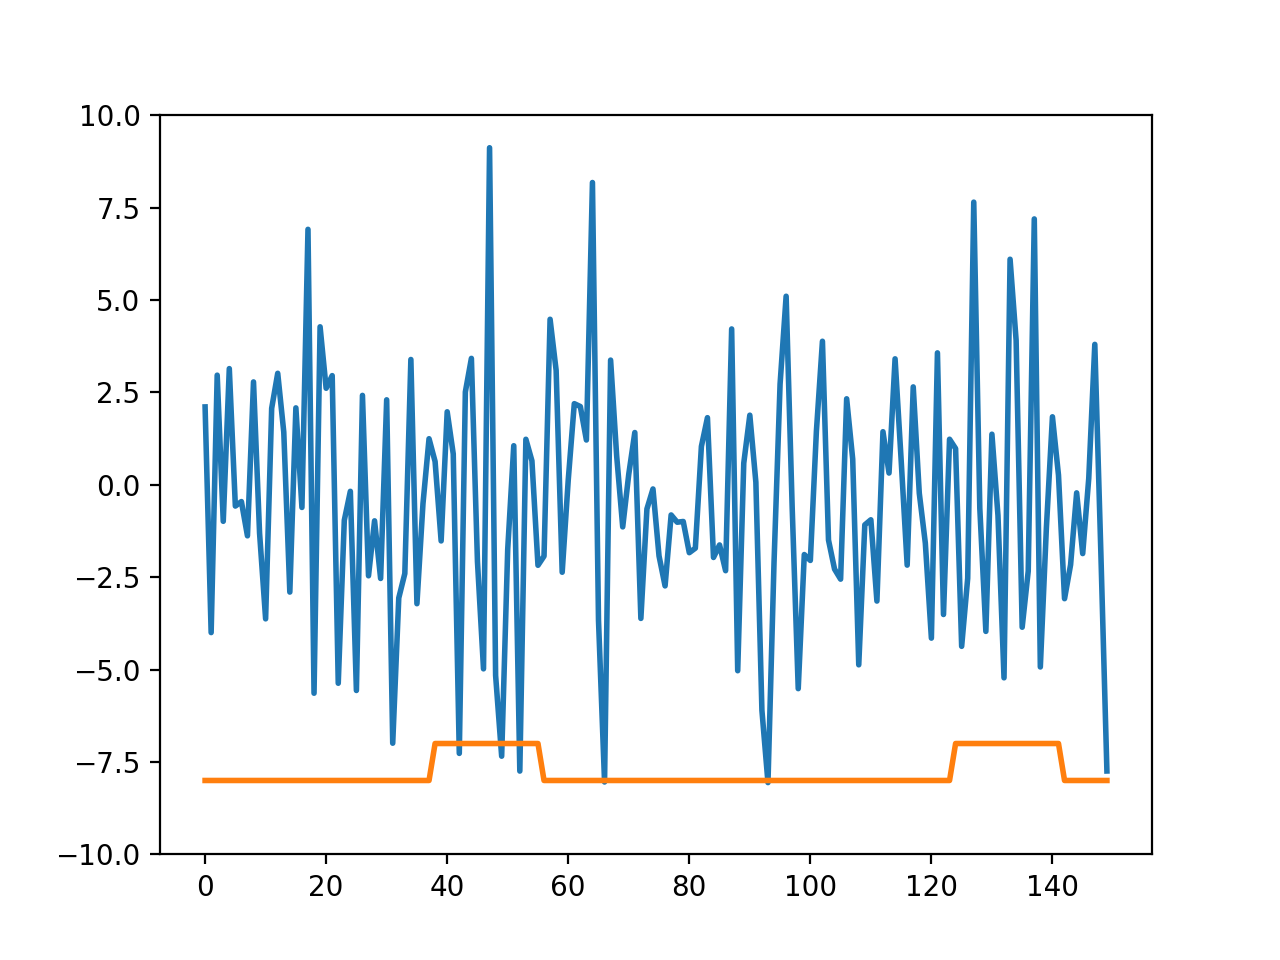

In [21]:
x,y = create_batch(X_load, Y_load, n_hidden=150)

plt.figure()
plt.plot(x, lw=2)
plt.plot(y[:,1]-8, lw=2)
plt.ylim(-10., 10.)
plt.show()

In [6]:
n_batches = 10000

X = np.zeros((n_batches, n_hidden, 1))
Y = np.zeros((n_batches, n_hidden, 2))

for i in range(n_batches):
    x,y = create_batch(X_load, Y_load, n_hidden=n_hidden)  
    X[i] = np.reshape(x, (x.shape[0], -1))
    Y[i] = y
    
    
train_input = X[:9000]
train_output = Y[:9000]
test_input = X[9000:]
test_output = Y[9000:]

In [22]:
n_dim = 1
input_shape = (None,n_dim)
batch_size = n_hidden

keras.backend.clear_session()
inputs = keras.layers.Input(shape=input_shape)

x = keras.layers.LSTM(100, activation='tanh', return_sequences=True)(inputs)
predictions = keras.layers.Dense(2, activation='softmax')(x)

model = keras.models.Model(inputs=inputs, outputs=predictions)
model.compile(loss=['categorical_crossentropy'],
              optimizer=keras.optimizers.Adam(lr=0.01))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 100)         40800     
_________________________________________________________________
dense_1 (Dense)              (None, None, 2)           202       
Total params: 41,002
Trainable params: 41,002
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
epochs = 20

history = model.fit(train_input, train_output, batch_size=batch_size, epochs=epochs, 
                    verbose=True, validation_data=(test_input, test_output))

save_model(model)

Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 11s 1ms/step - loss: 0.2970 - val_loss: 0.2210
Epoch 2/20
9000/9000 [==============================] - 12s 1ms/step - loss: 0.2173 - val_loss: 0.2152
Epoch 3/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.2124 - val_loss: 0.2093
Epoch 4/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.2080 - val_loss: 0.2056
Epoch 5/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.2005 - val_loss: 0.2035
Epoch 6/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.1896 - val_loss: 0.1894
Epoch 7/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.1770 - val_loss: 0.1794
Epoch 8/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.1617 - val_loss: 0.1704
Epoch 9/20
9000/9000 [==============================] - 10s 1ms/step - loss: 0.1528 - val_loss: 0.1508
Epoch 10/20
9000/9000 [==

In [24]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

<IPython.core.display.Javascript object>

In [25]:
res = model.predict(test_input)

<IPython.core.display.Javascript object>


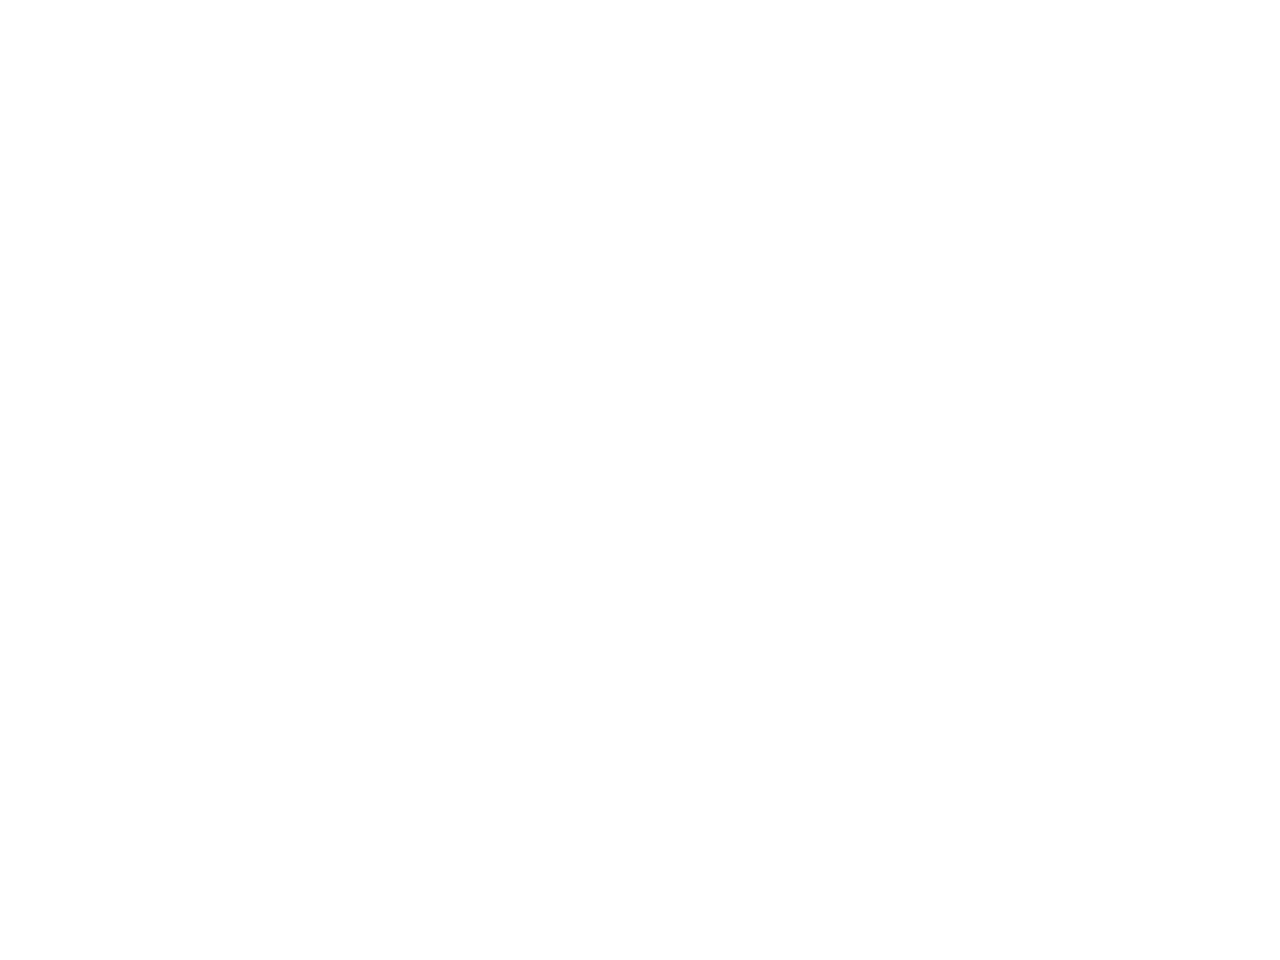

<IPython.core.display.Javascript object>


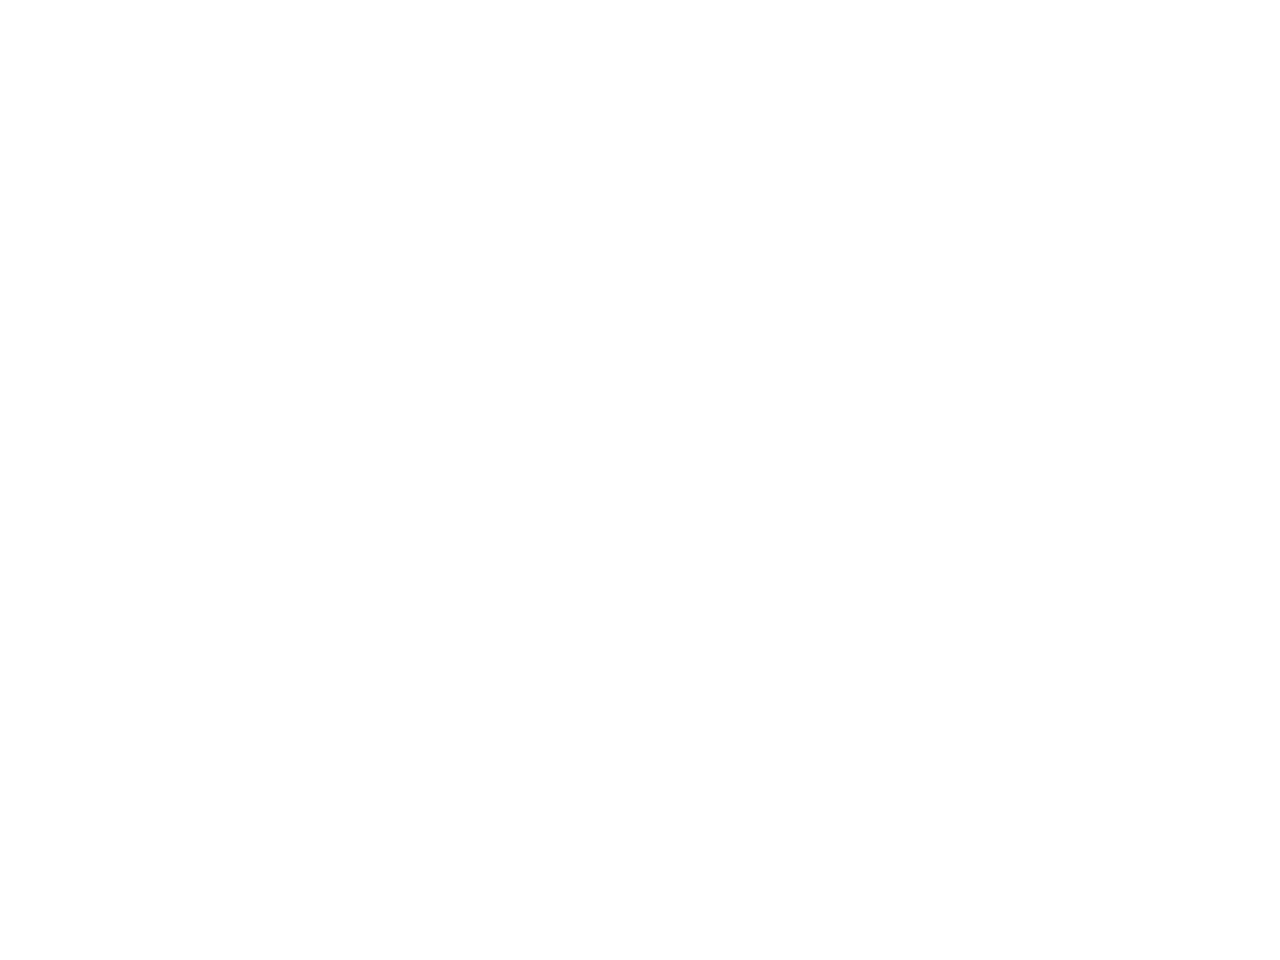

<IPython.core.display.Javascript object>


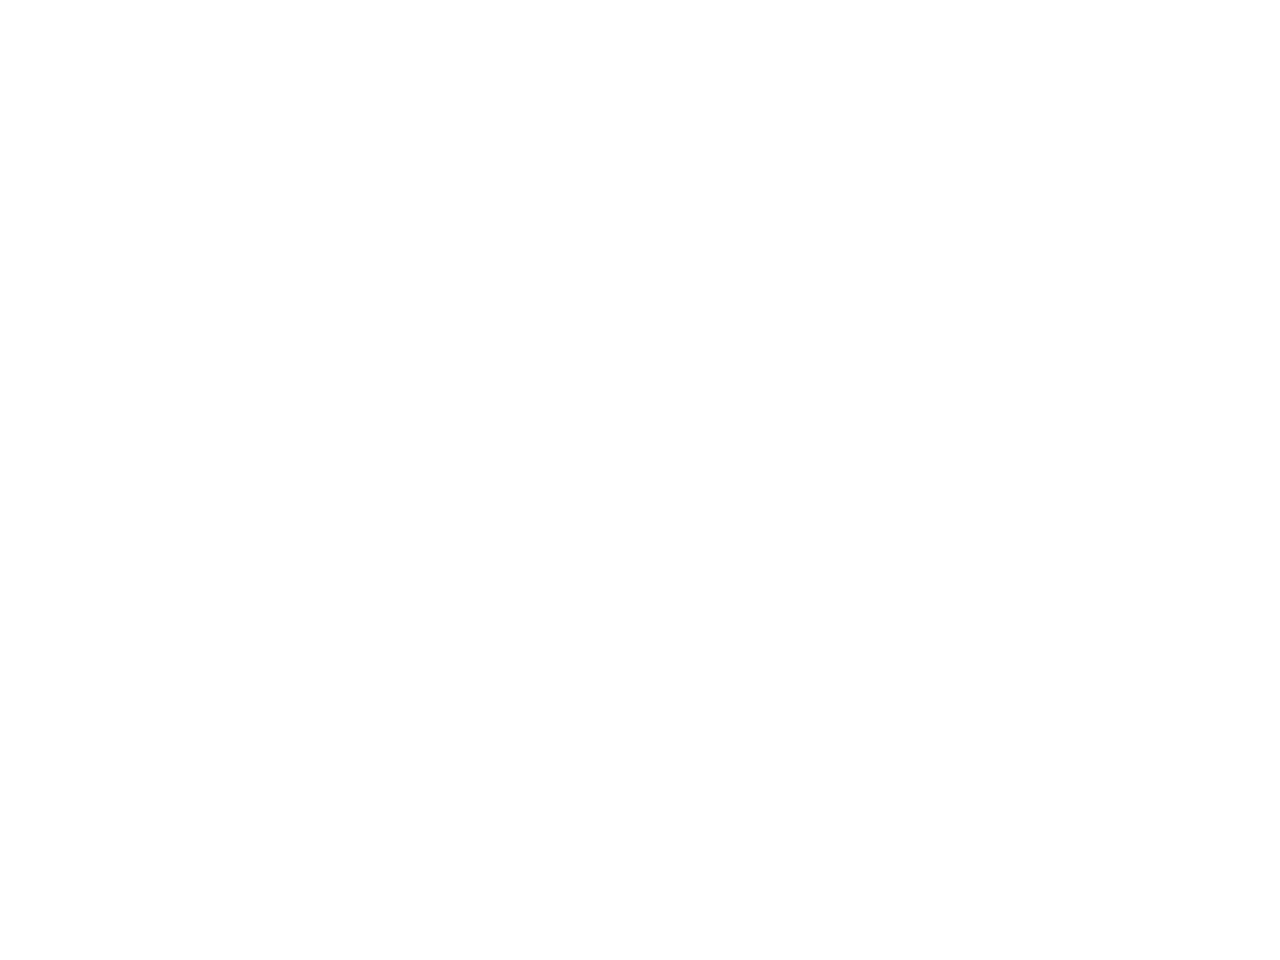

<IPython.core.display.Javascript object>


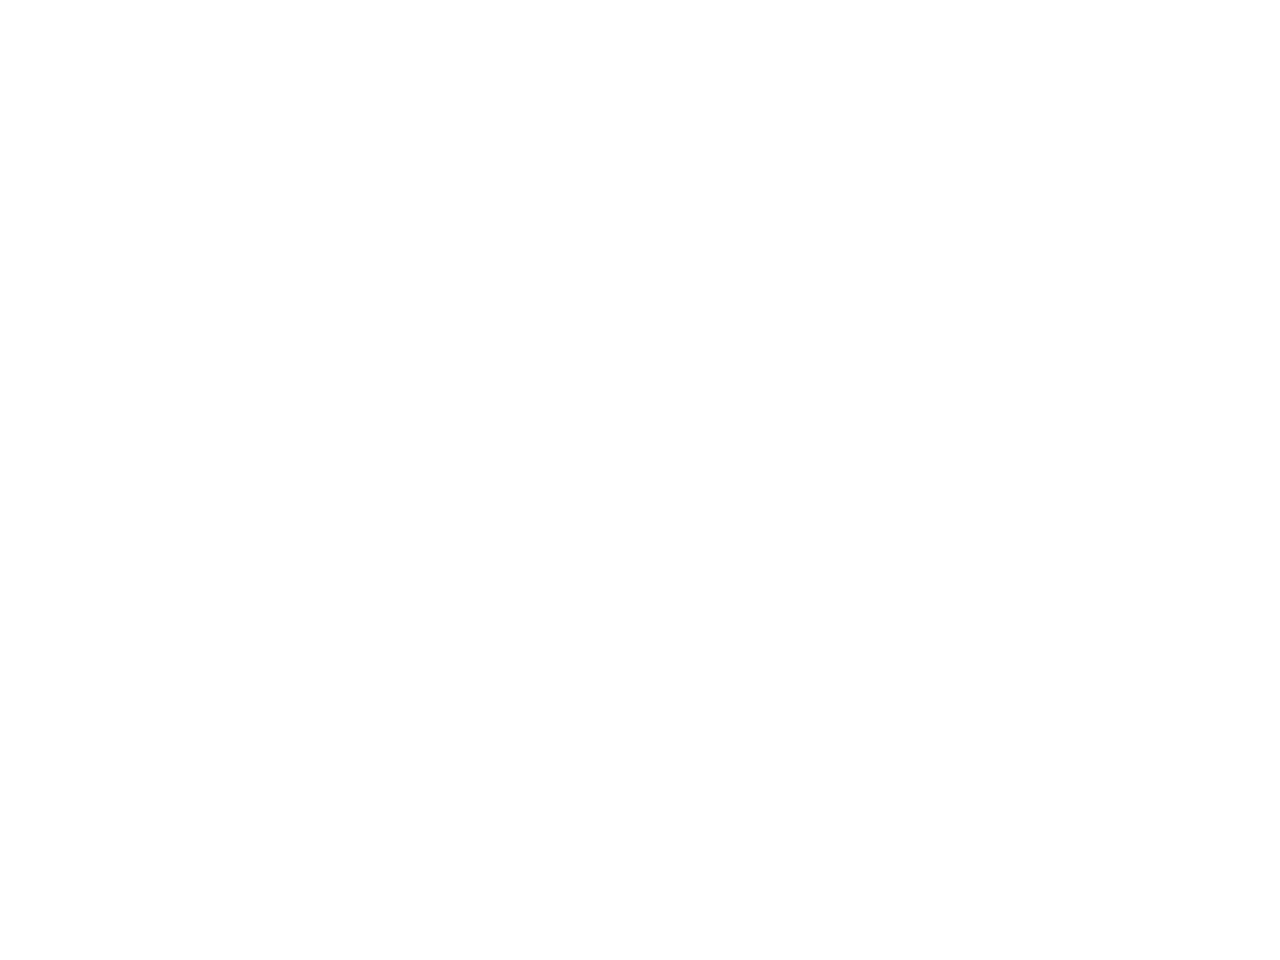

<IPython.core.display.Javascript object>


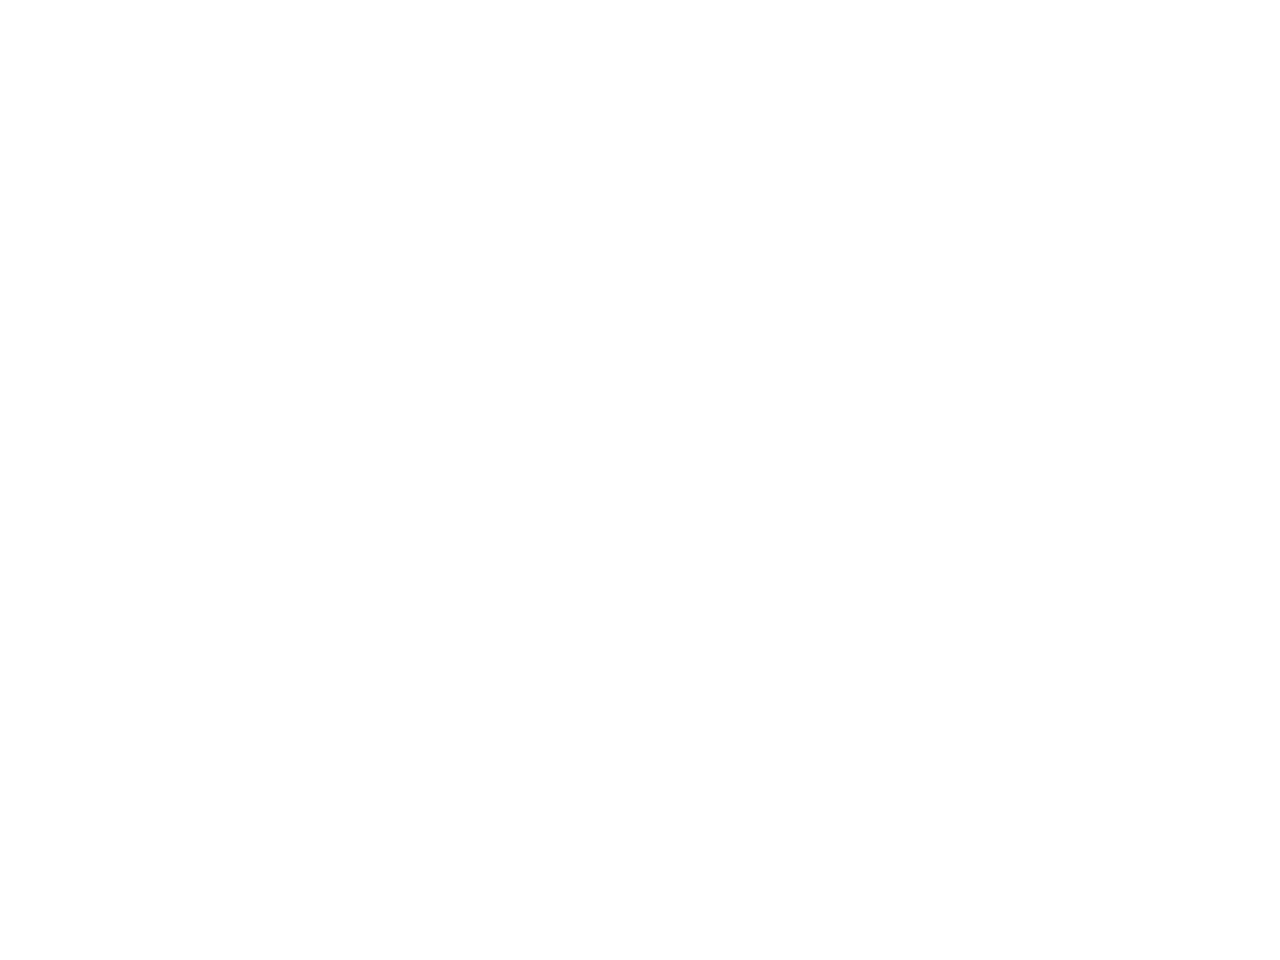

<IPython.core.display.Javascript object>


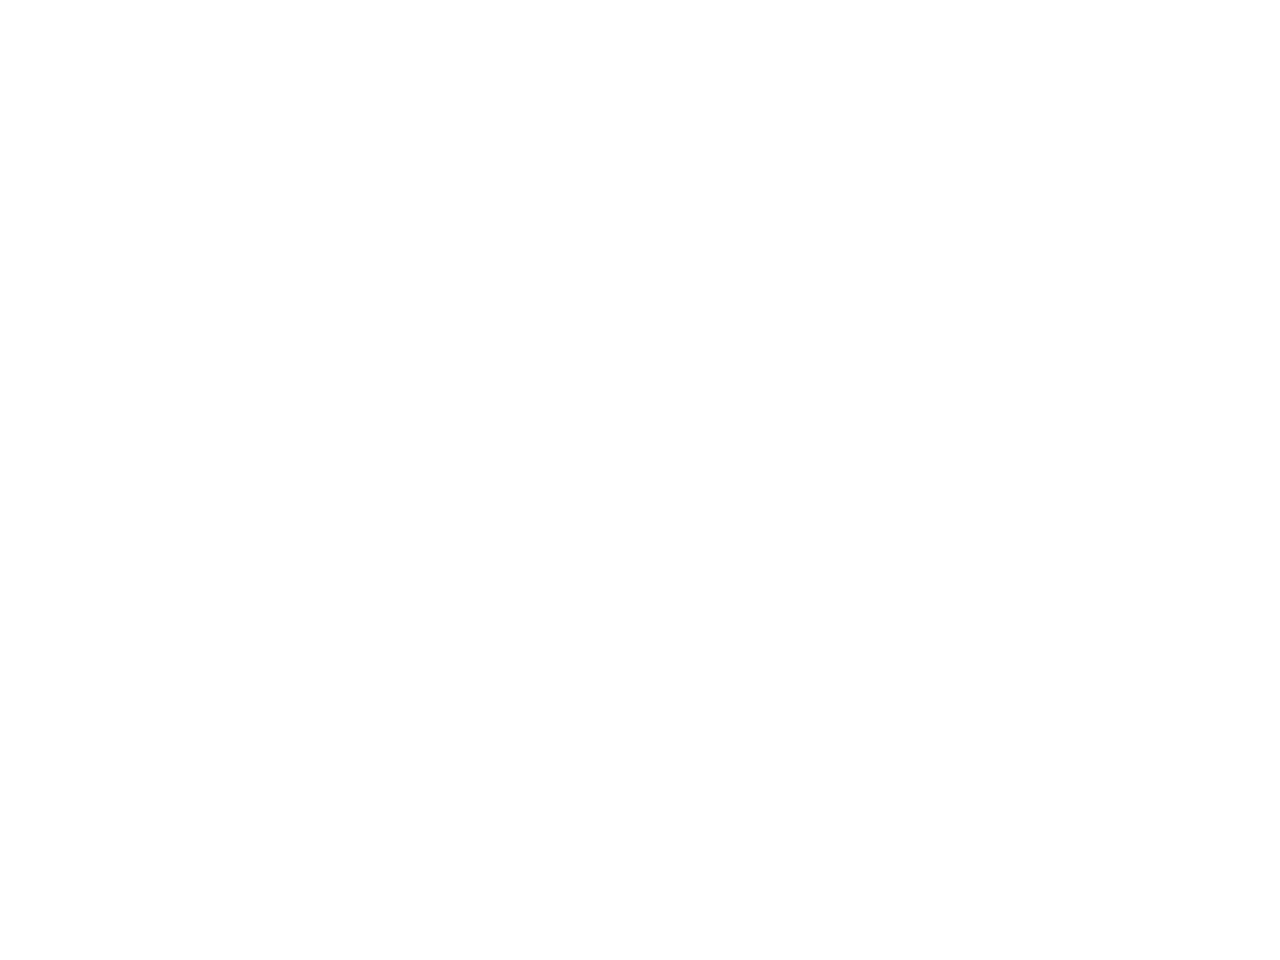

<IPython.core.display.Javascript object>


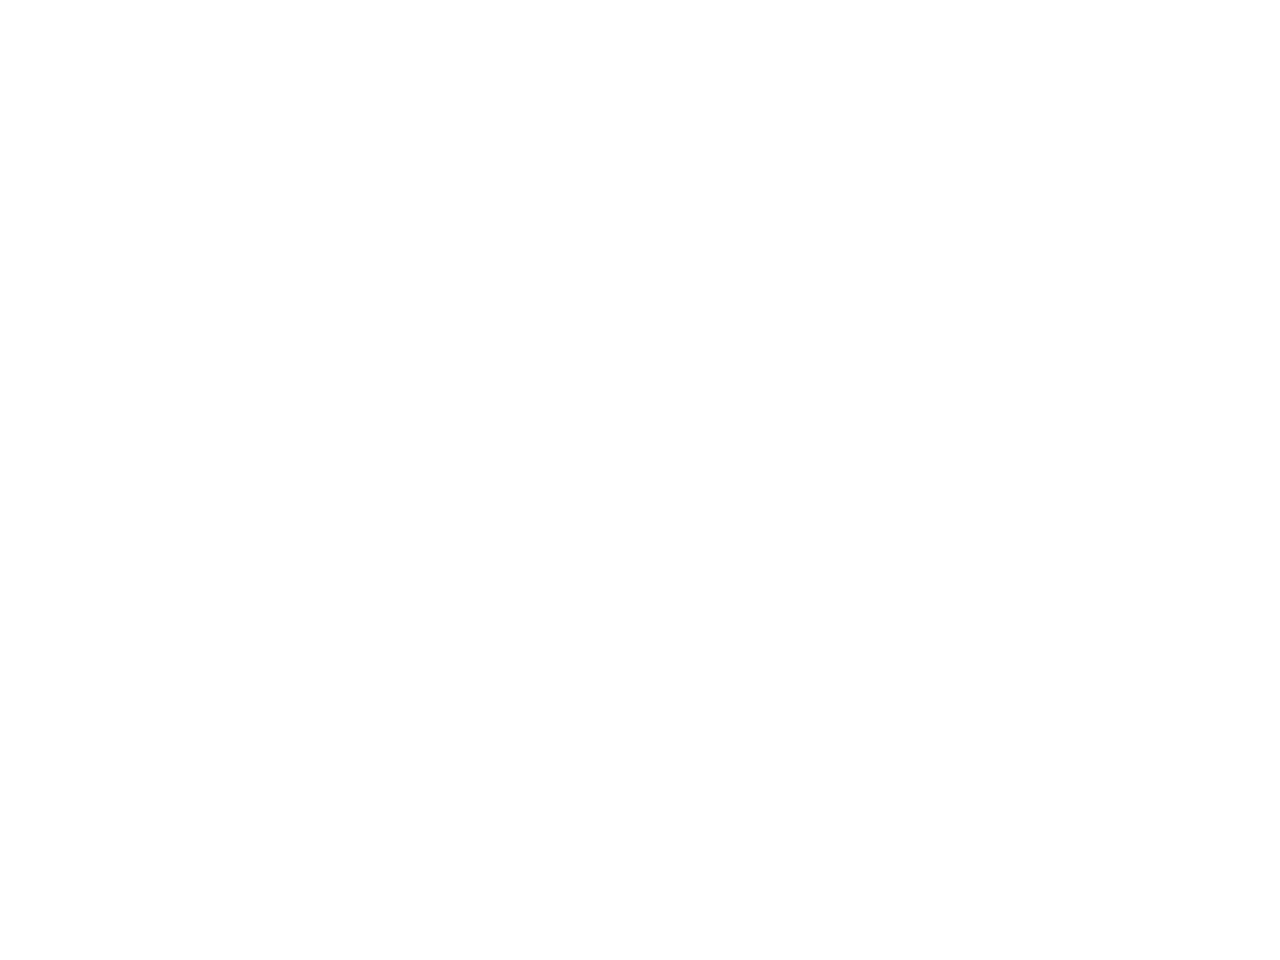

<IPython.core.display.Javascript object>


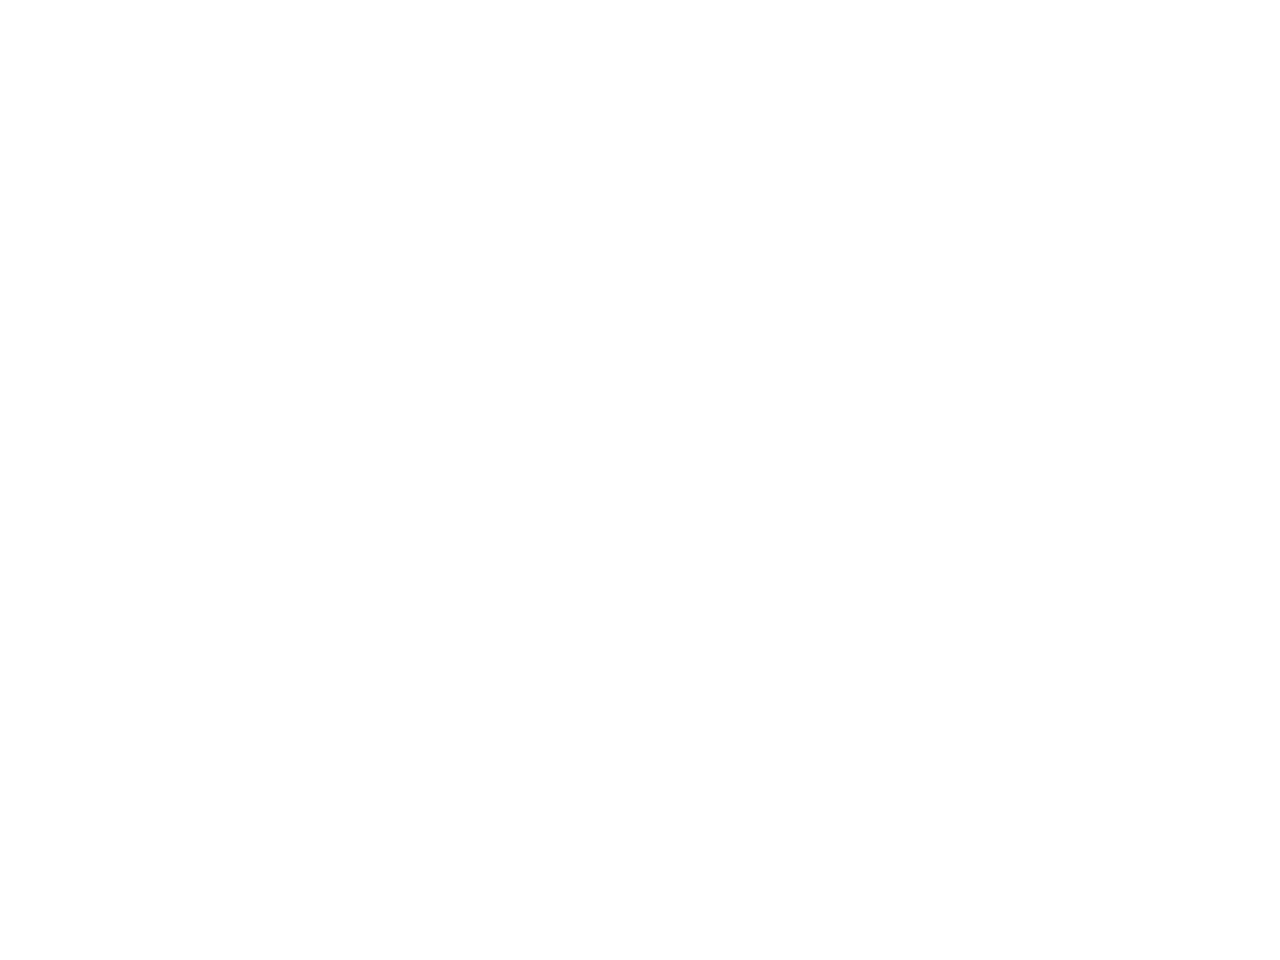

<IPython.core.display.Javascript object>


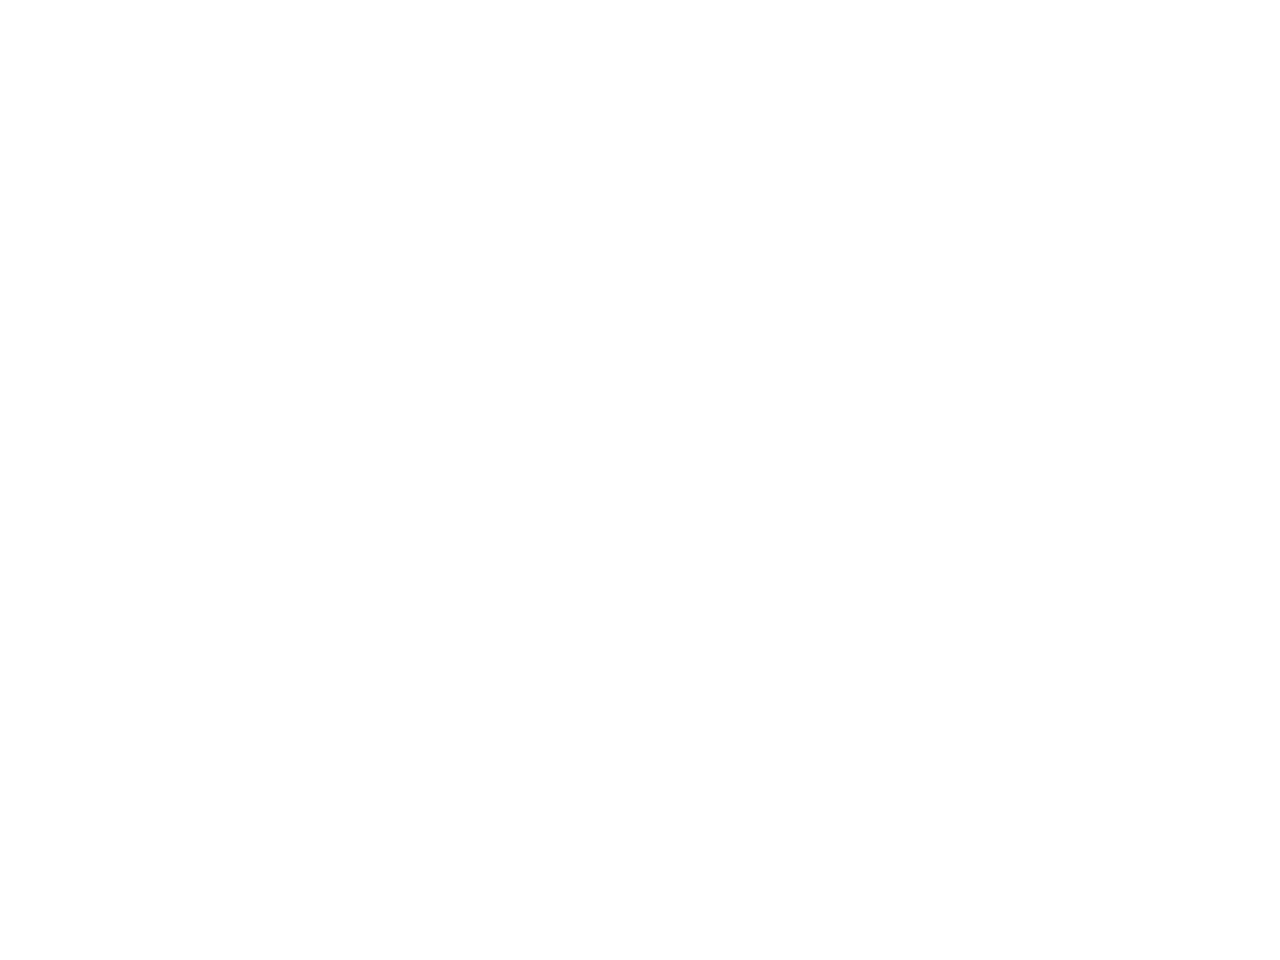

<IPython.core.display.Javascript object>


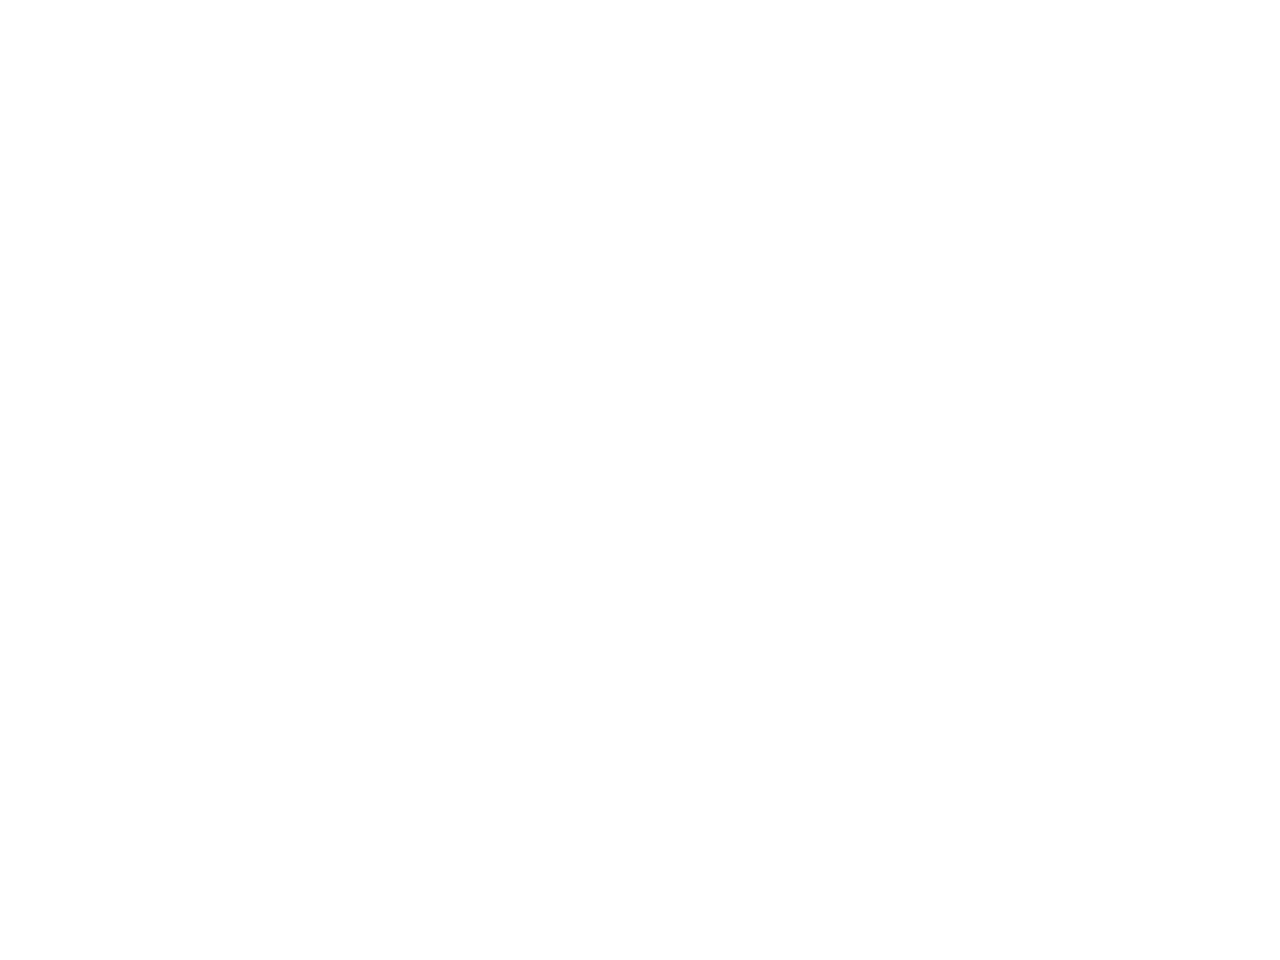

<IPython.core.display.Javascript object>


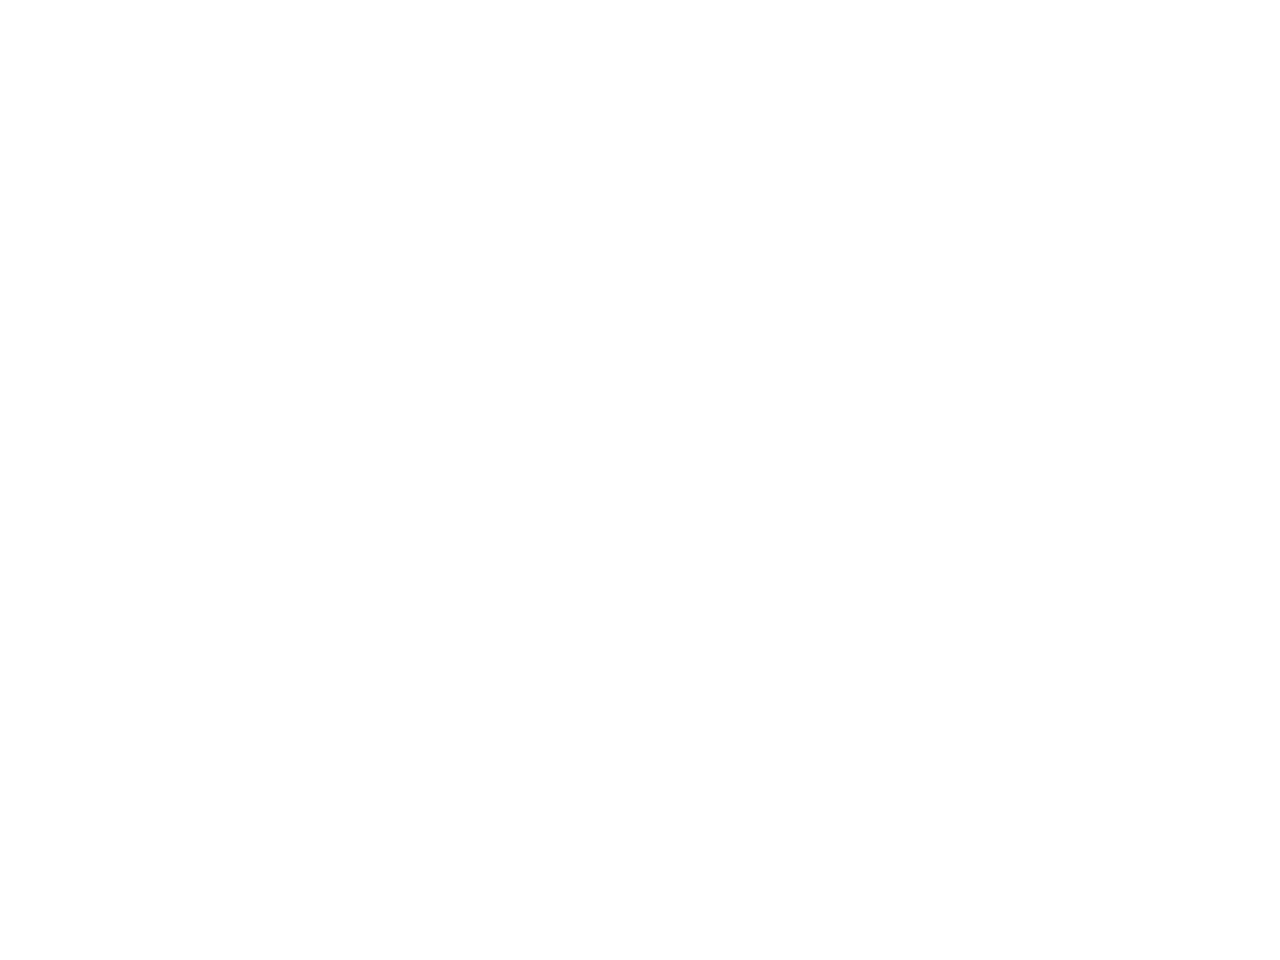

<IPython.core.display.Javascript object>


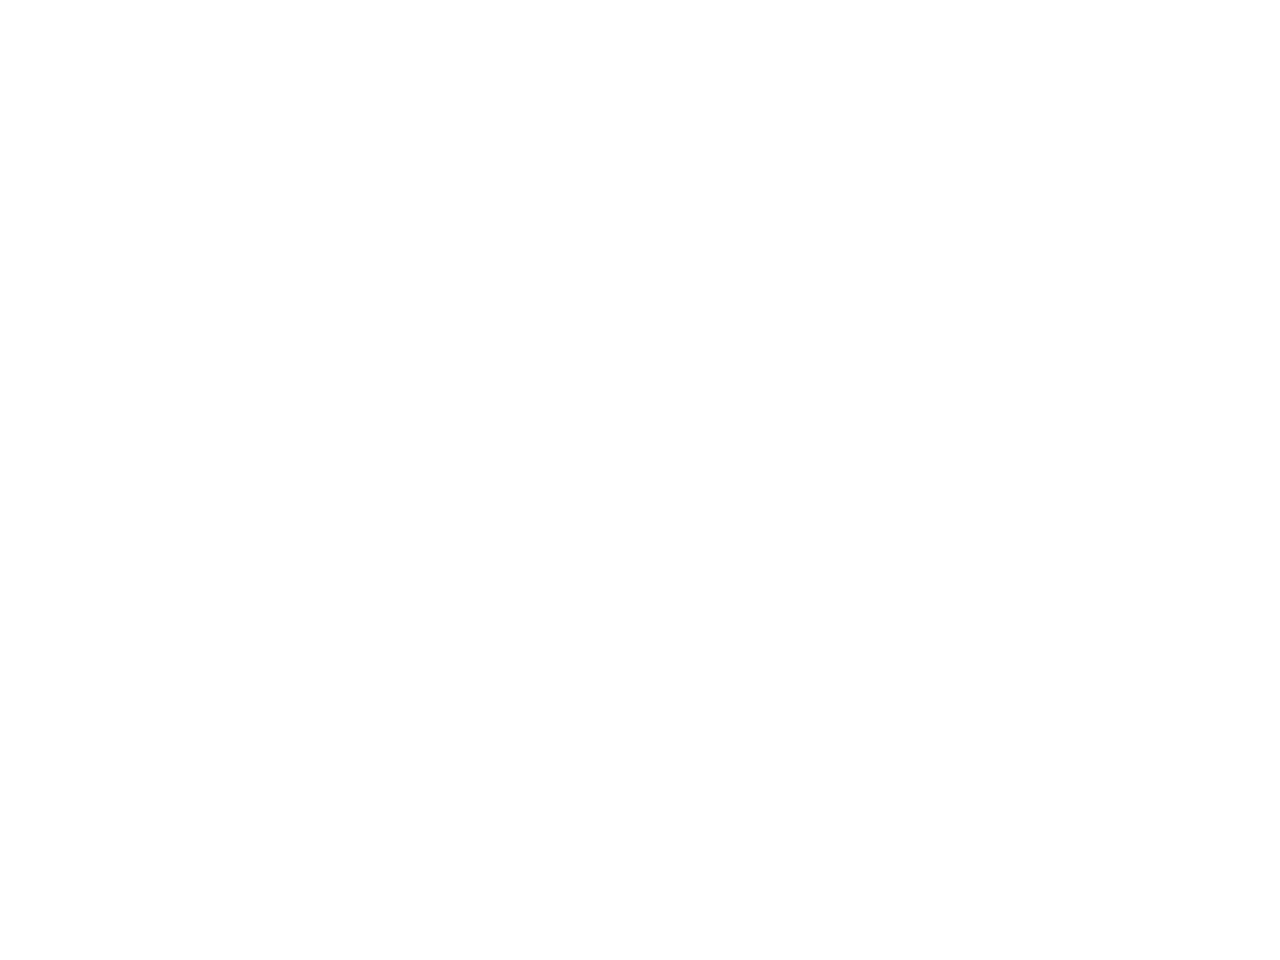

<IPython.core.display.Javascript object>


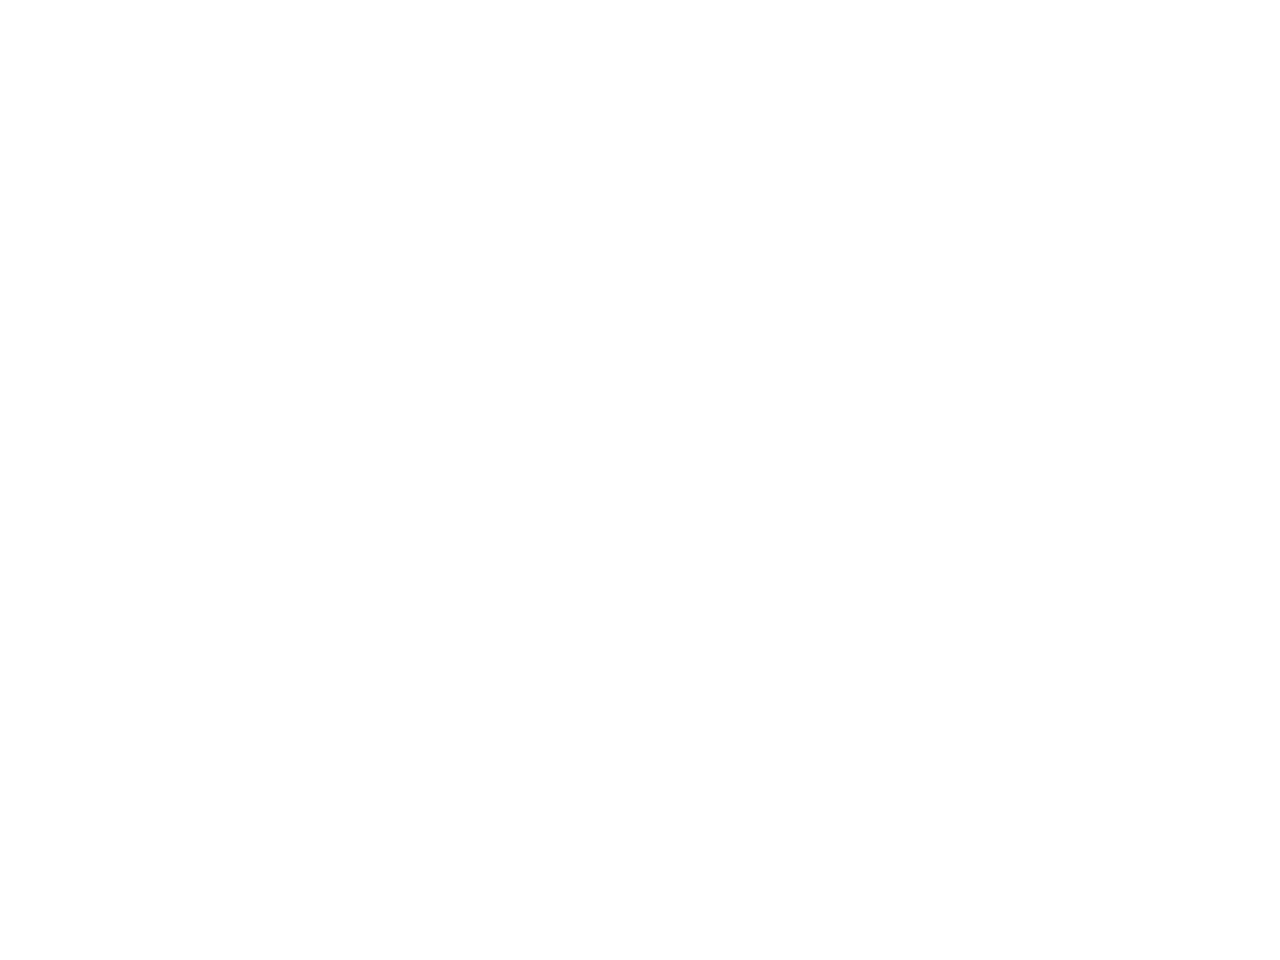

<IPython.core.display.Javascript object>


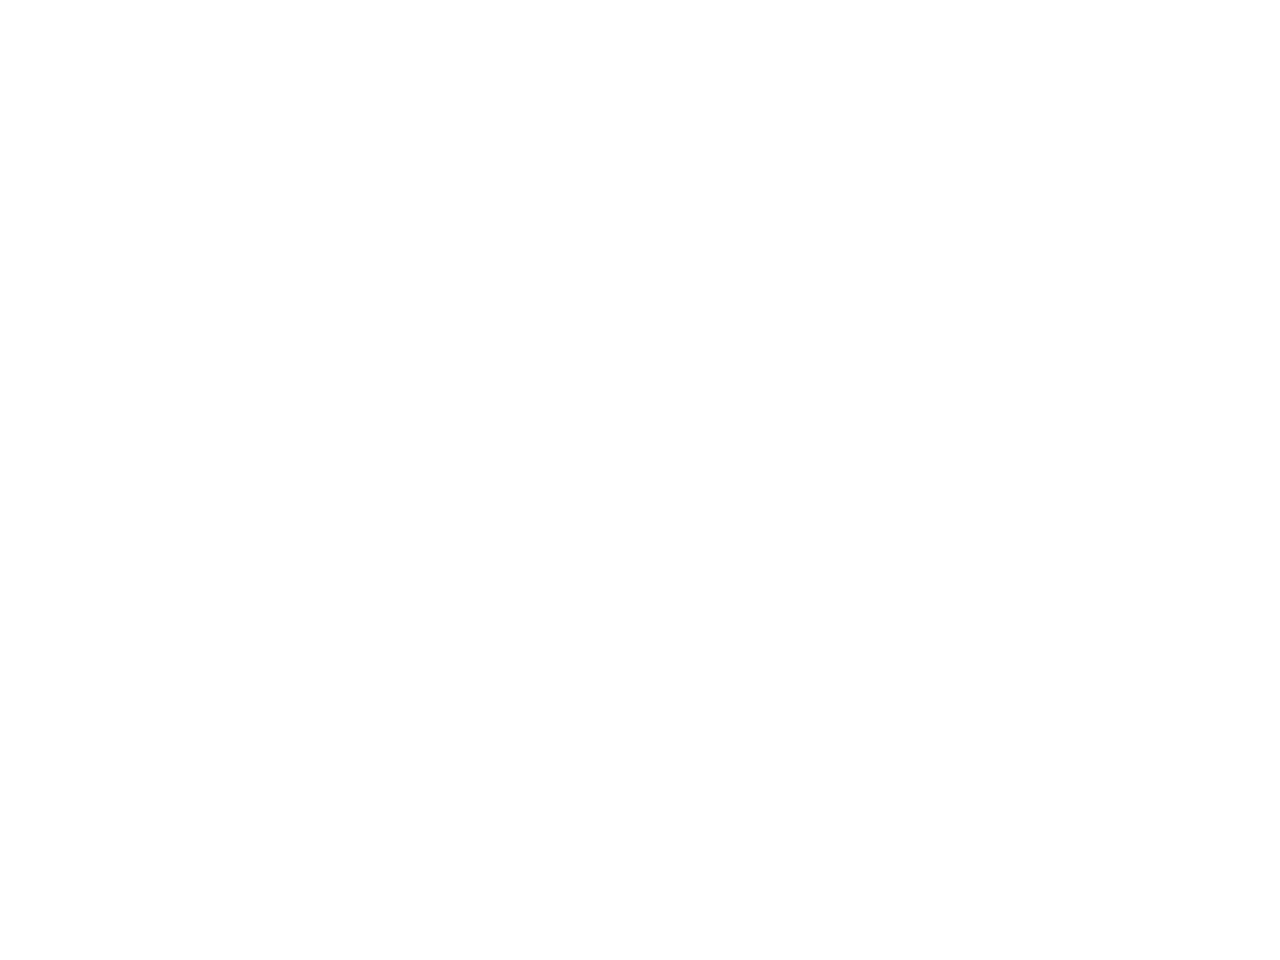

<IPython.core.display.Javascript object>


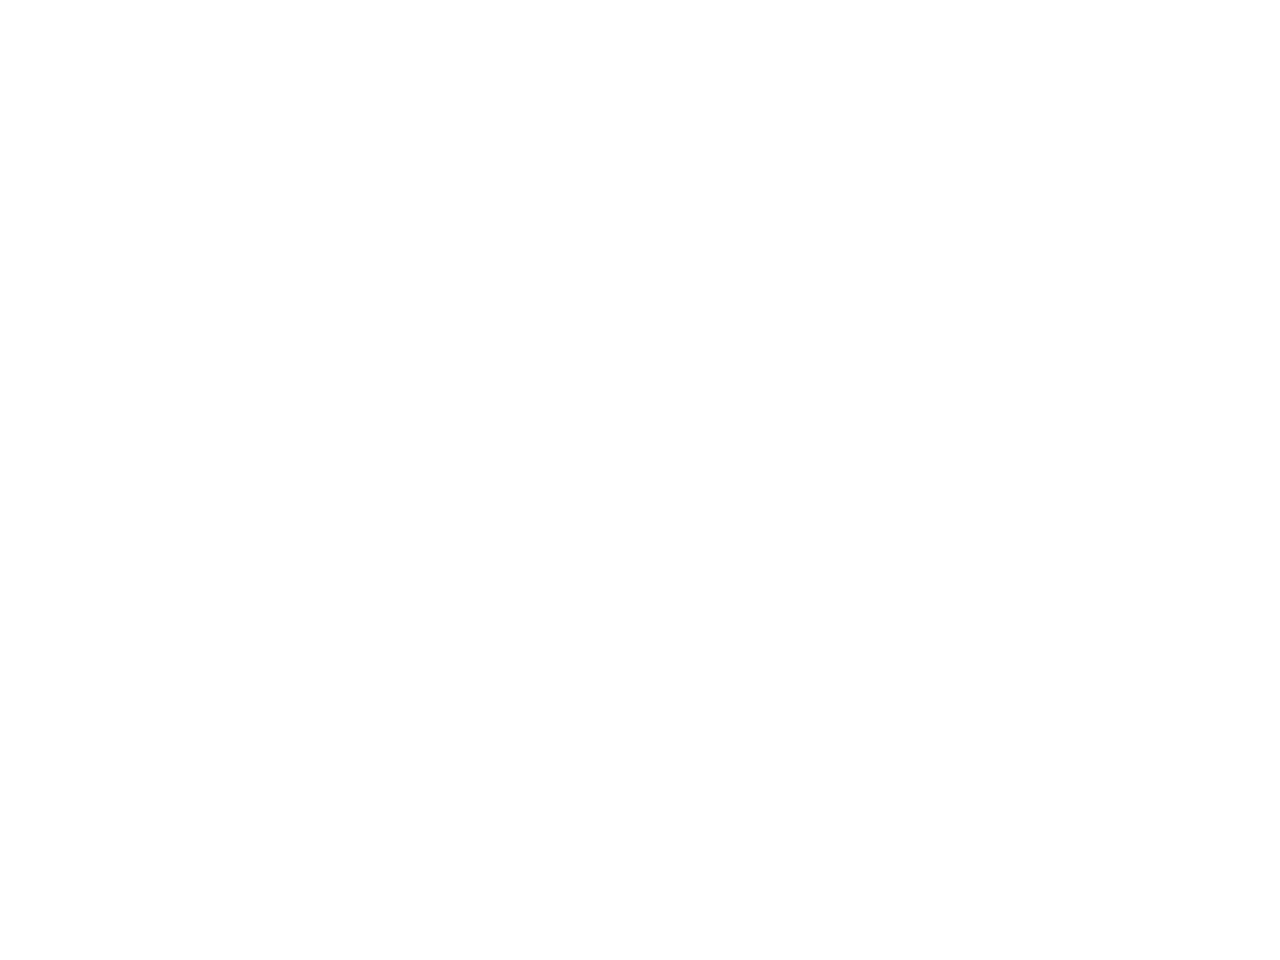

<IPython.core.display.Javascript object>


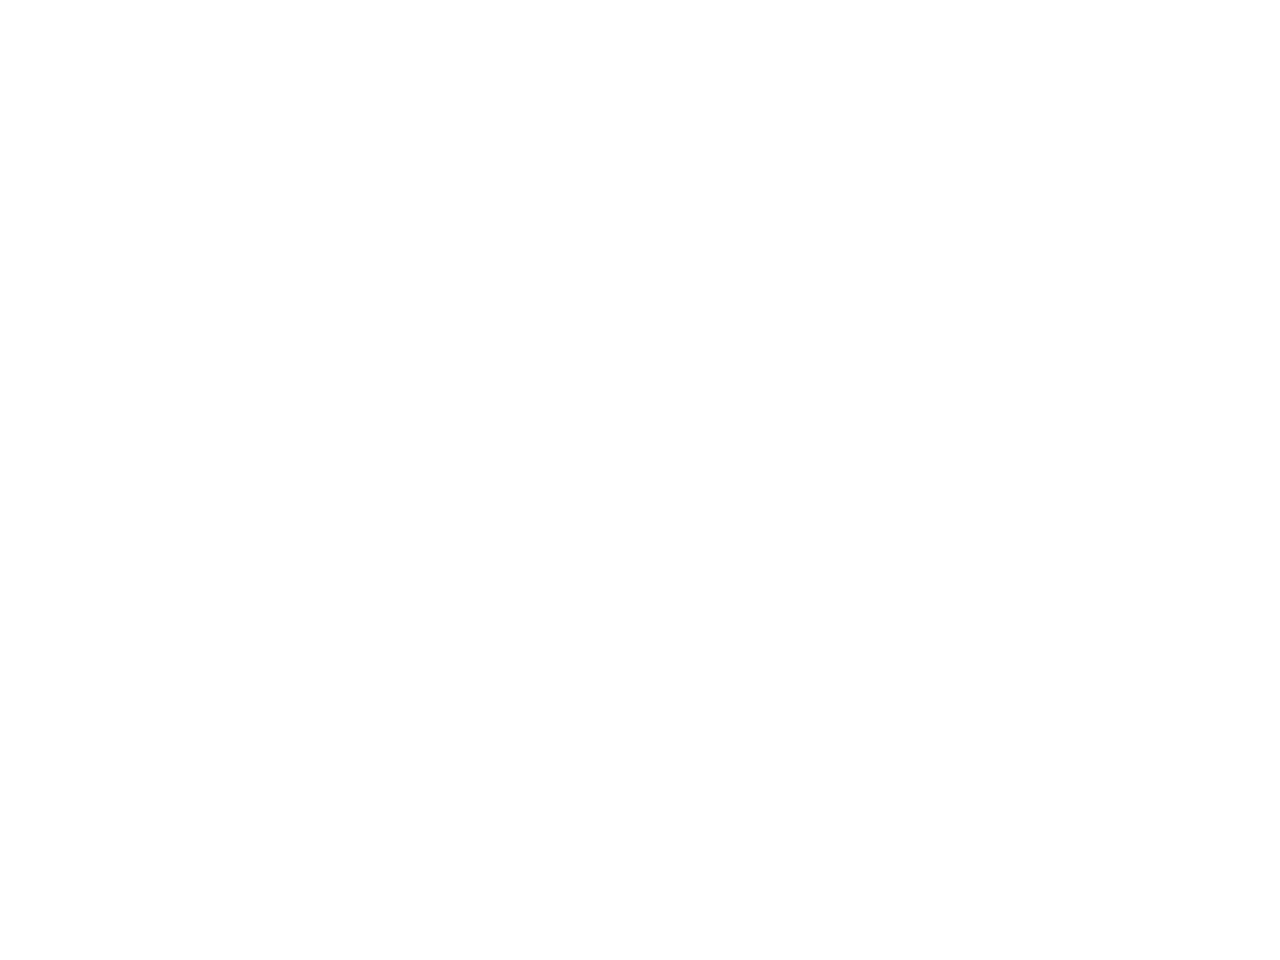

<IPython.core.display.Javascript object>


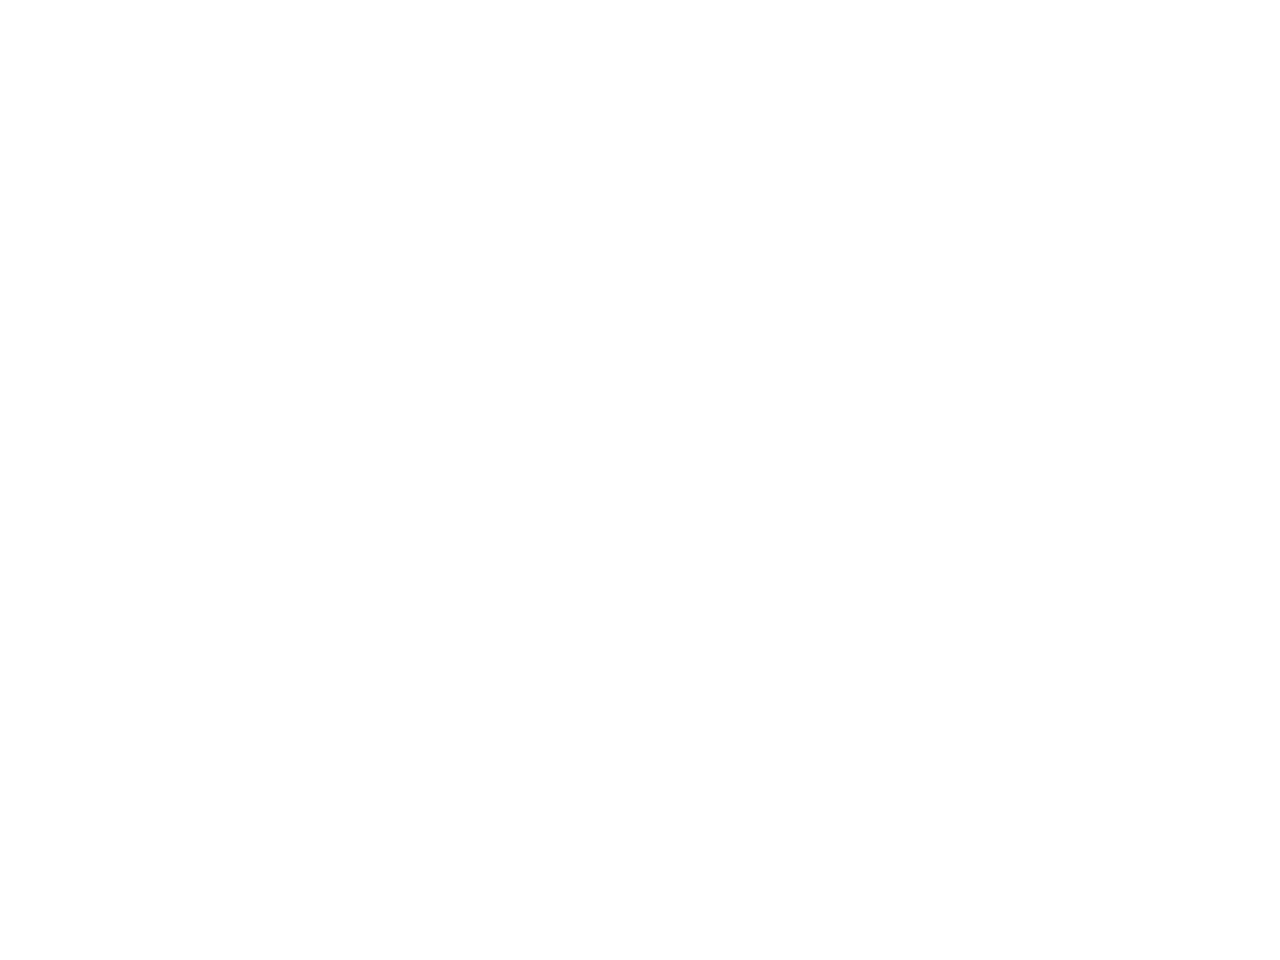

<IPython.core.display.Javascript object>


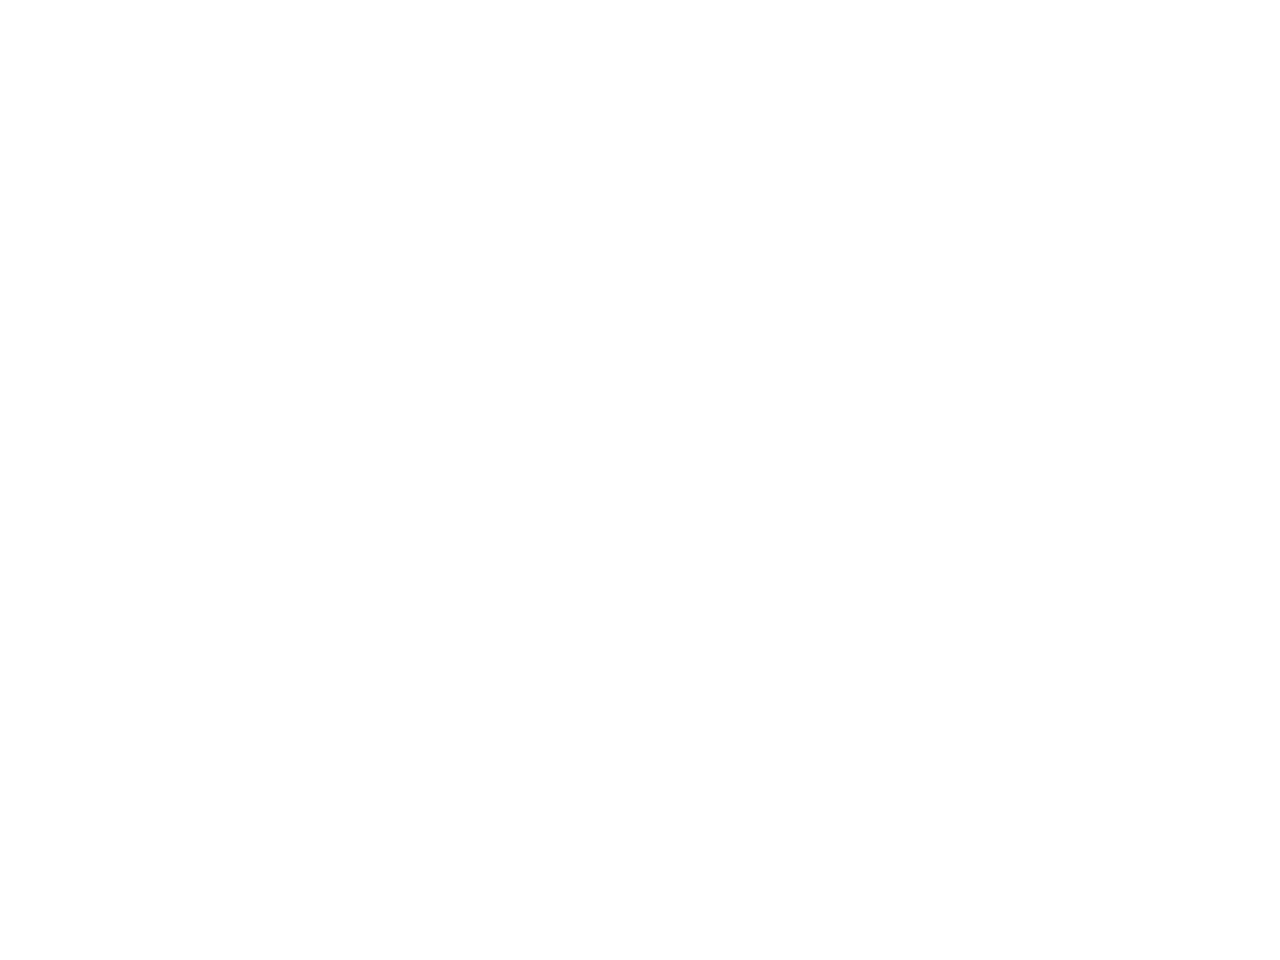

<IPython.core.display.Javascript object>


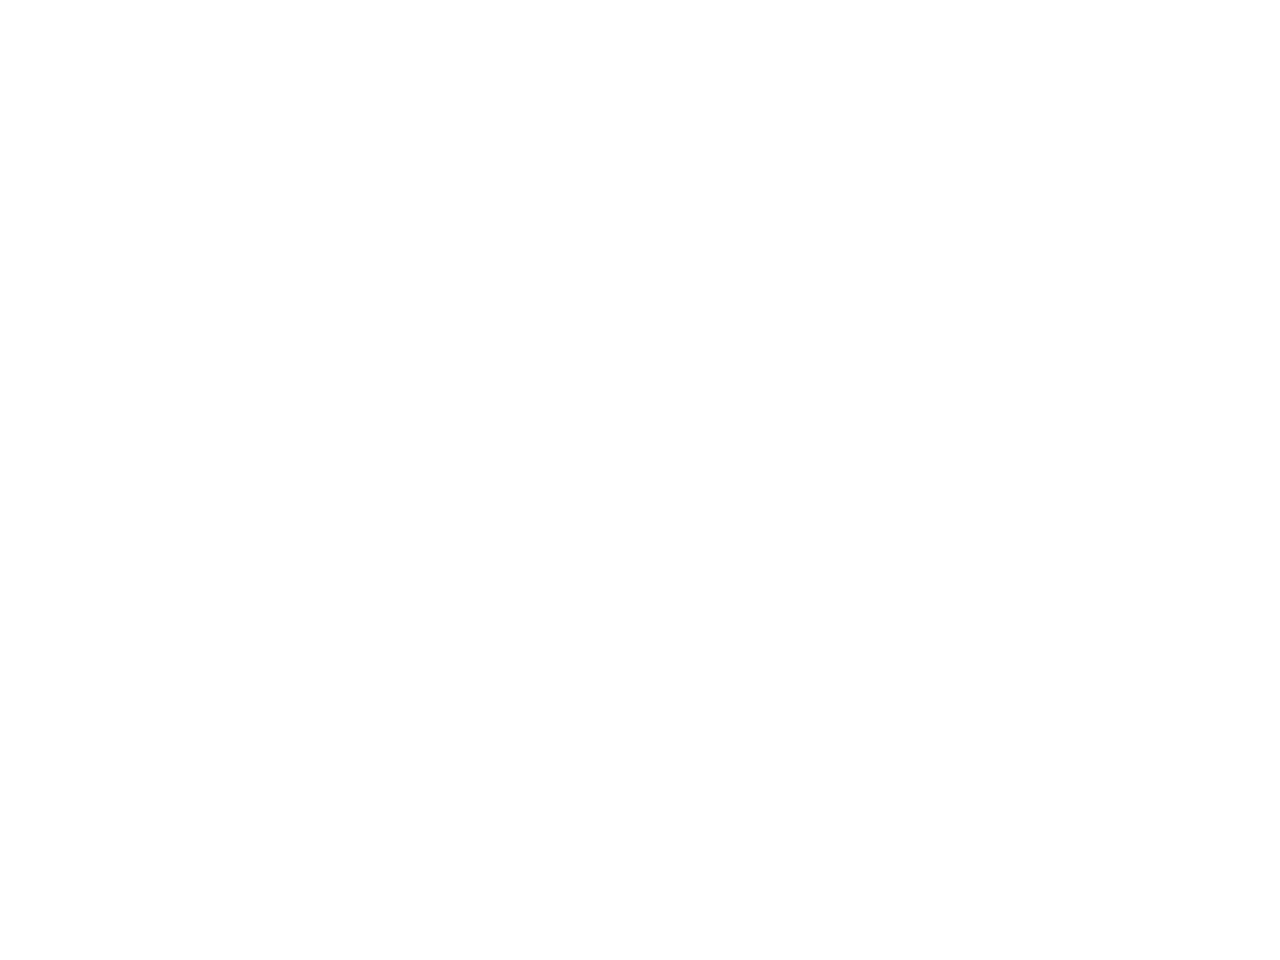

<IPython.core.display.Javascript object>


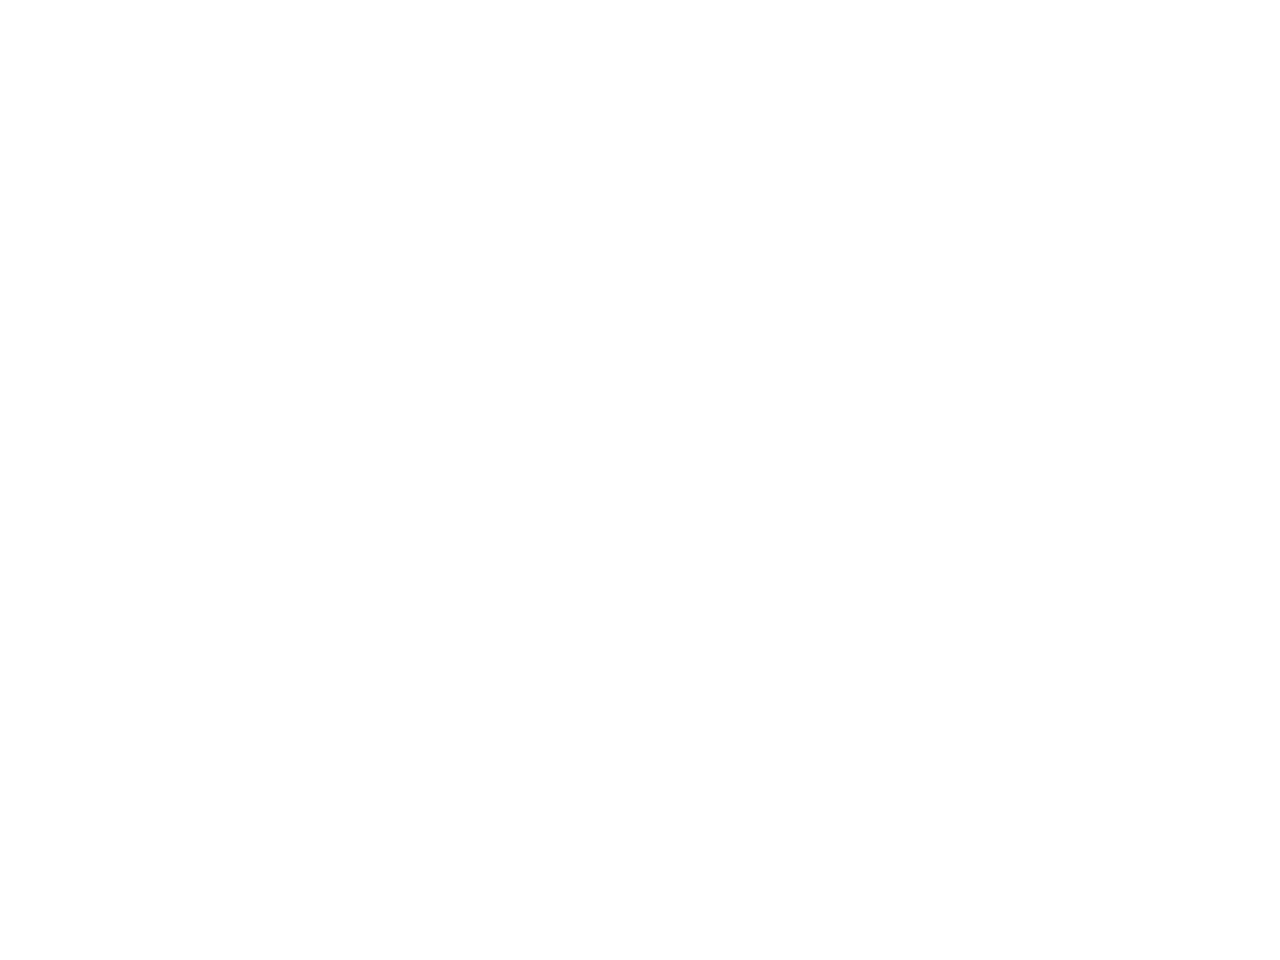

<IPython.core.display.Javascript object>


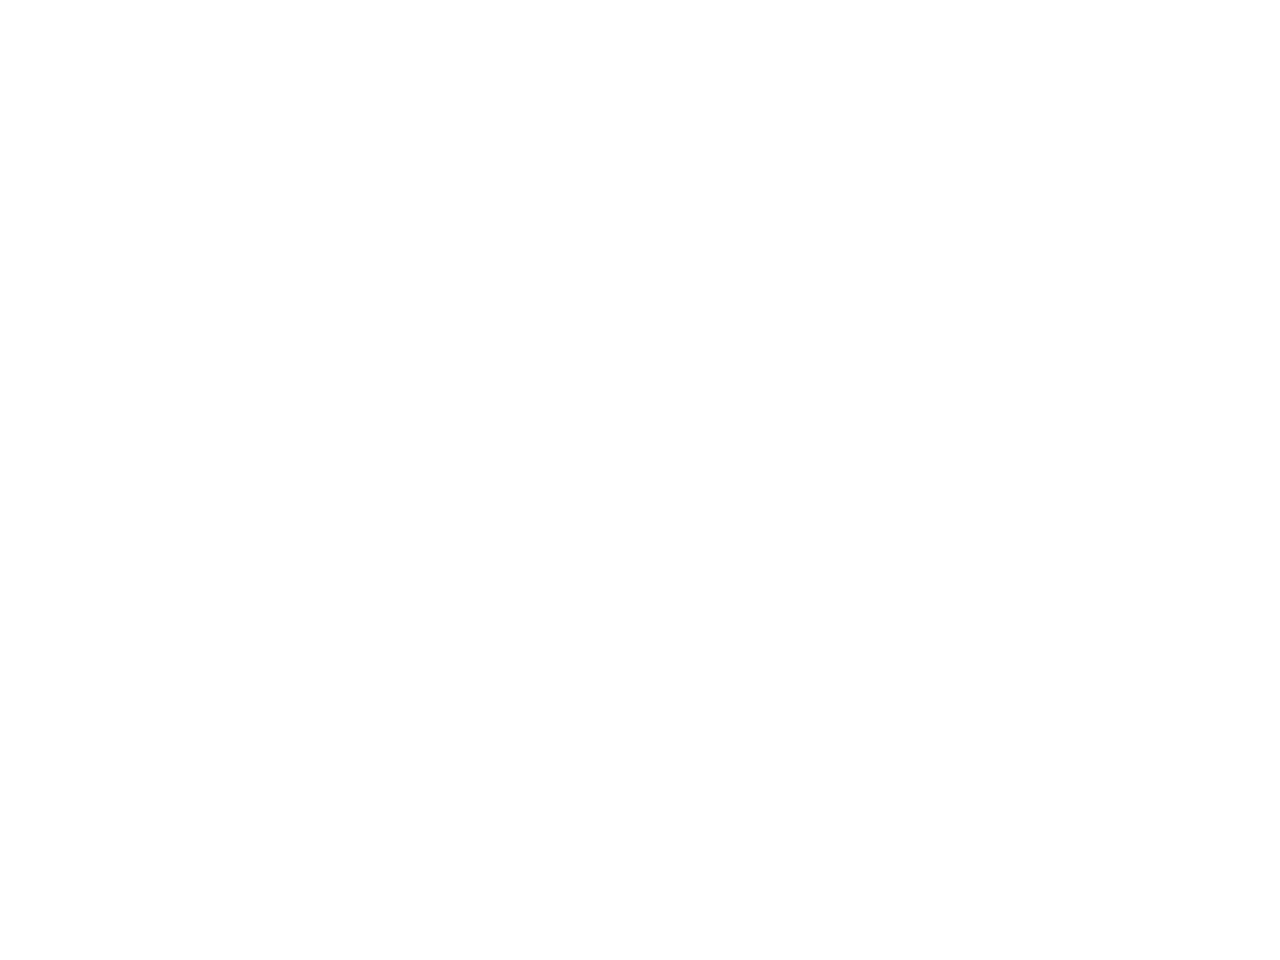

<IPython.core.display.Javascript object>


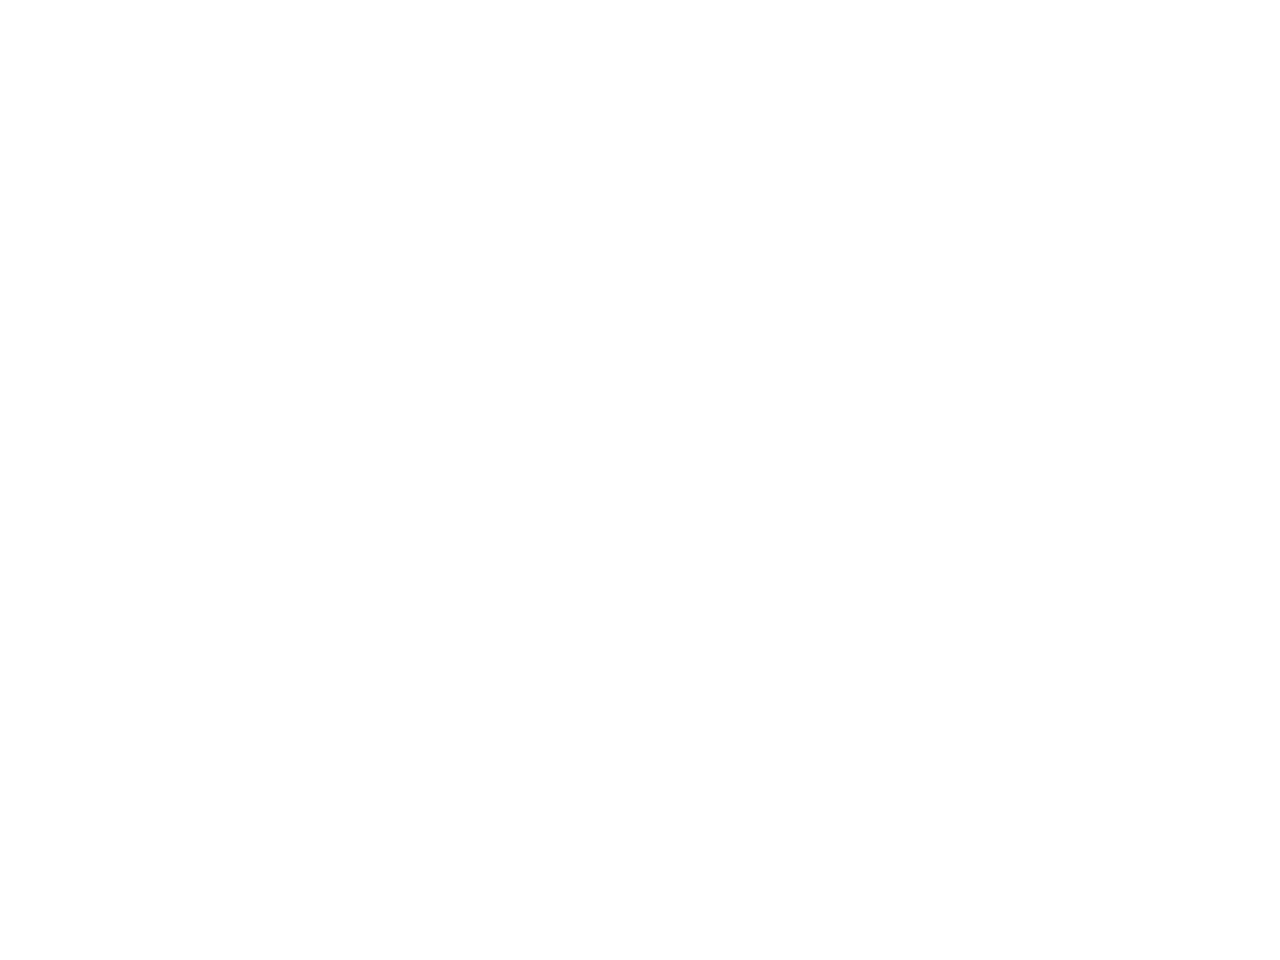

<IPython.core.display.Javascript object>


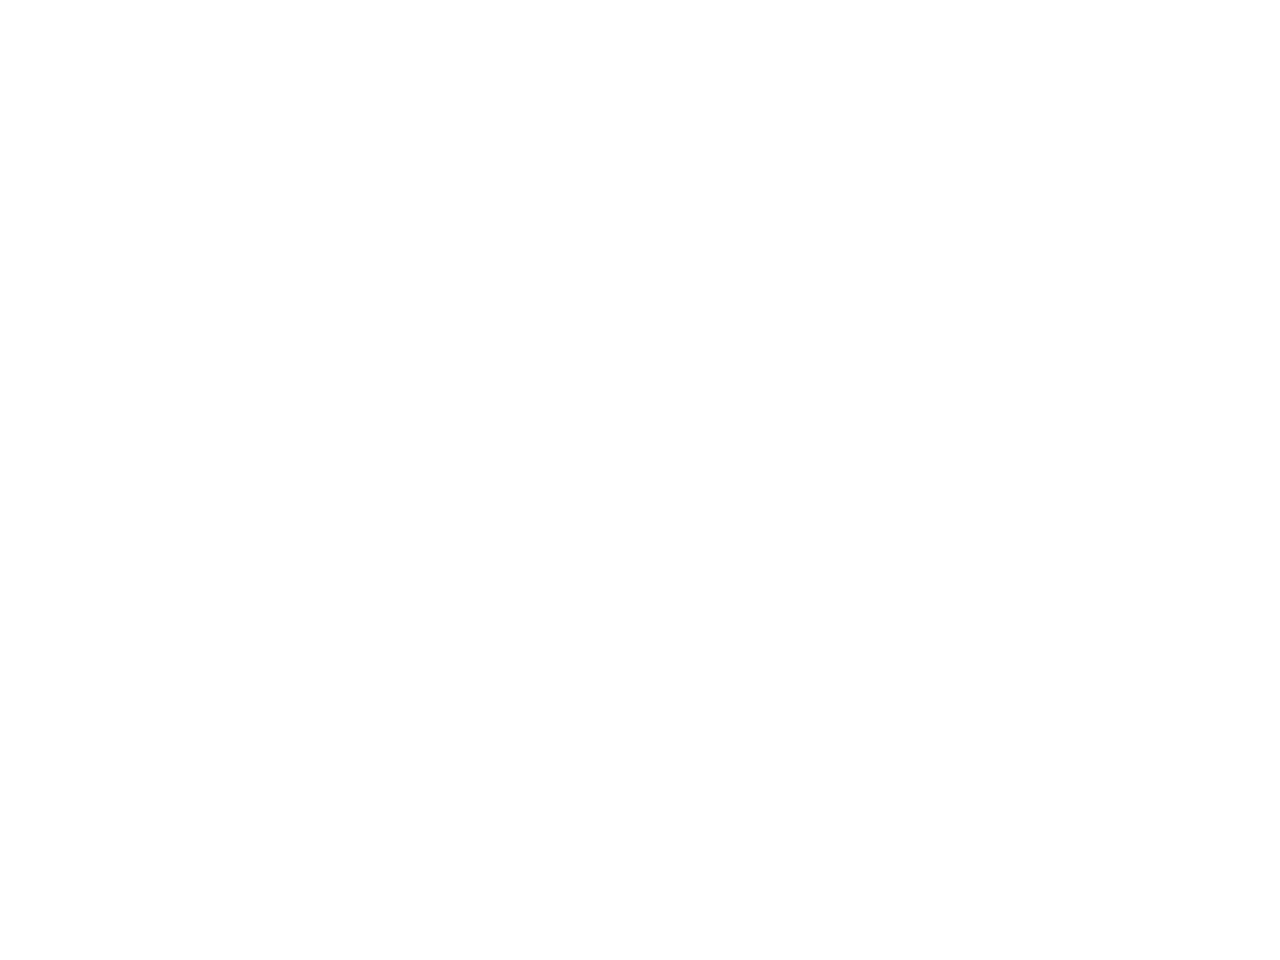

<IPython.core.display.Javascript object>


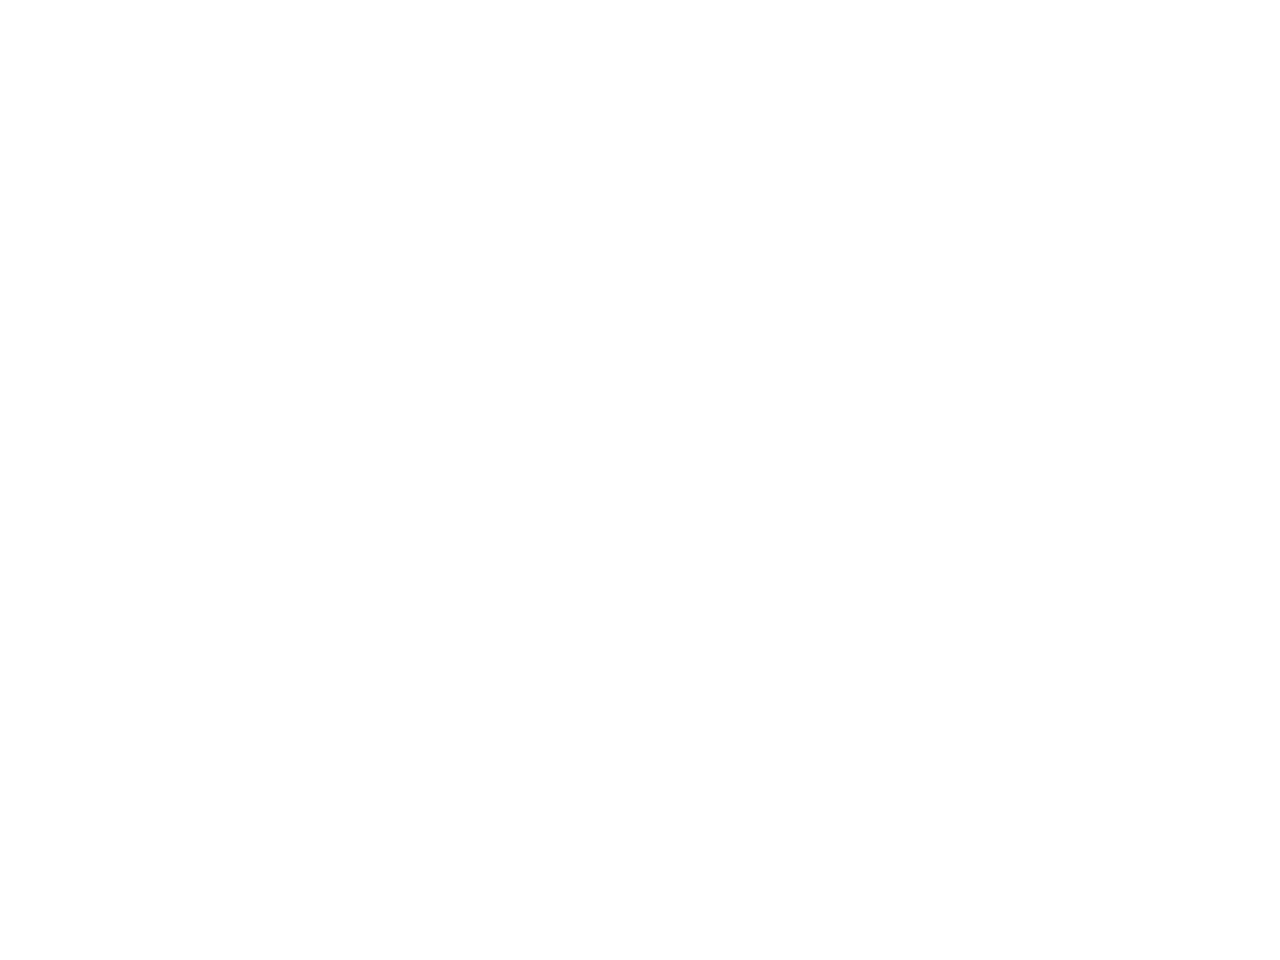

<IPython.core.display.Javascript object>


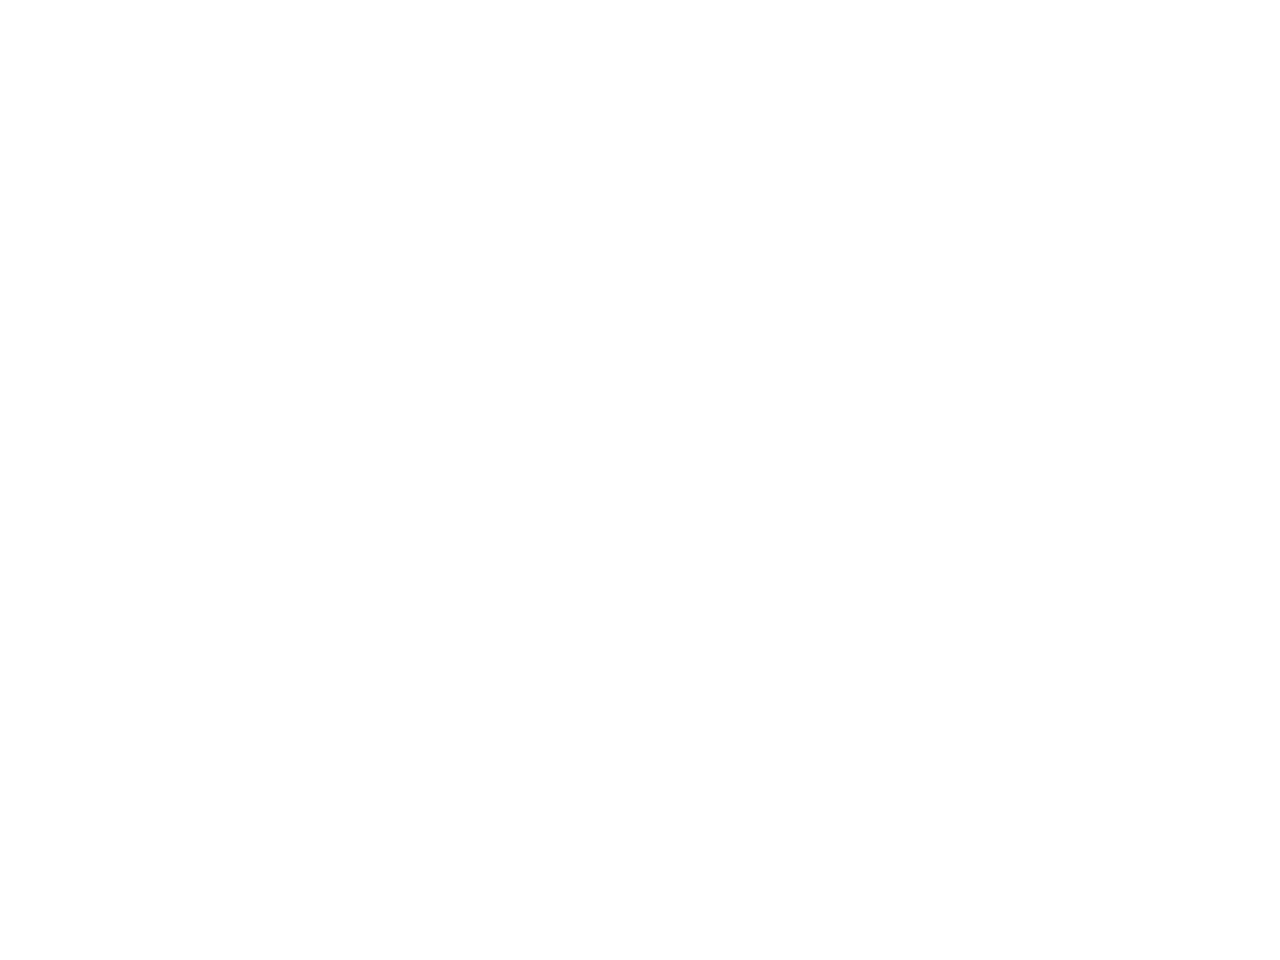

<IPython.core.display.Javascript object>


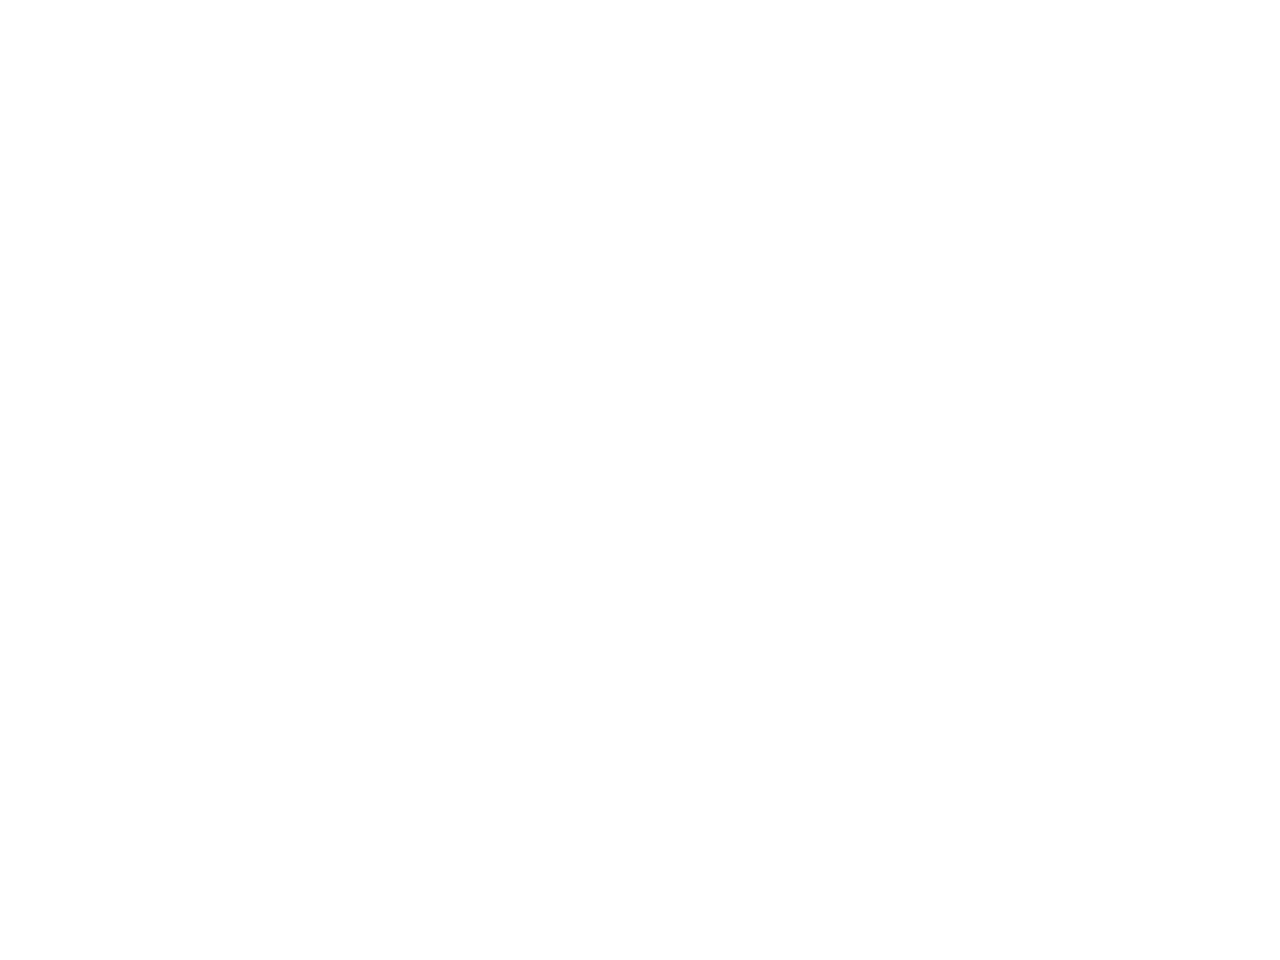

<IPython.core.display.Javascript object>


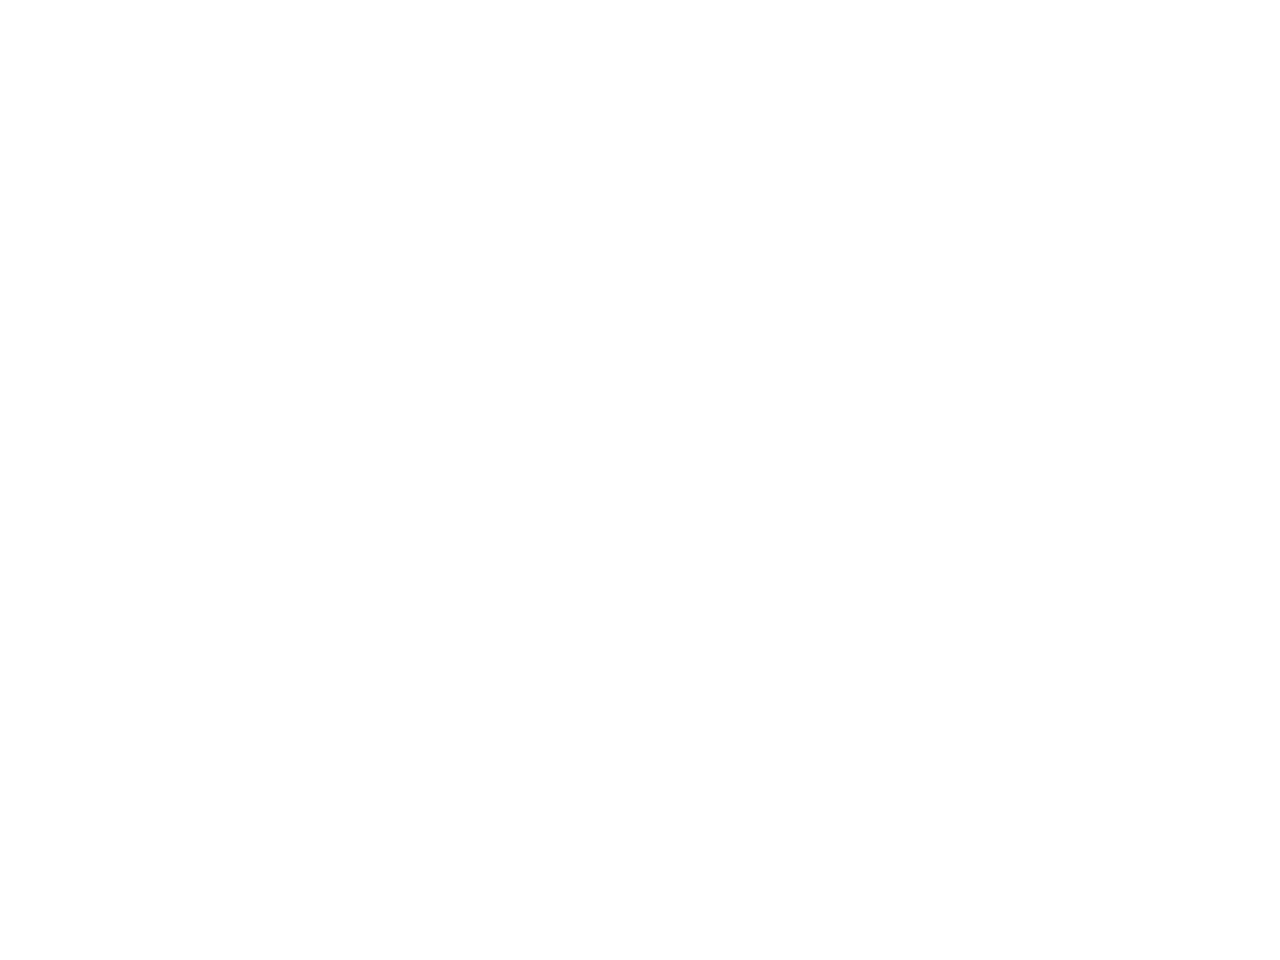

<IPython.core.display.Javascript object>


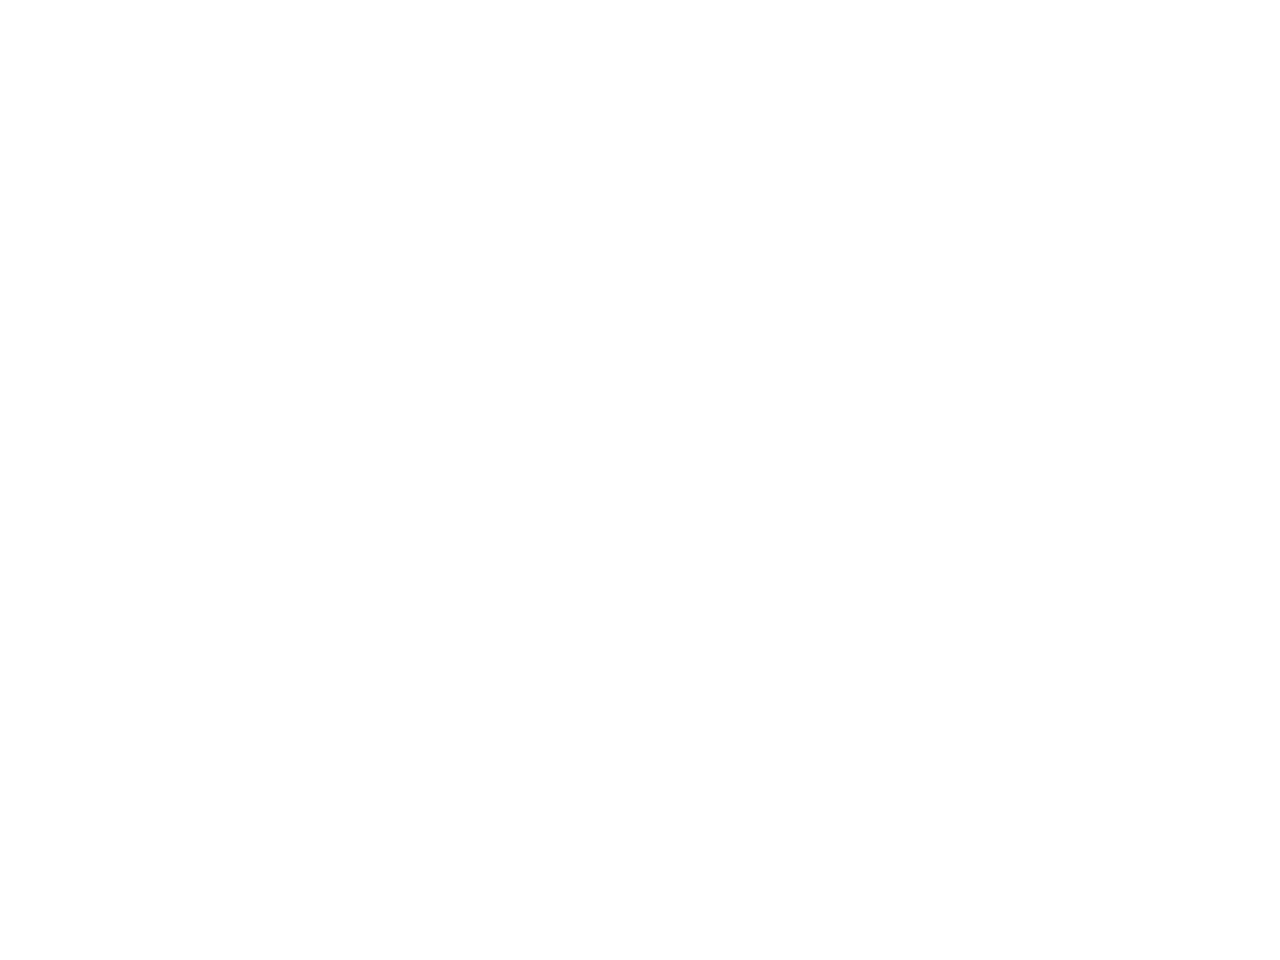

<IPython.core.display.Javascript object>


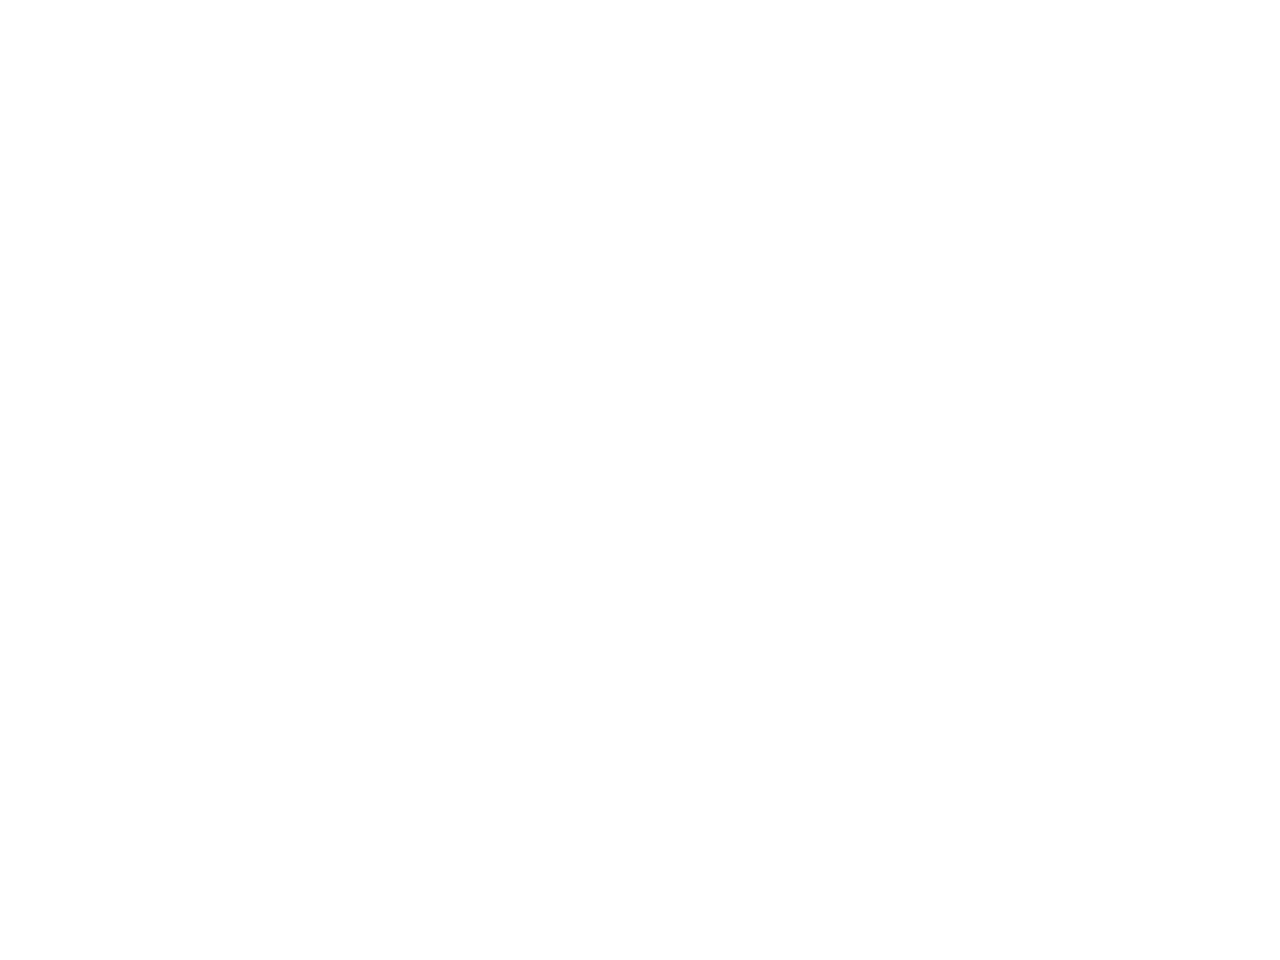

<IPython.core.display.Javascript object>


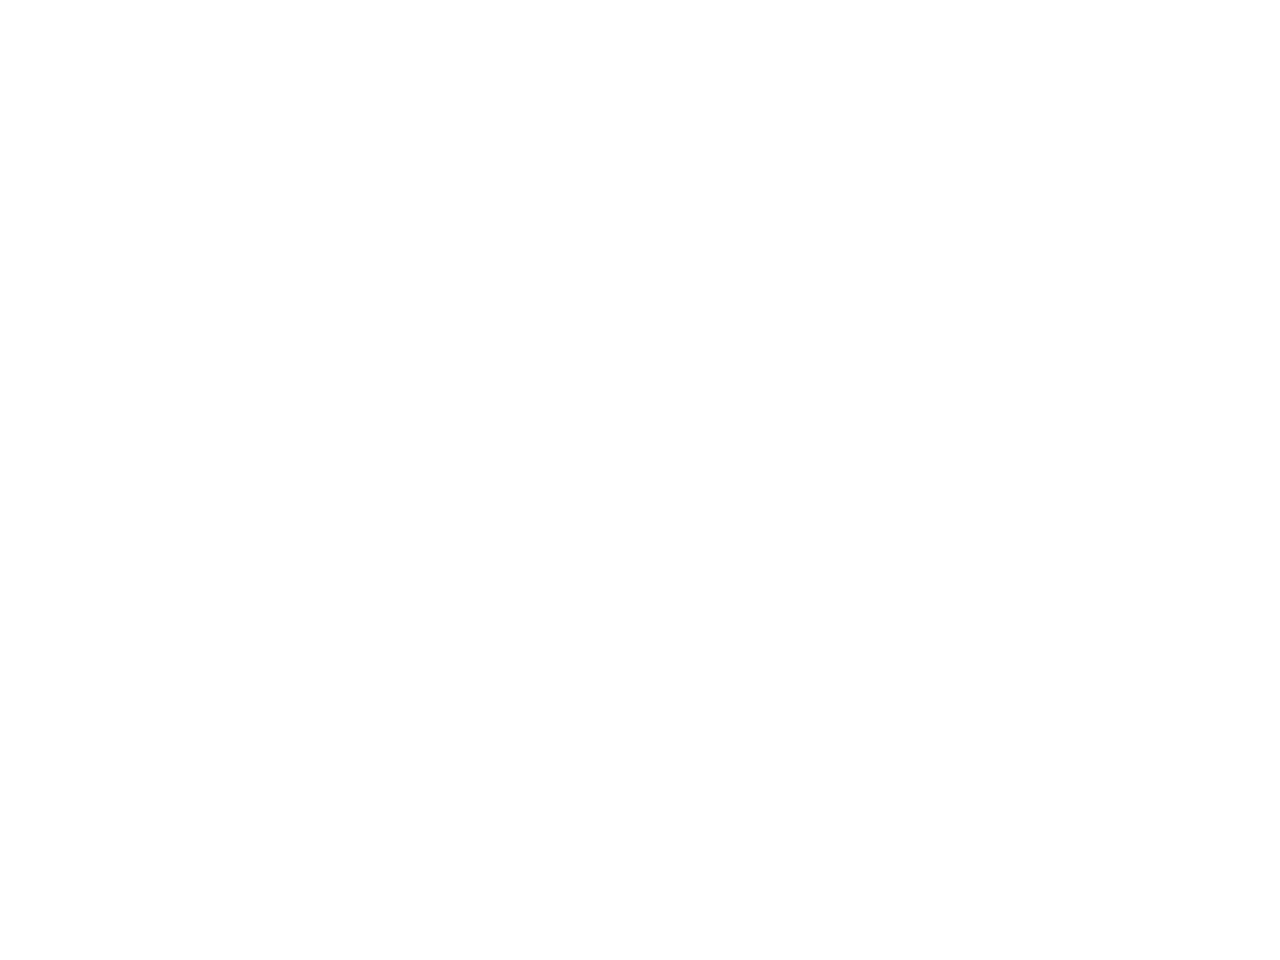

<IPython.core.display.Javascript object>


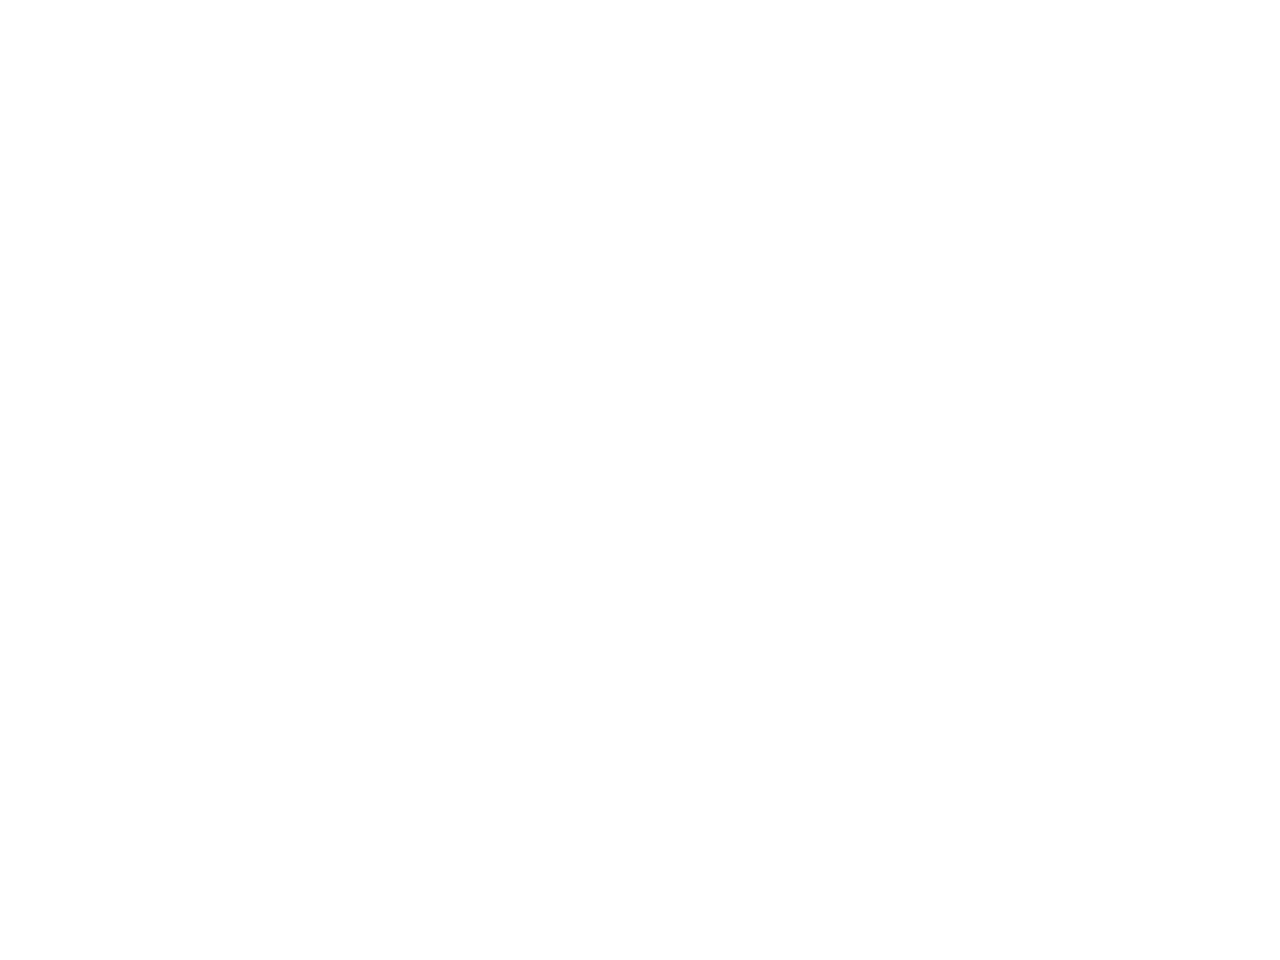

<IPython.core.display.Javascript object>


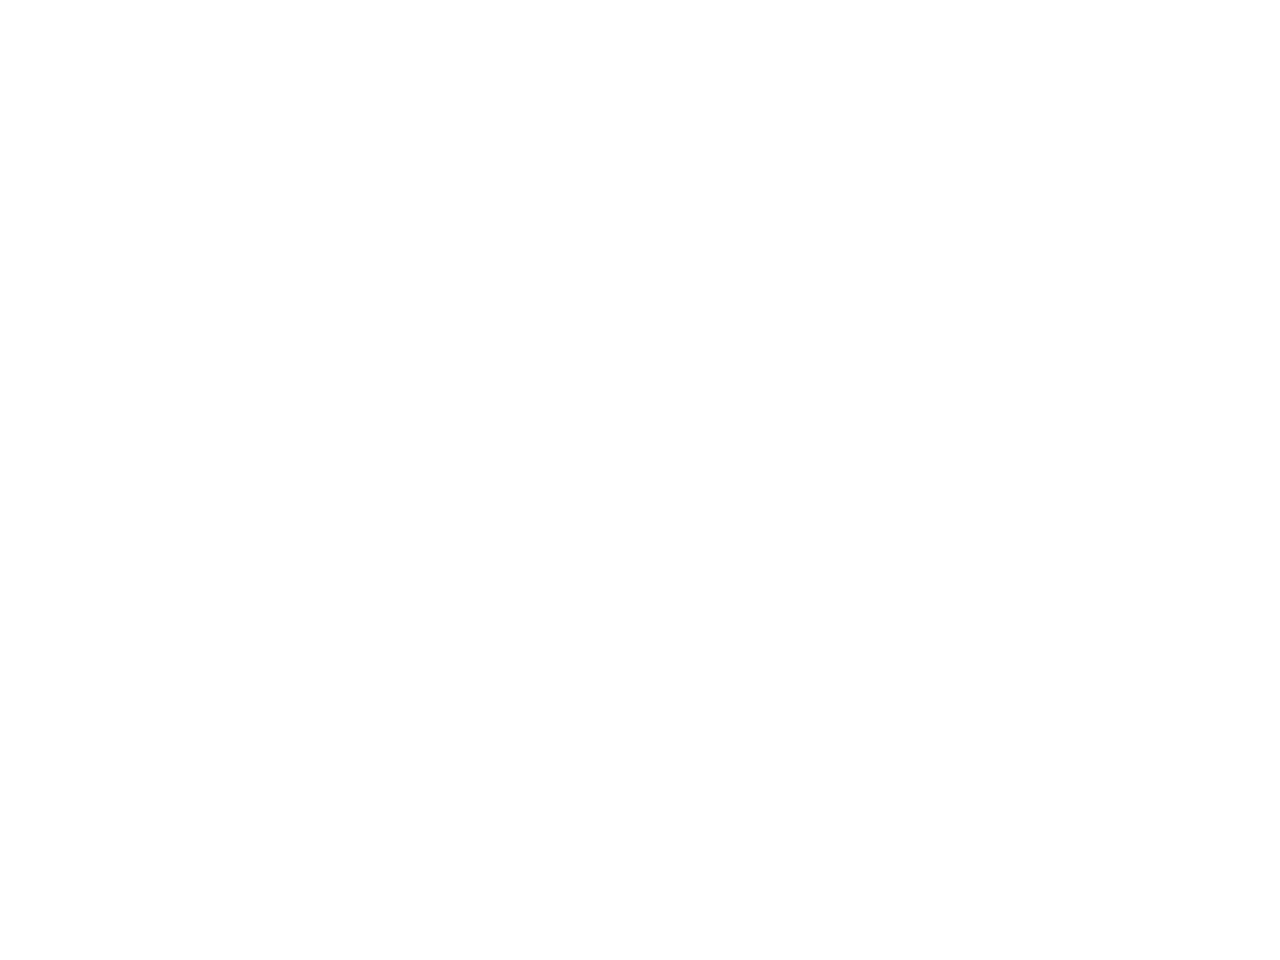

<IPython.core.display.Javascript object>


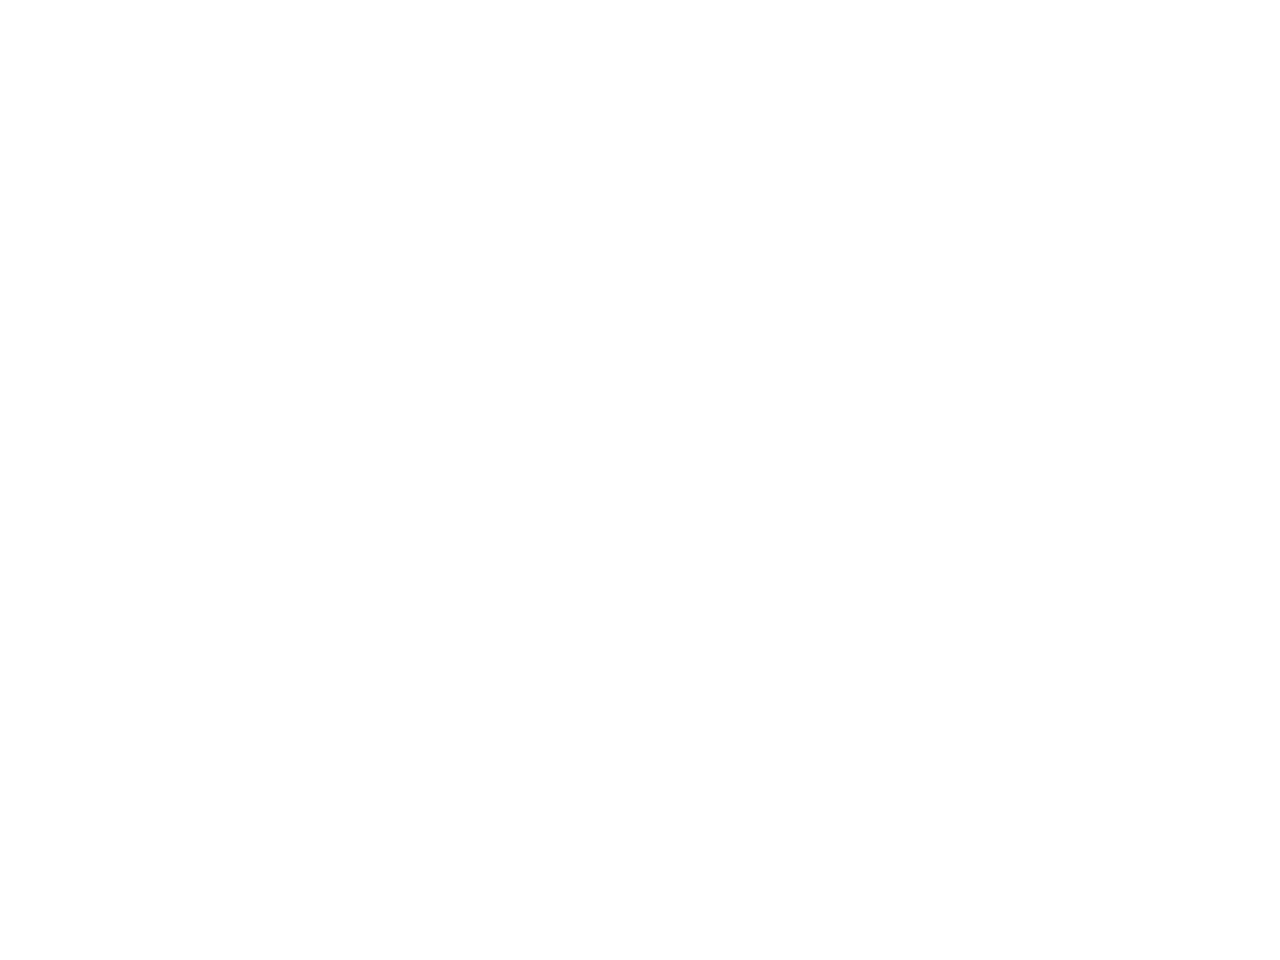

<IPython.core.display.Javascript object>


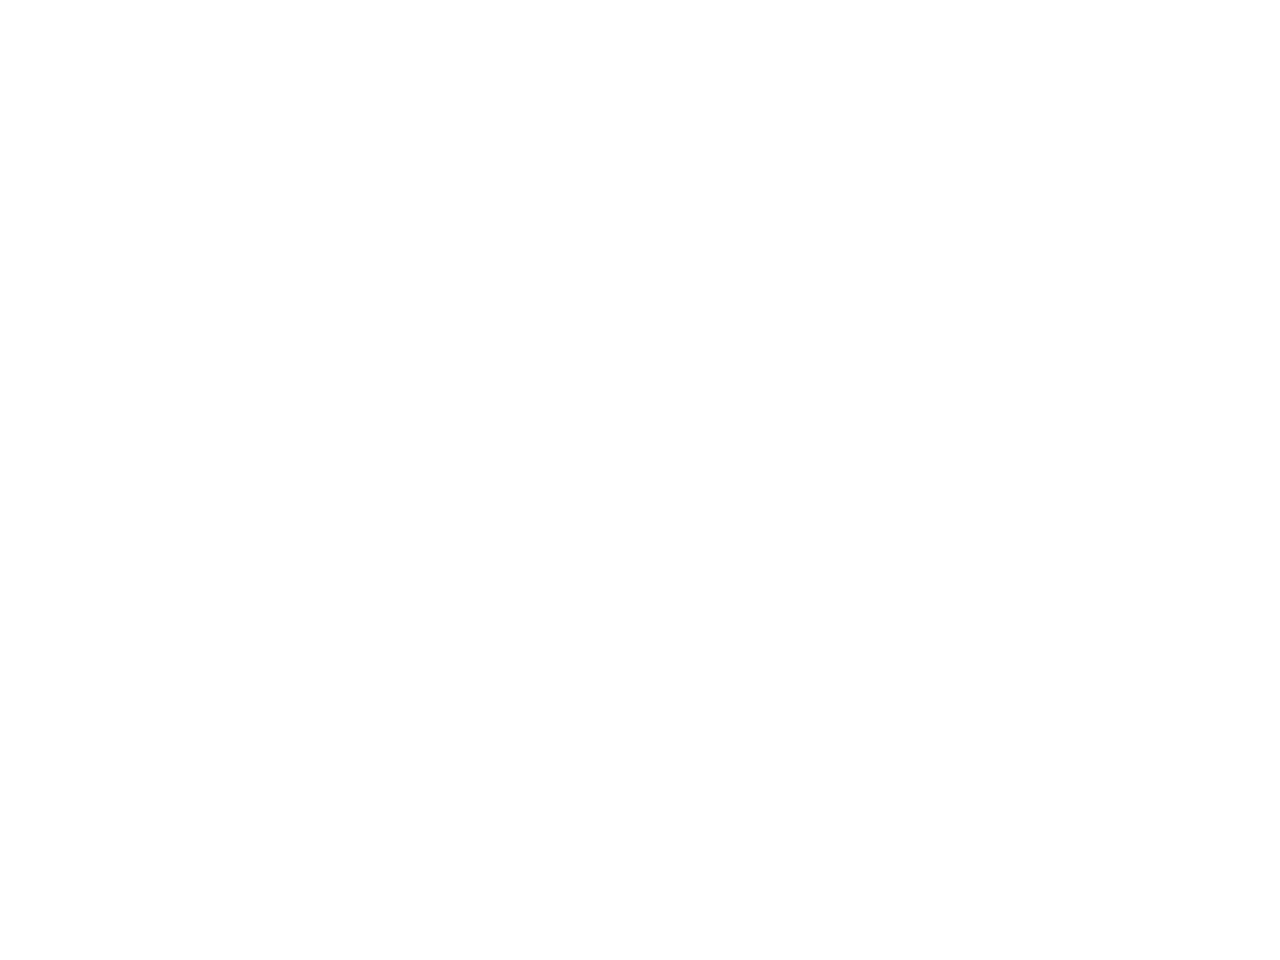

<IPython.core.display.Javascript object>


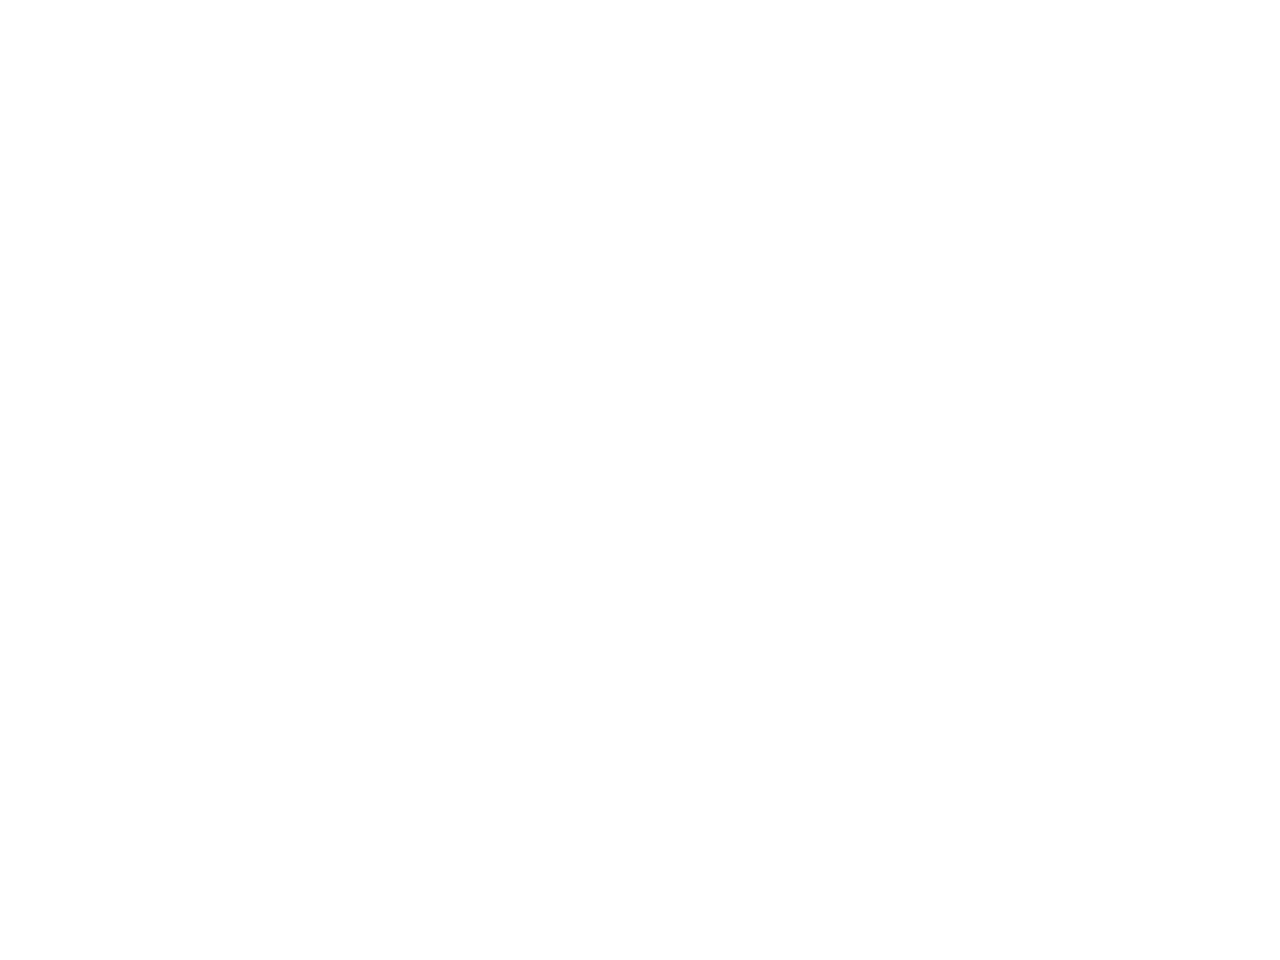

<IPython.core.display.Javascript object>


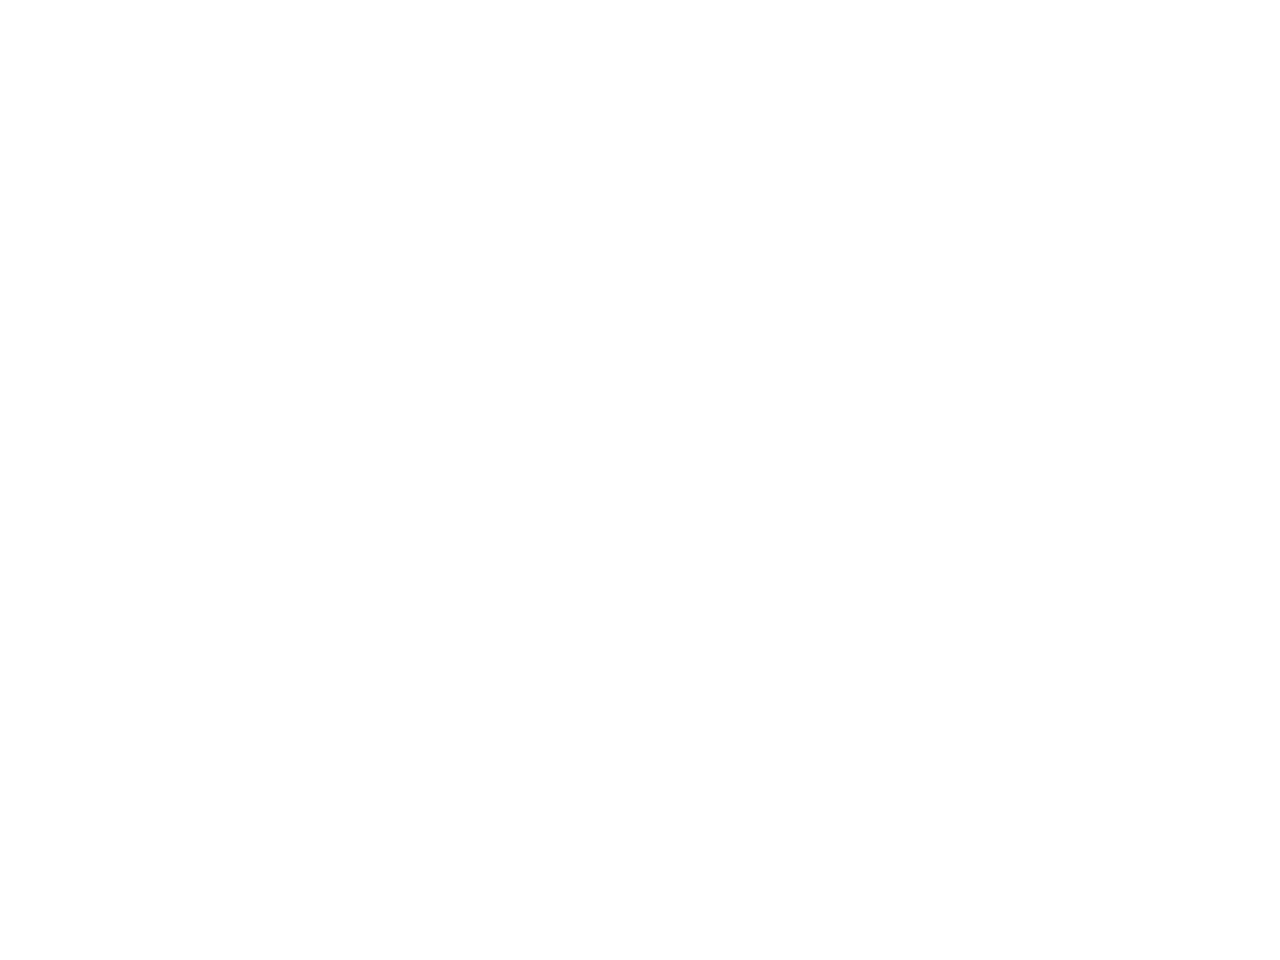

<IPython.core.display.Javascript object>


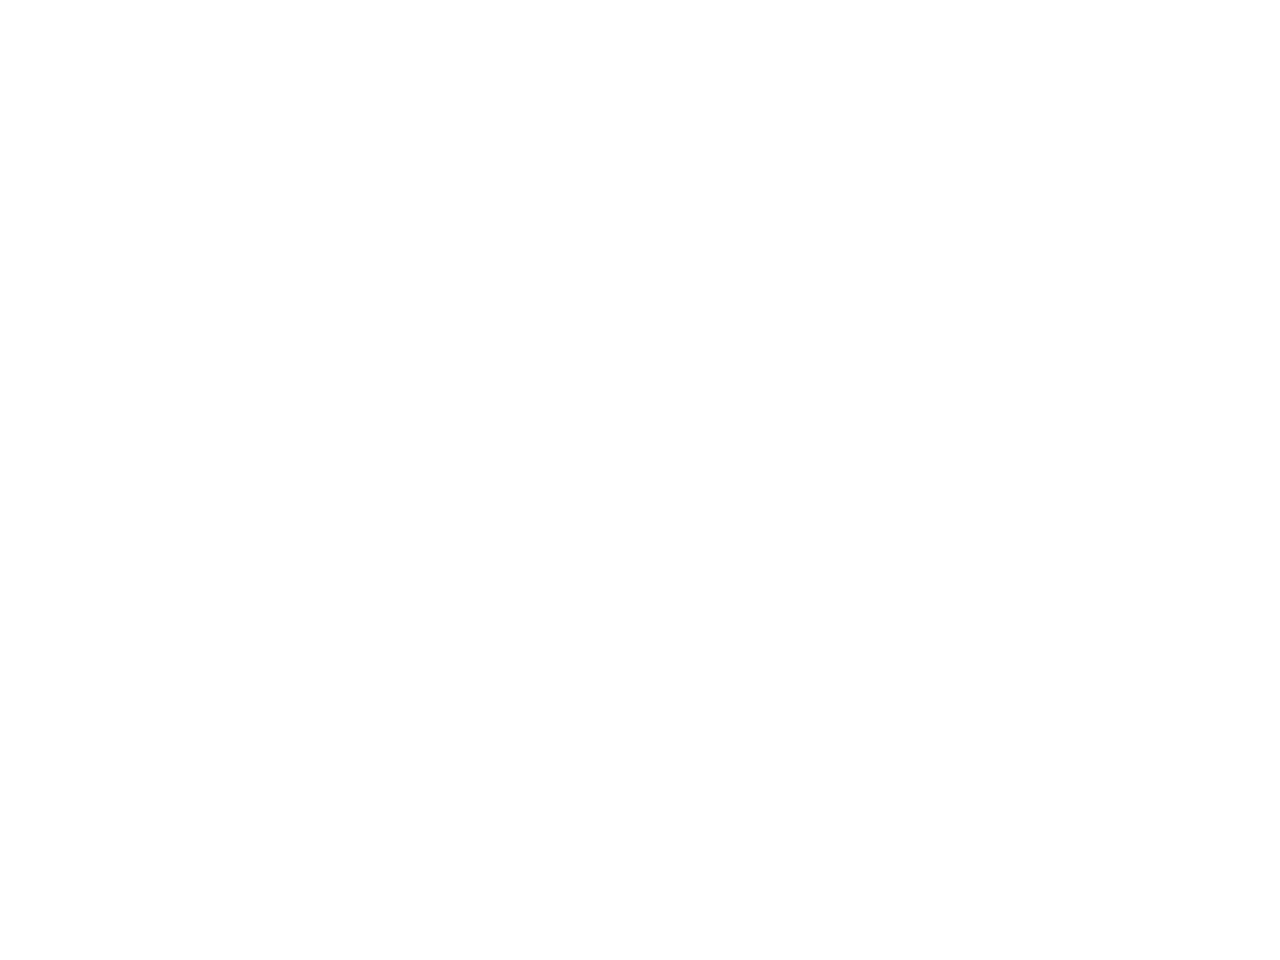

<IPython.core.display.Javascript object>


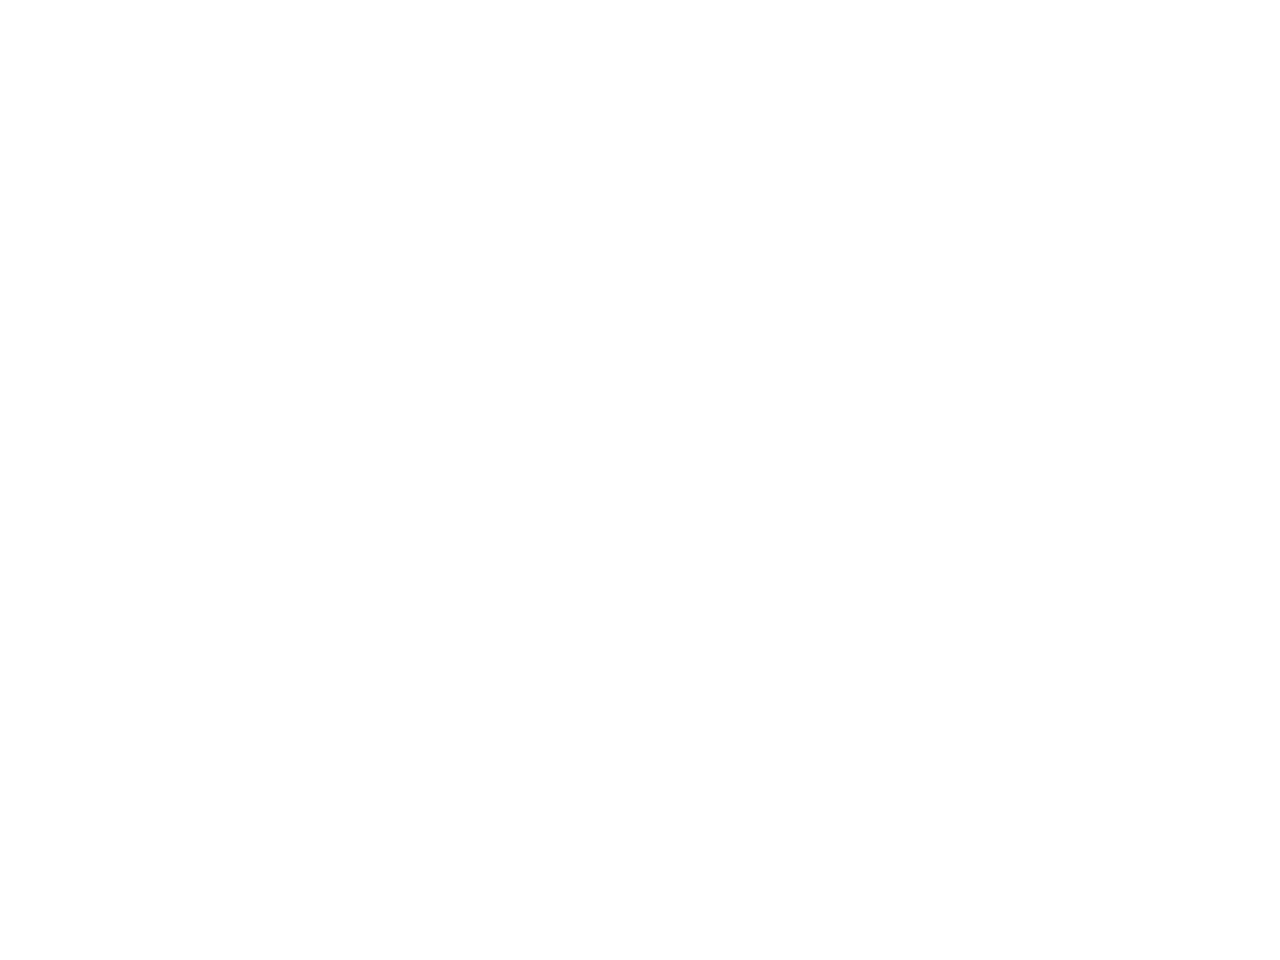

<IPython.core.display.Javascript object>


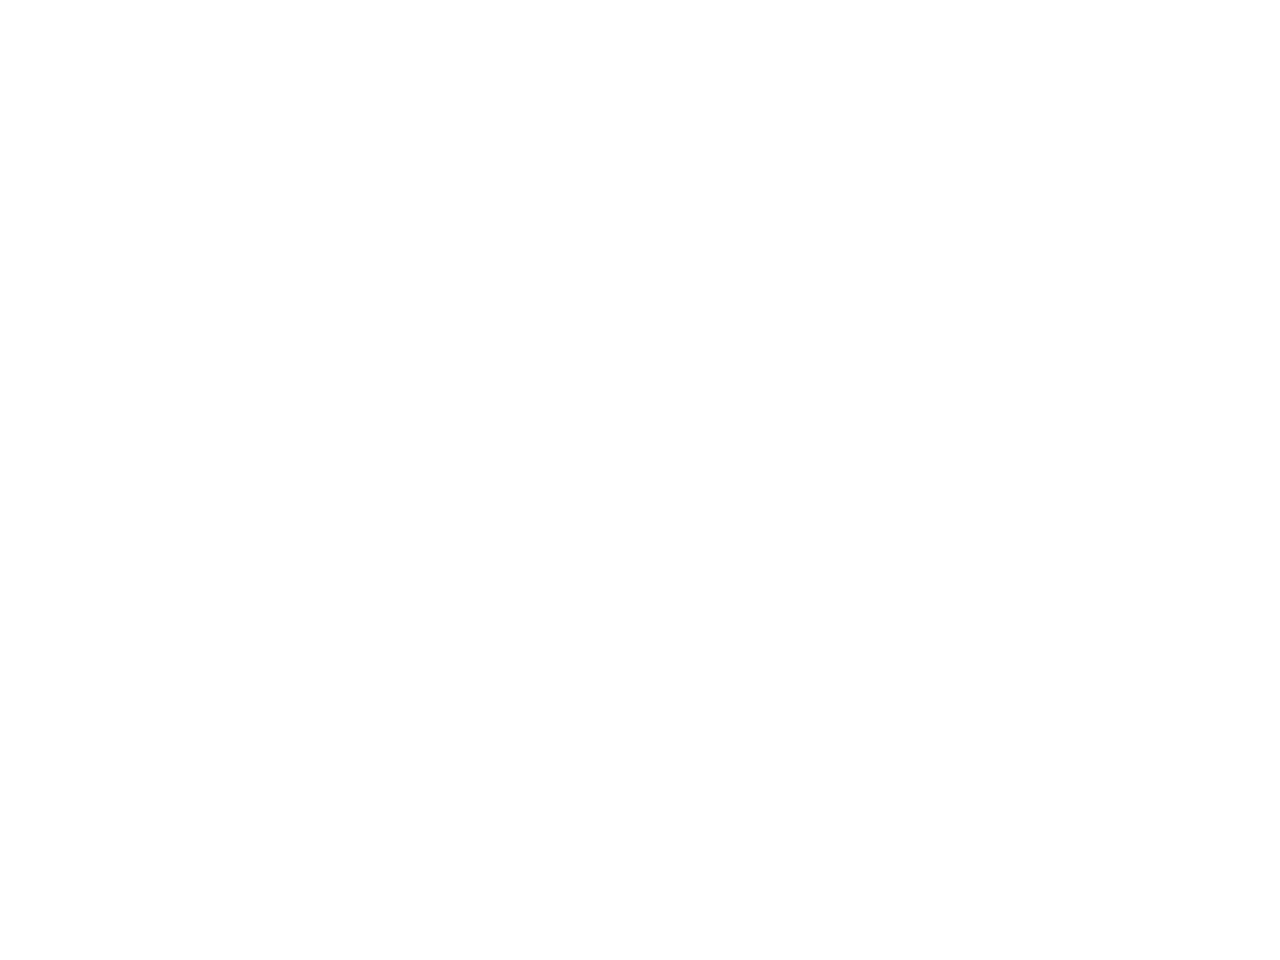

<IPython.core.display.Javascript object>


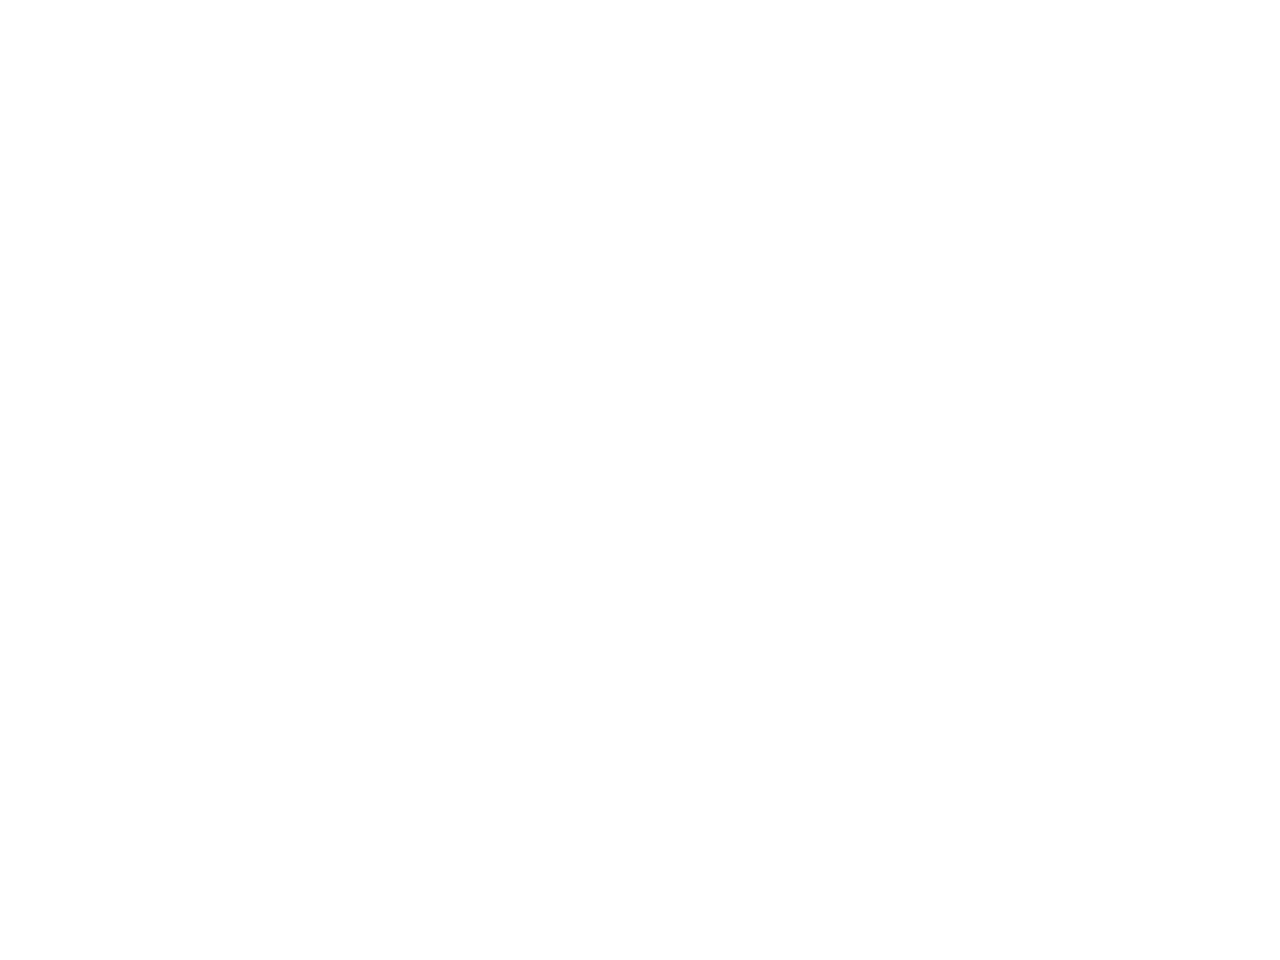

<IPython.core.display.Javascript object>


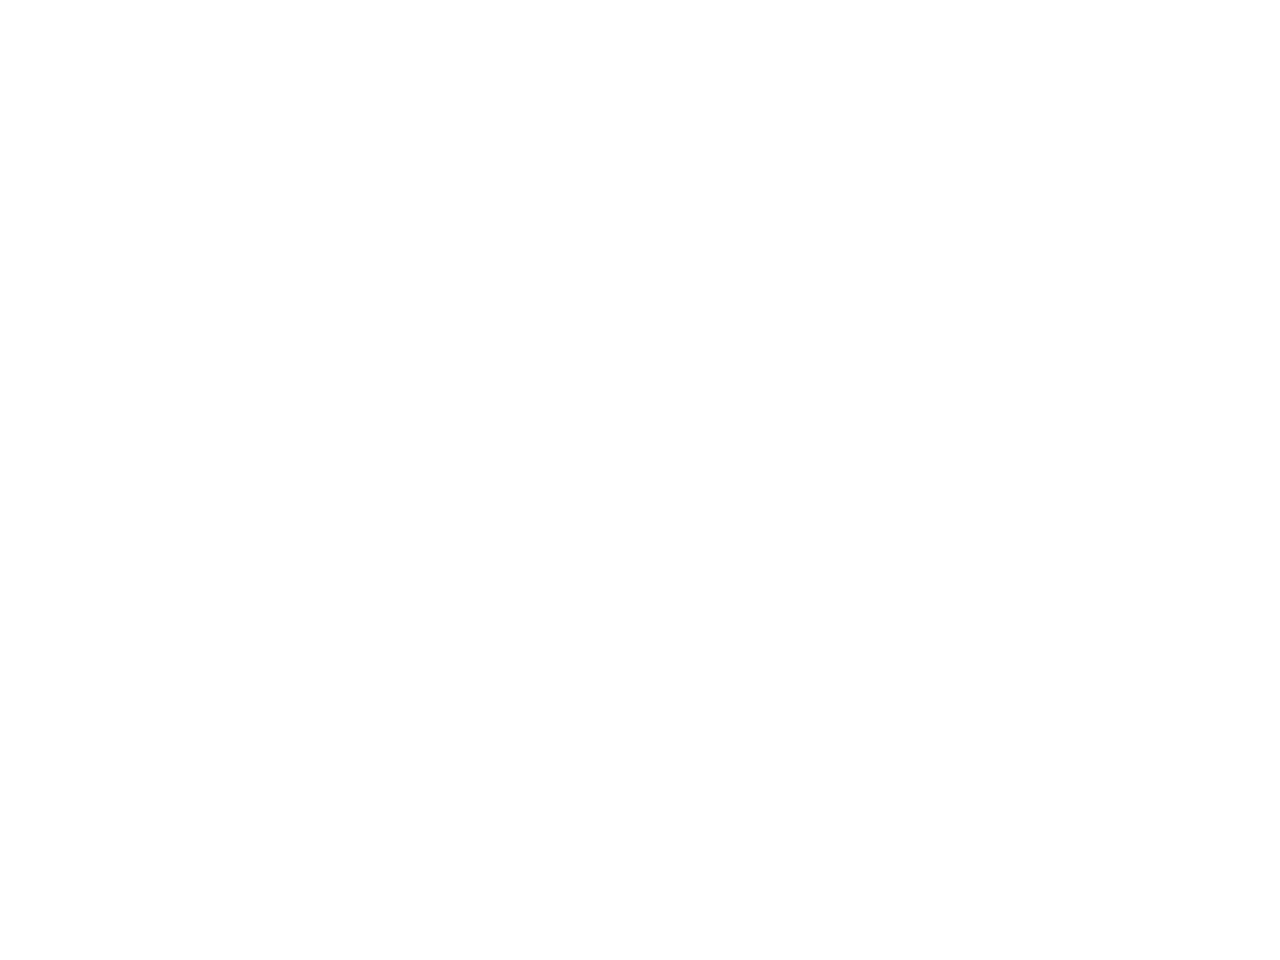

<IPython.core.display.Javascript object>


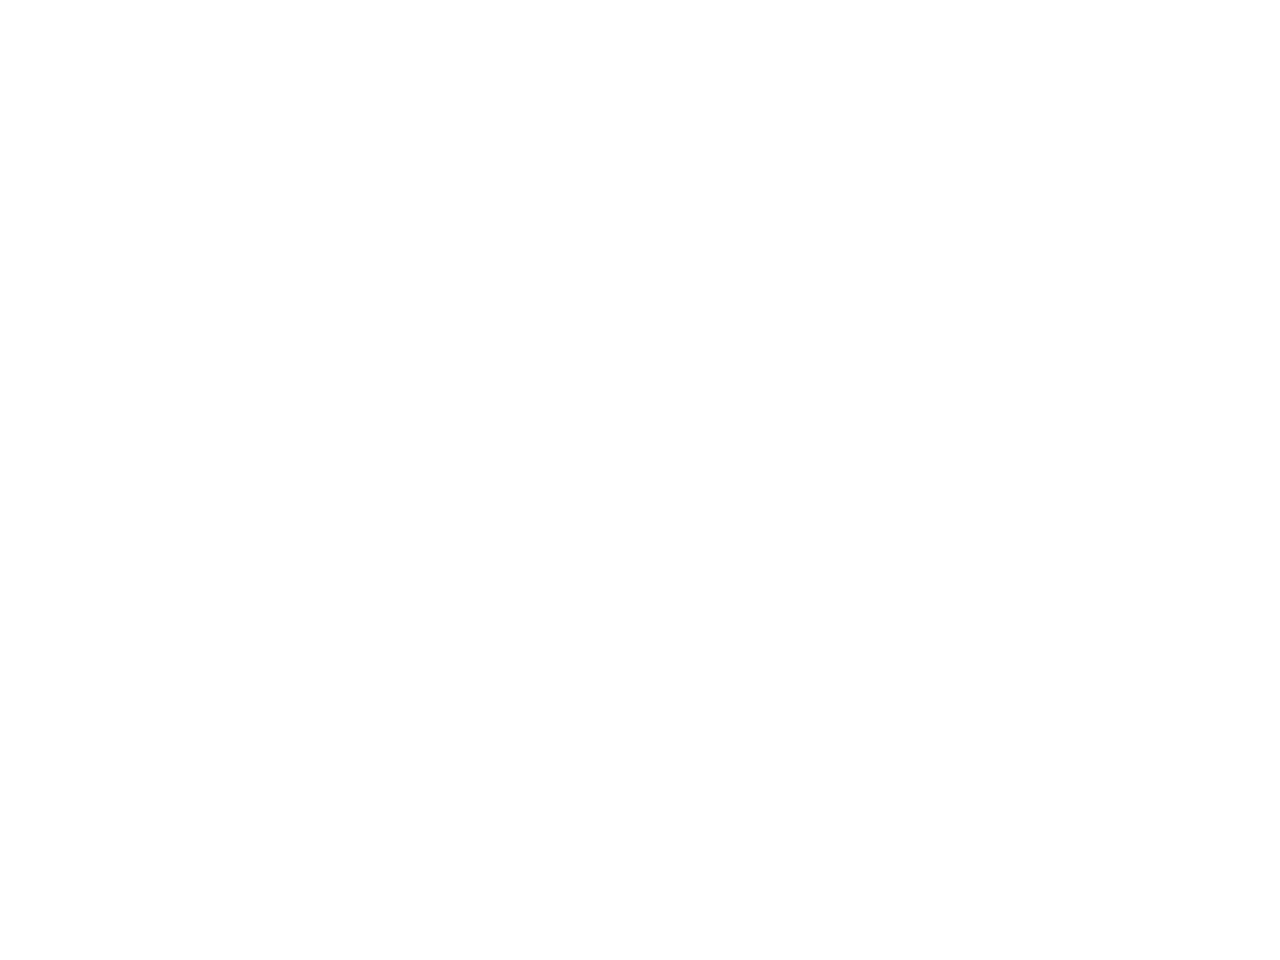

<IPython.core.display.Javascript object>


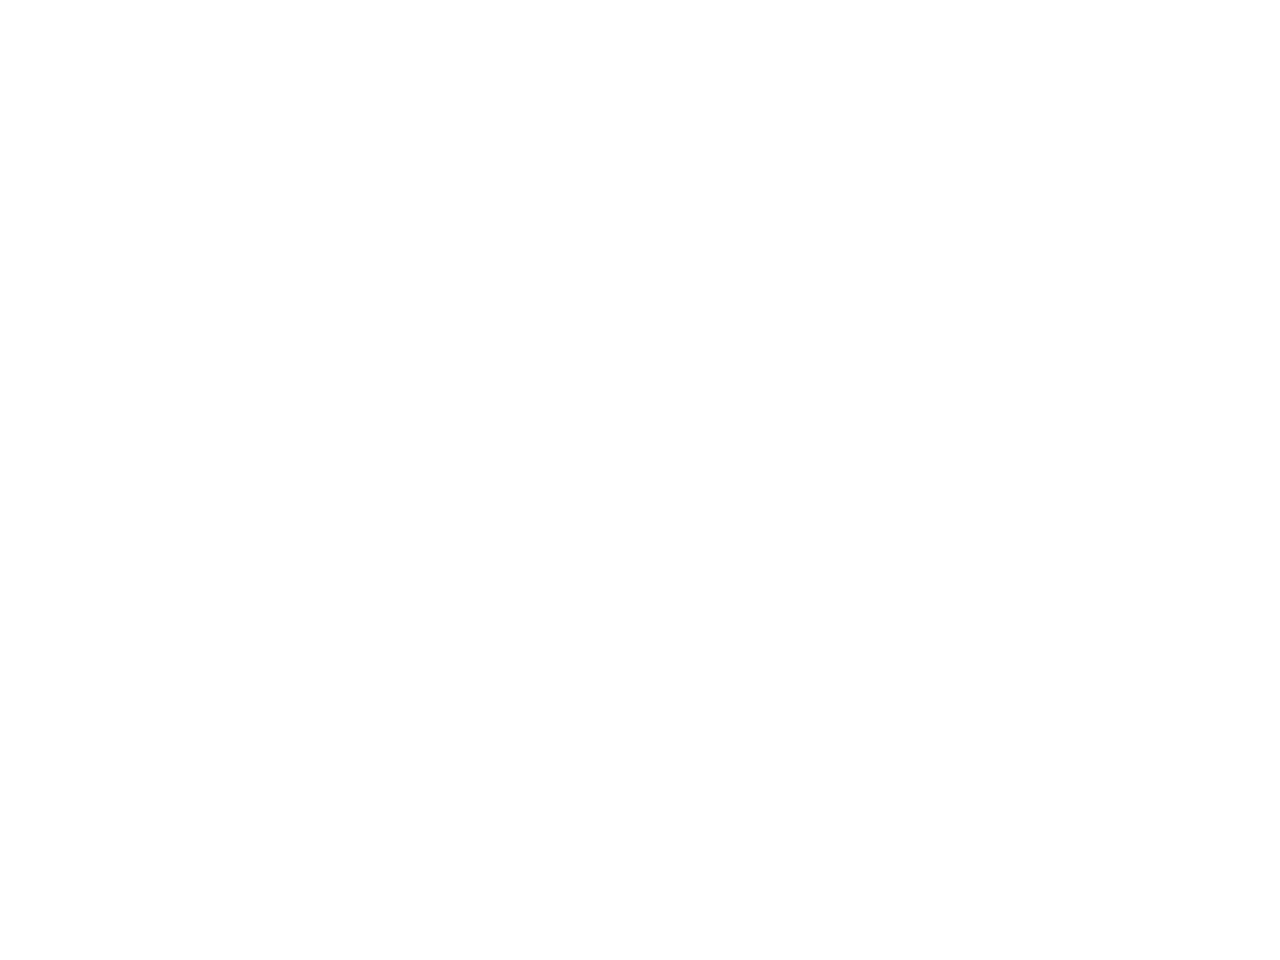

<IPython.core.display.Javascript object>


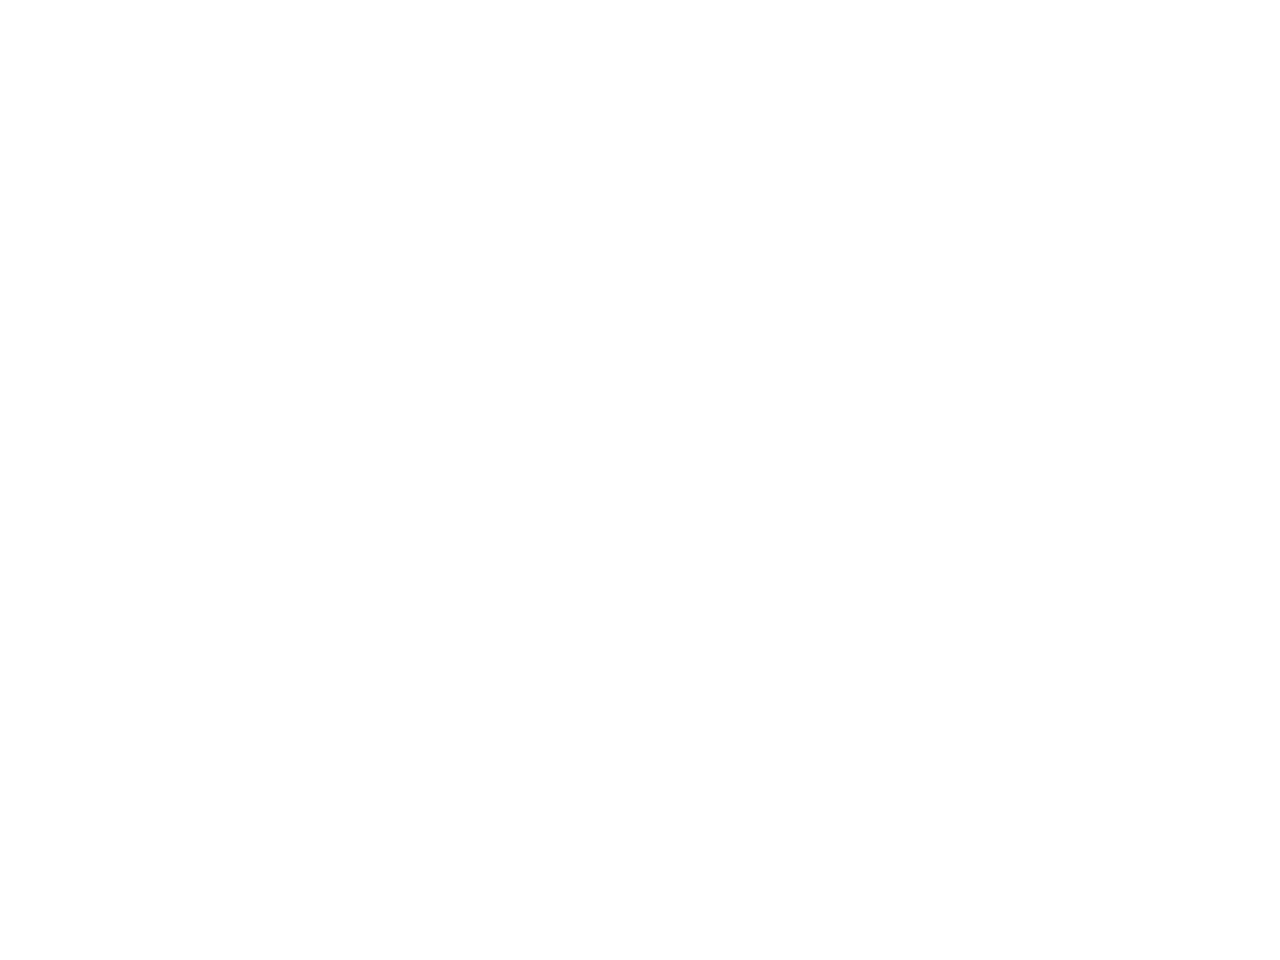

<IPython.core.display.Javascript object>


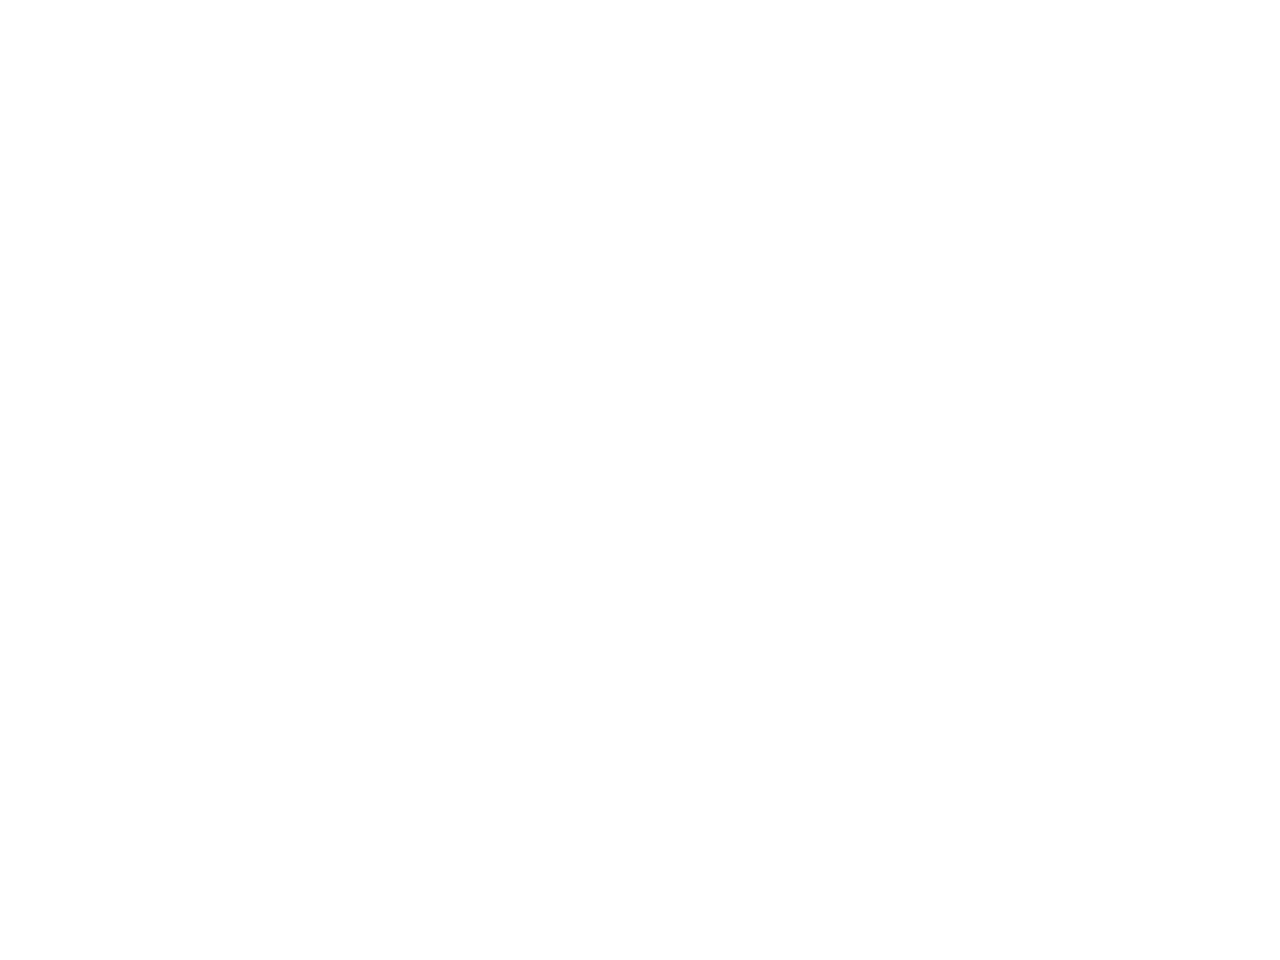

<IPython.core.display.Javascript object>


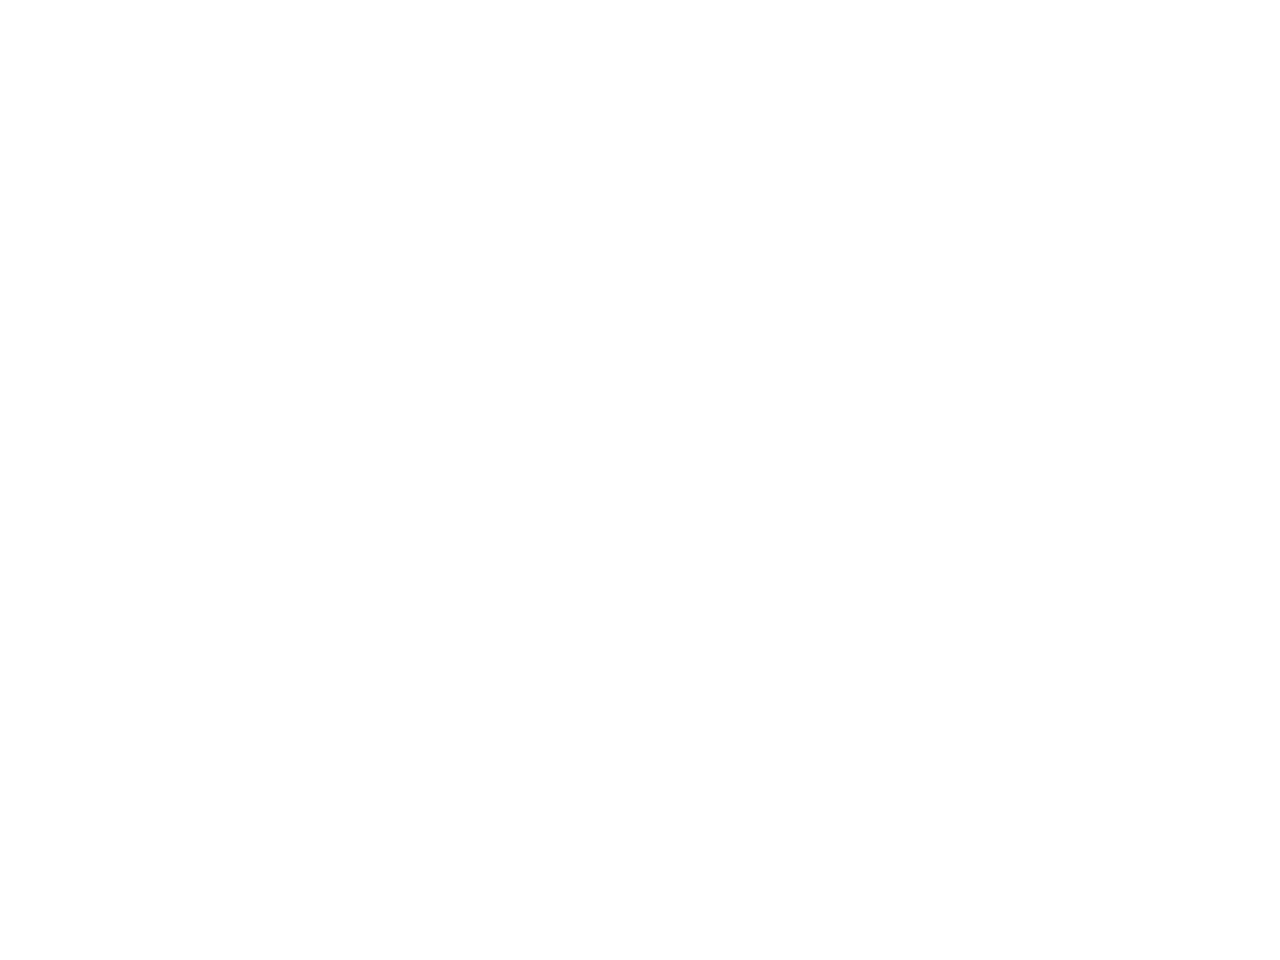

<IPython.core.display.Javascript object>


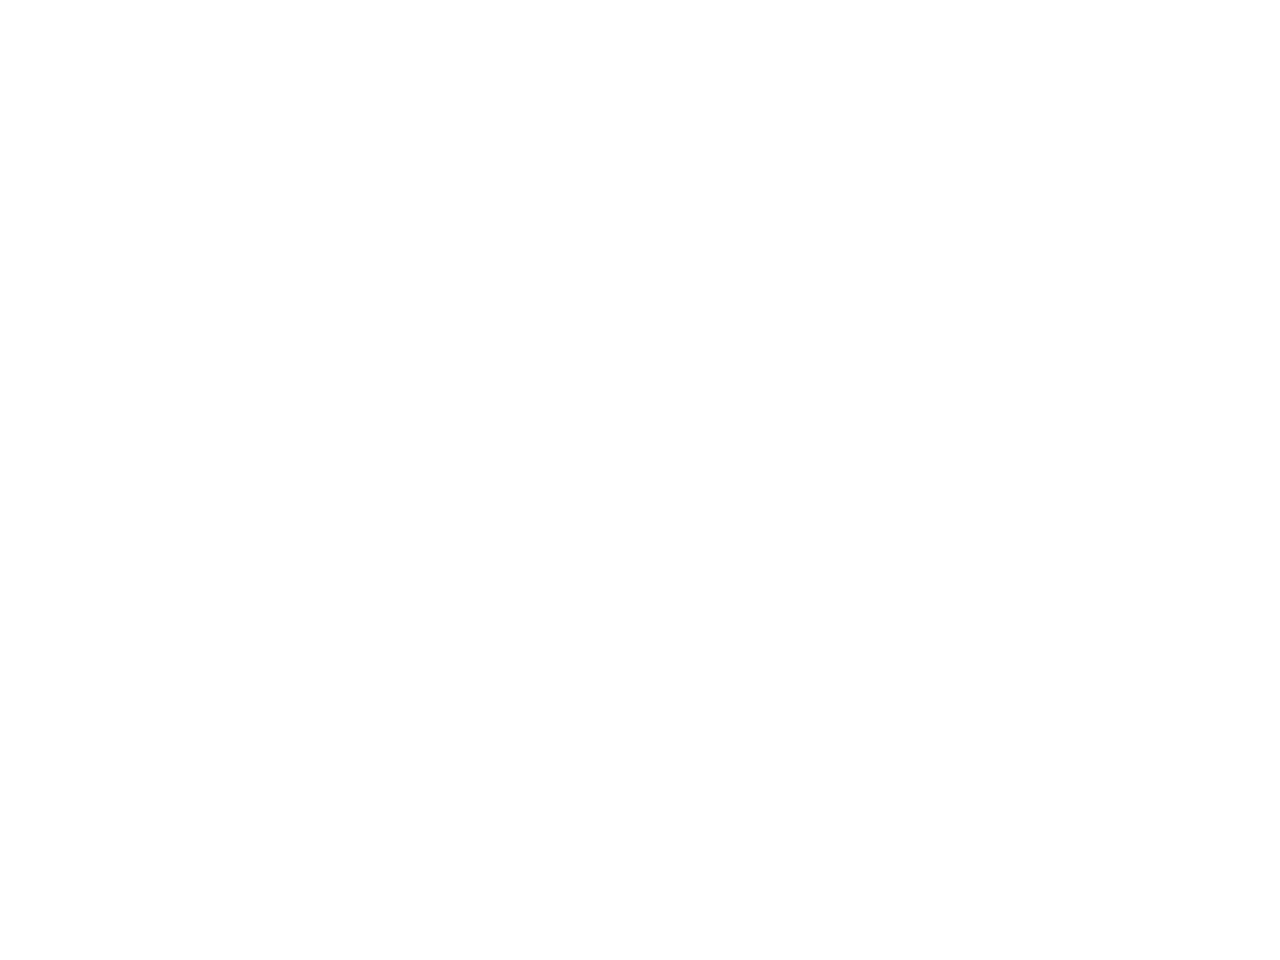

<IPython.core.display.Javascript object>


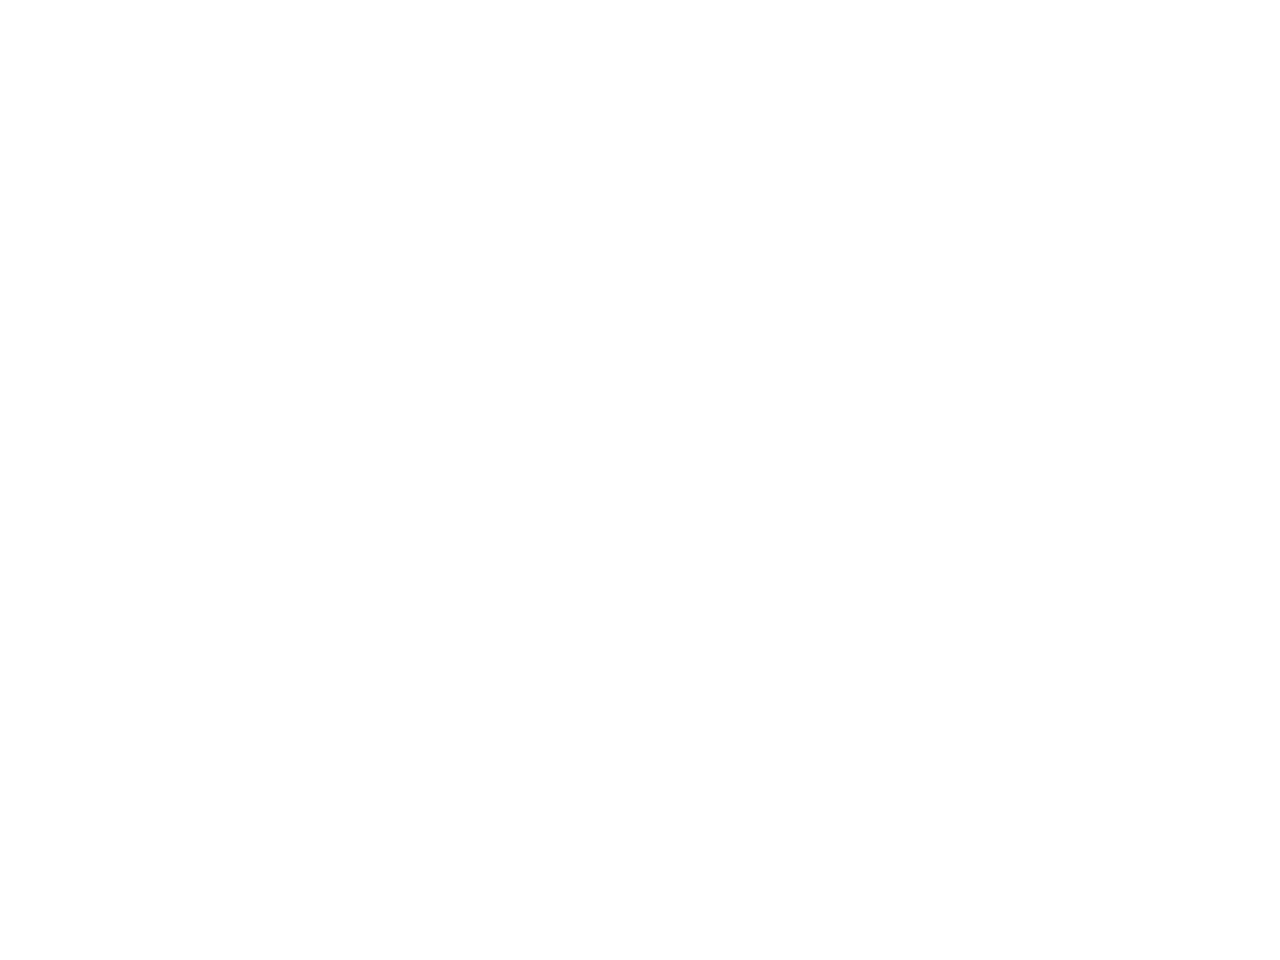

<IPython.core.display.Javascript object>


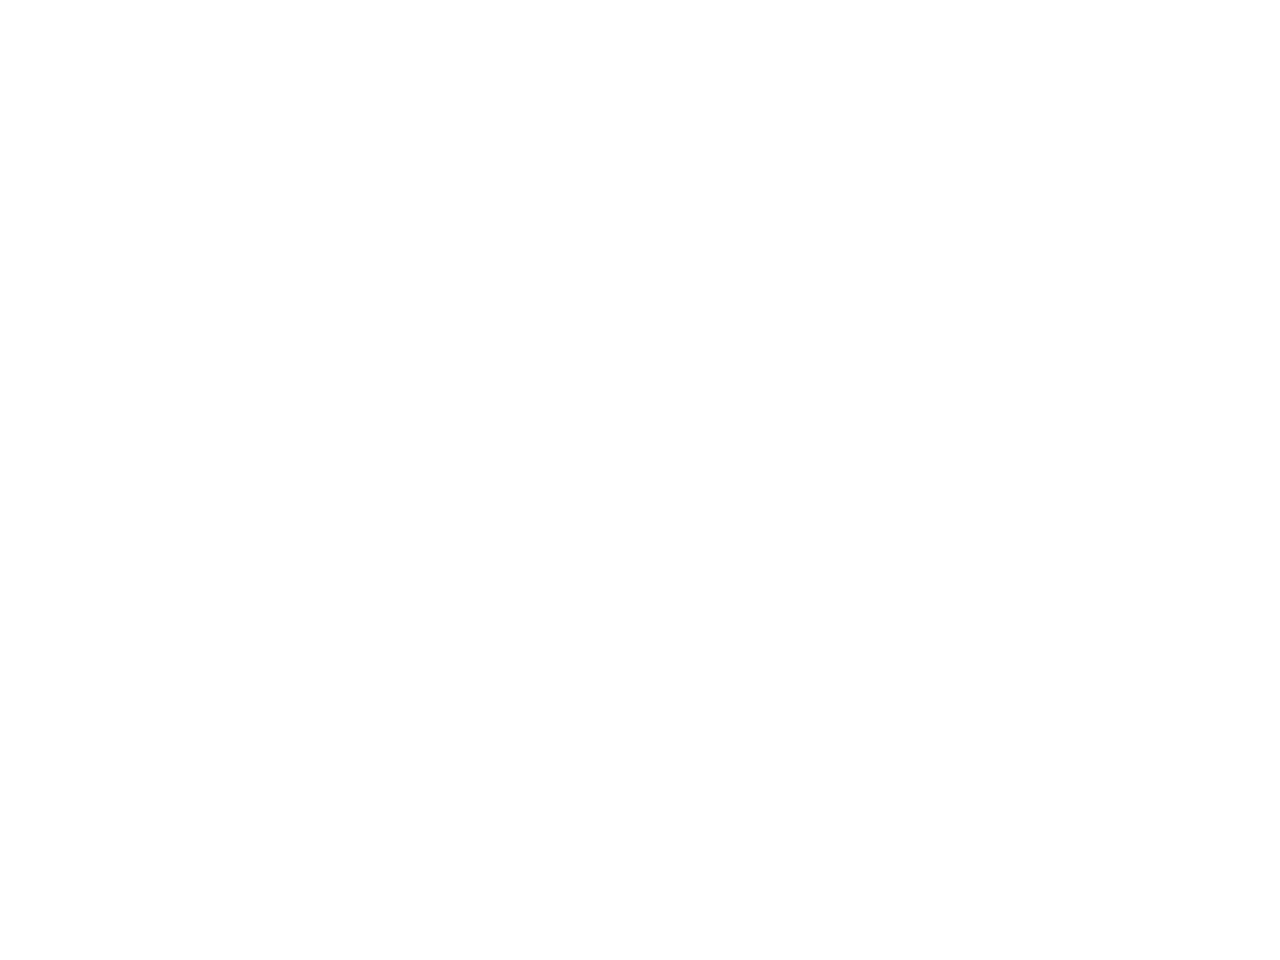

<IPython.core.display.Javascript object>


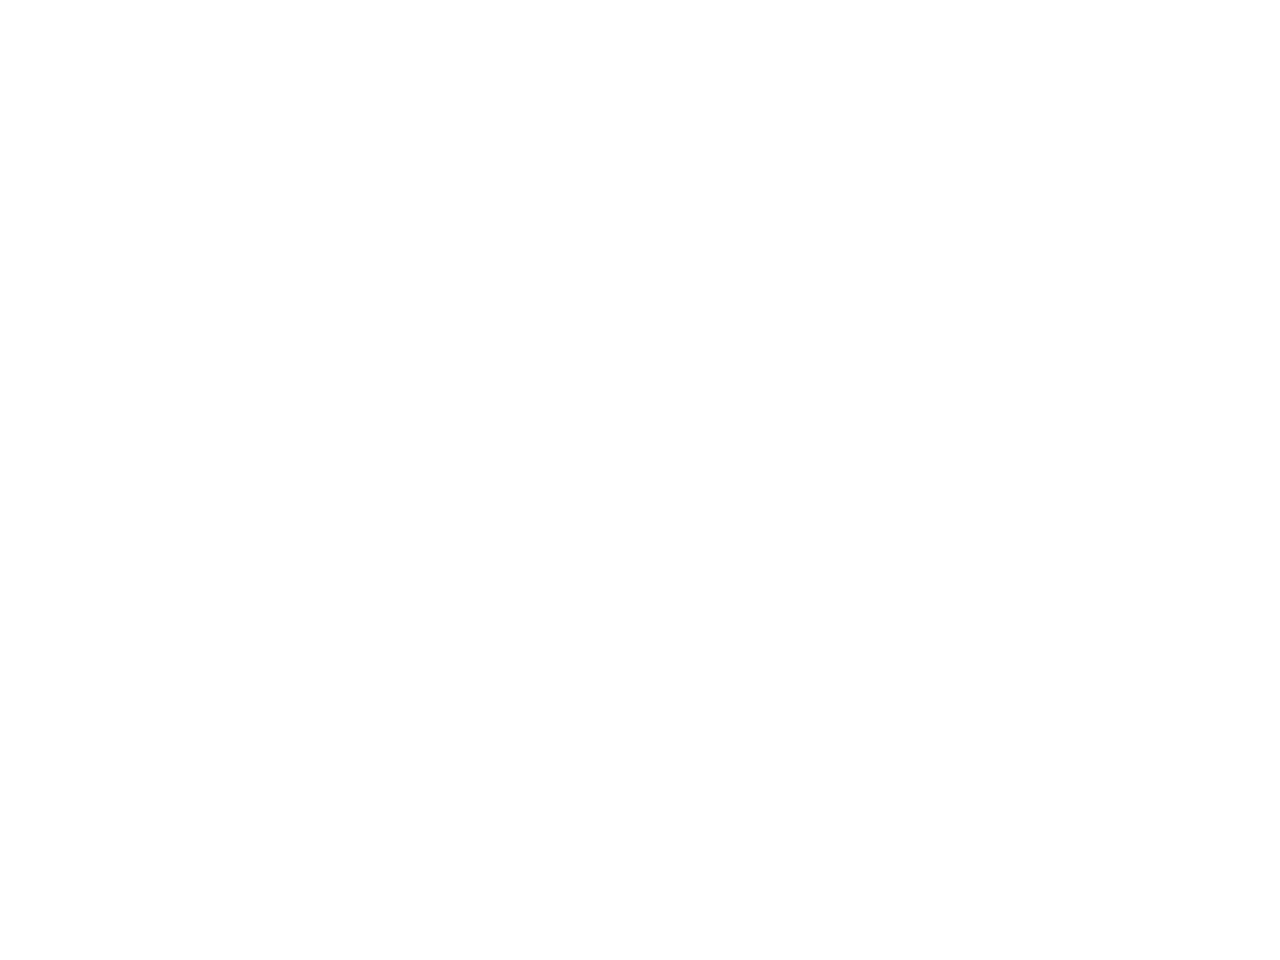

<IPython.core.display.Javascript object>


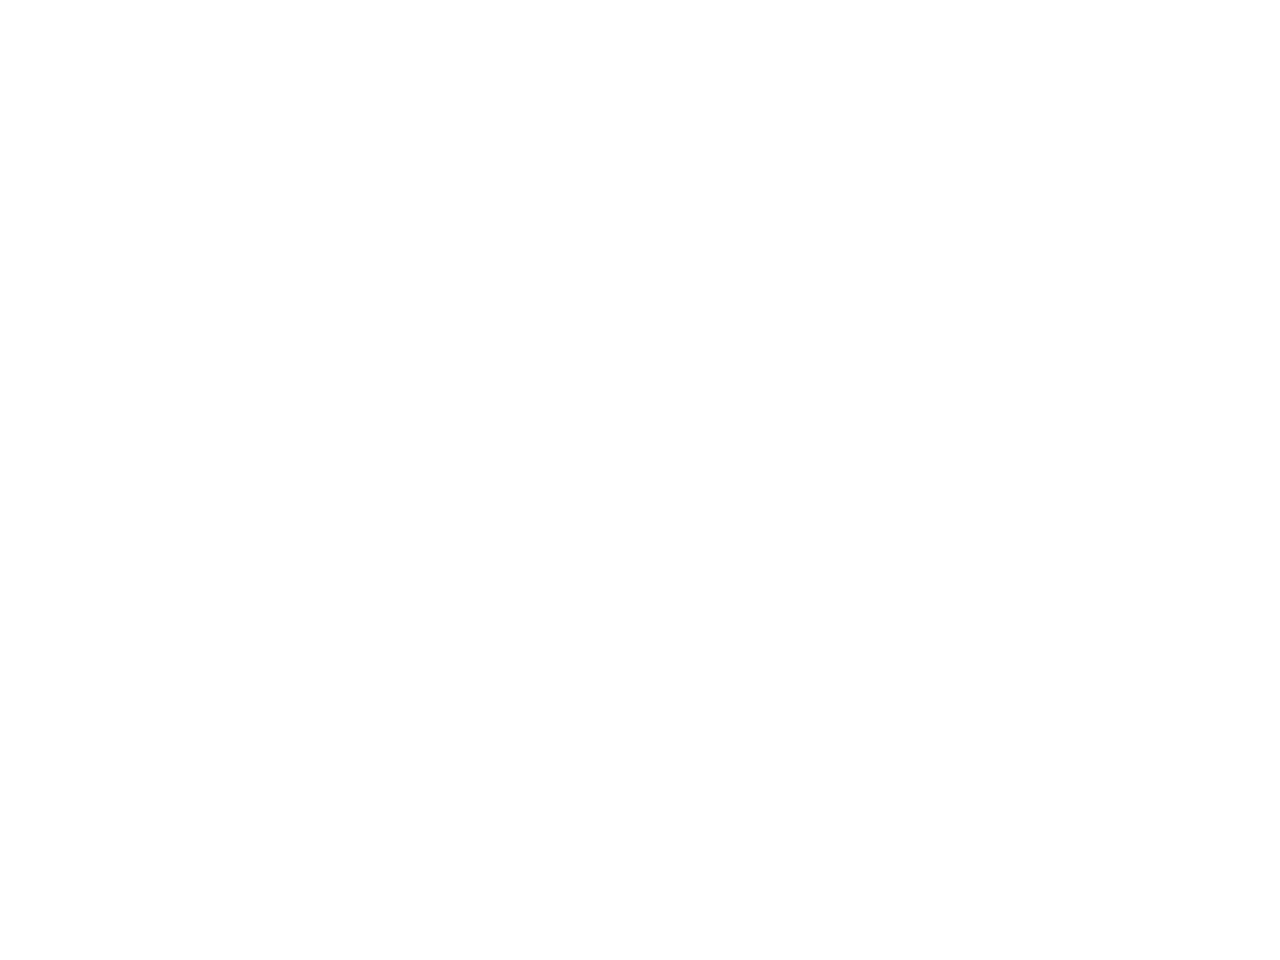

<IPython.core.display.Javascript object>


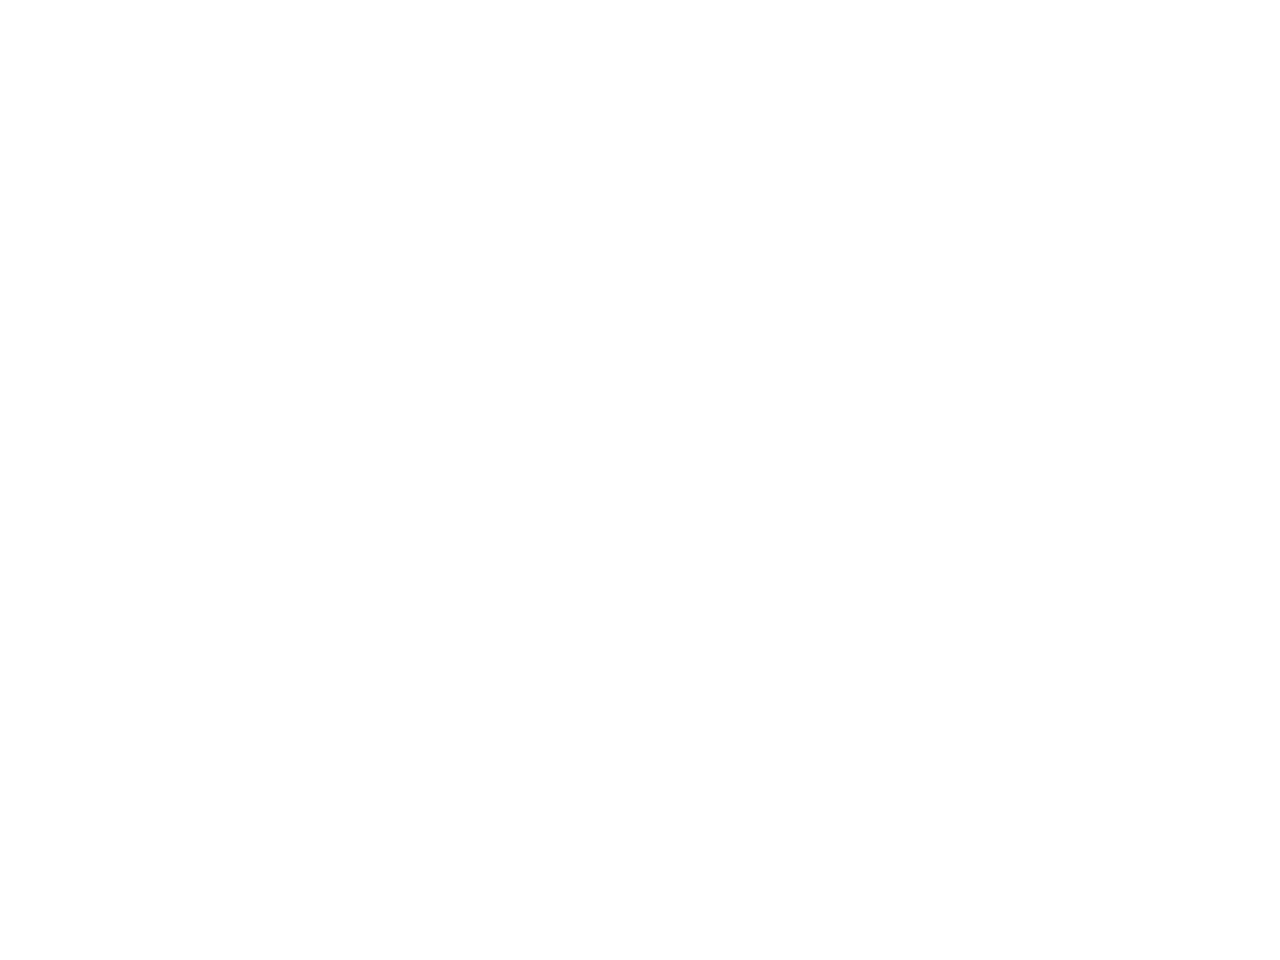

<IPython.core.display.Javascript object>


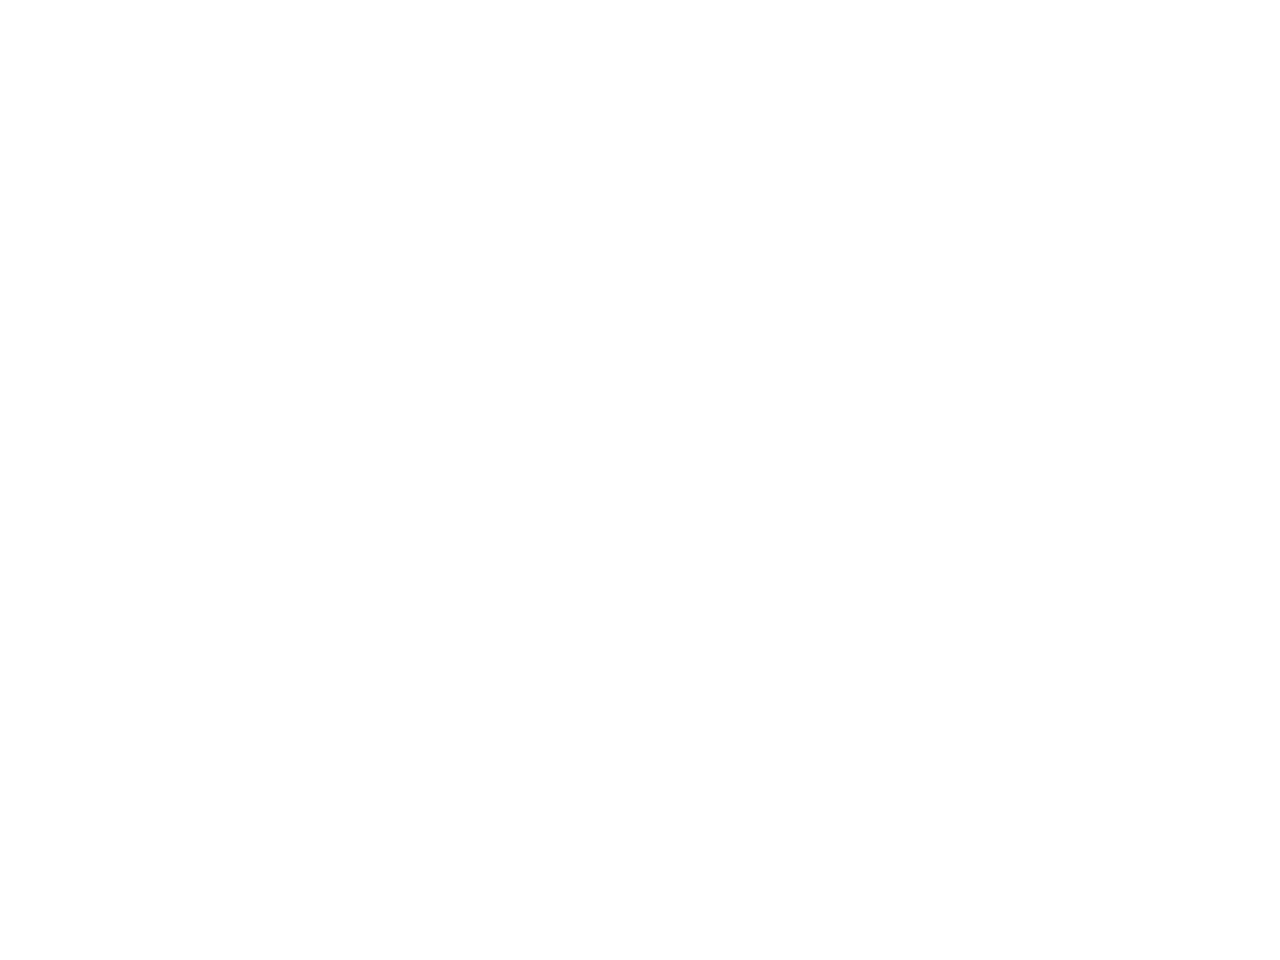

<IPython.core.display.Javascript object>


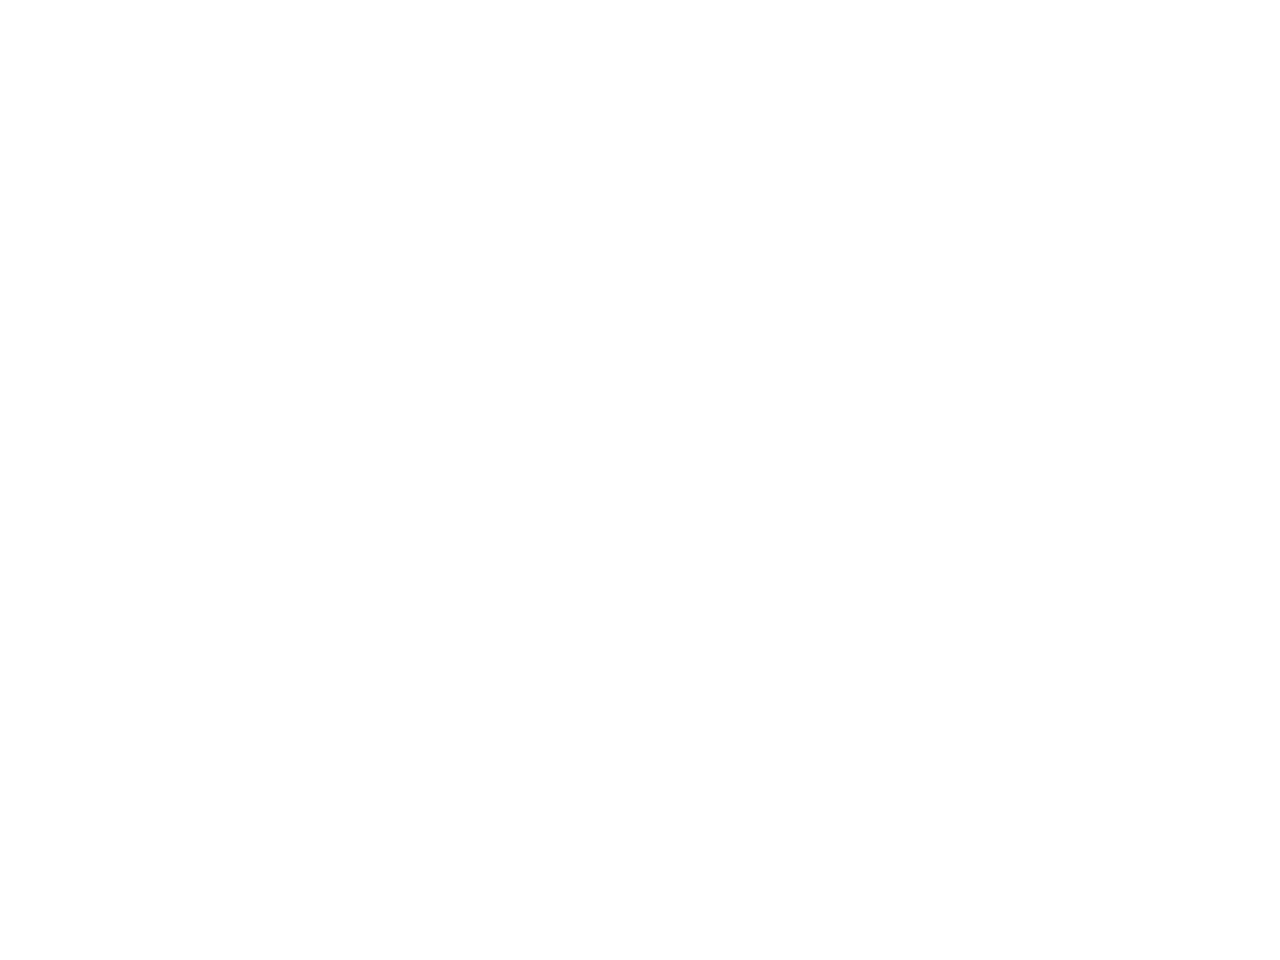

<IPython.core.display.Javascript object>


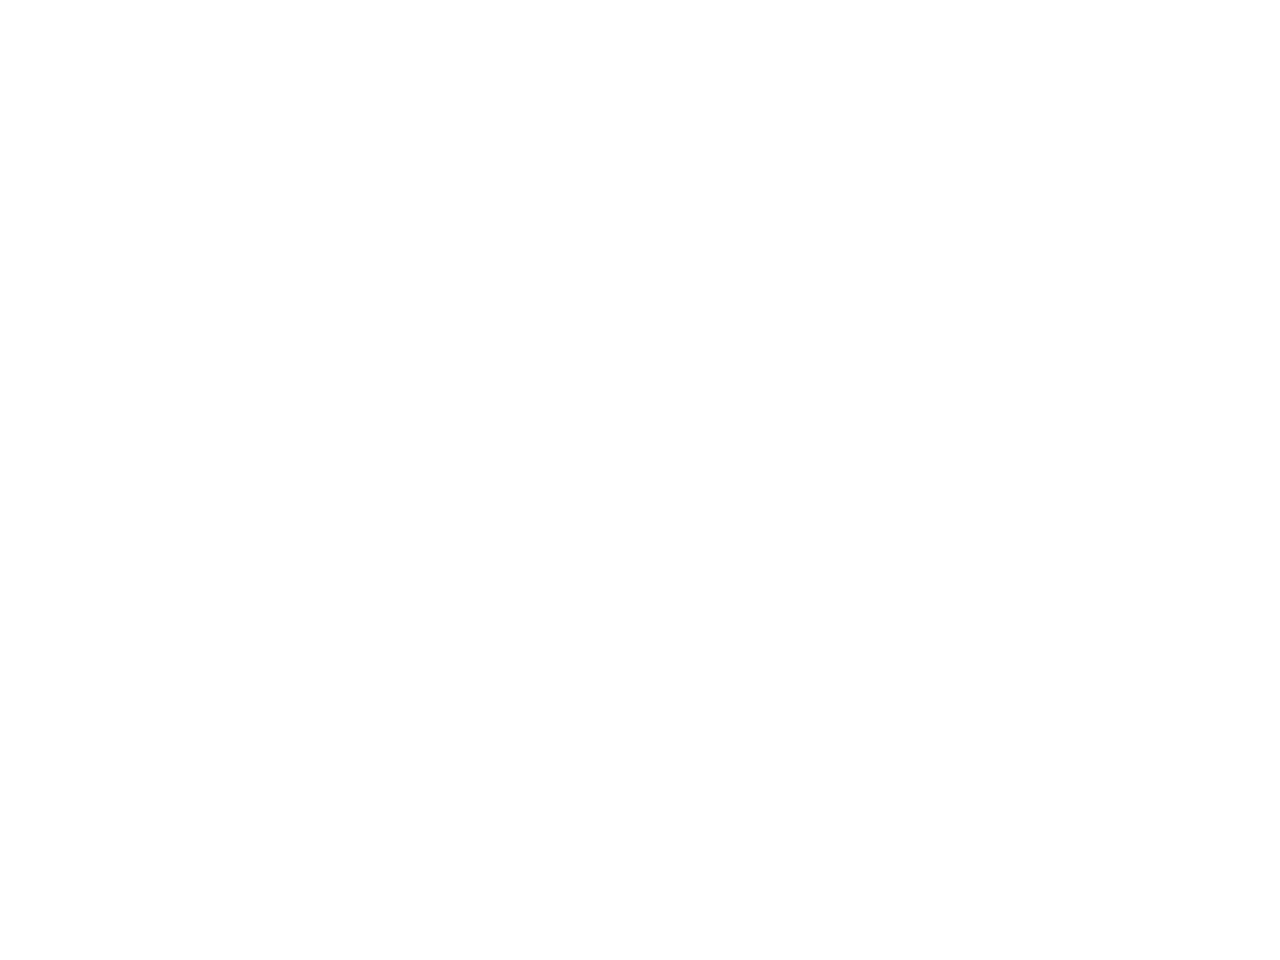

<IPython.core.display.Javascript object>


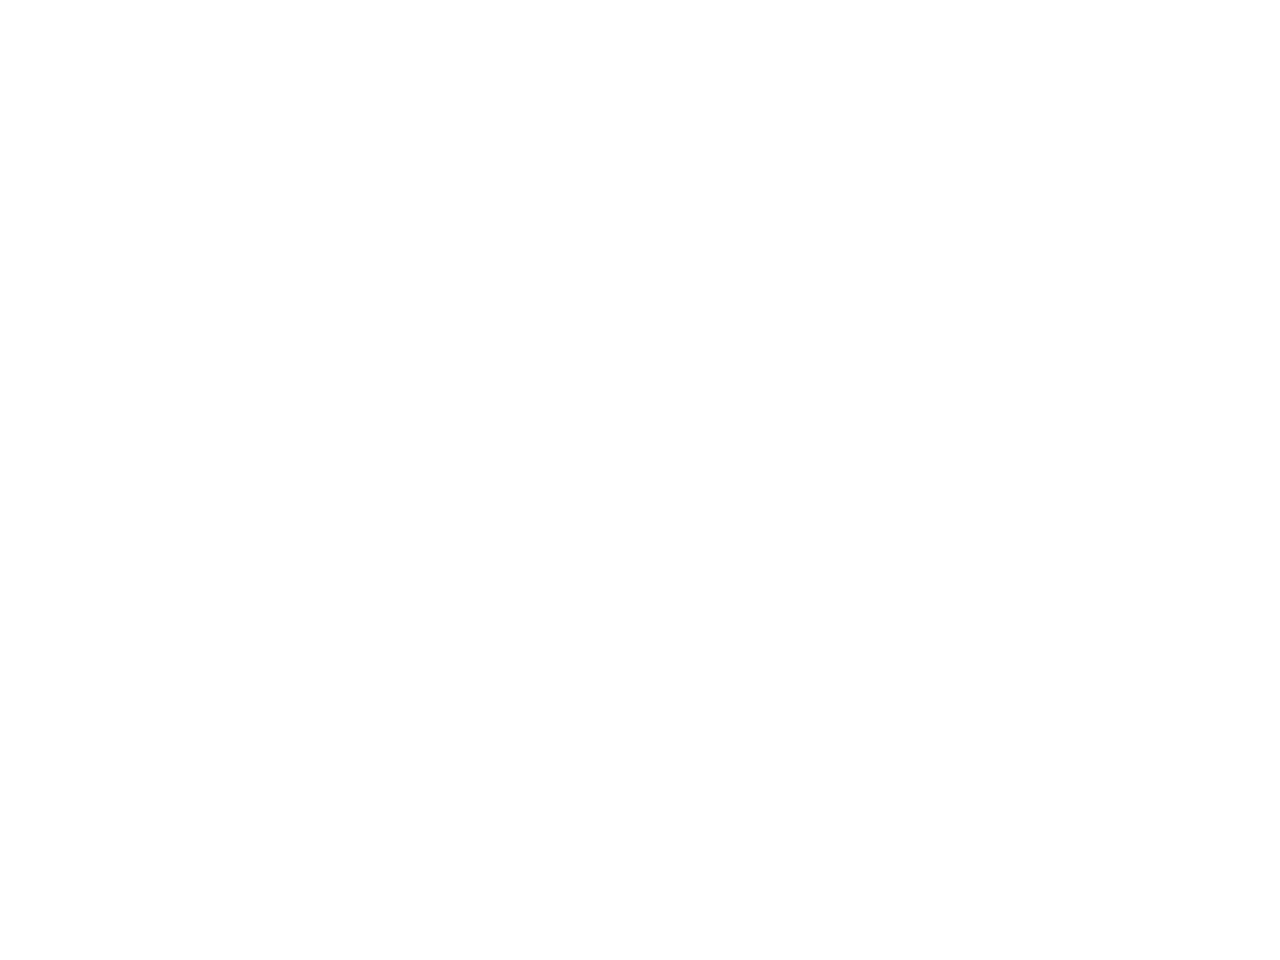

<IPython.core.display.Javascript object>


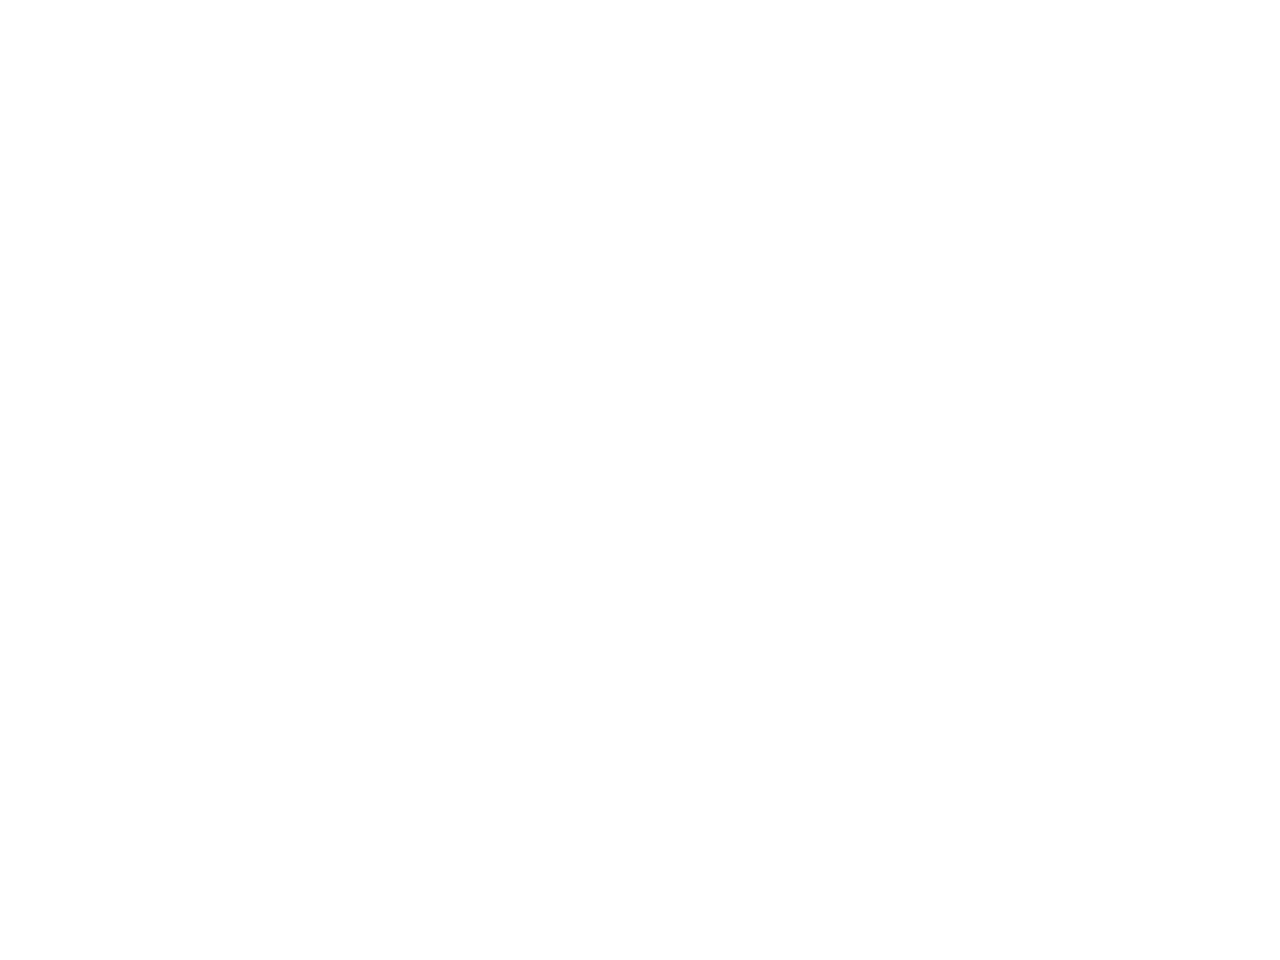

<IPython.core.display.Javascript object>


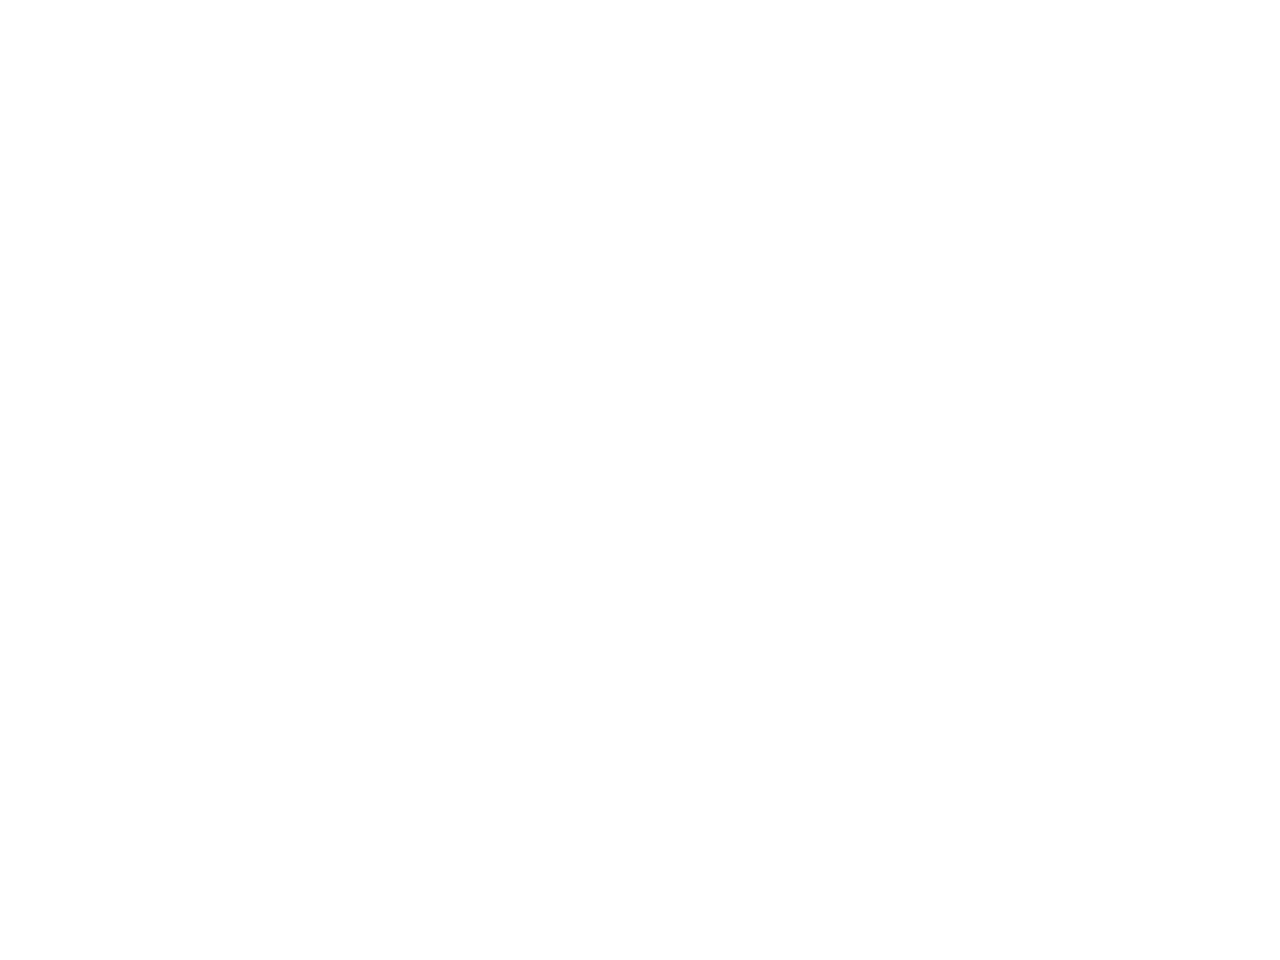

<IPython.core.display.Javascript object>


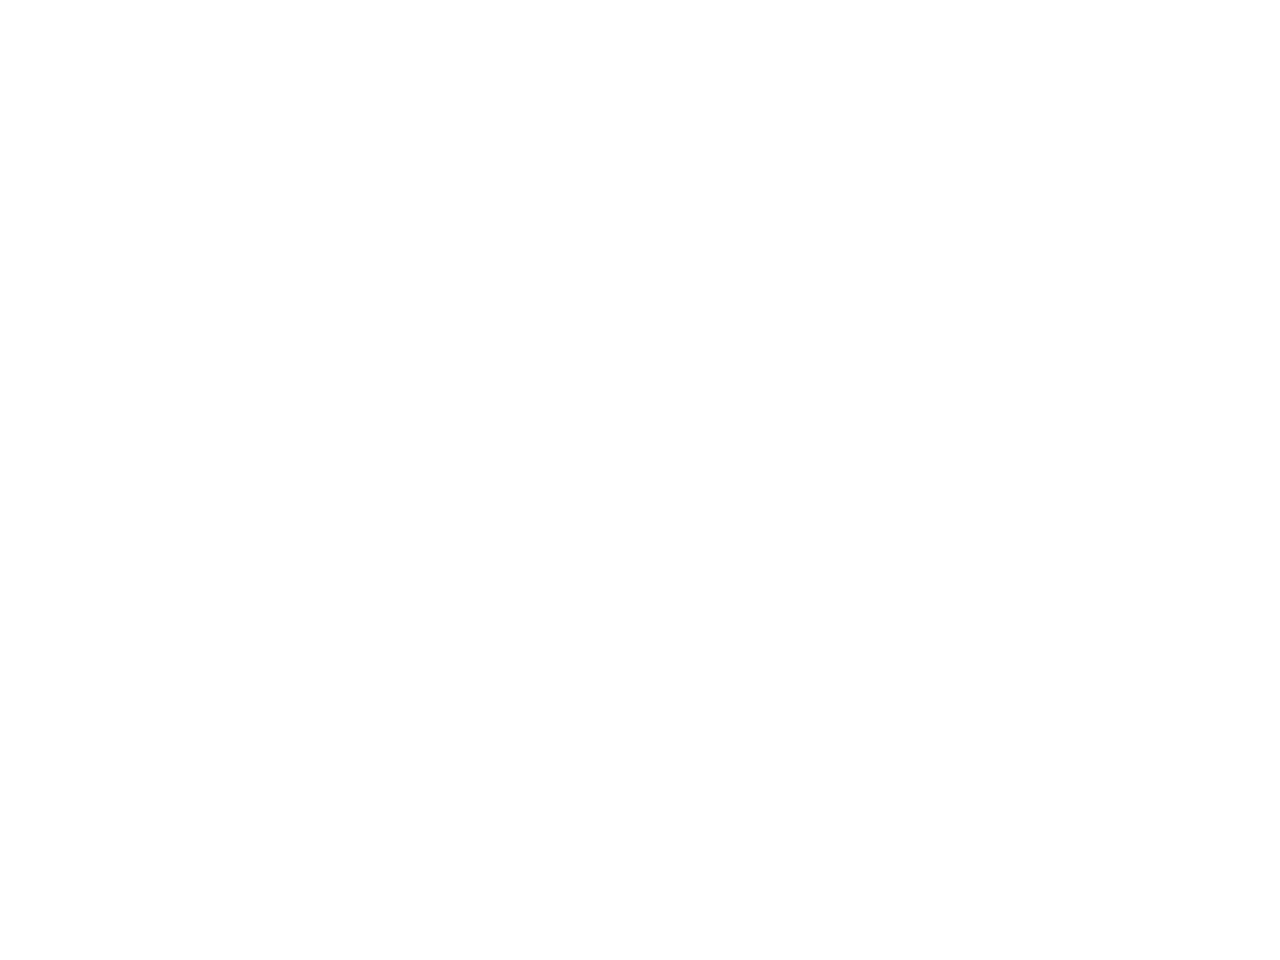

<IPython.core.display.Javascript object>


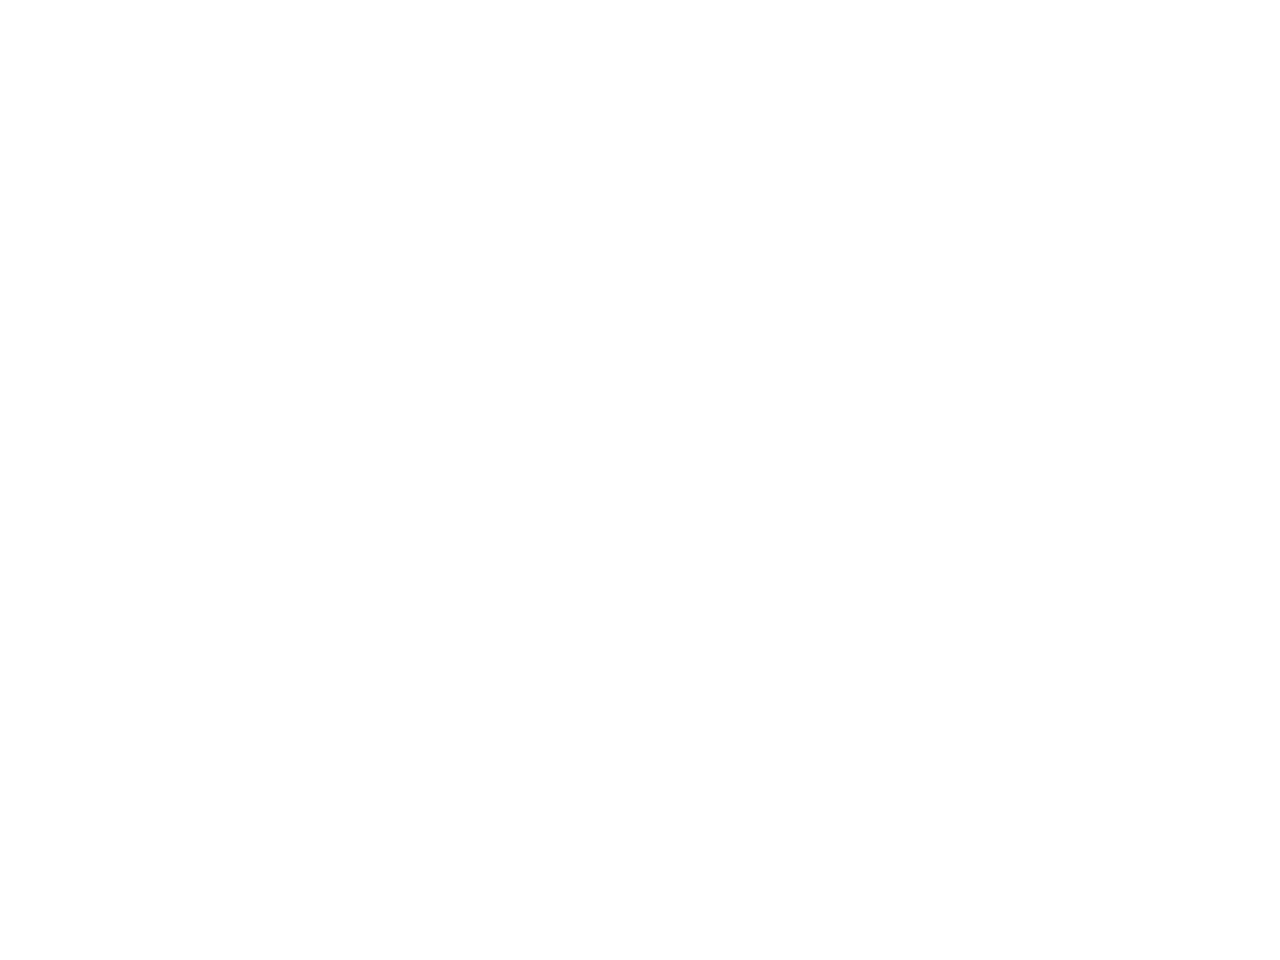

<IPython.core.display.Javascript object>


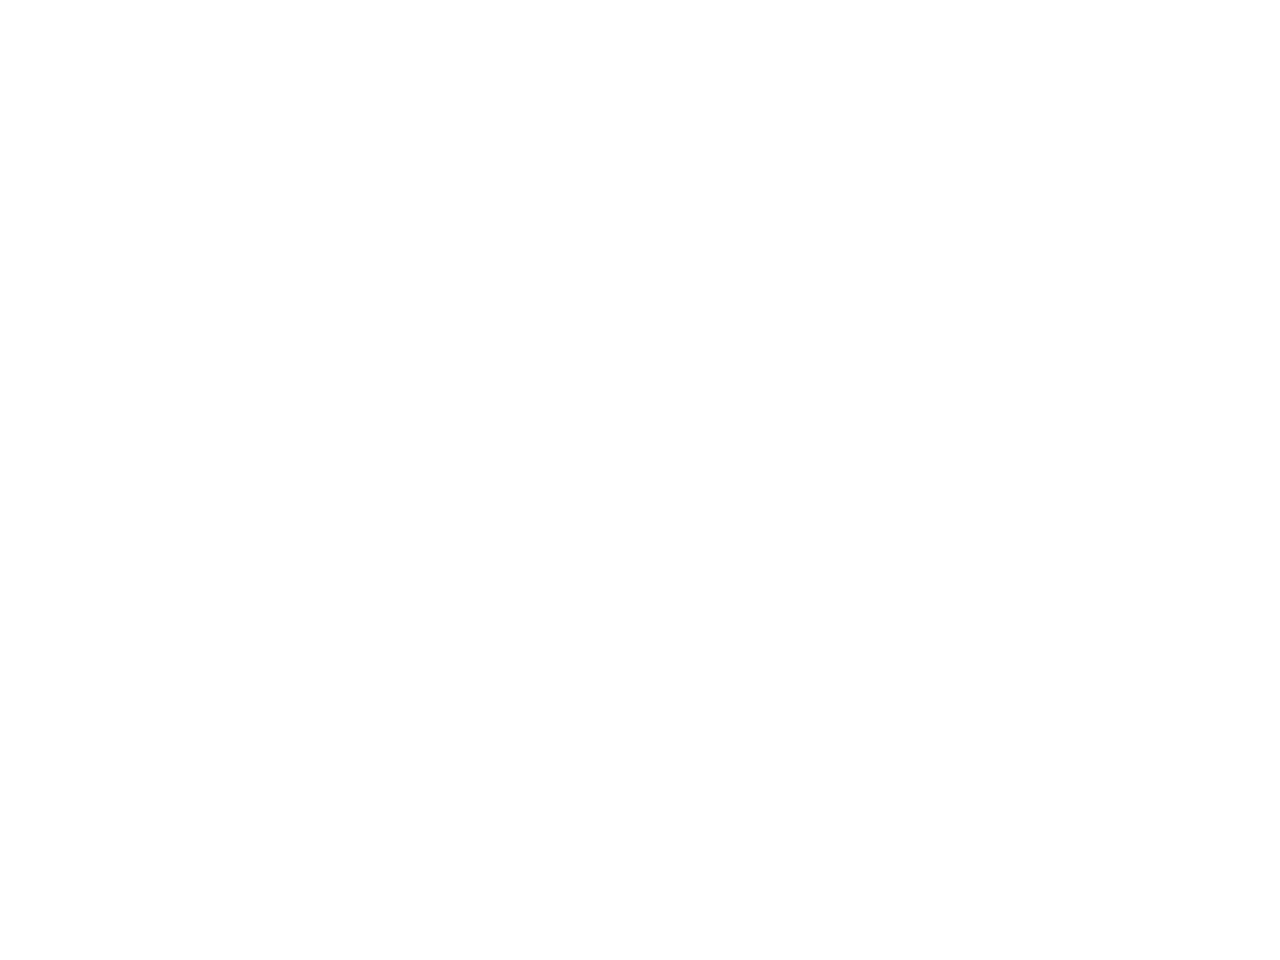

<IPython.core.display.Javascript object>


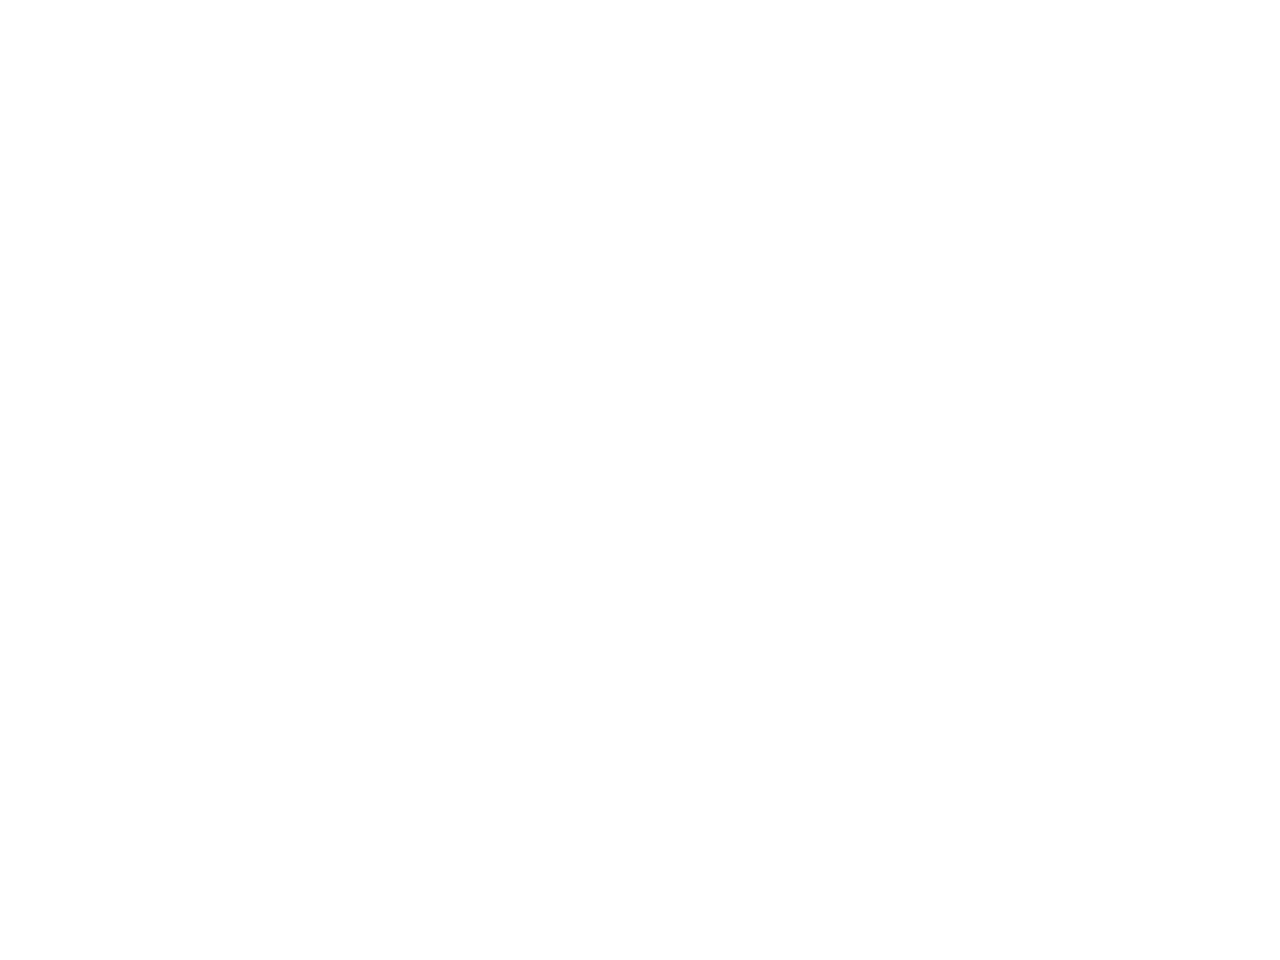

<IPython.core.display.Javascript object>


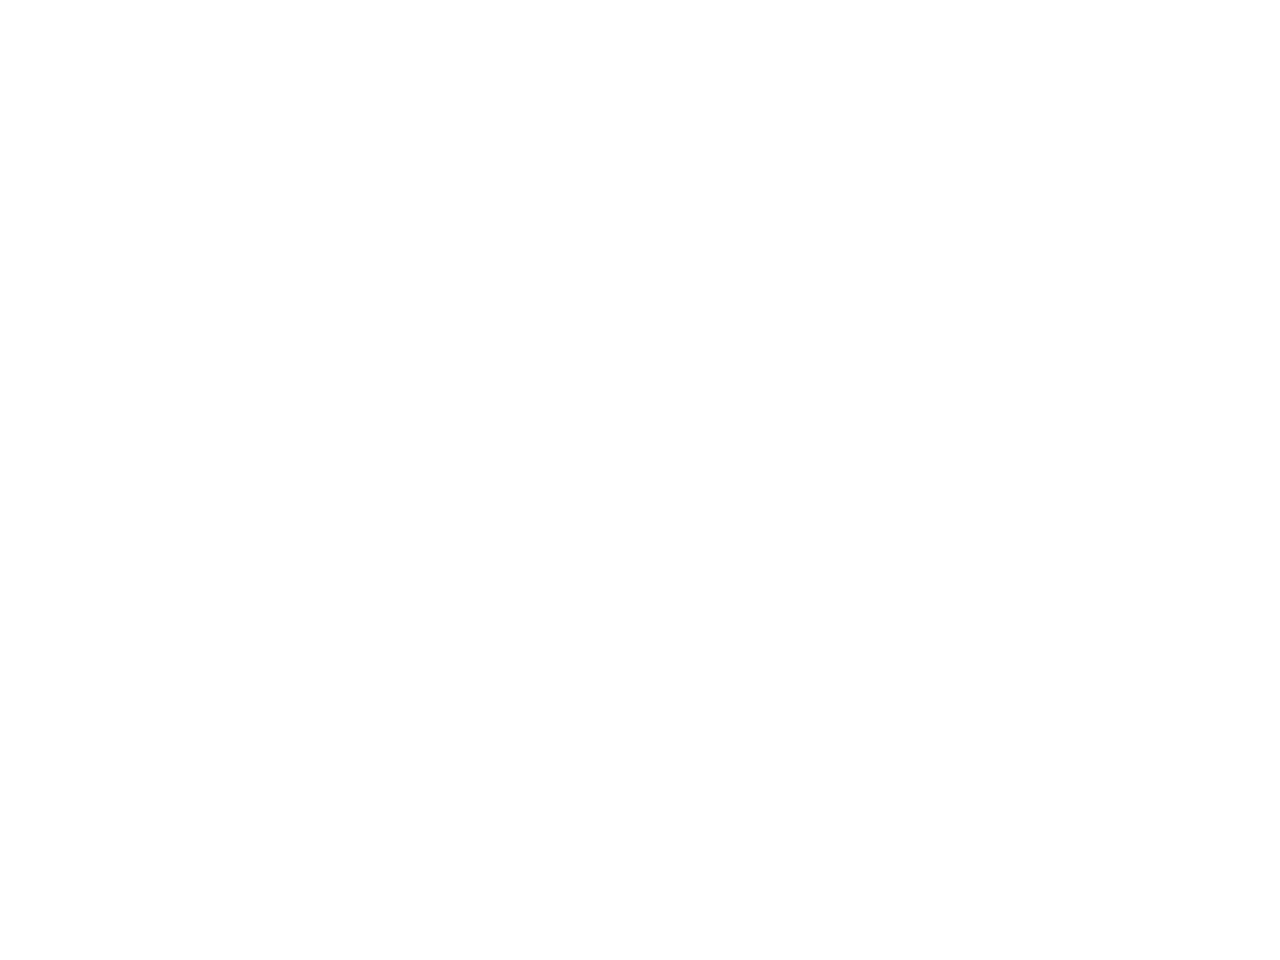

<IPython.core.display.Javascript object>


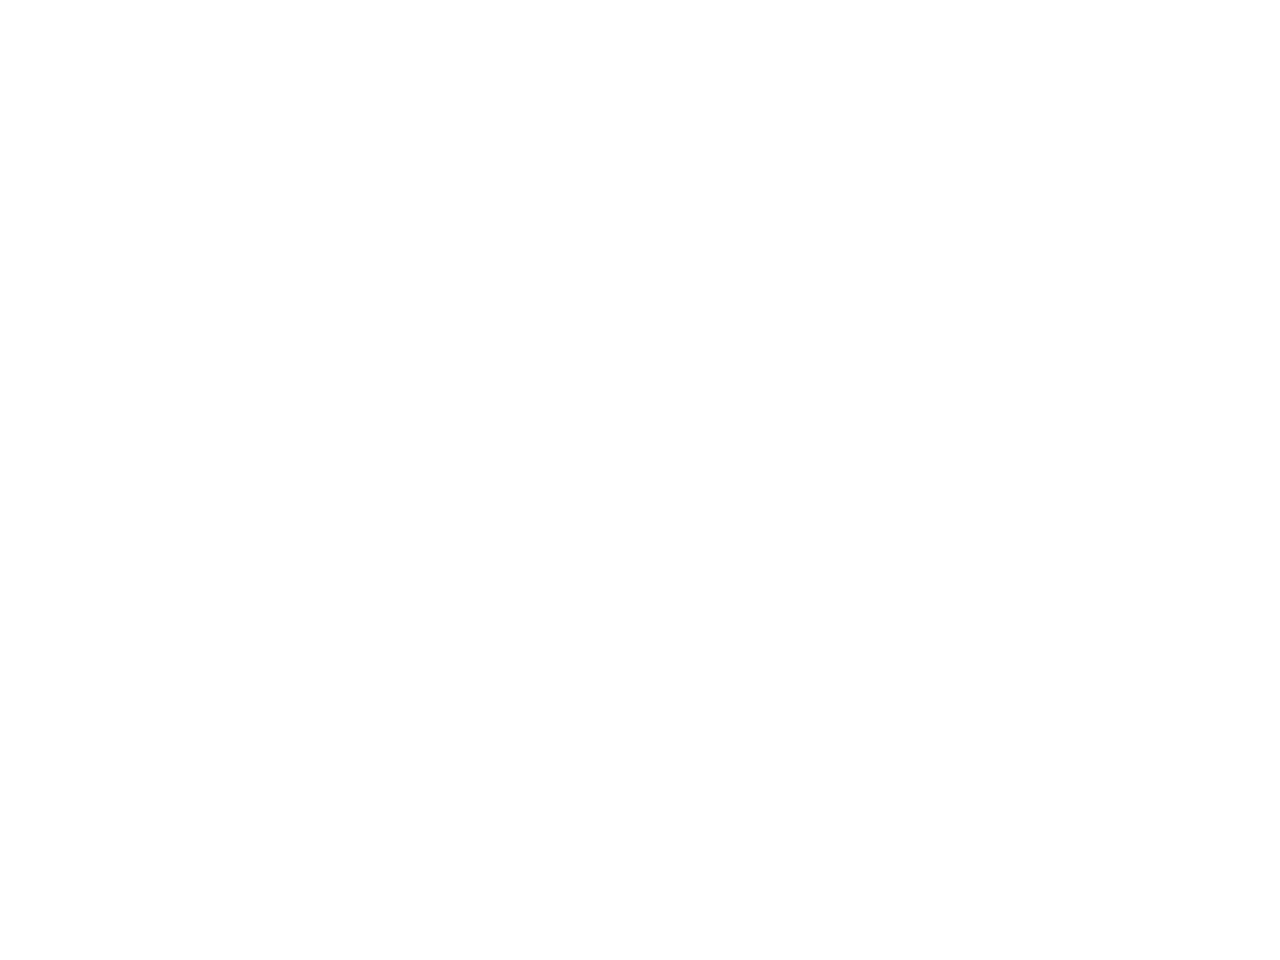

<IPython.core.display.Javascript object>


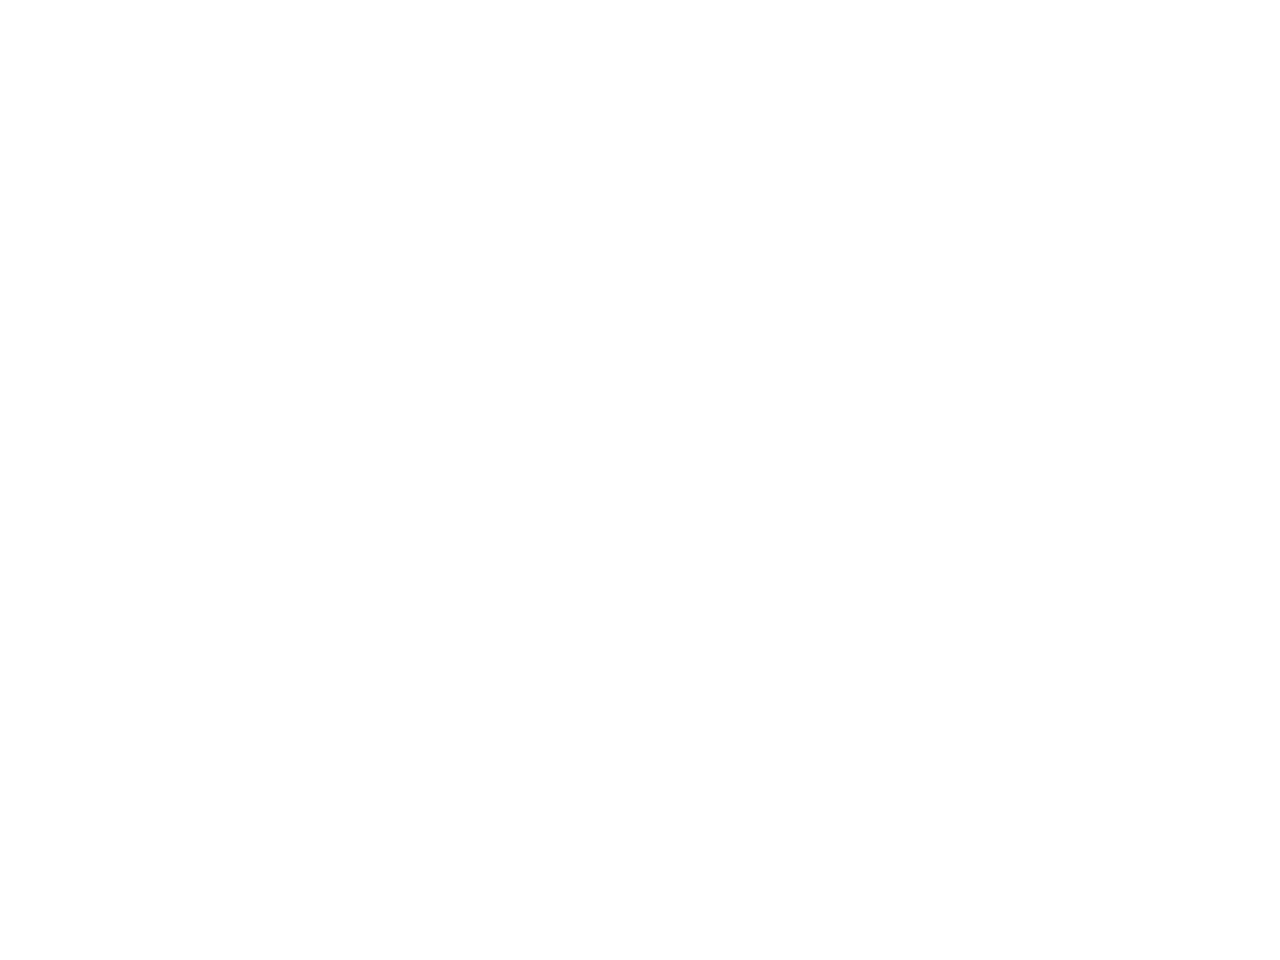

<IPython.core.display.Javascript object>


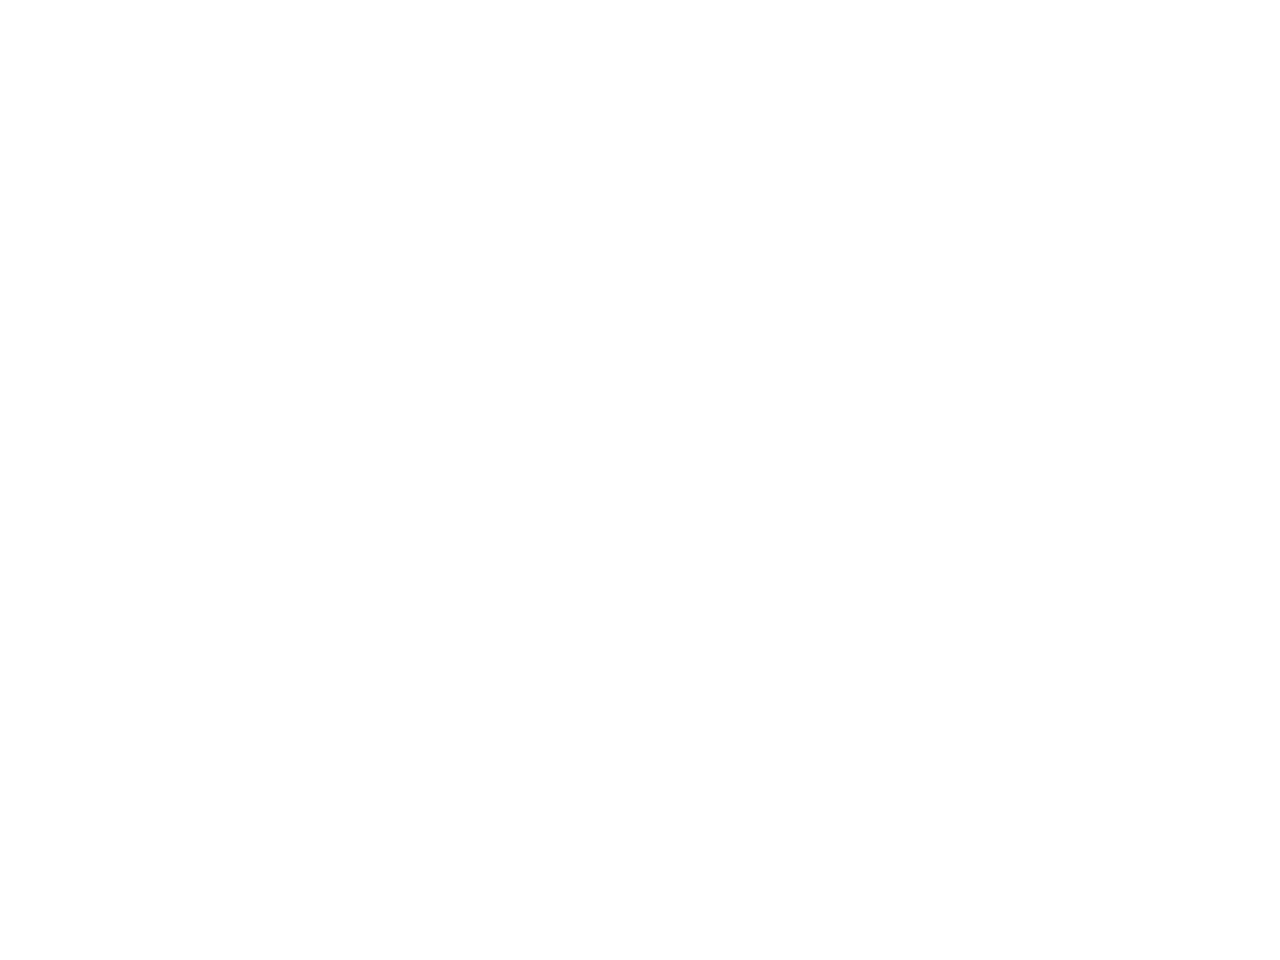

<IPython.core.display.Javascript object>


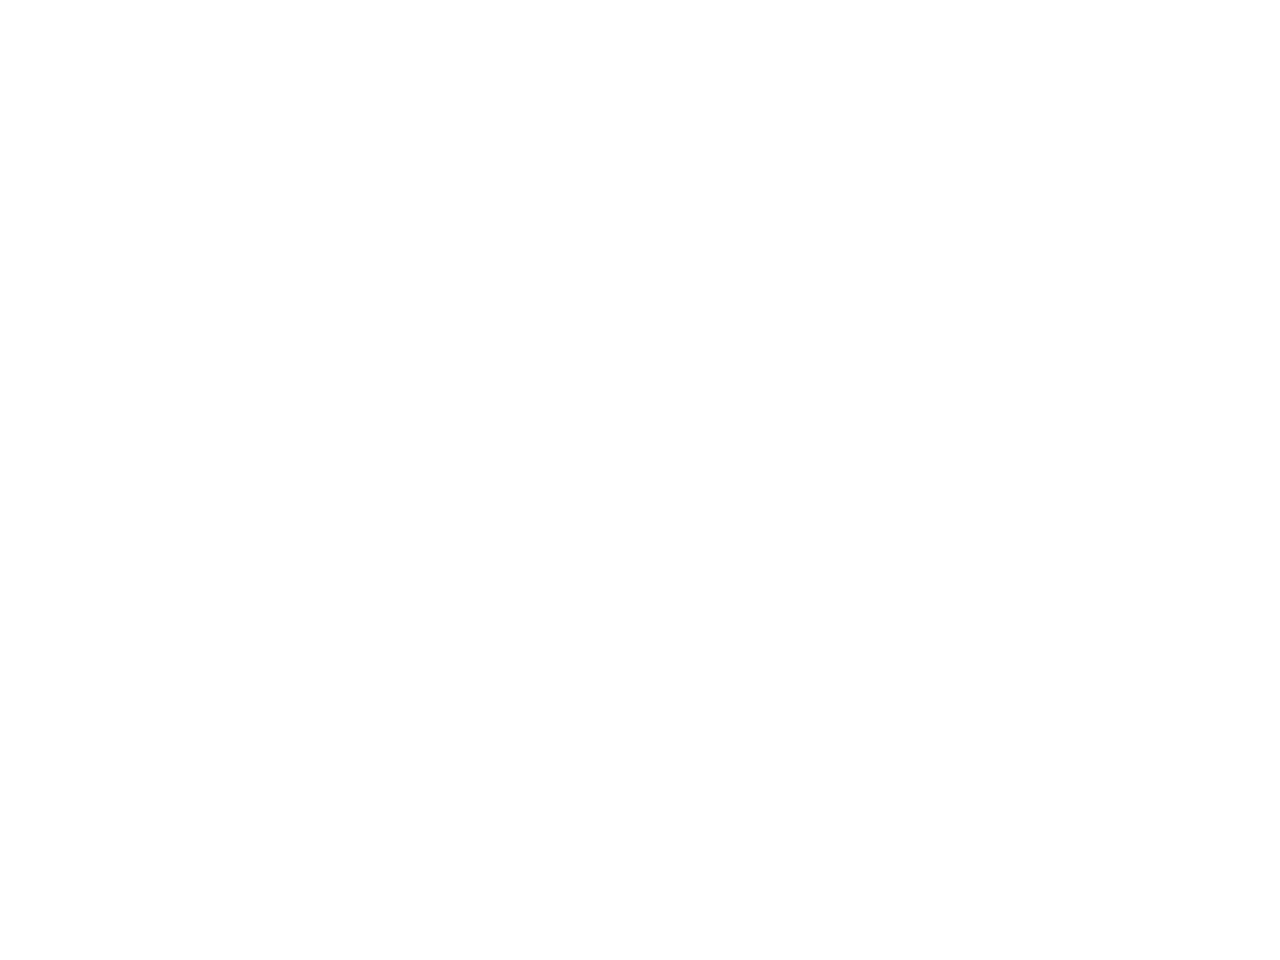

<IPython.core.display.Javascript object>


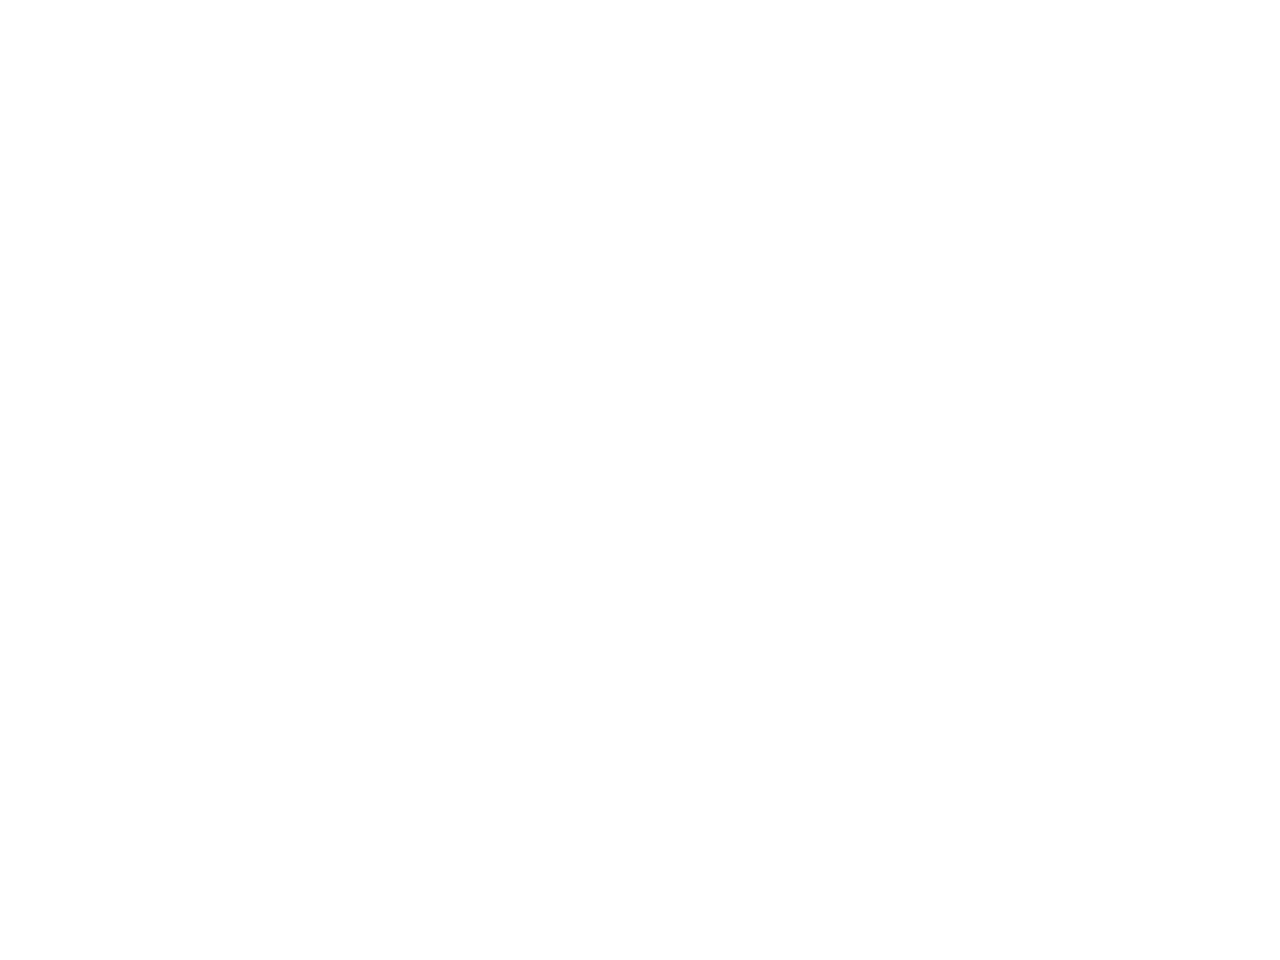

<IPython.core.display.Javascript object>


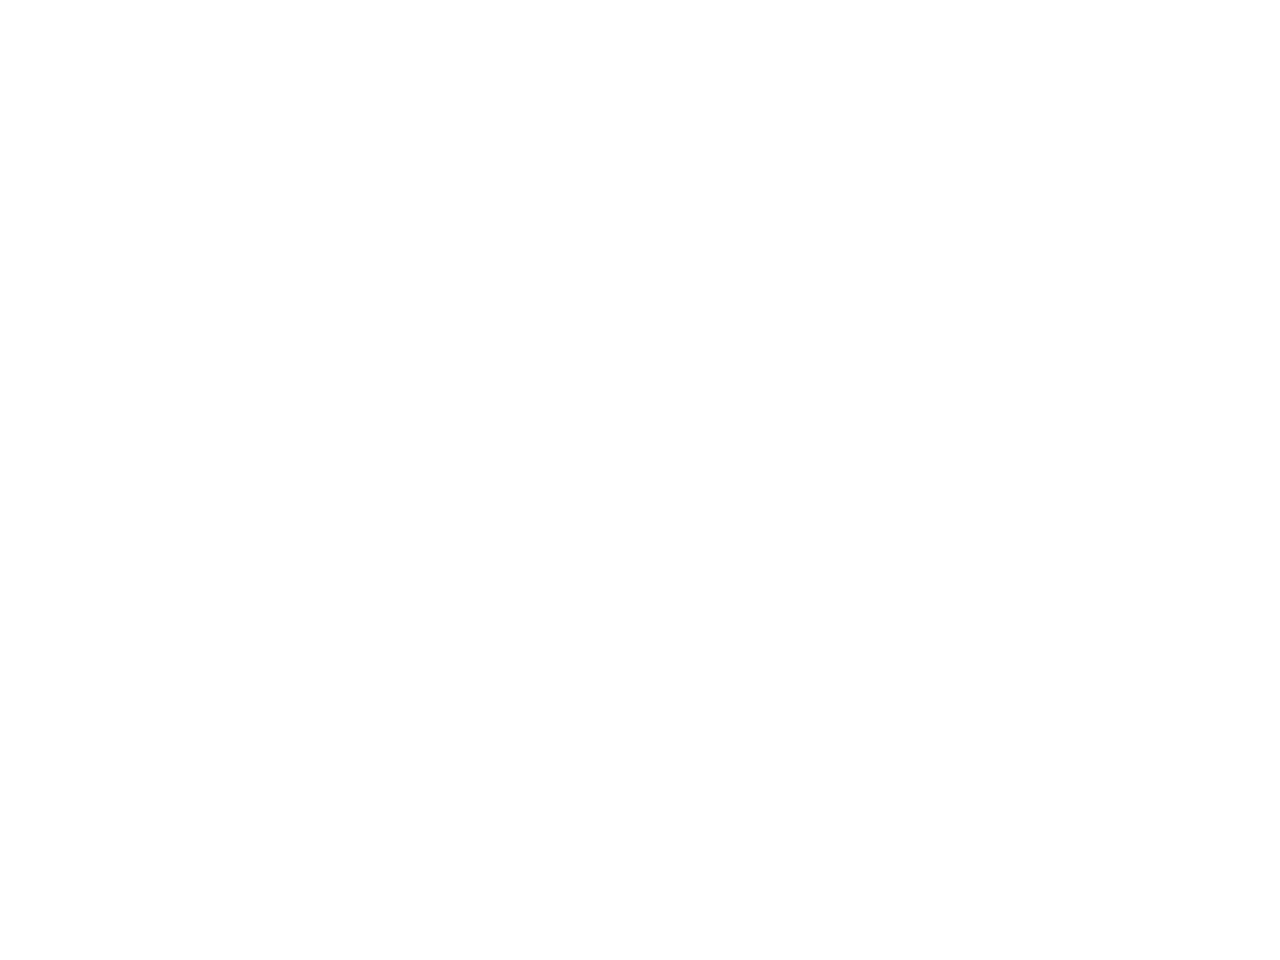

<IPython.core.display.Javascript object>


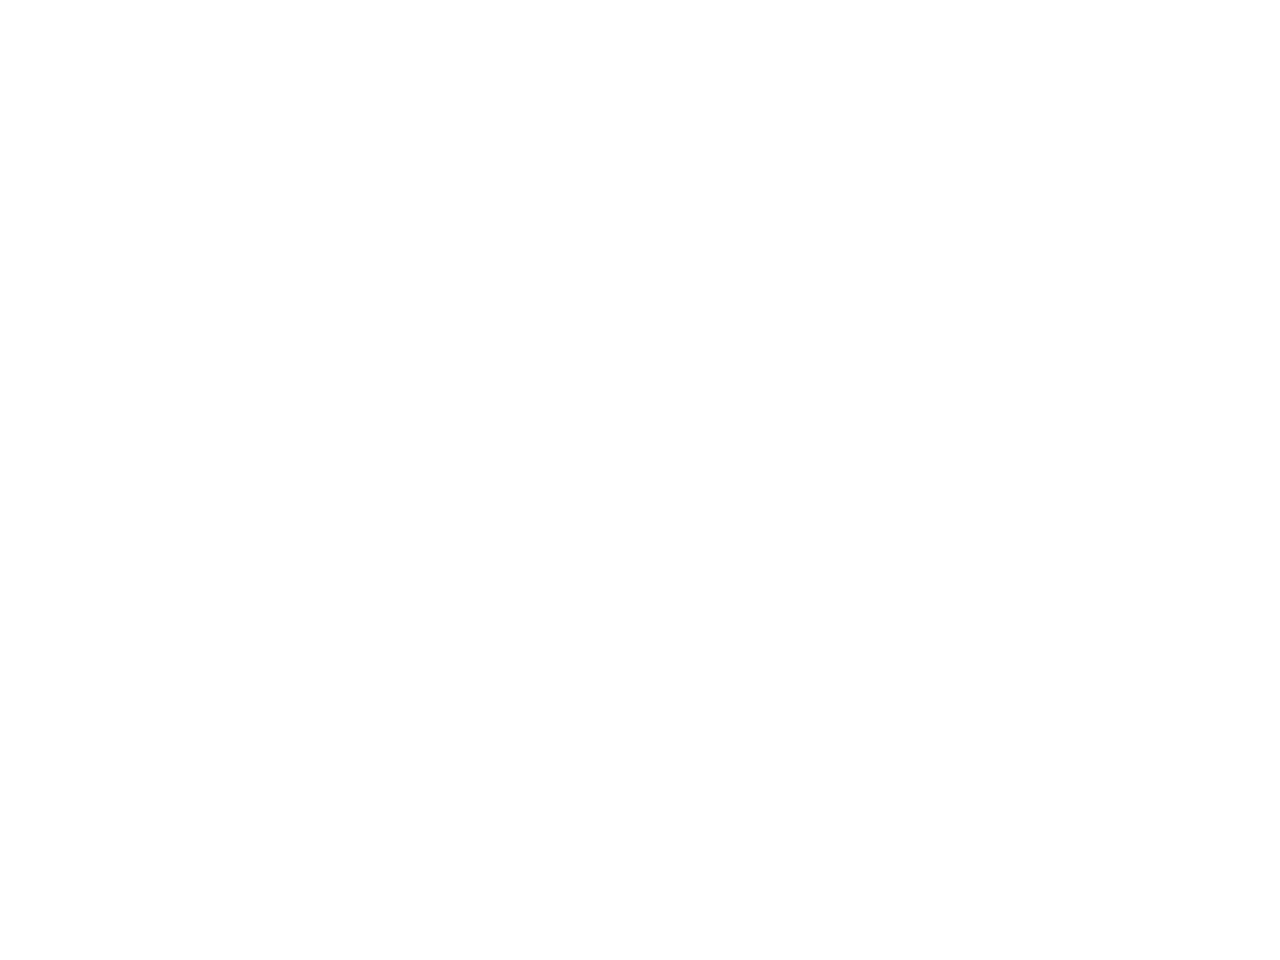

<IPython.core.display.Javascript object>


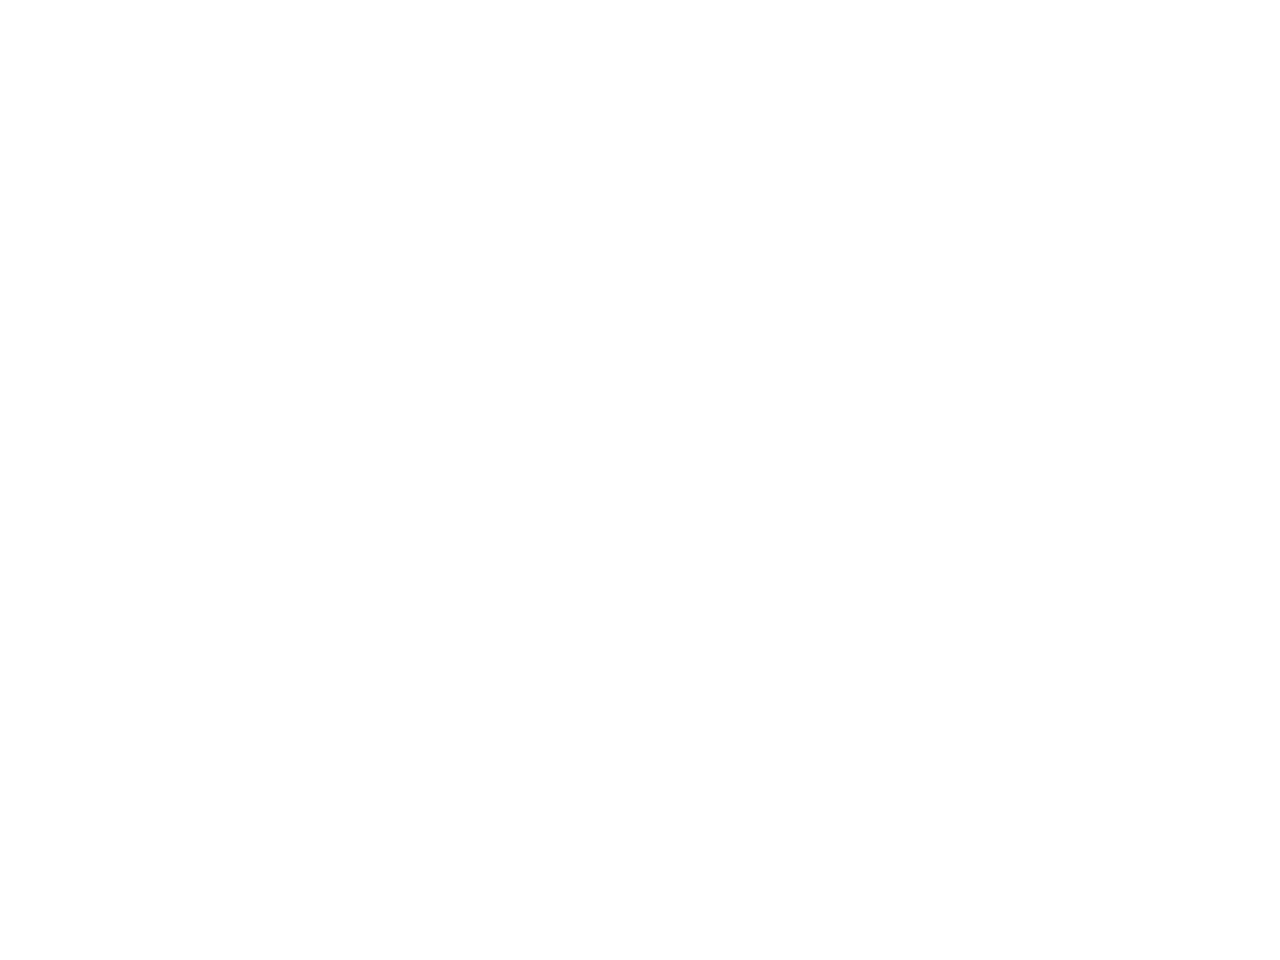

<IPython.core.display.Javascript object>


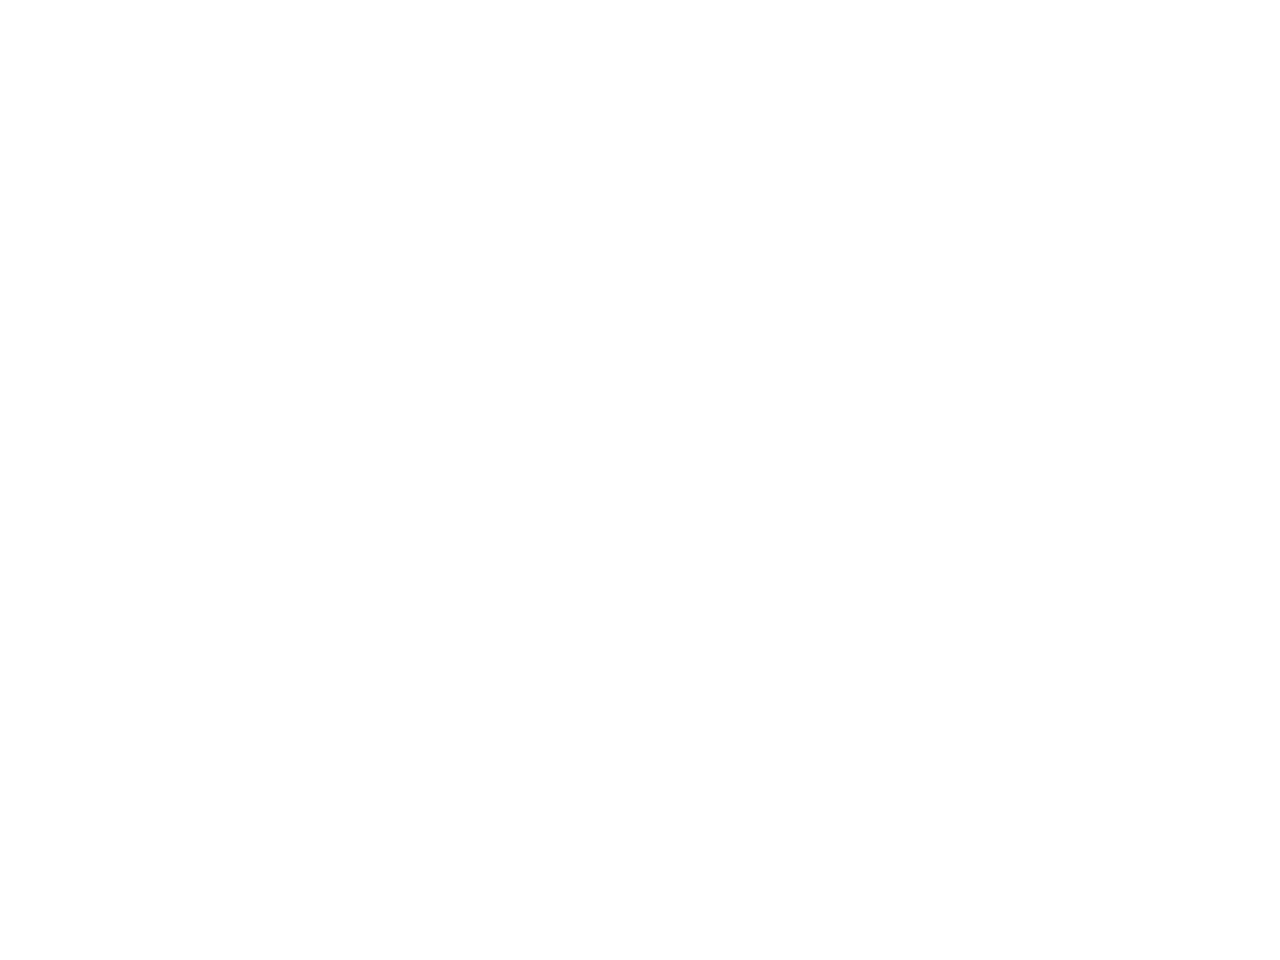

<IPython.core.display.Javascript object>


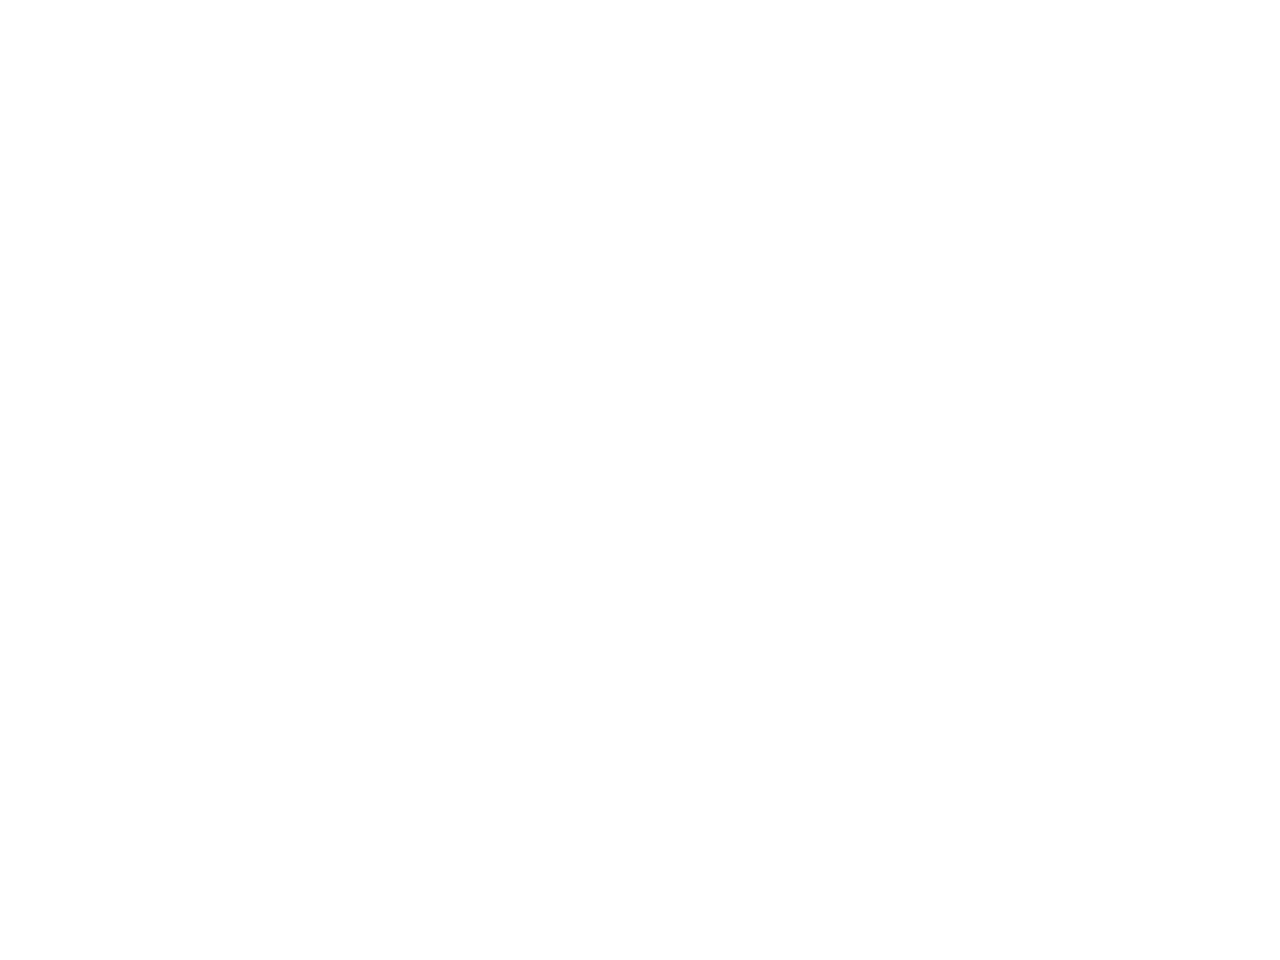

<IPython.core.display.Javascript object>


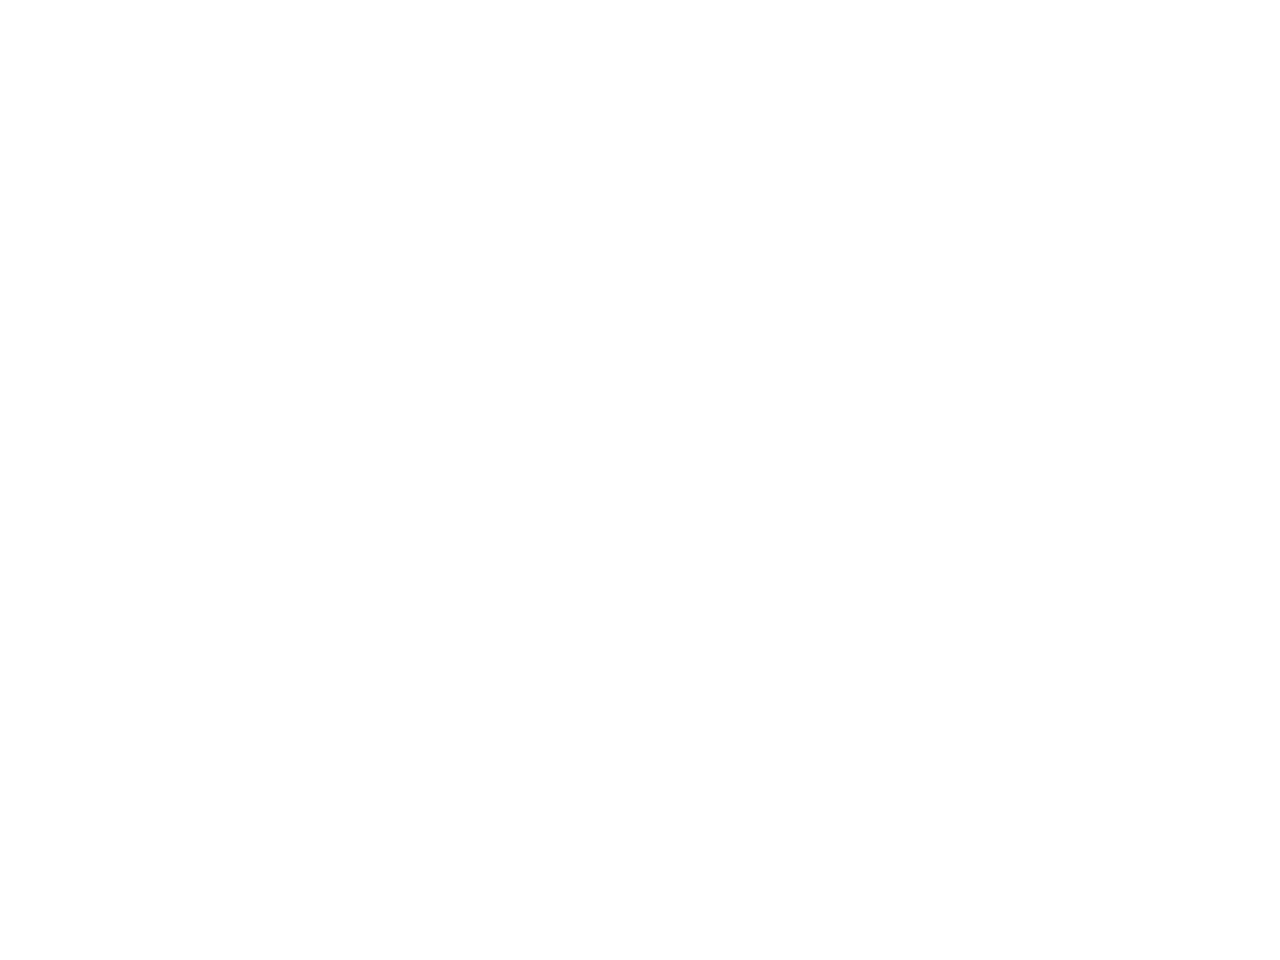

<IPython.core.display.Javascript object>


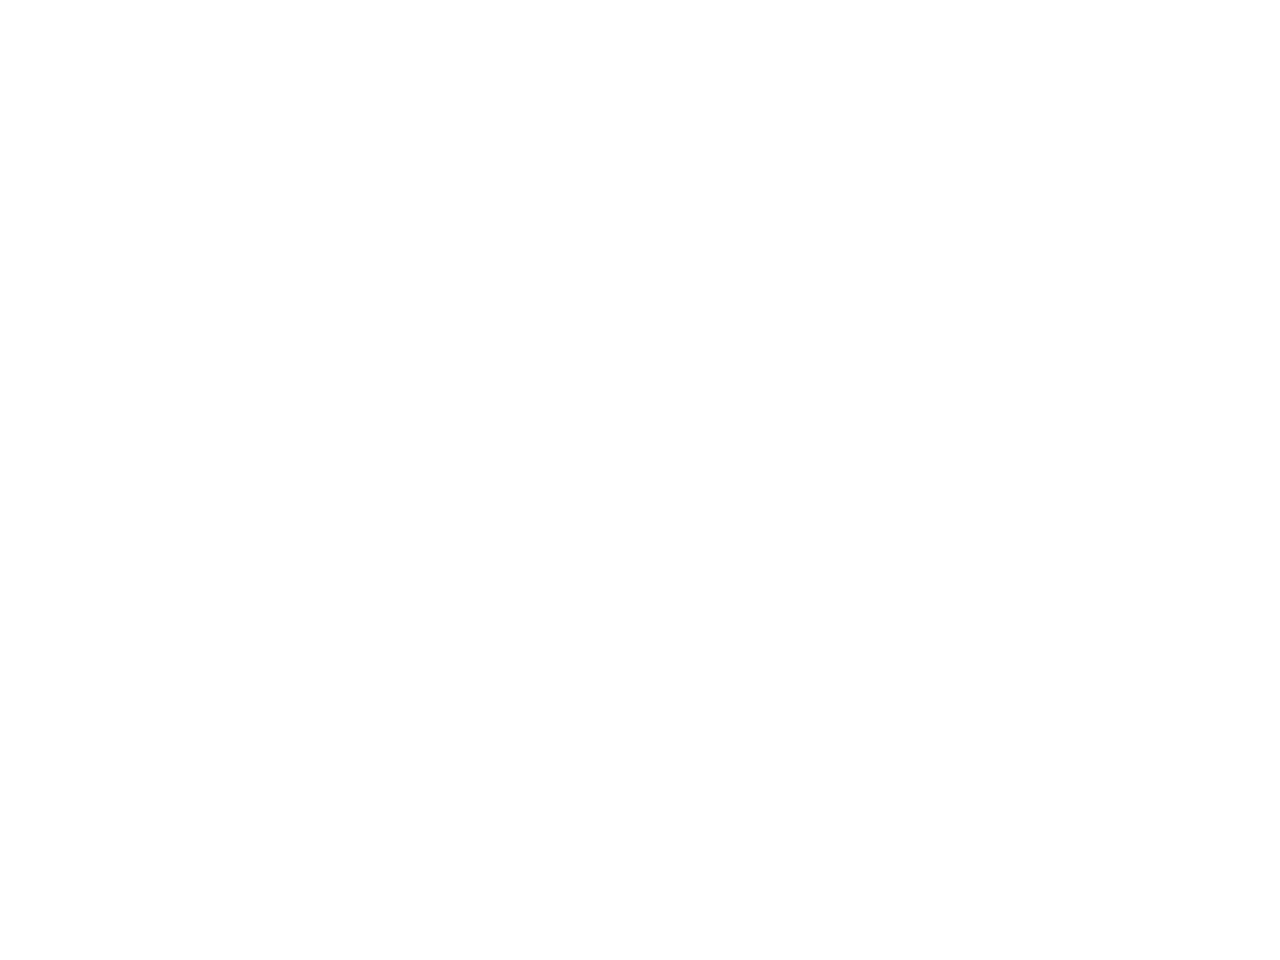

<IPython.core.display.Javascript object>


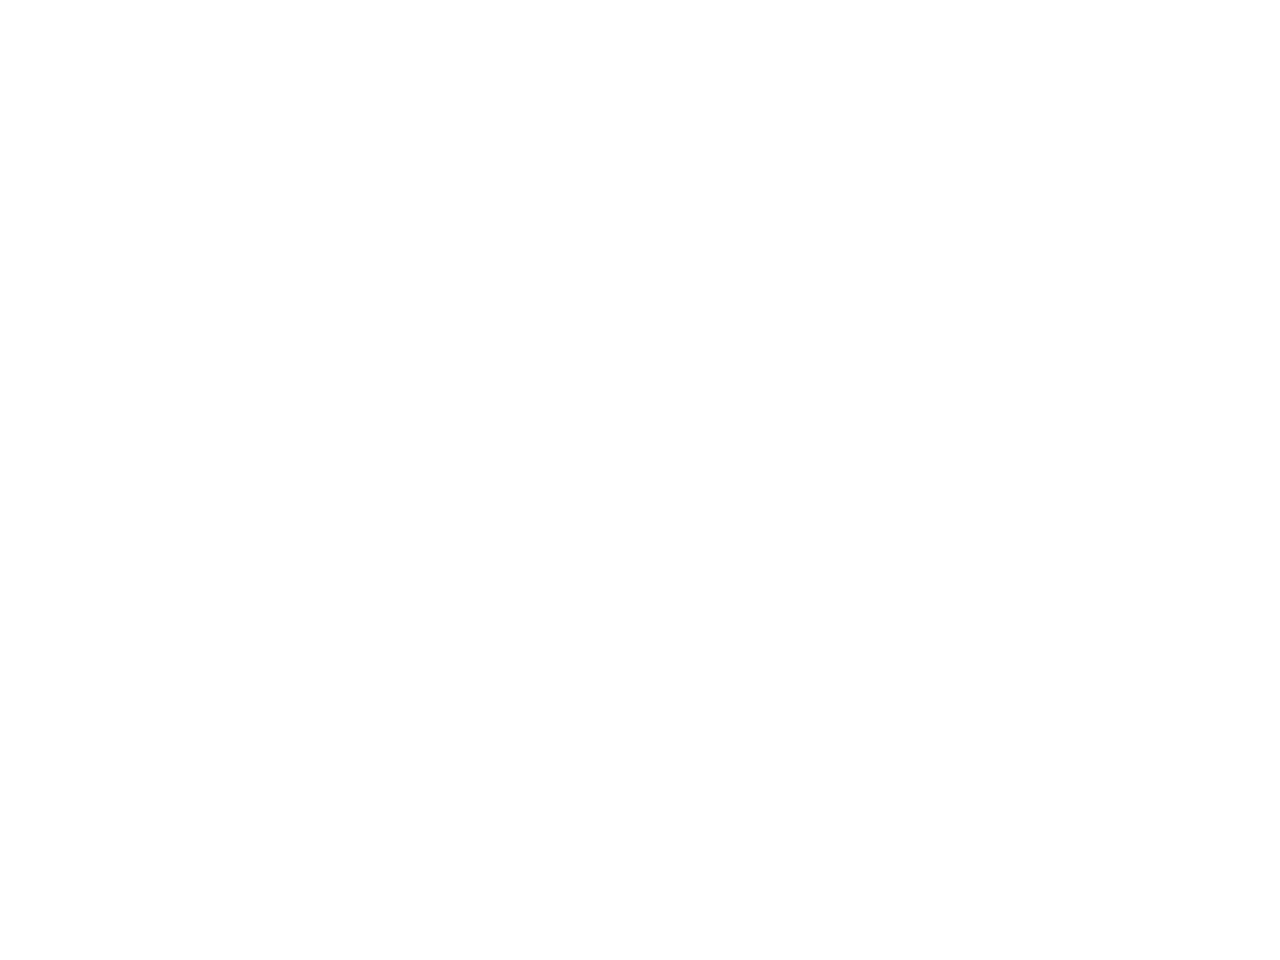

<IPython.core.display.Javascript object>


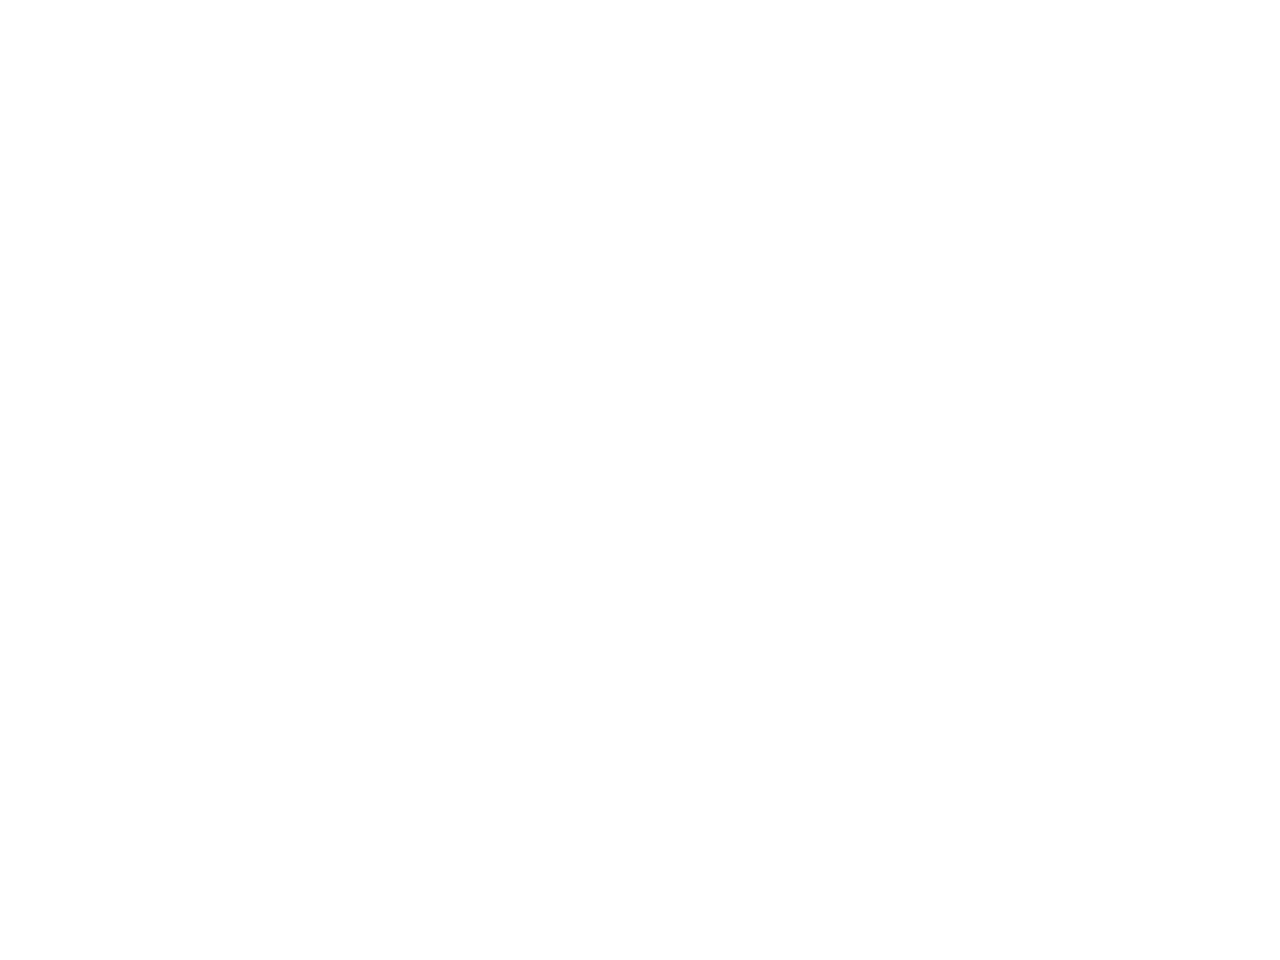

<IPython.core.display.Javascript object>


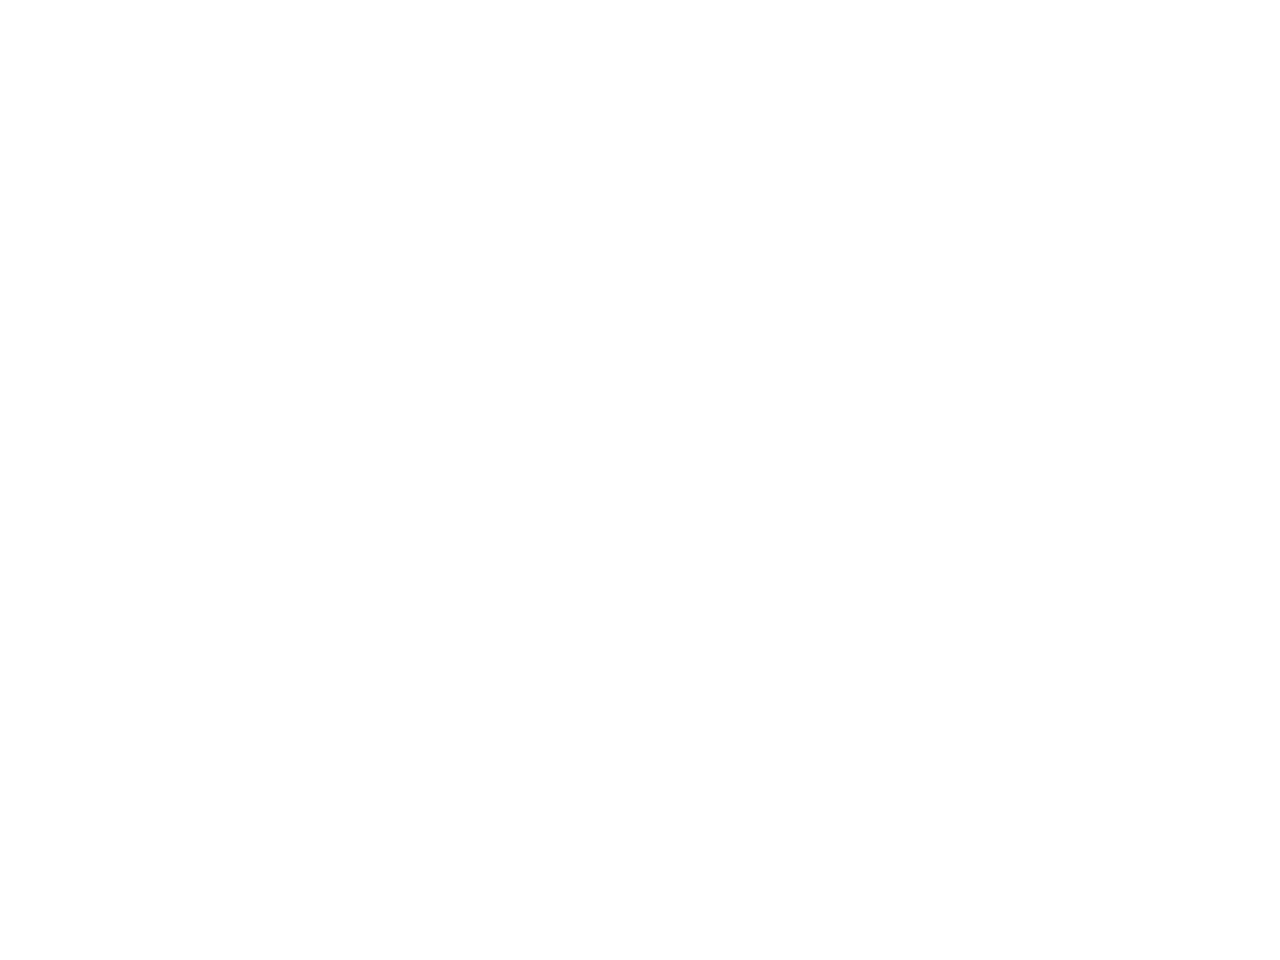

<IPython.core.display.Javascript object>


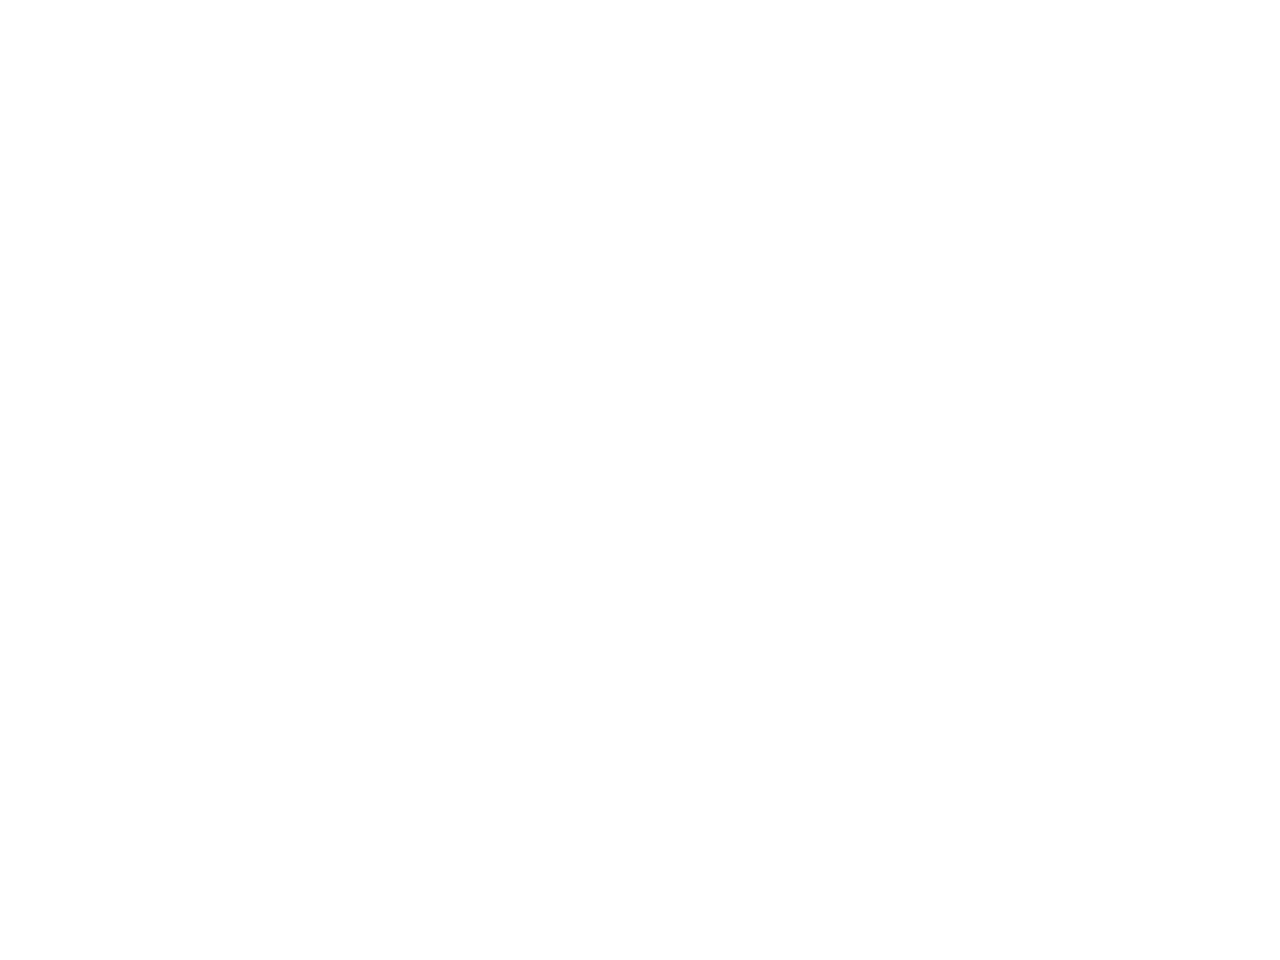

<IPython.core.display.Javascript object>


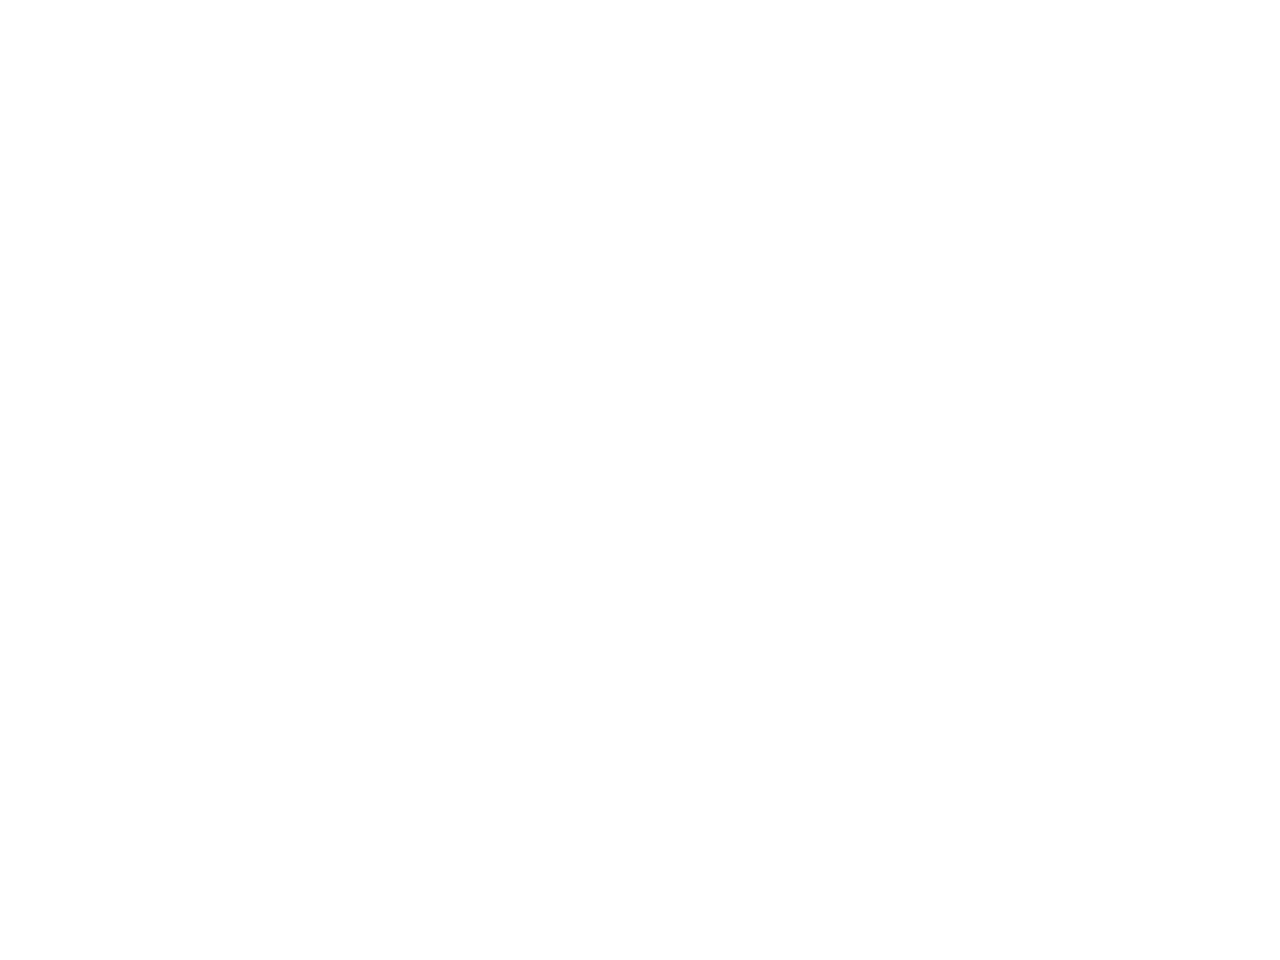

<IPython.core.display.Javascript object>


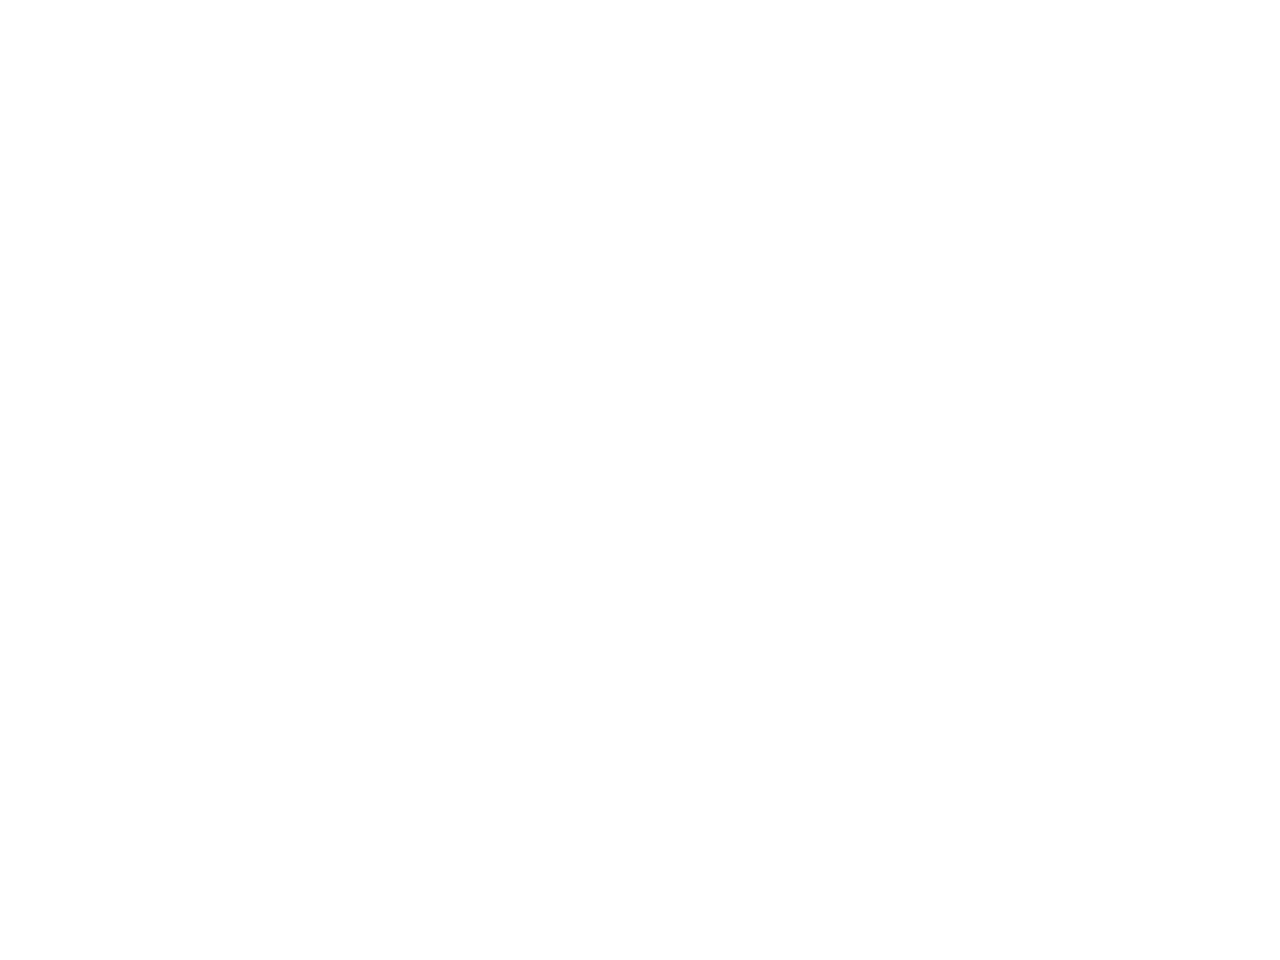

<IPython.core.display.Javascript object>


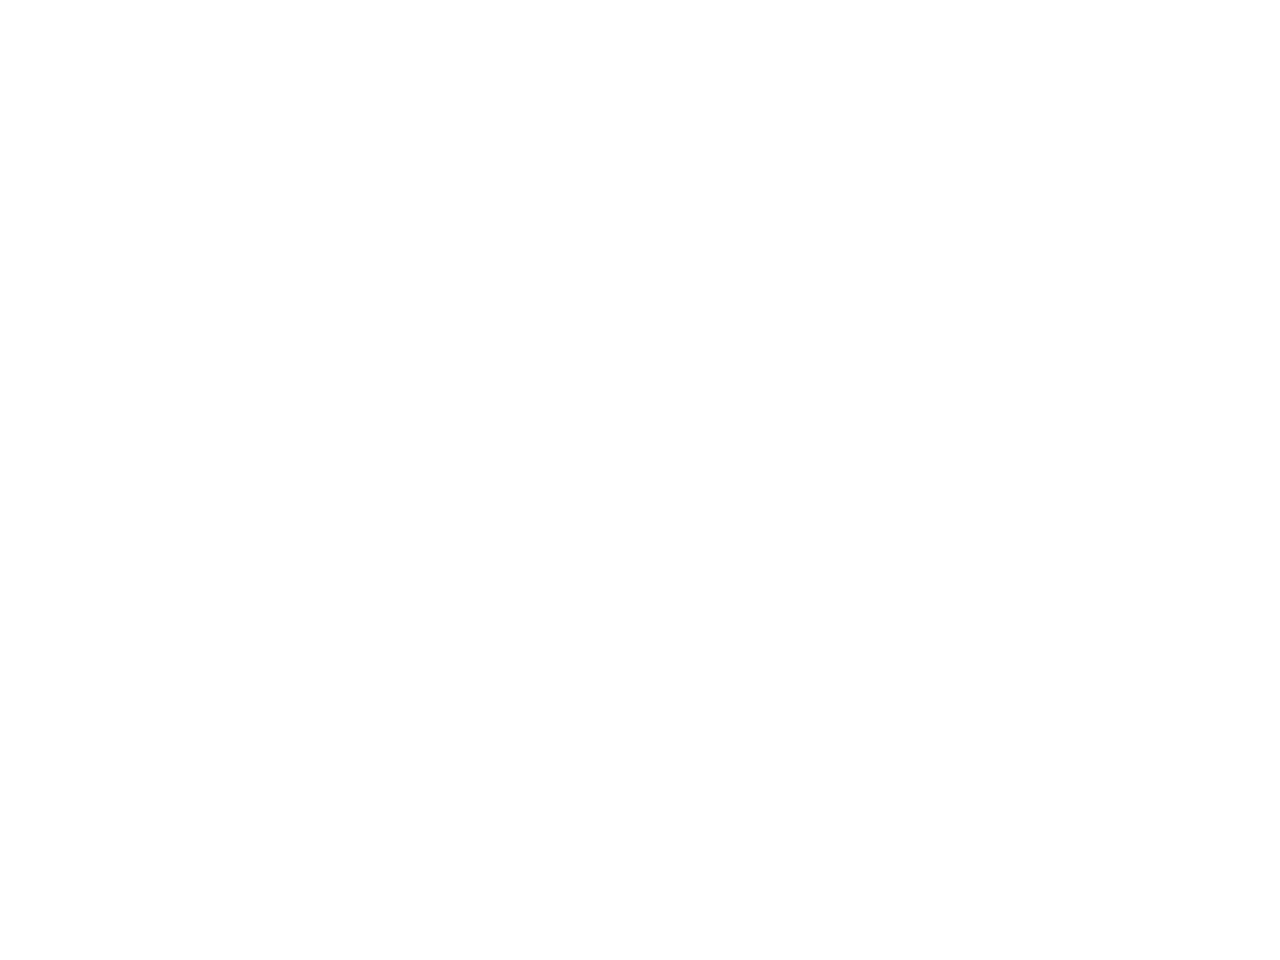

<IPython.core.display.Javascript object>


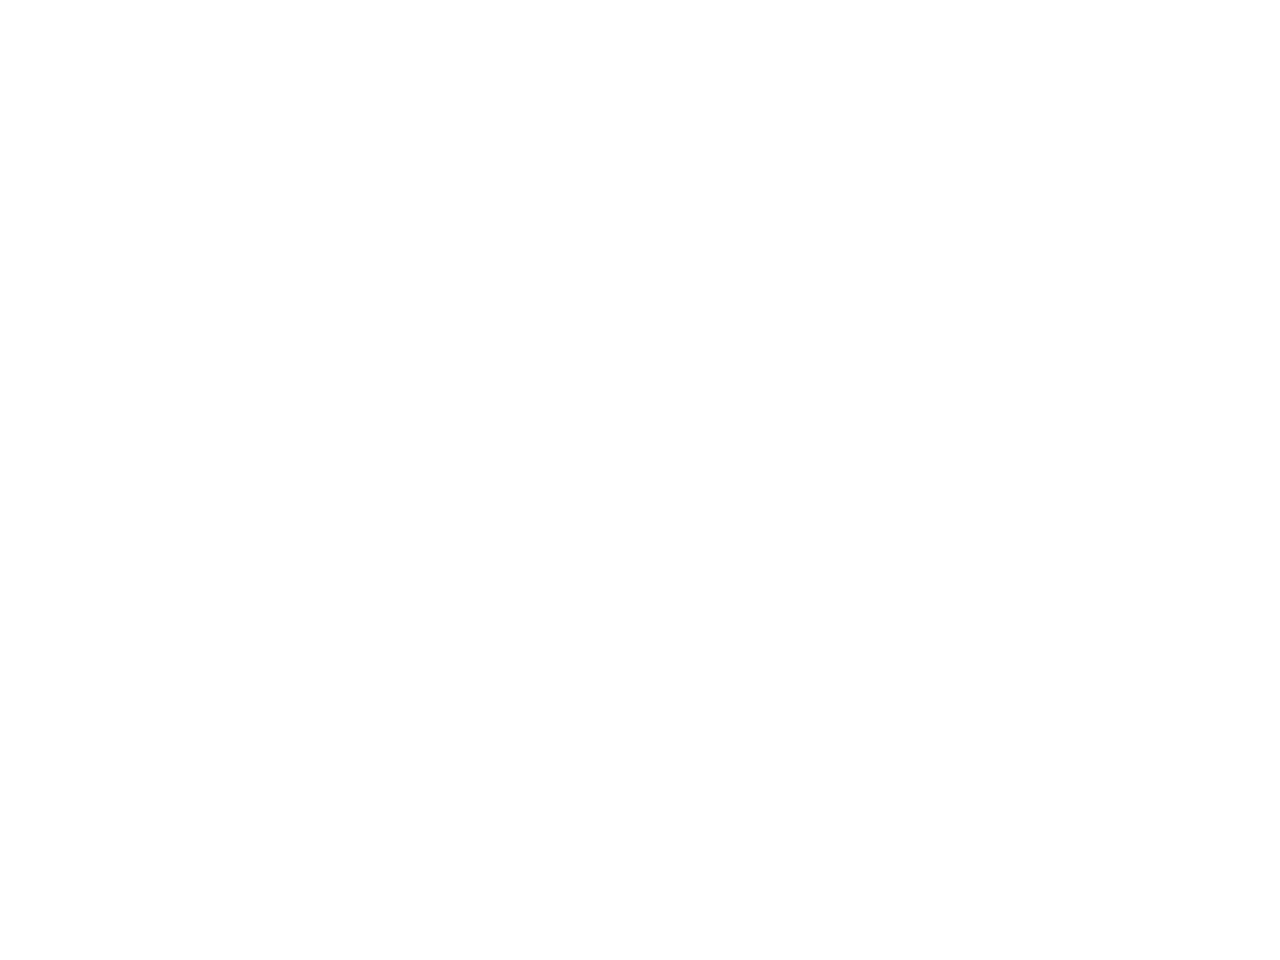

<IPython.core.display.Javascript object>


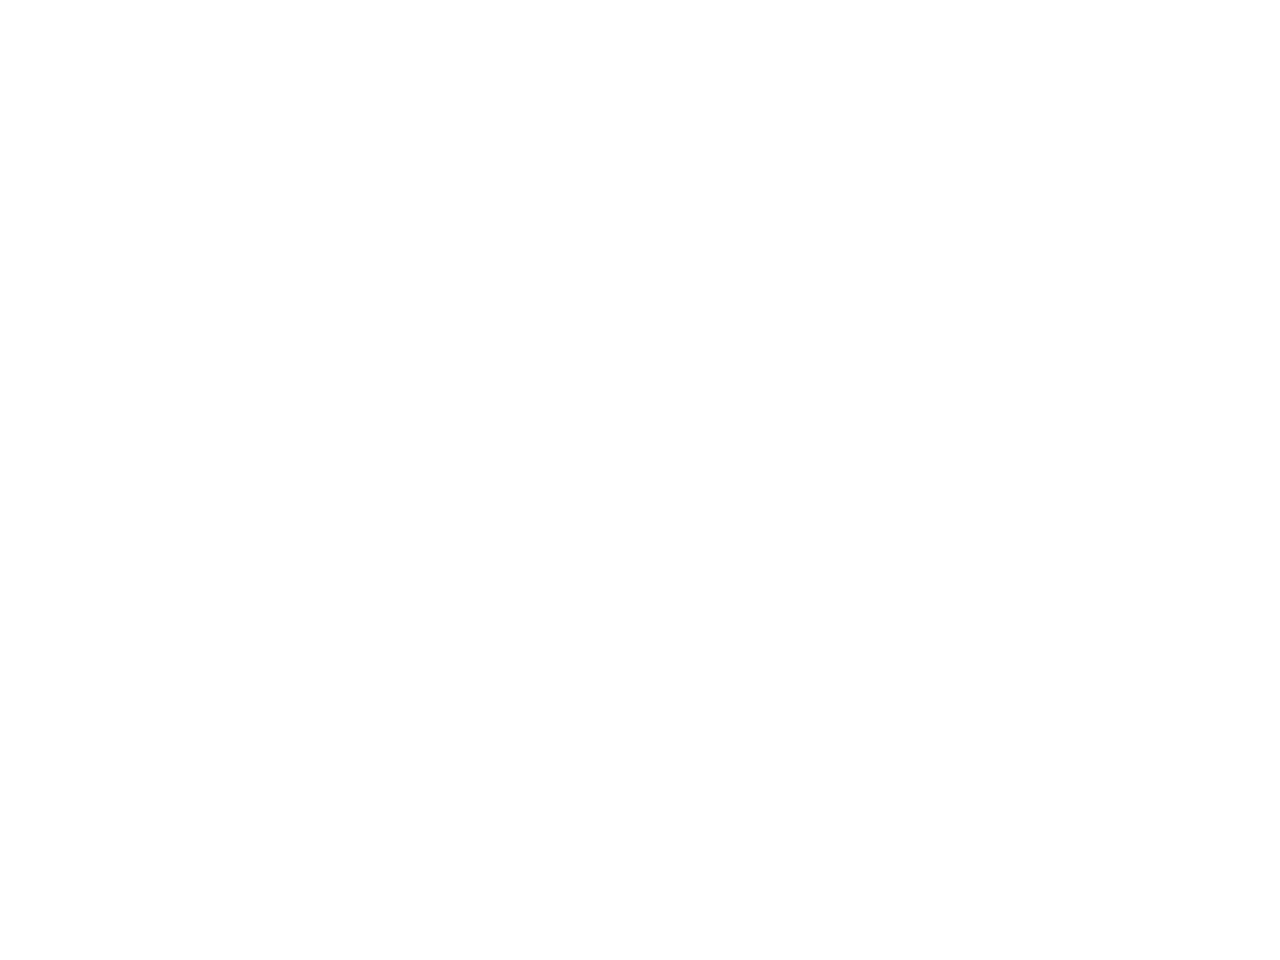

<IPython.core.display.Javascript object>


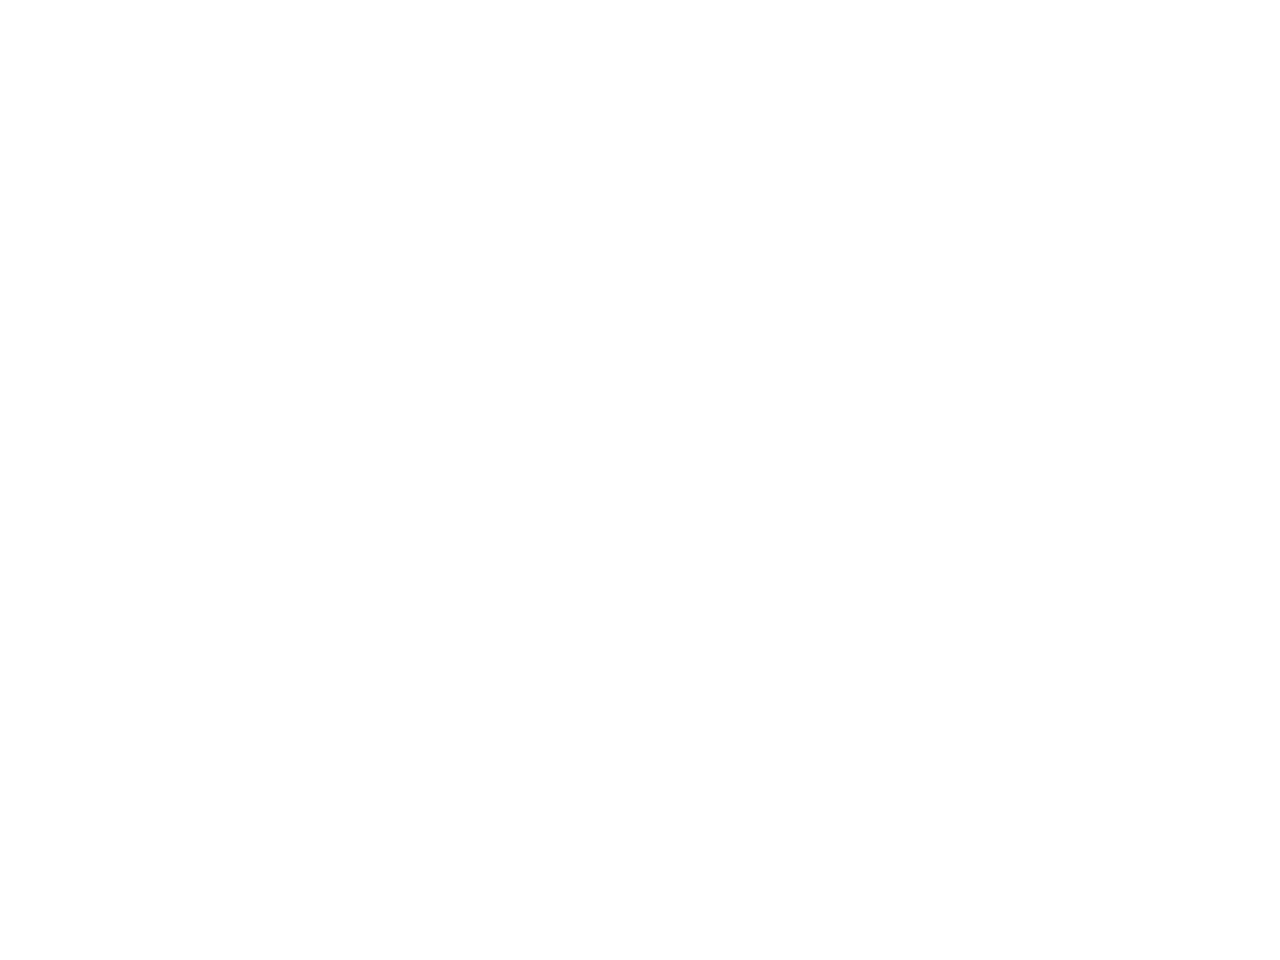

<IPython.core.display.Javascript object>


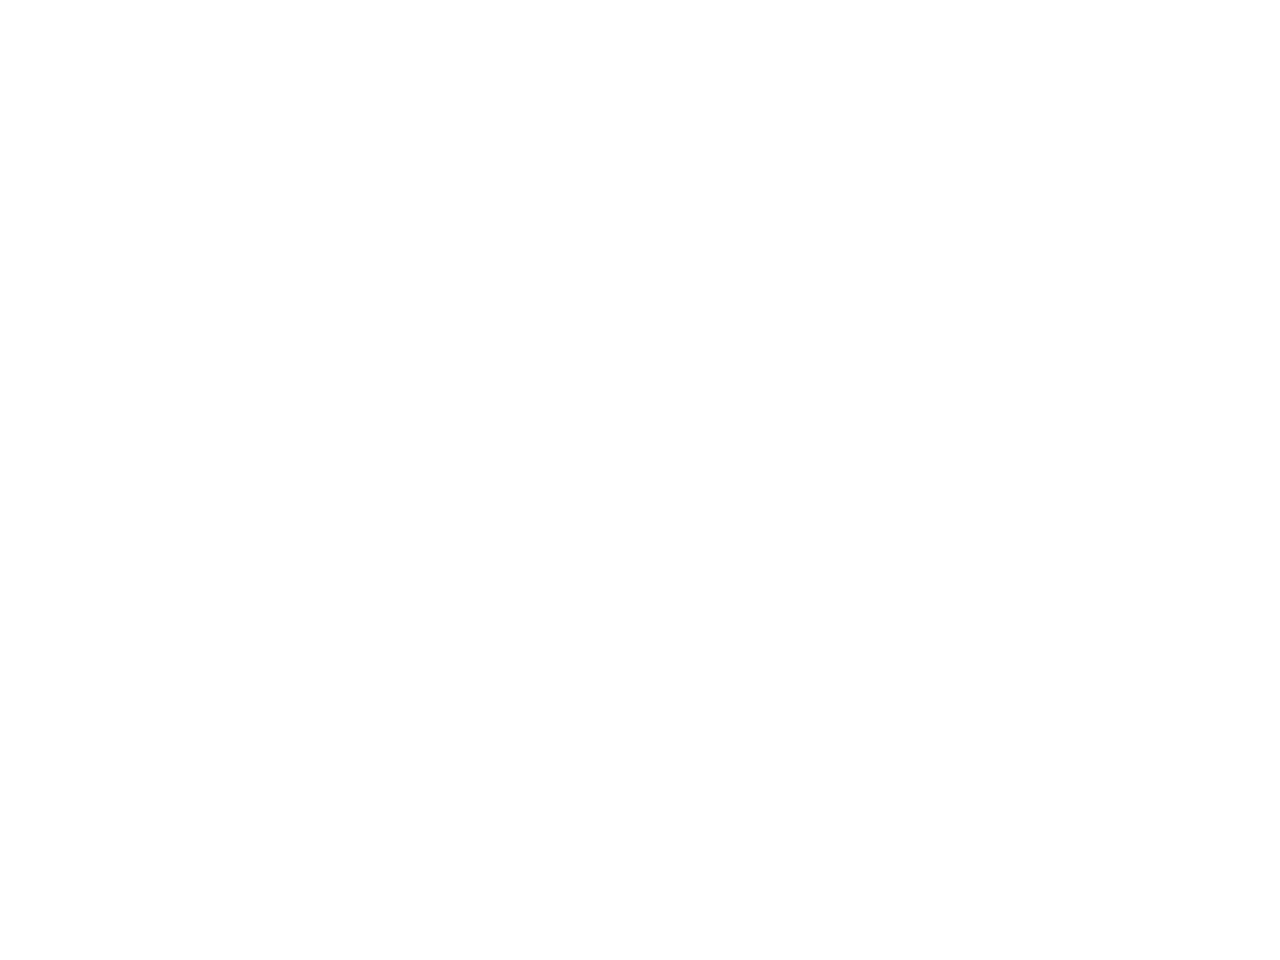

<IPython.core.display.Javascript object>


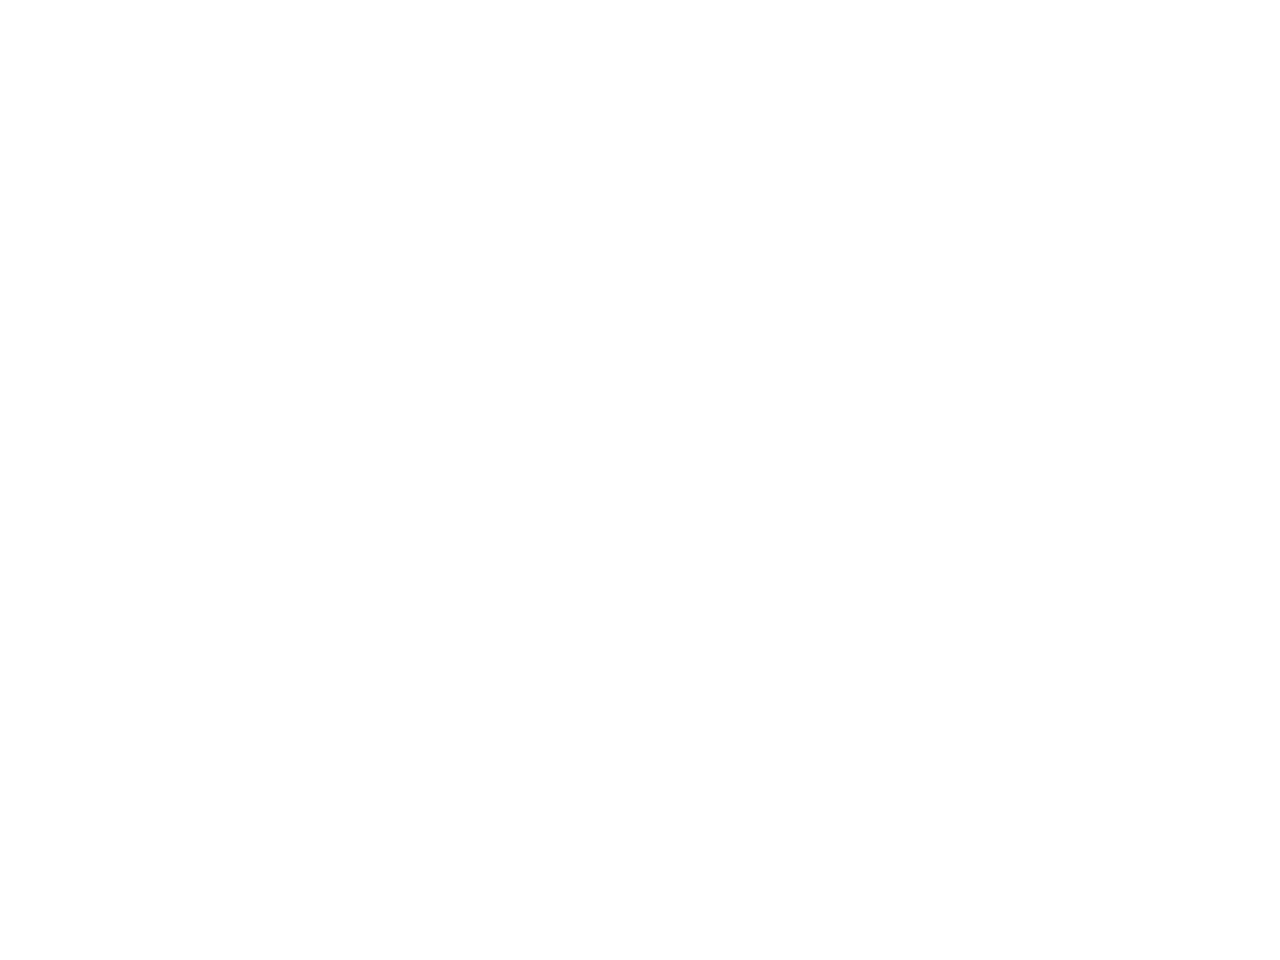

<IPython.core.display.Javascript object>


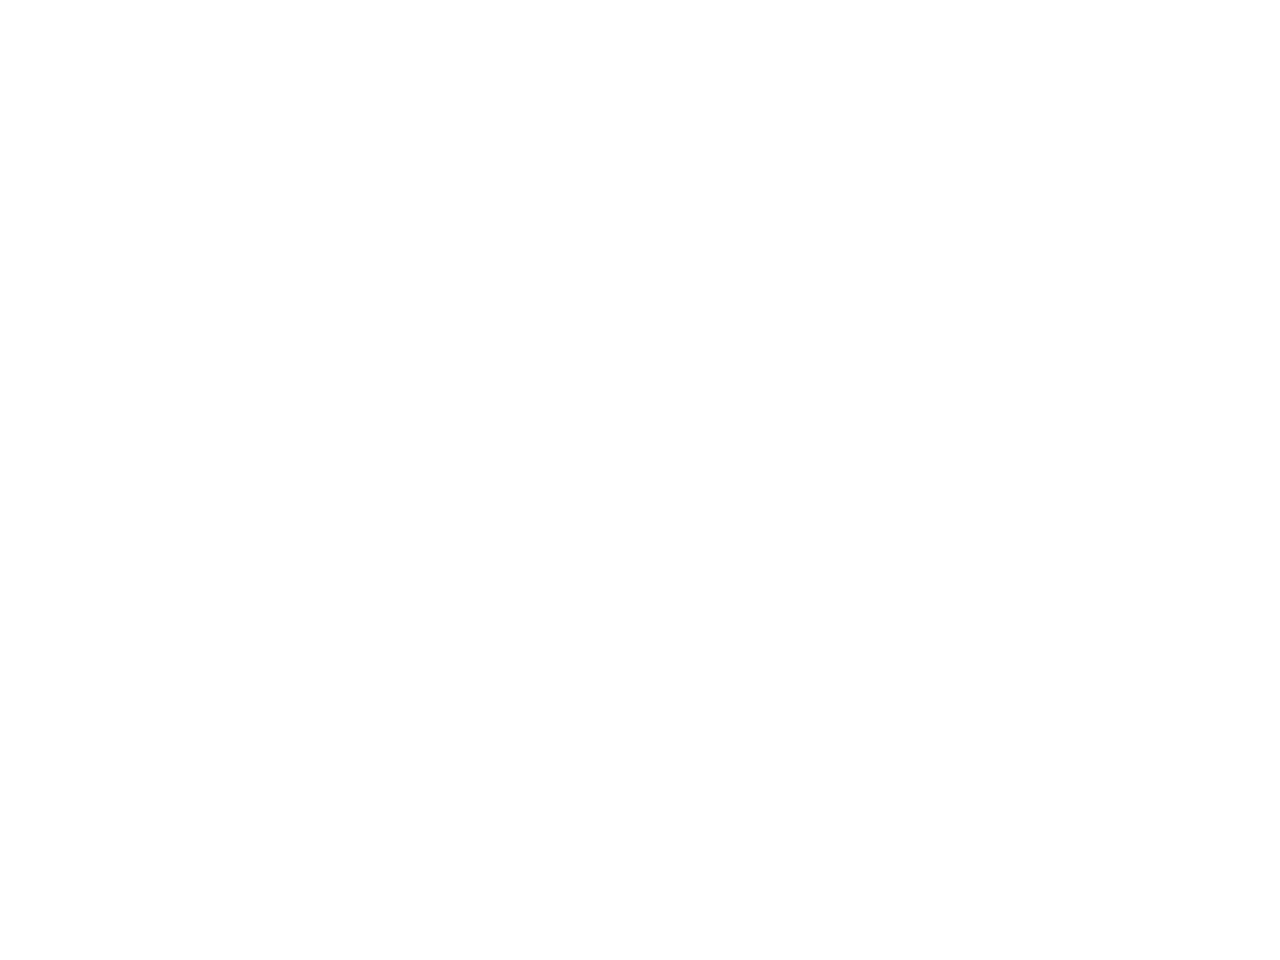

<IPython.core.display.Javascript object>


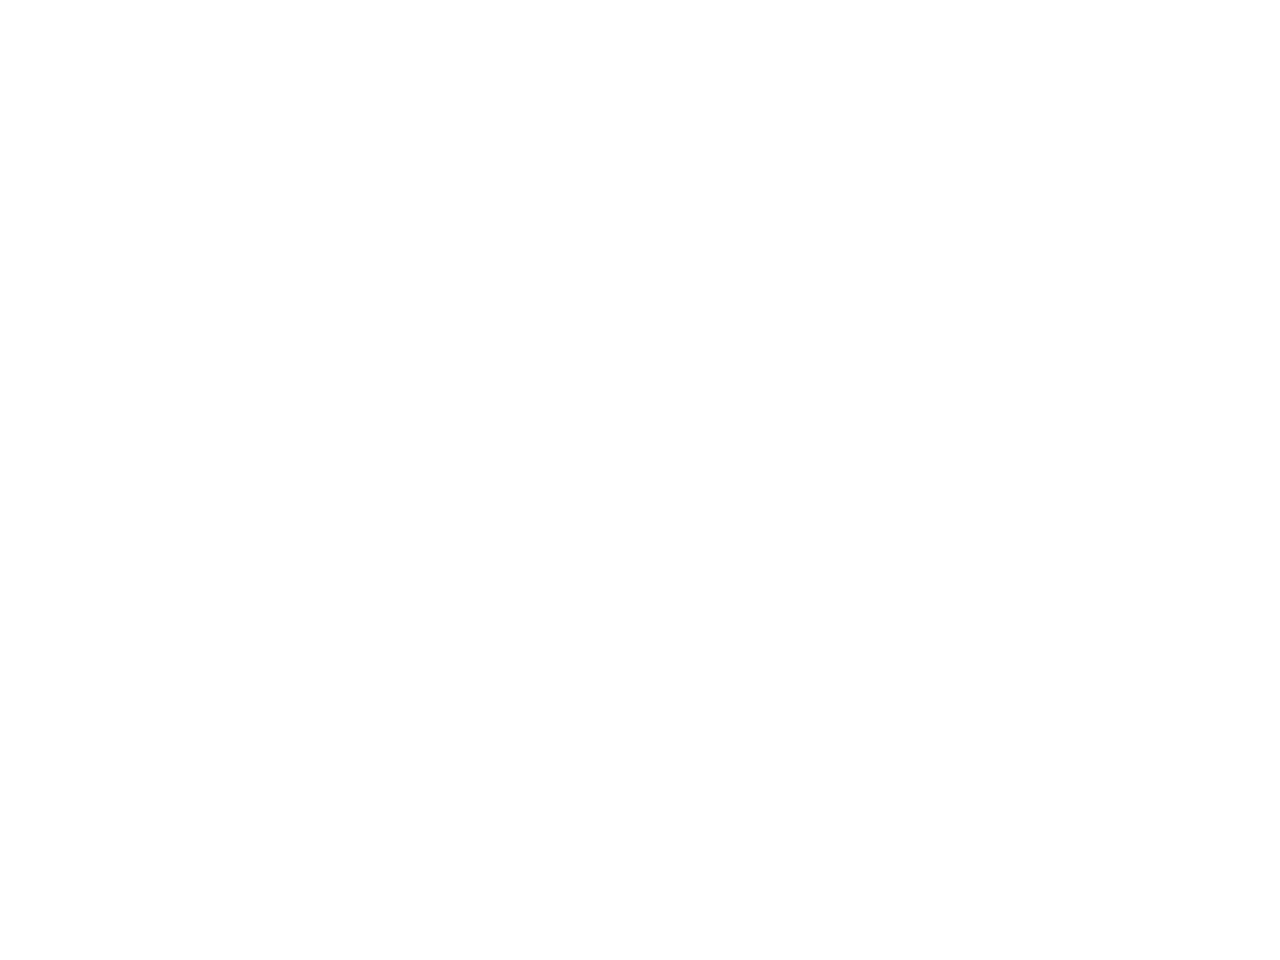

<IPython.core.display.Javascript object>


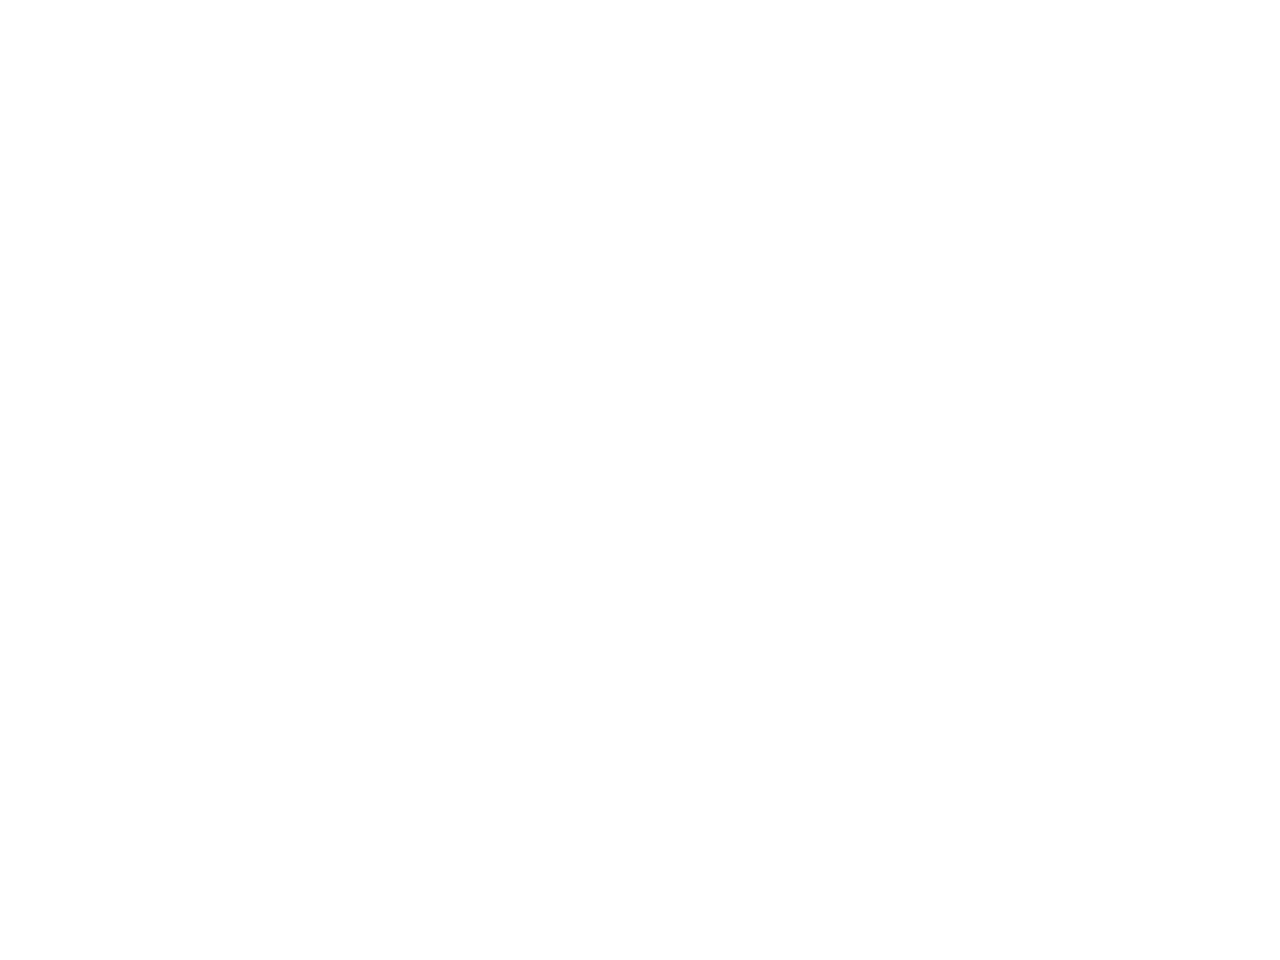

<IPython.core.display.Javascript object>


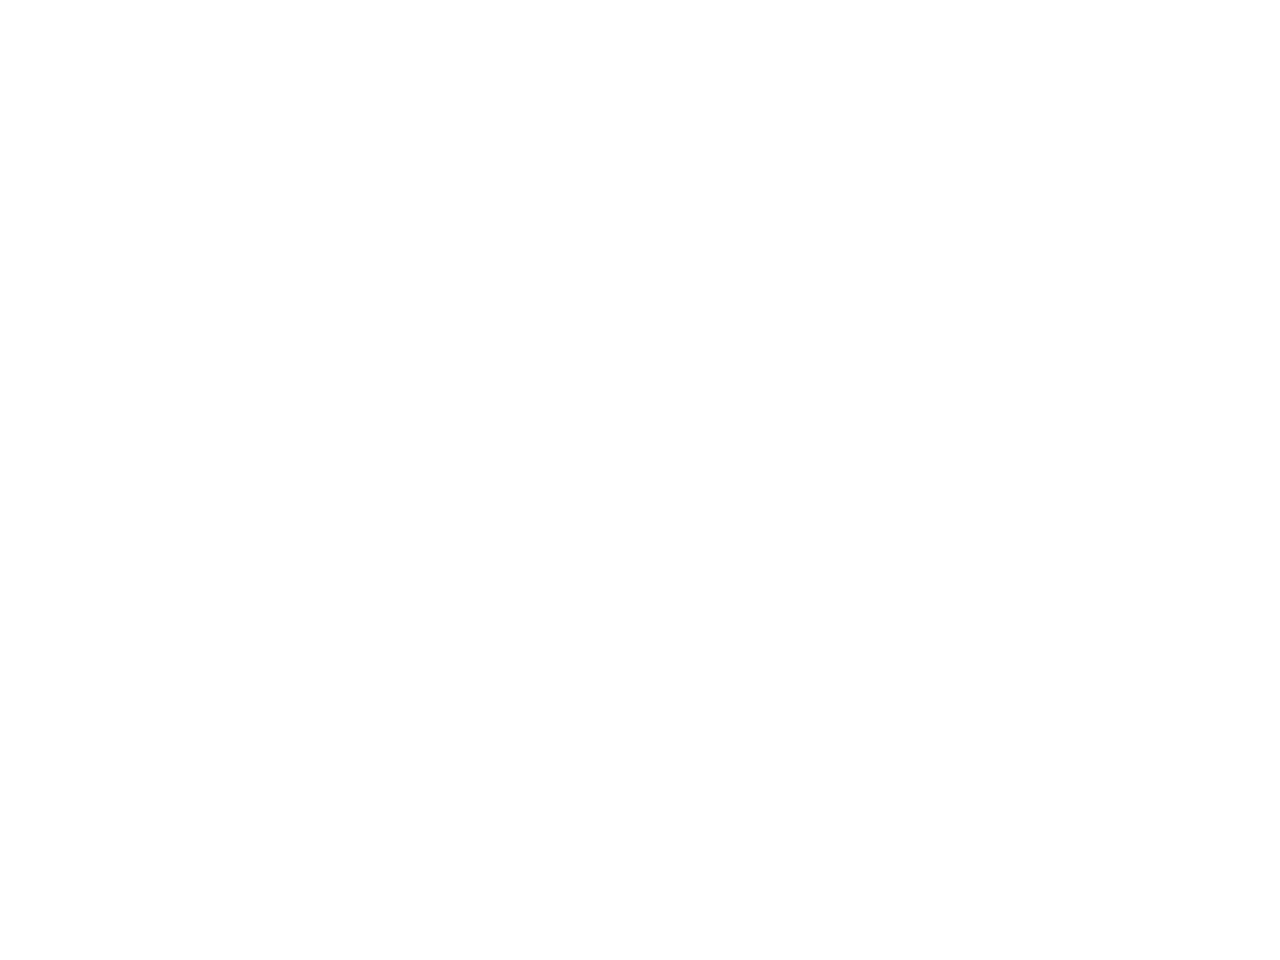

<IPython.core.display.Javascript object>


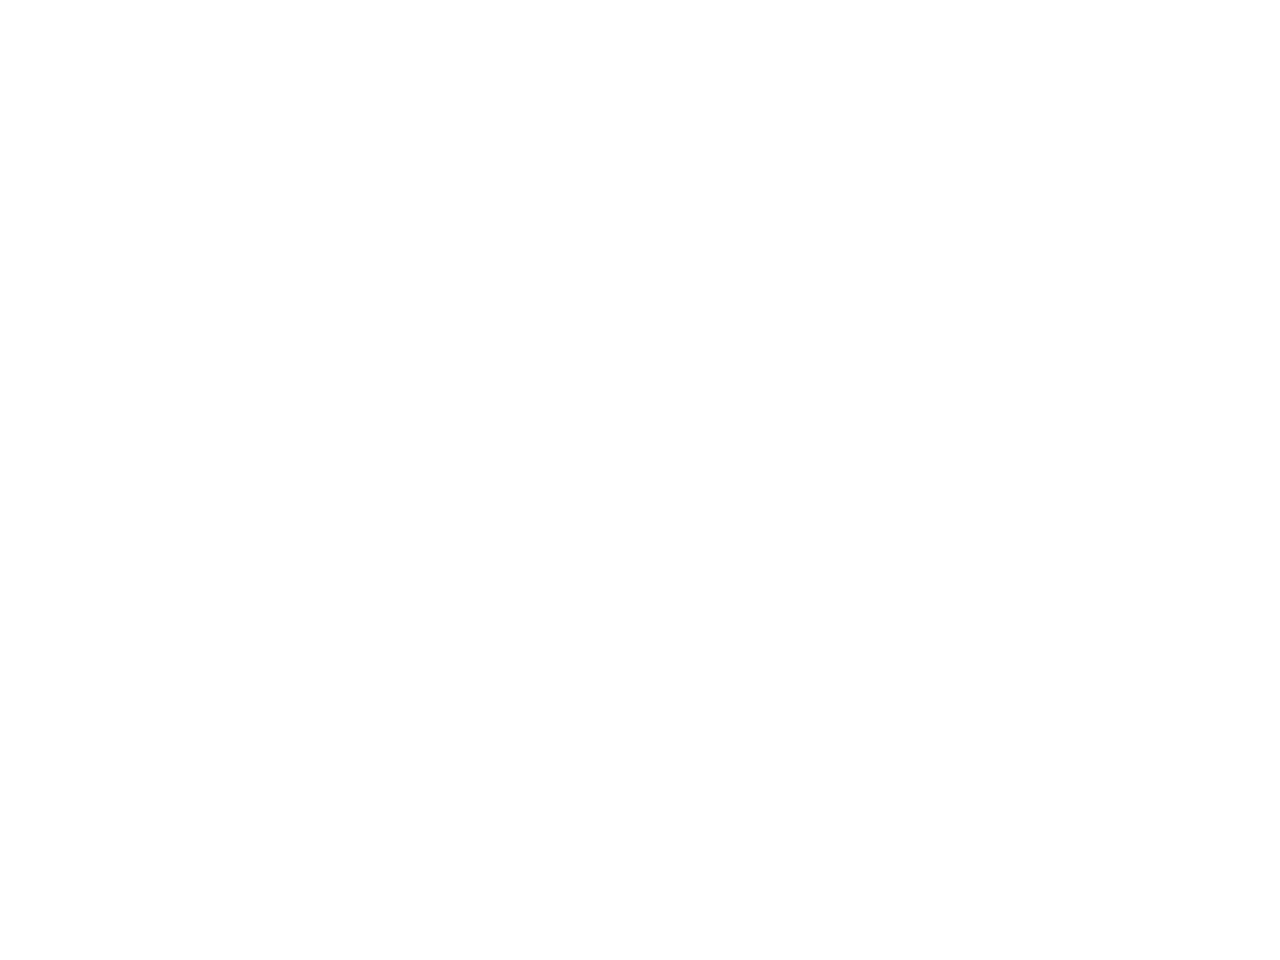

<IPython.core.display.Javascript object>


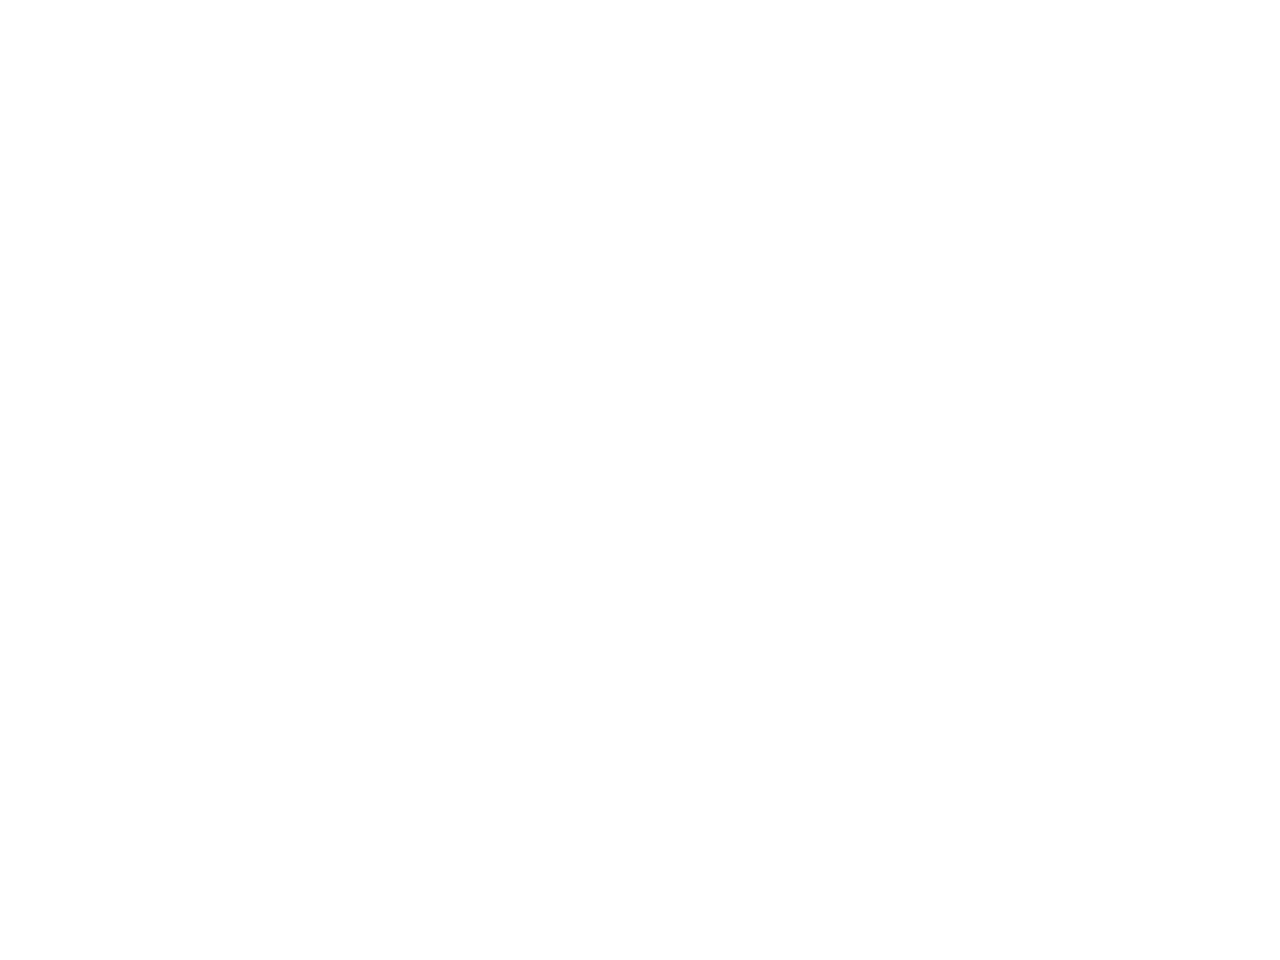

<IPython.core.display.Javascript object>


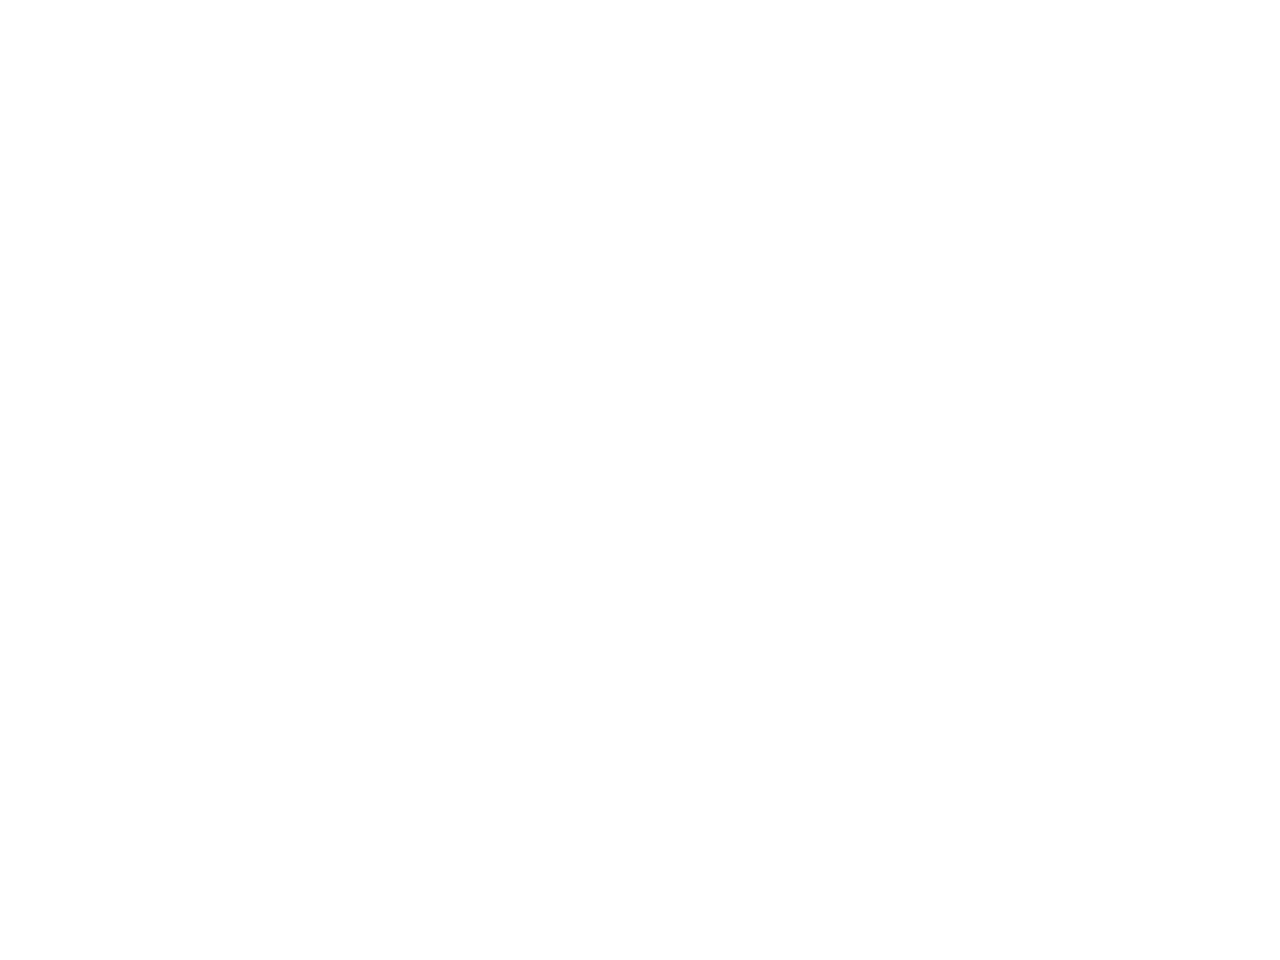

<IPython.core.display.Javascript object>


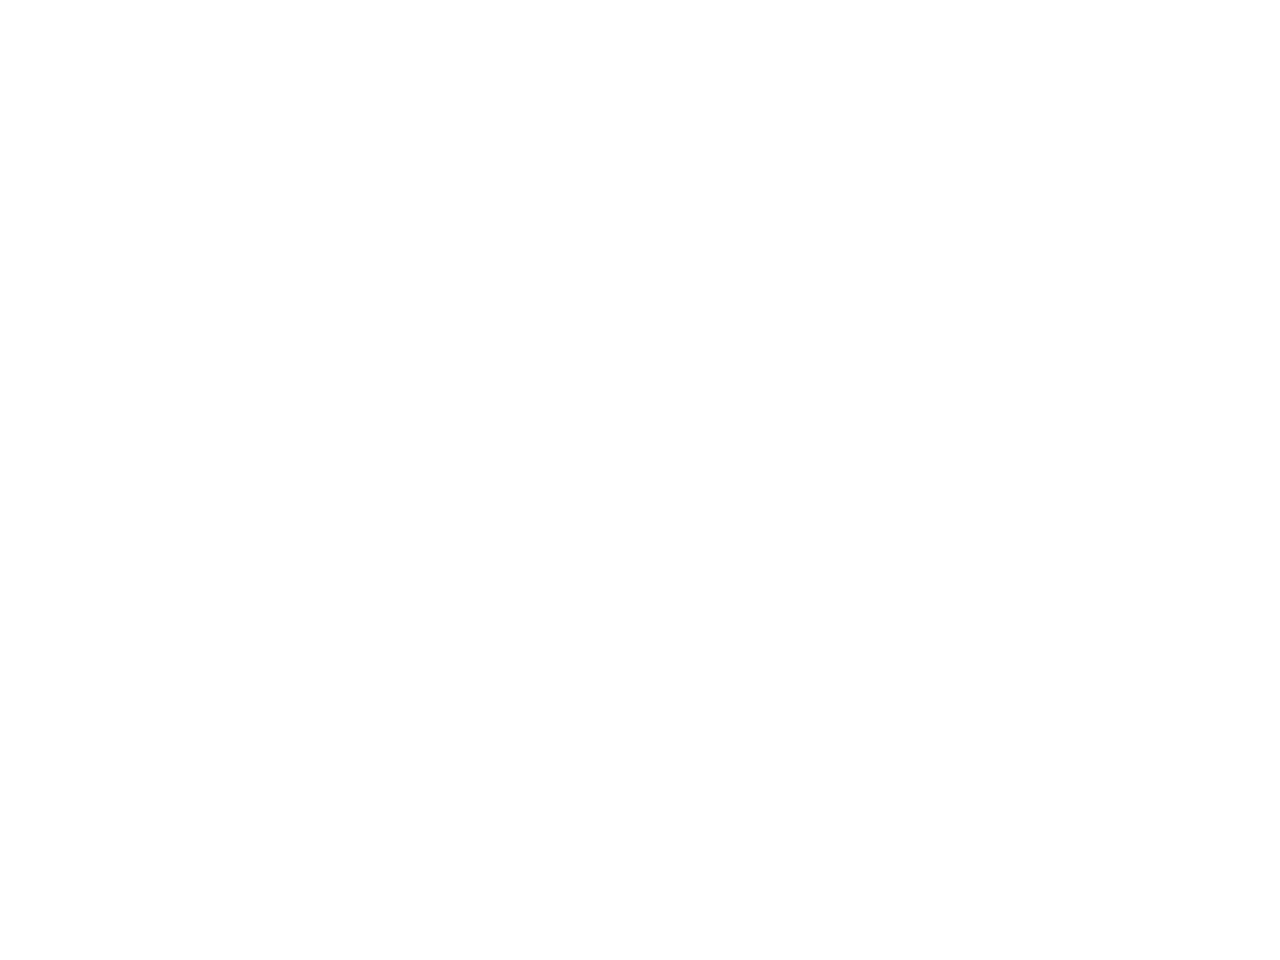

<IPython.core.display.Javascript object>


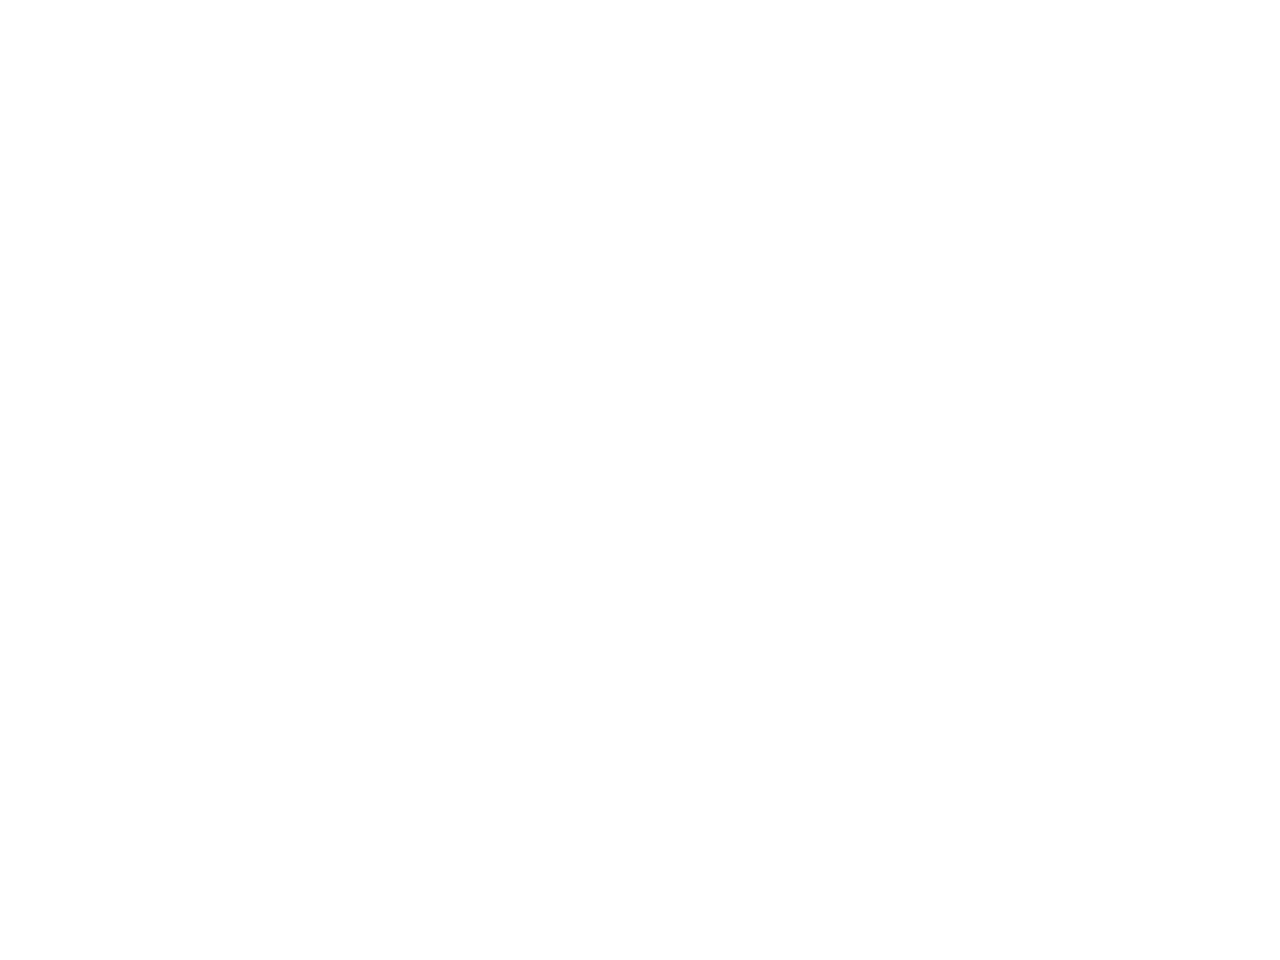

<IPython.core.display.Javascript object>


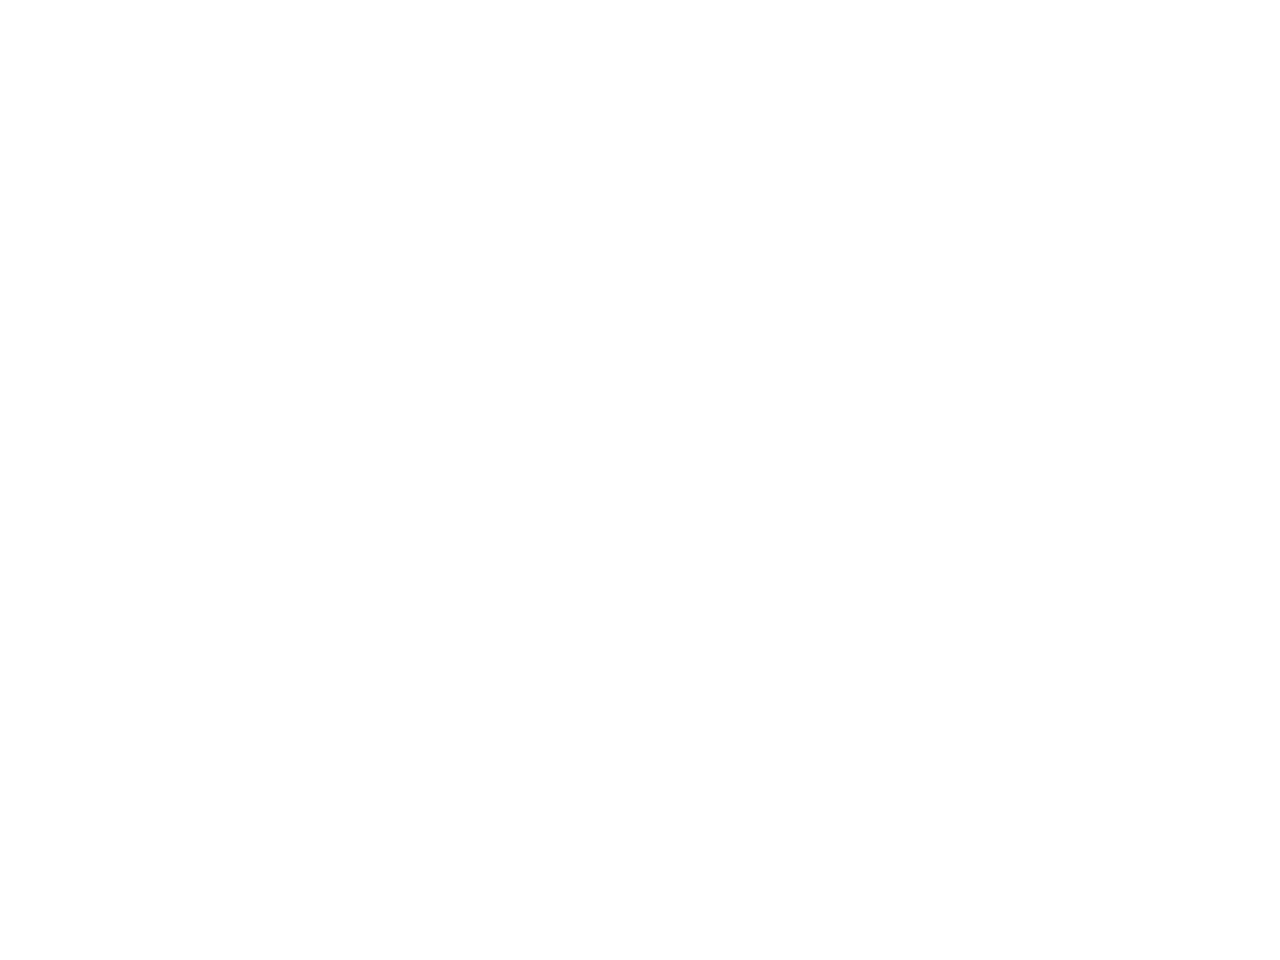

<IPython.core.display.Javascript object>


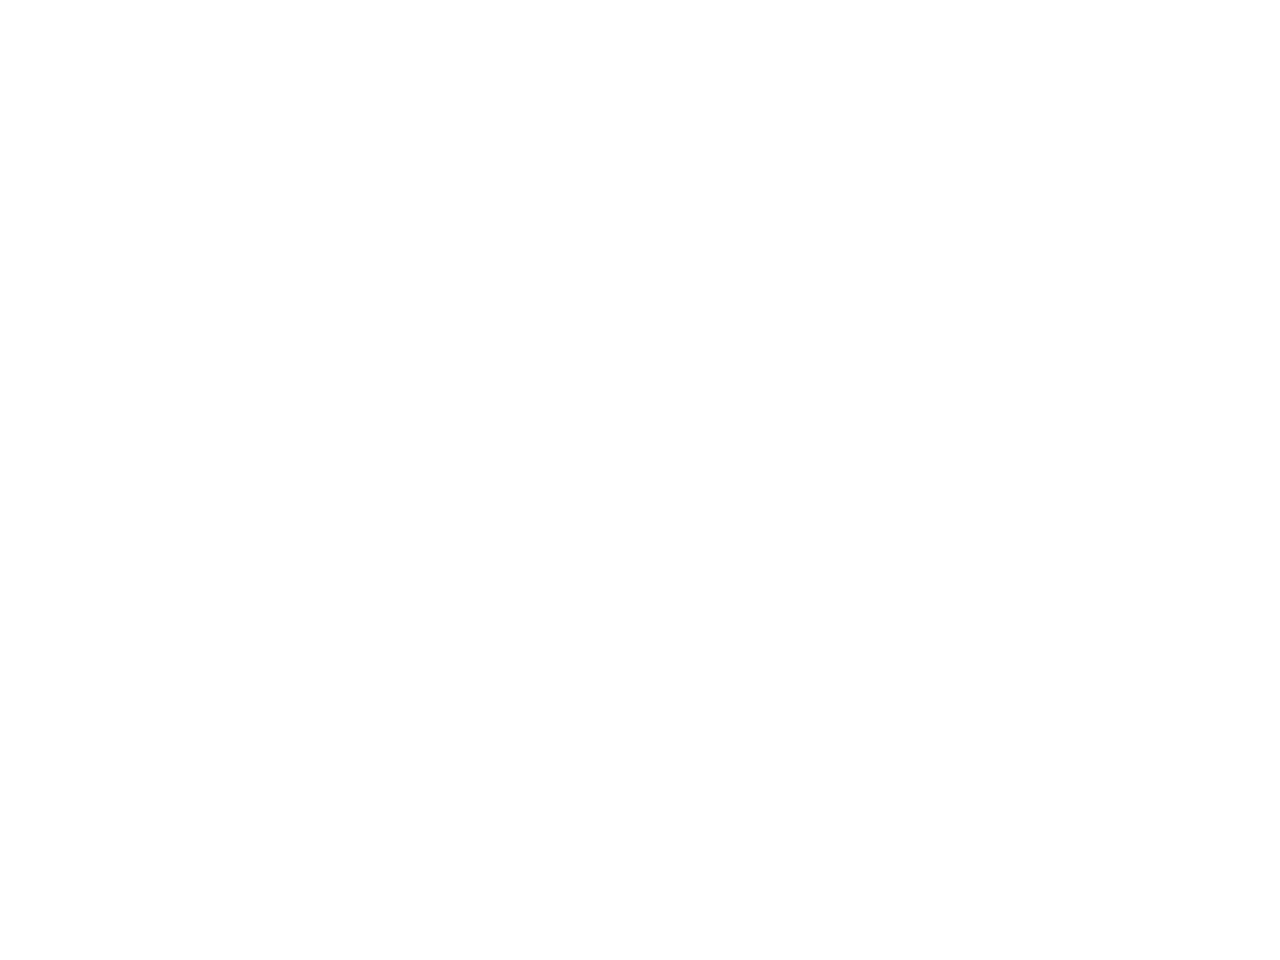

<IPython.core.display.Javascript object>


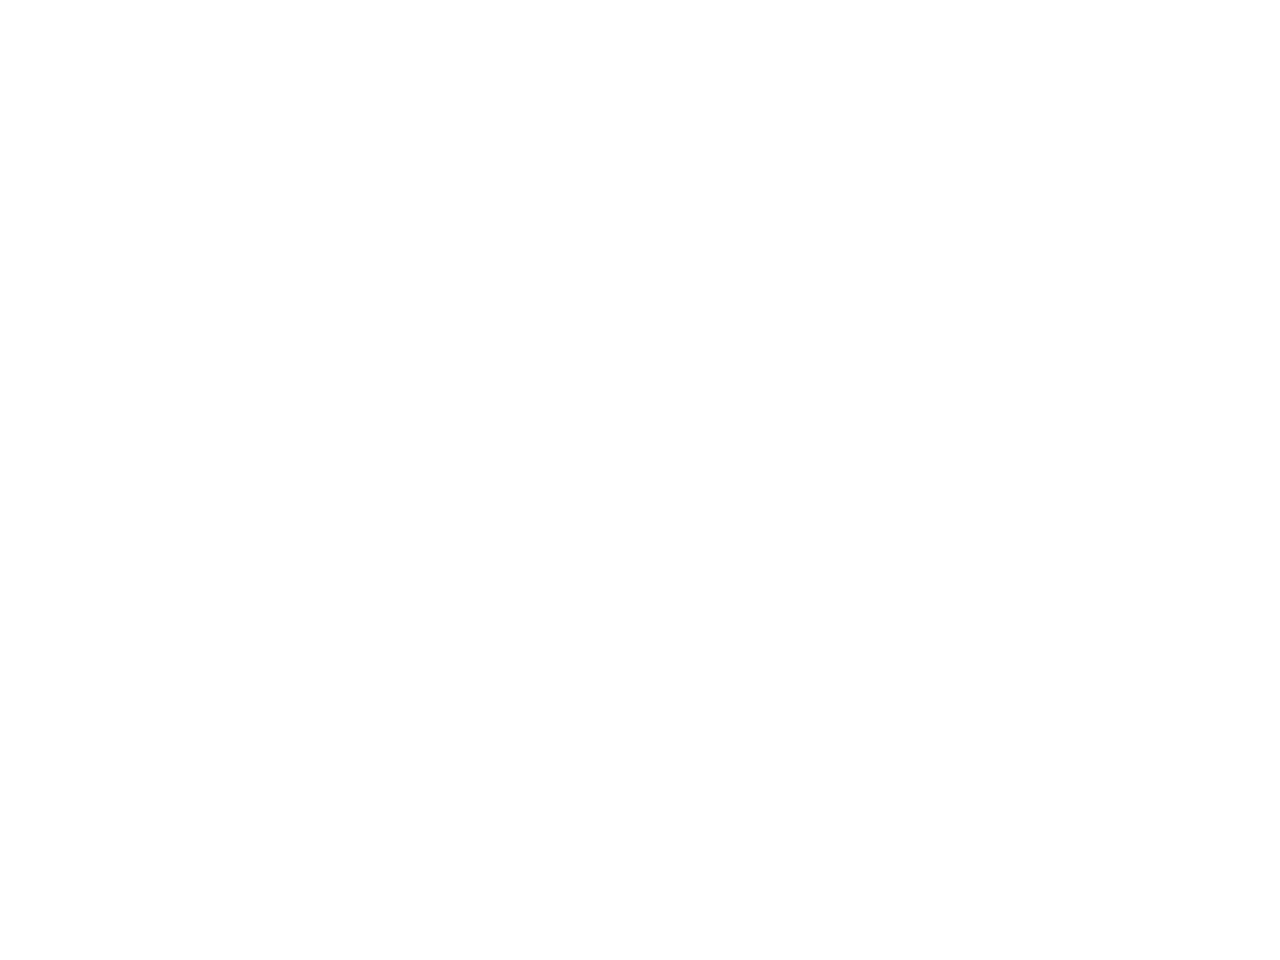

<IPython.core.display.Javascript object>


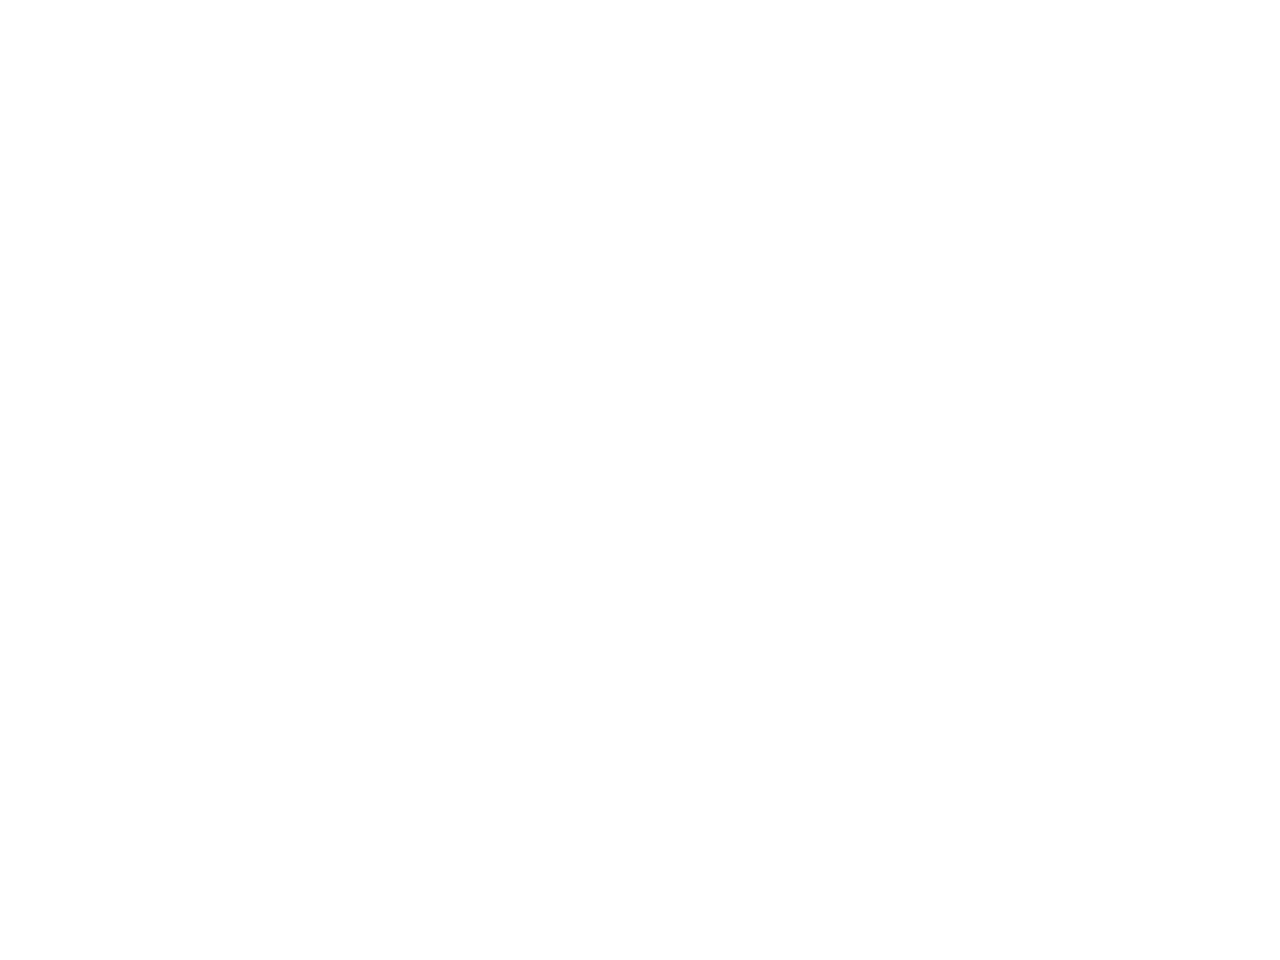

<IPython.core.display.Javascript object>


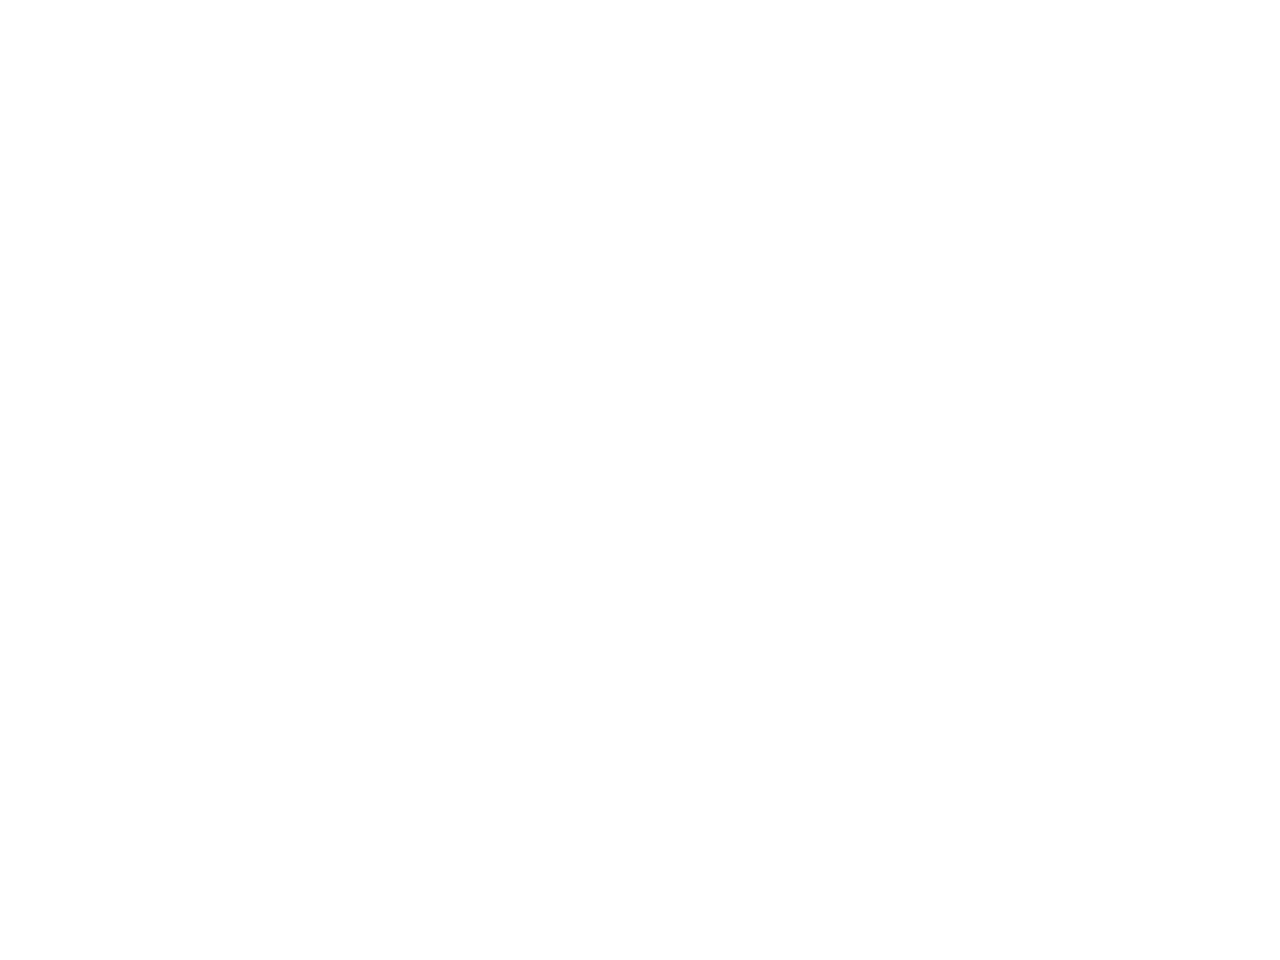

<IPython.core.display.Javascript object>


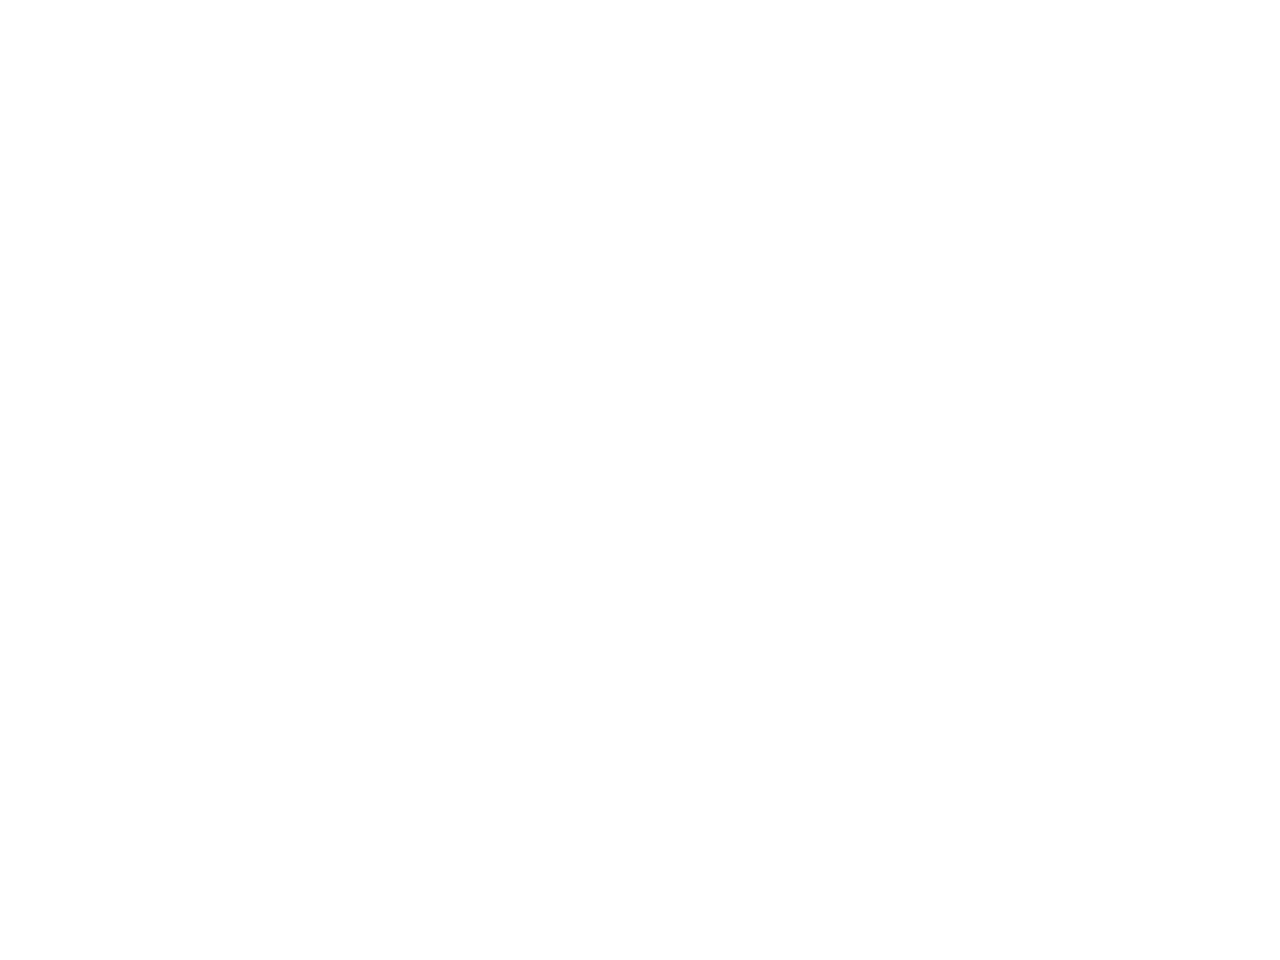

<IPython.core.display.Javascript object>


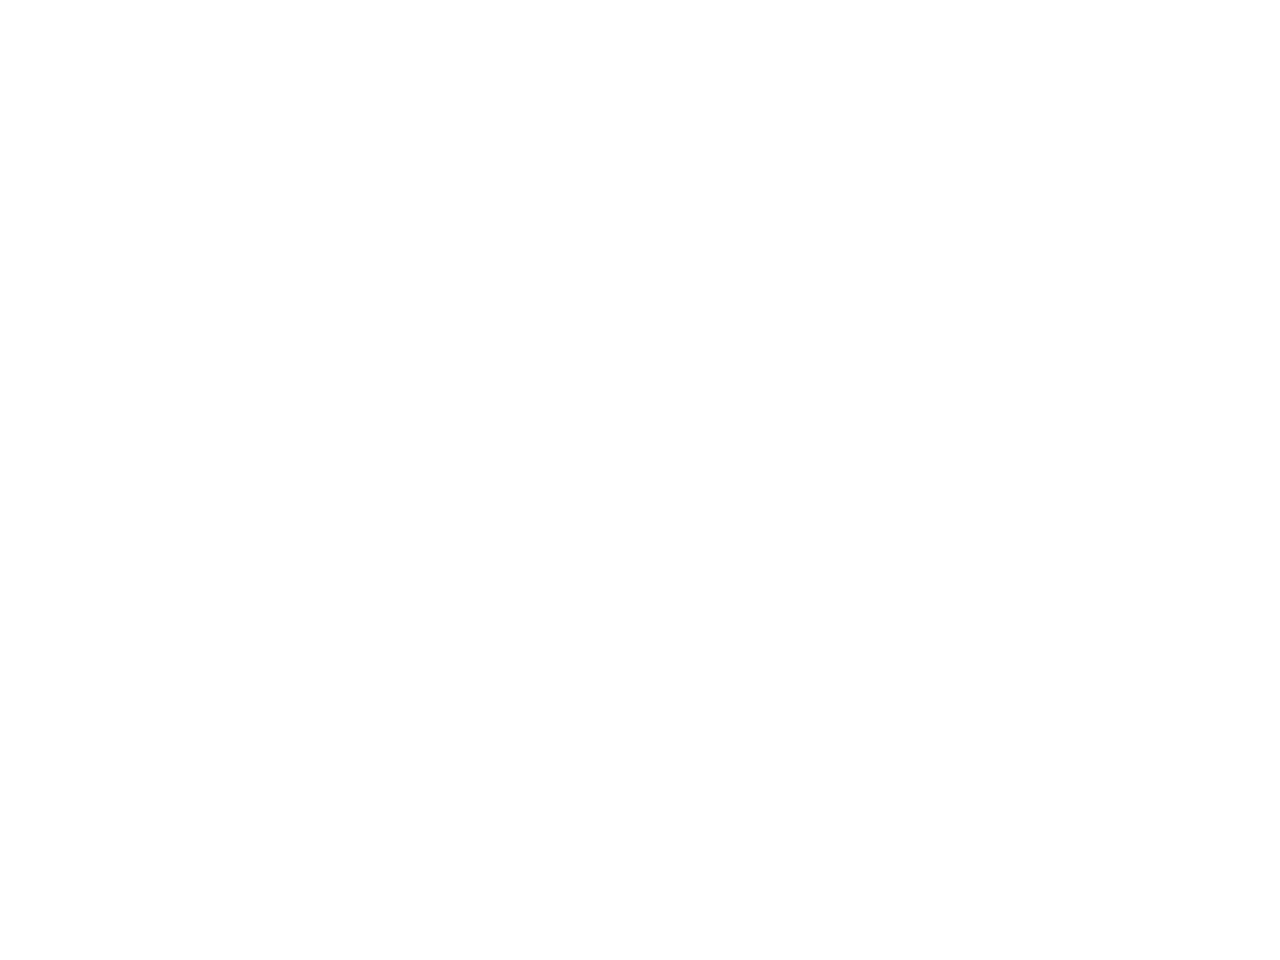

<IPython.core.display.Javascript object>


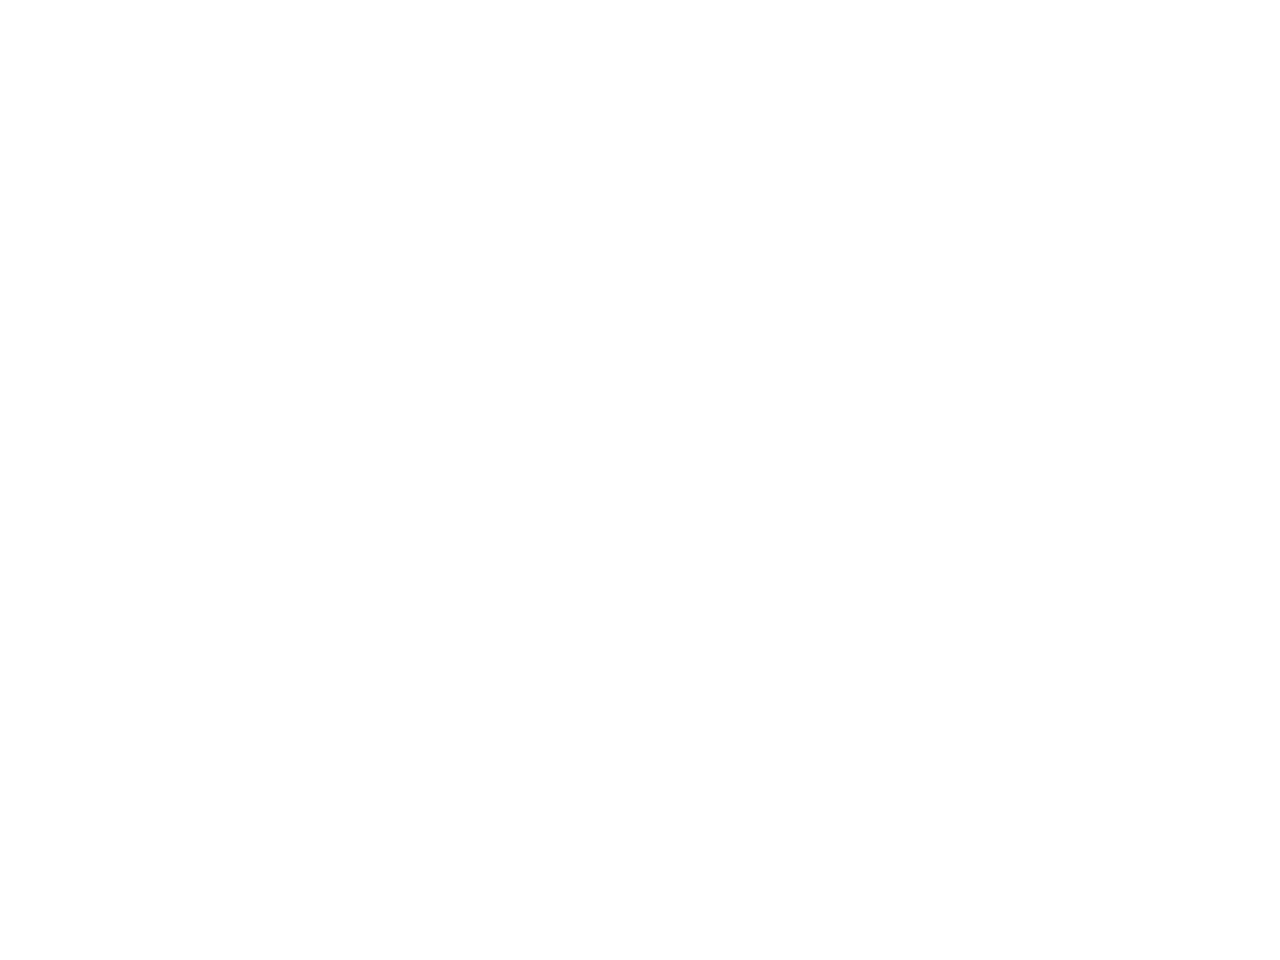

<IPython.core.display.Javascript object>


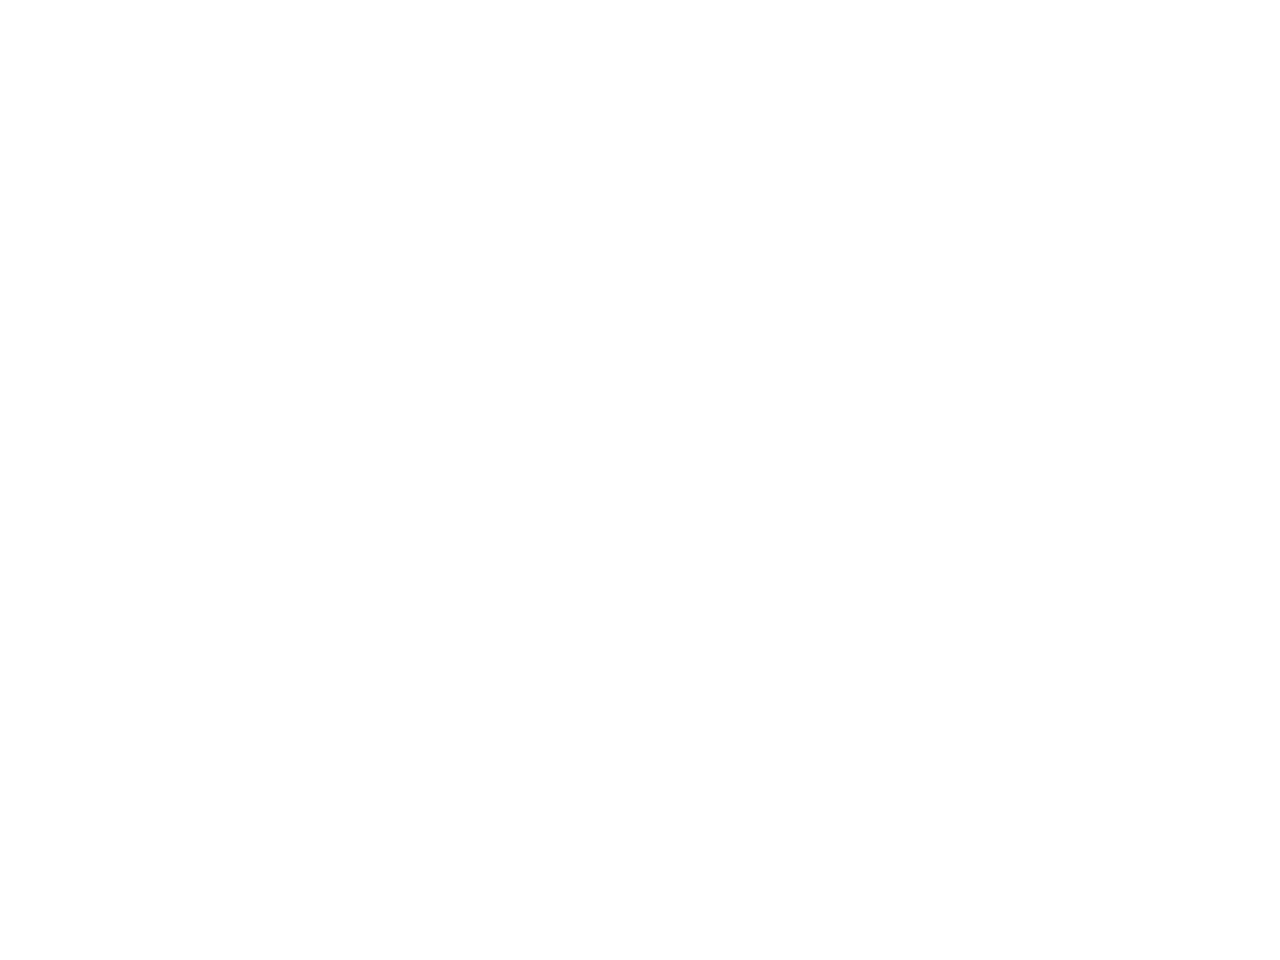

<IPython.core.display.Javascript object>


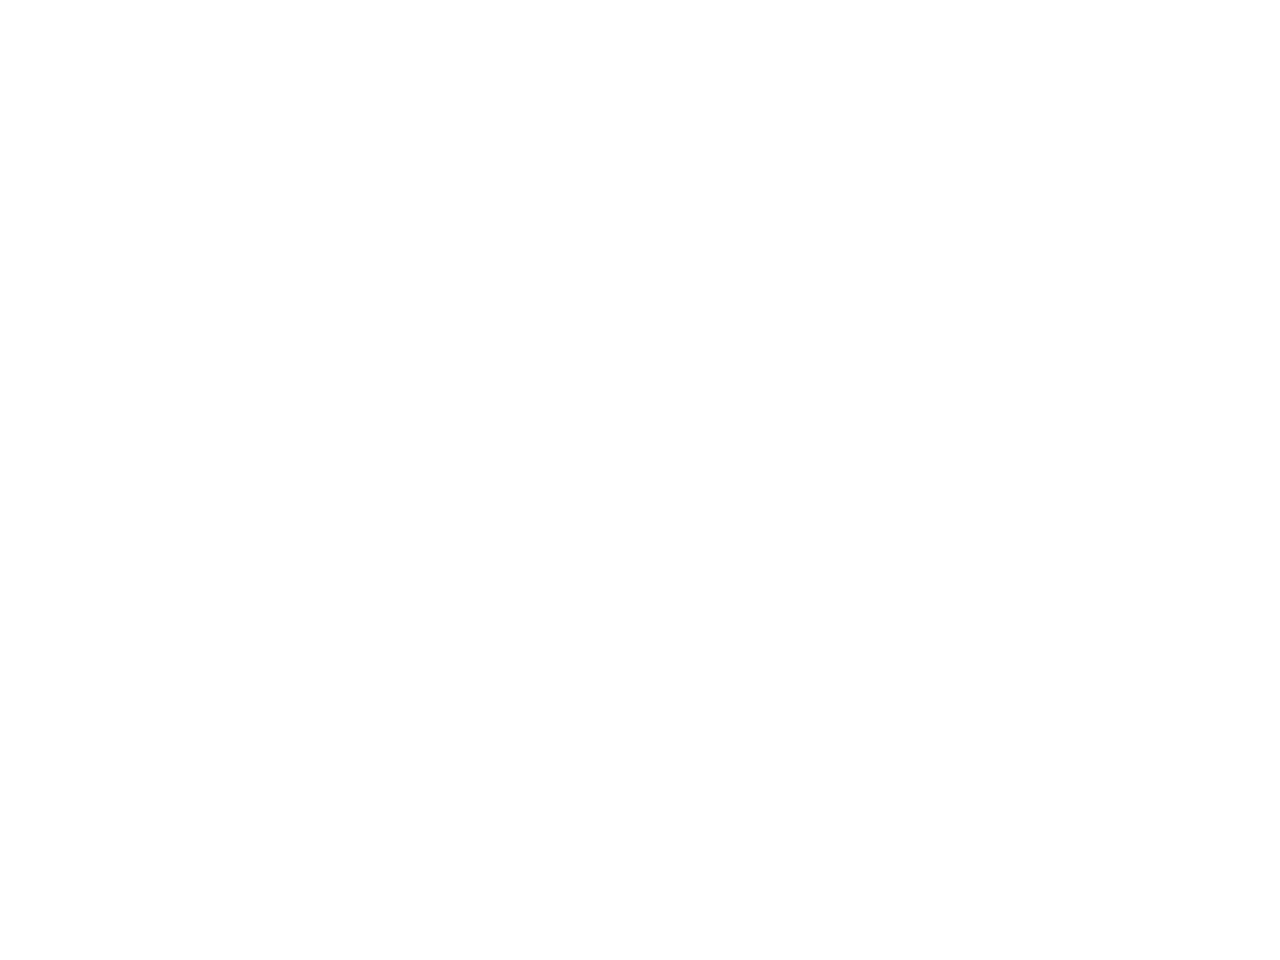

<IPython.core.display.Javascript object>


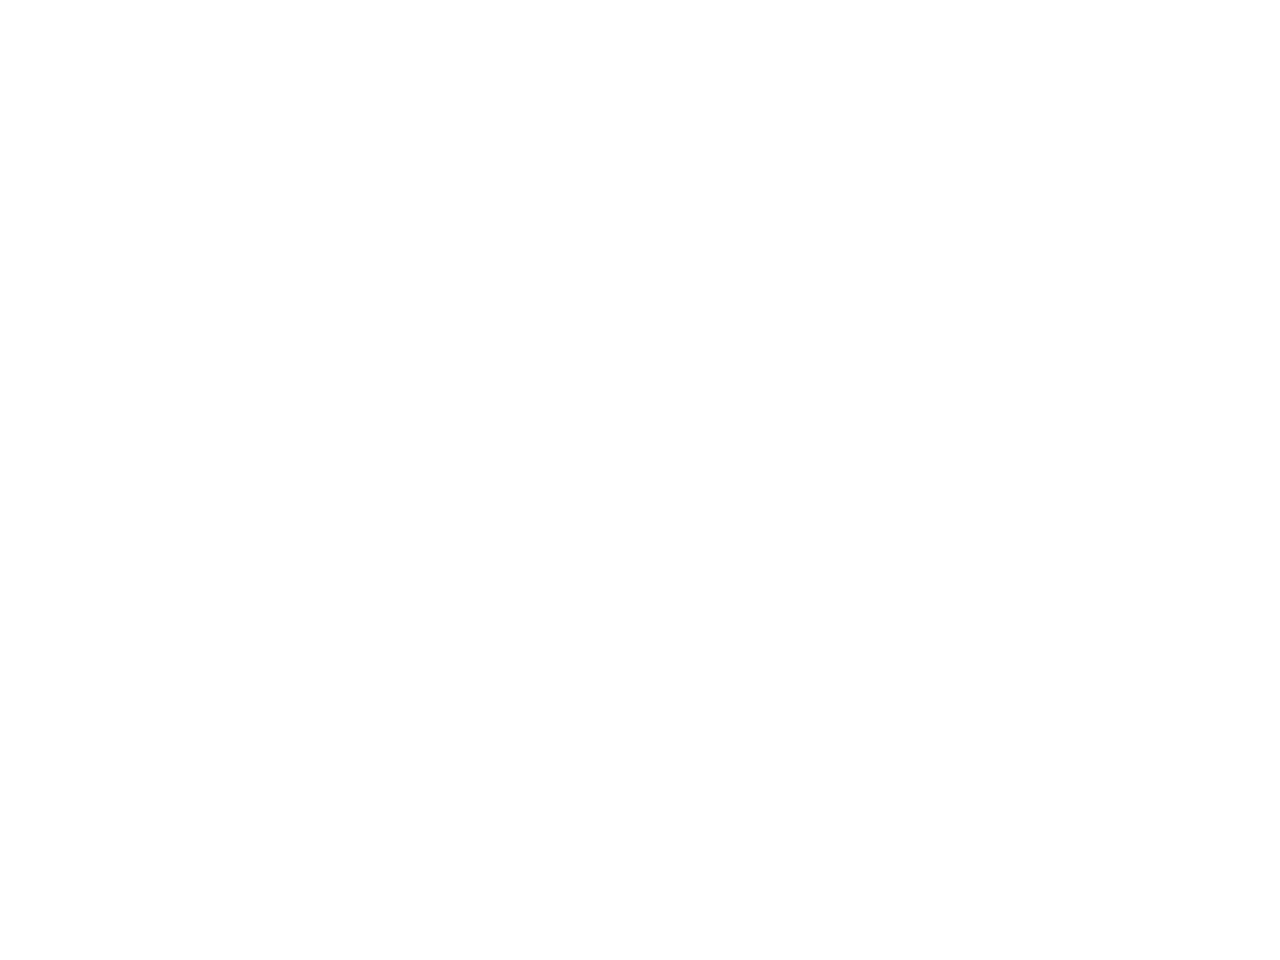

<IPython.core.display.Javascript object>


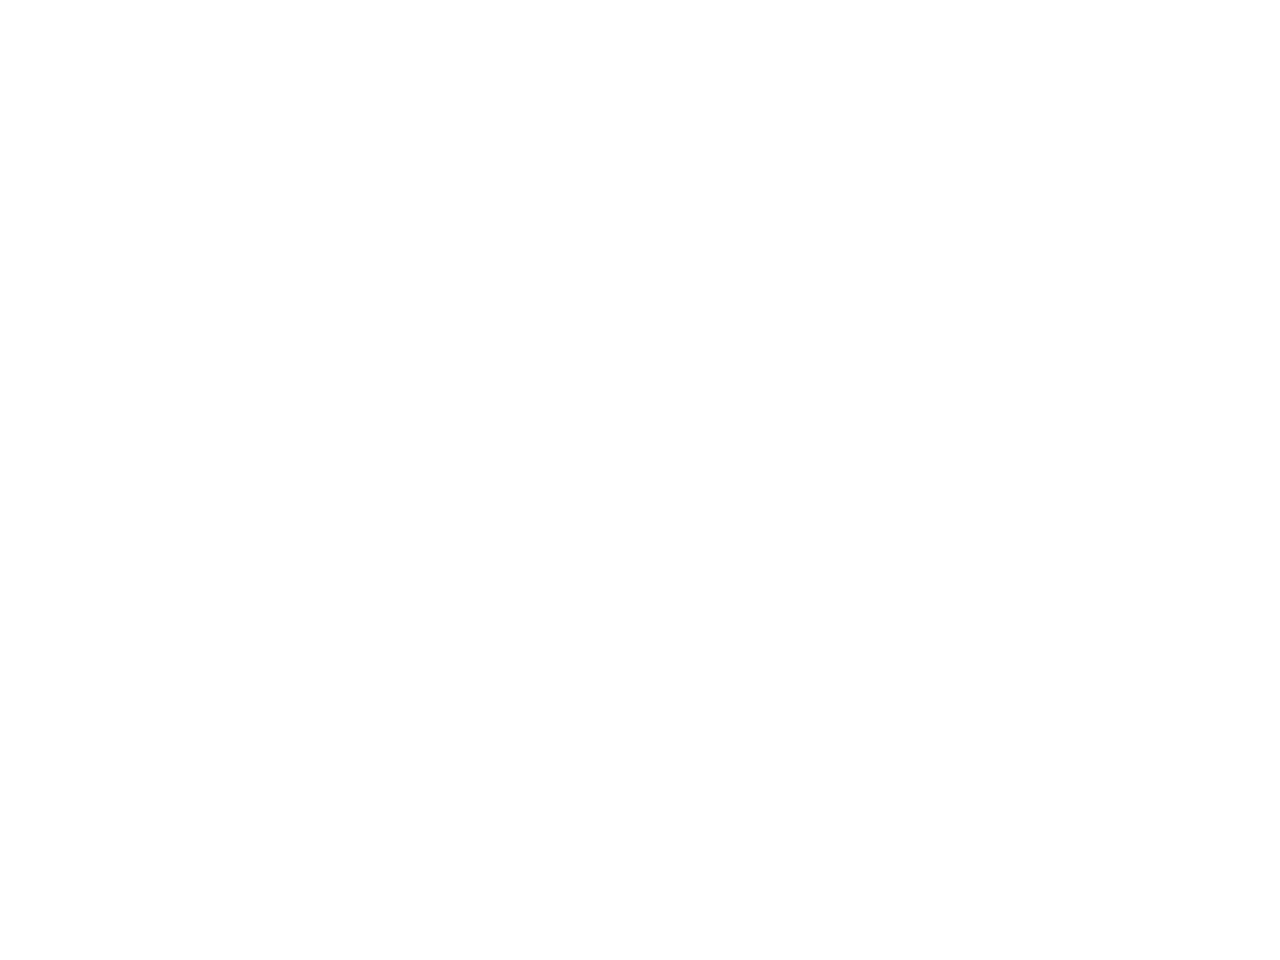

<IPython.core.display.Javascript object>


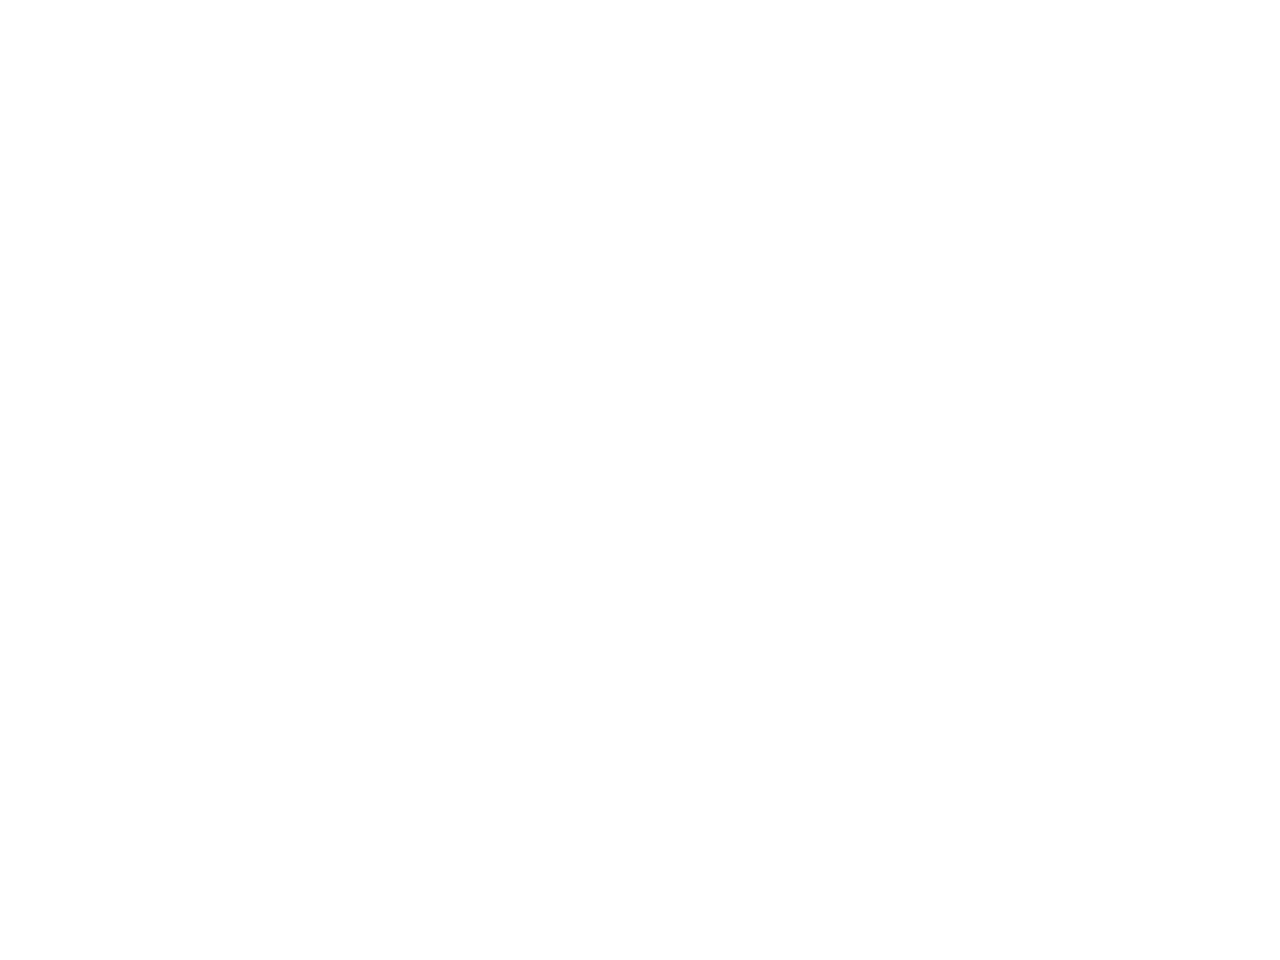

<IPython.core.display.Javascript object>


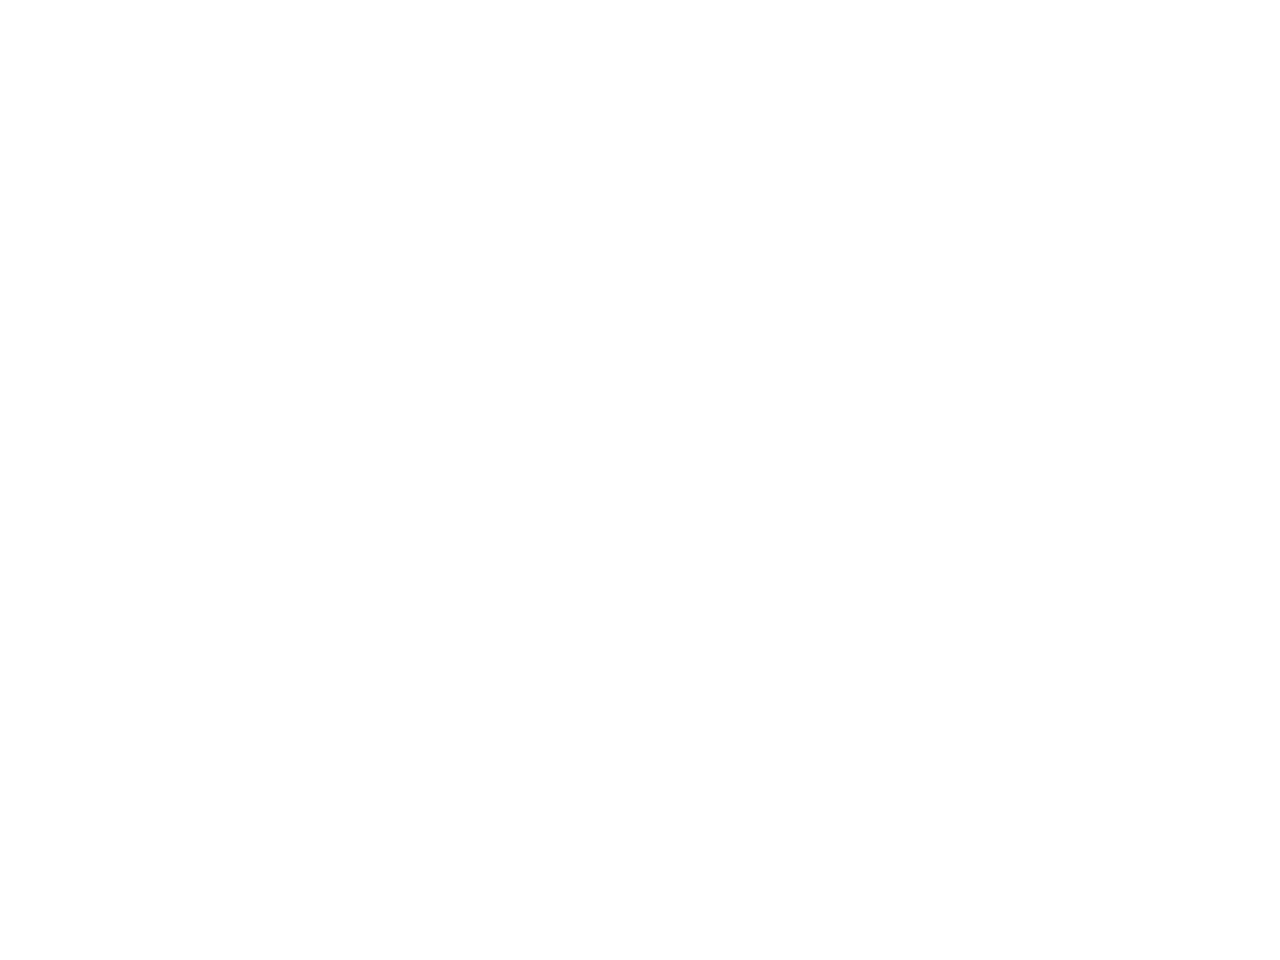

<IPython.core.display.Javascript object>


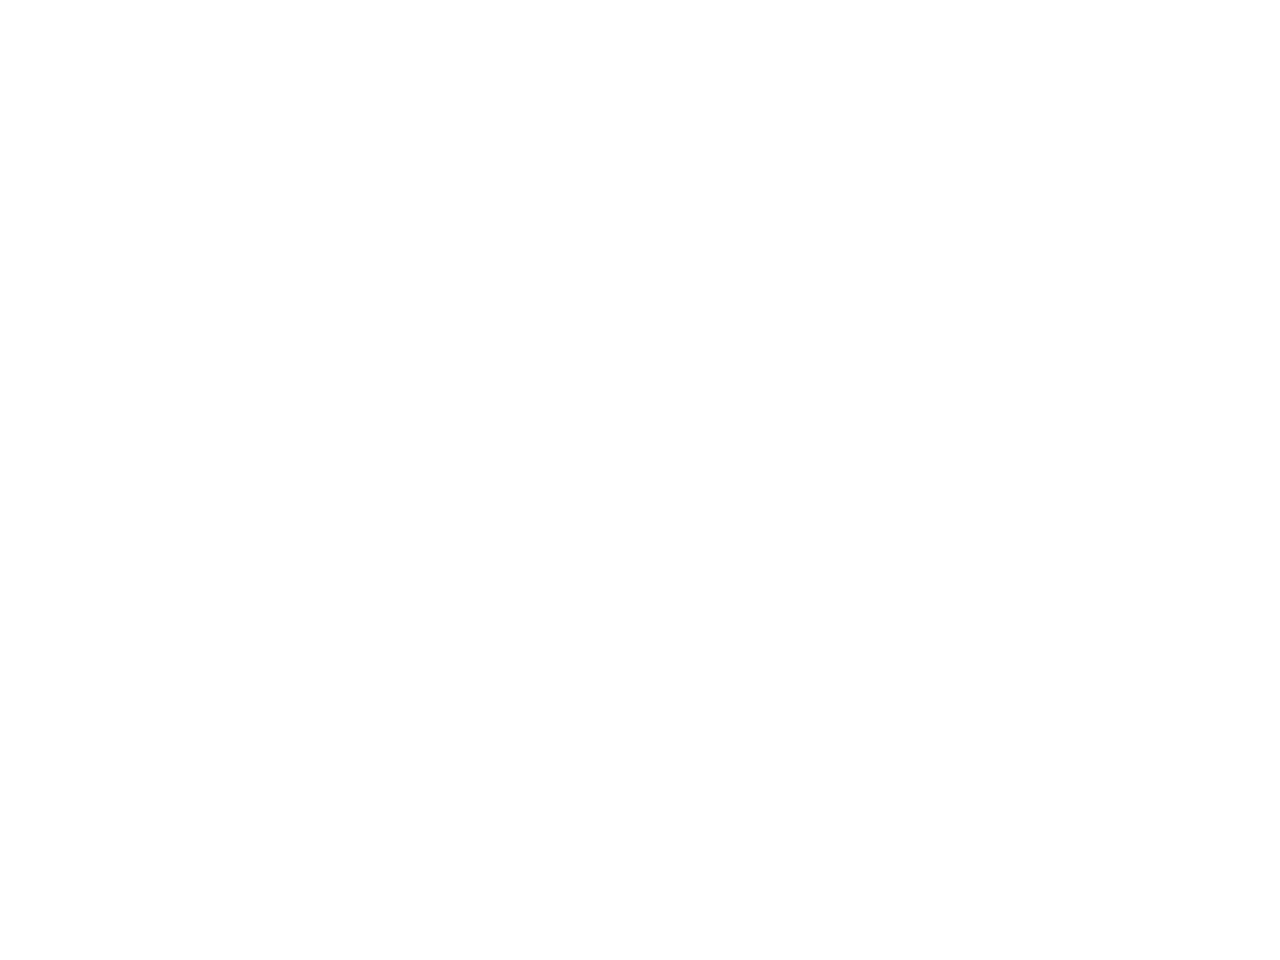

<IPython.core.display.Javascript object>


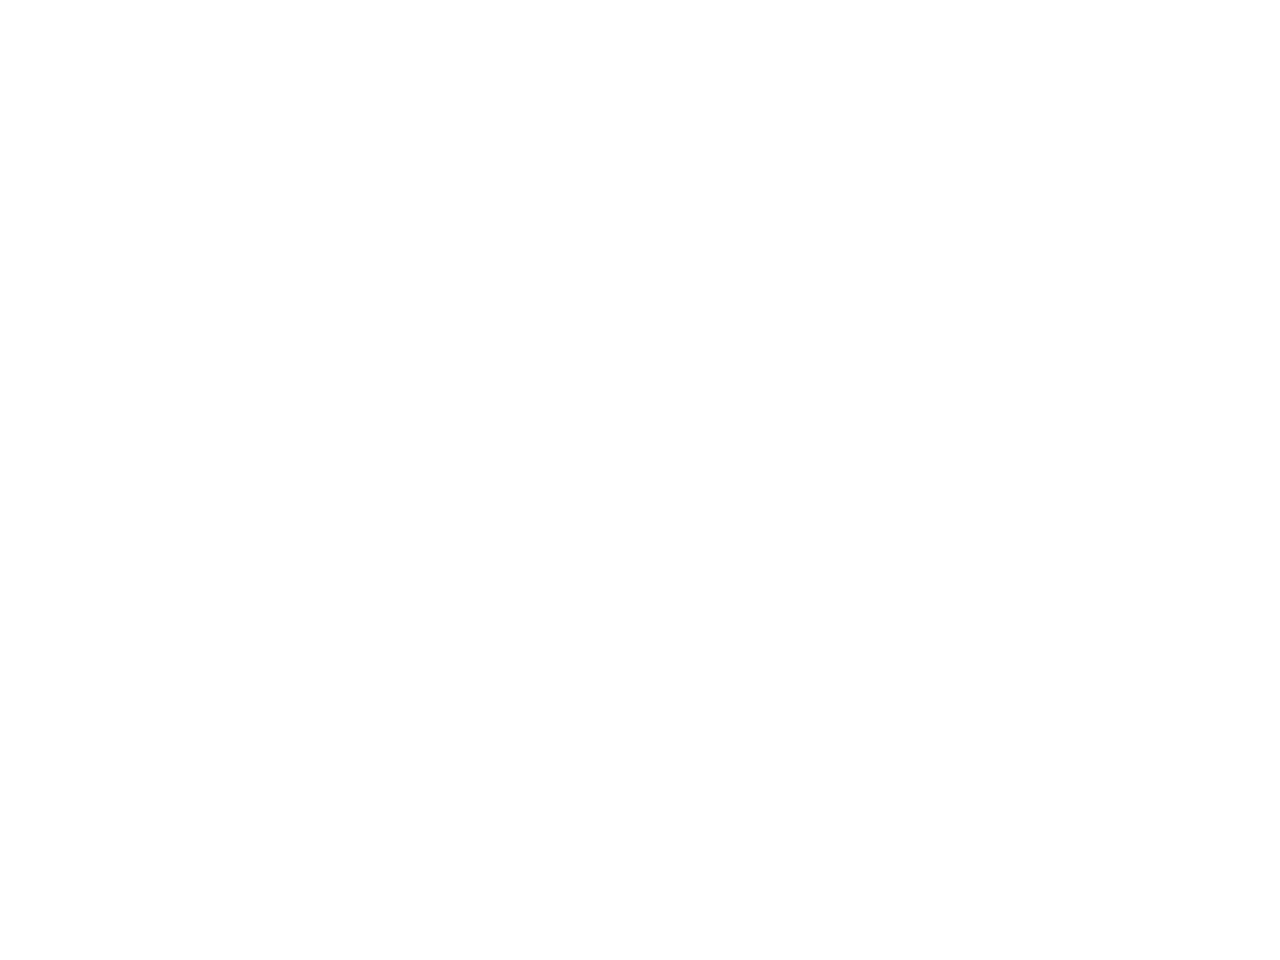

<IPython.core.display.Javascript object>


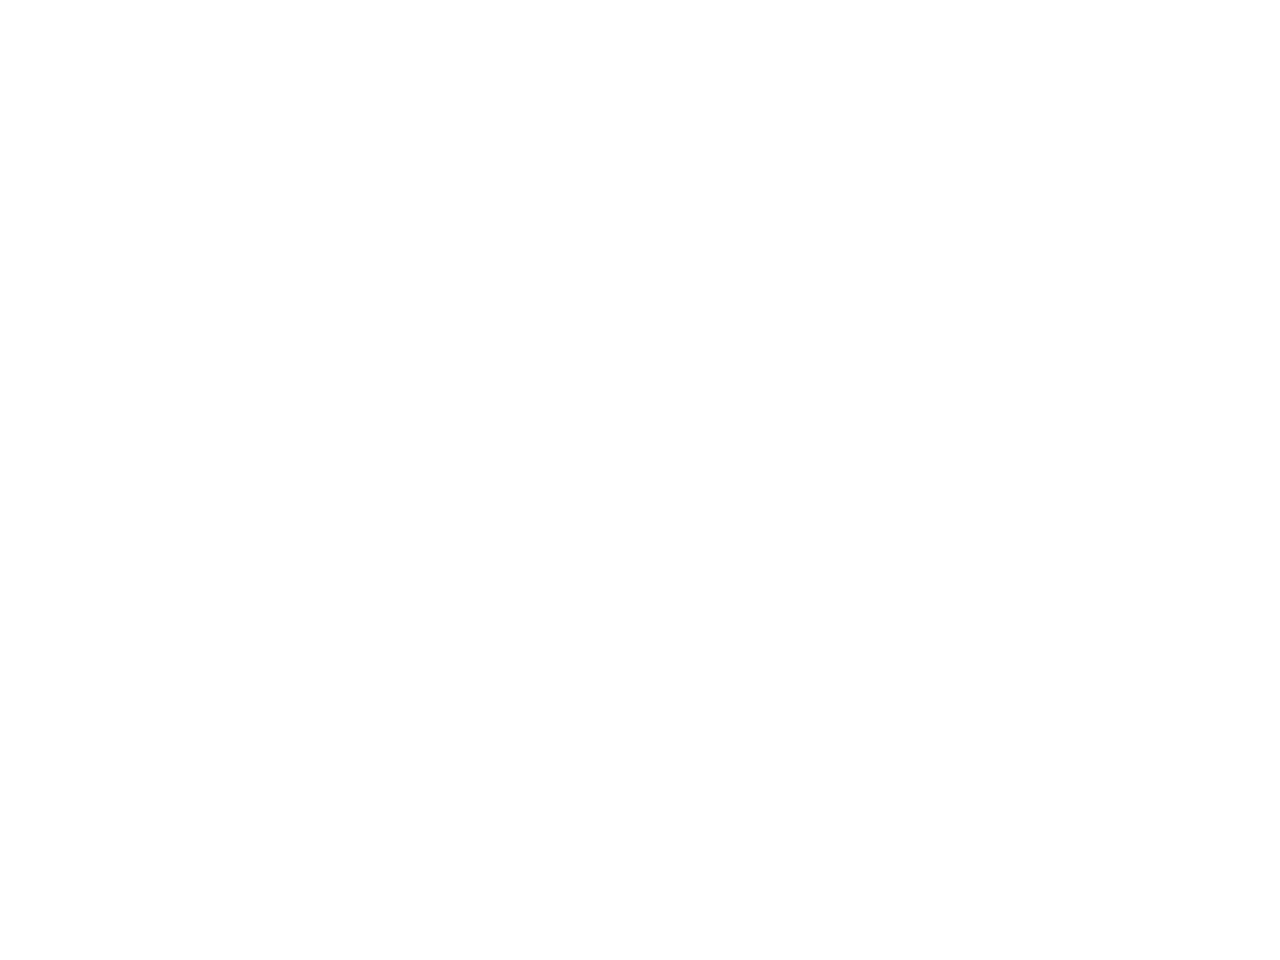

<IPython.core.display.Javascript object>


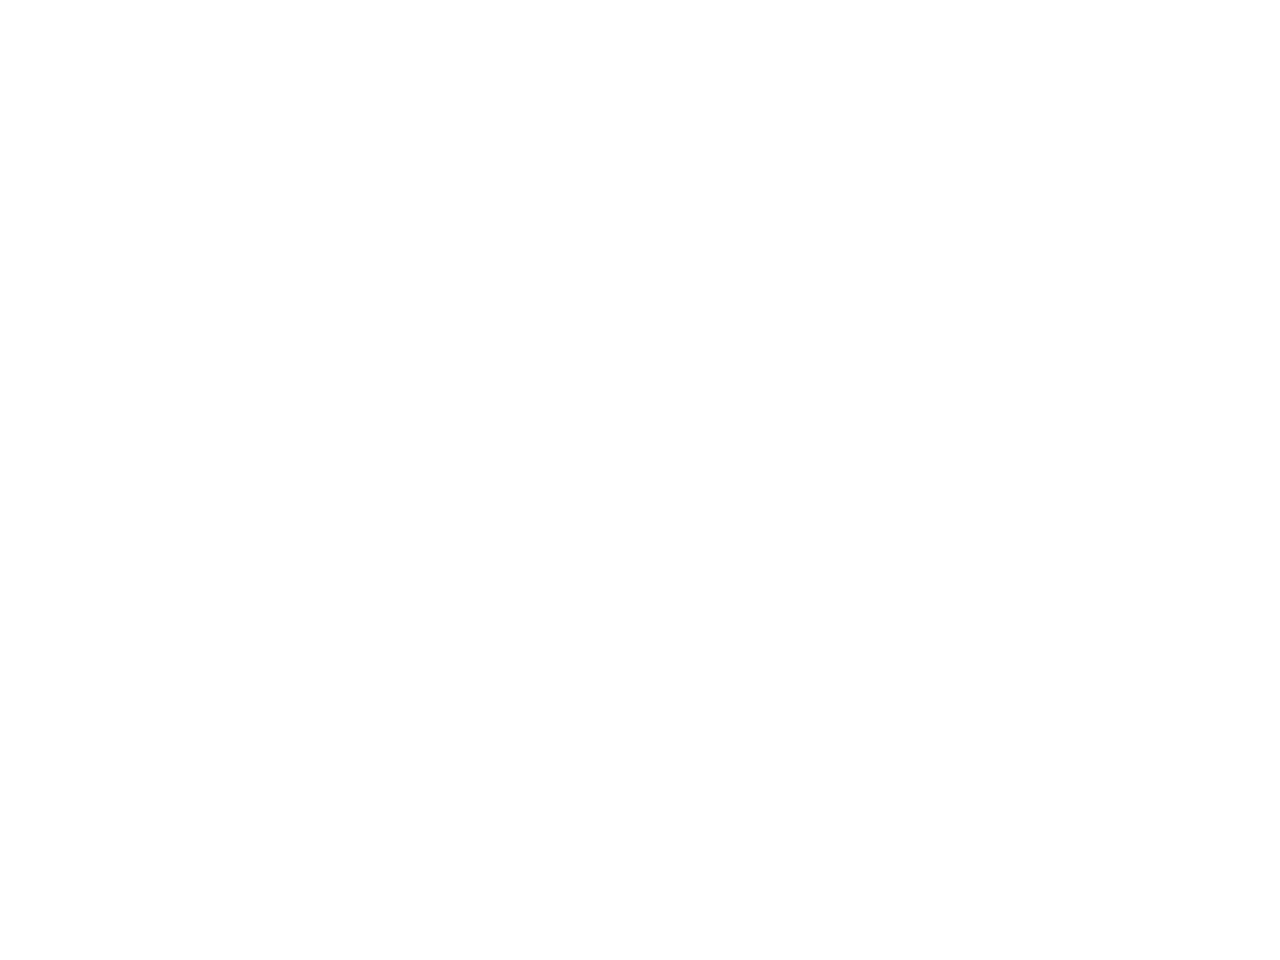

<IPython.core.display.Javascript object>


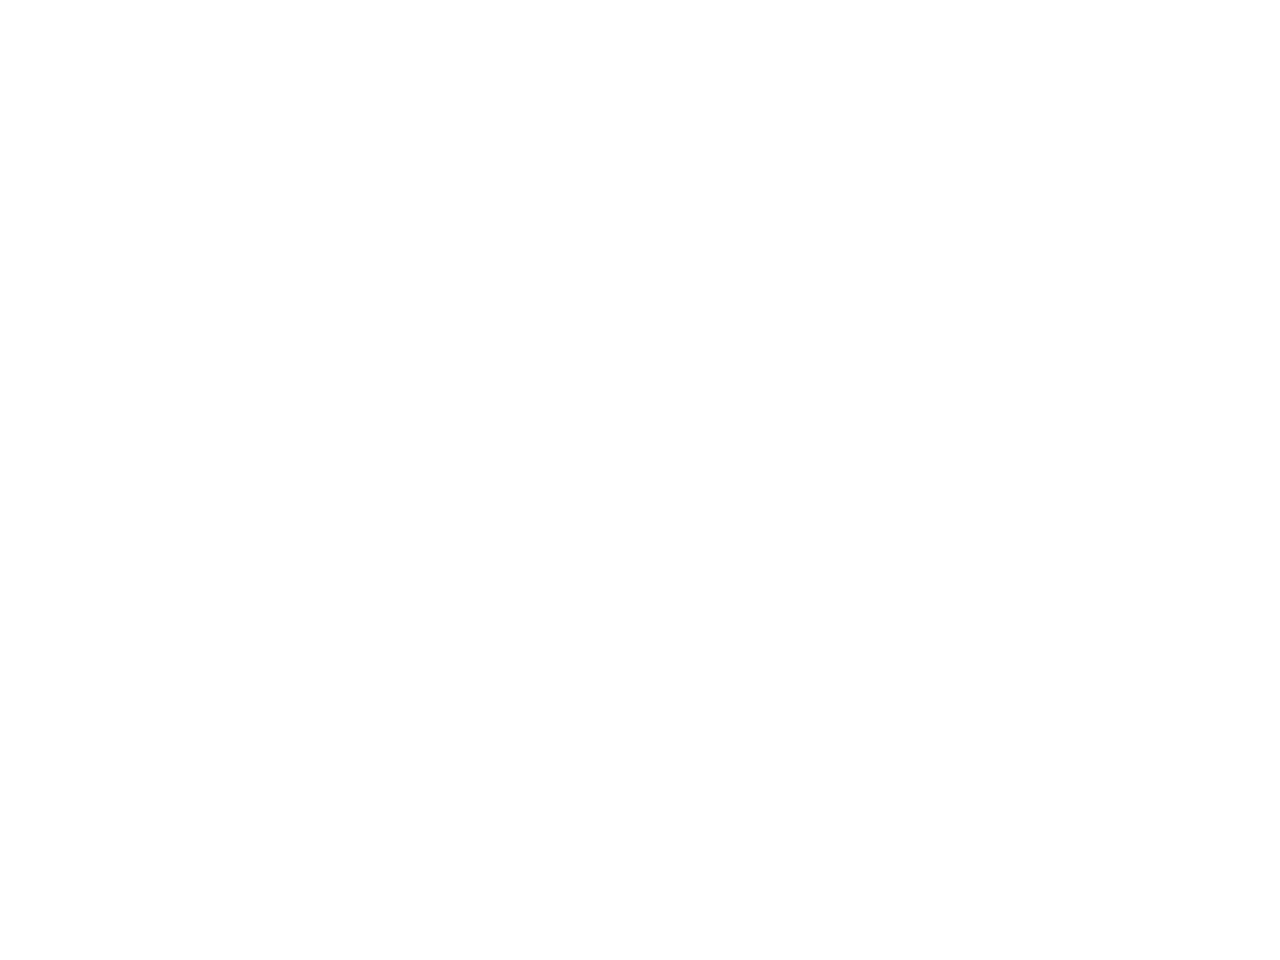

<IPython.core.display.Javascript object>


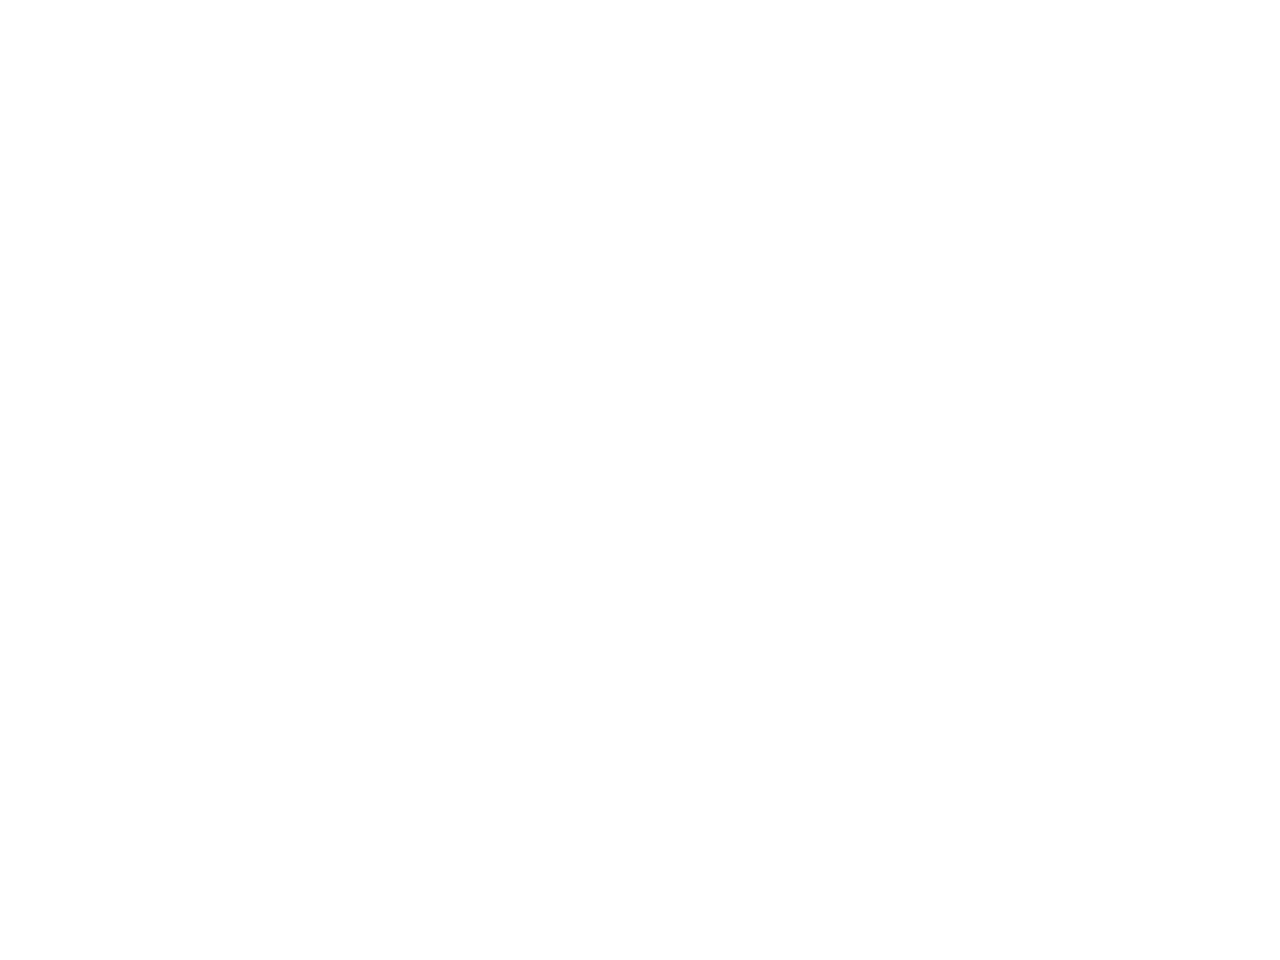

<IPython.core.display.Javascript object>


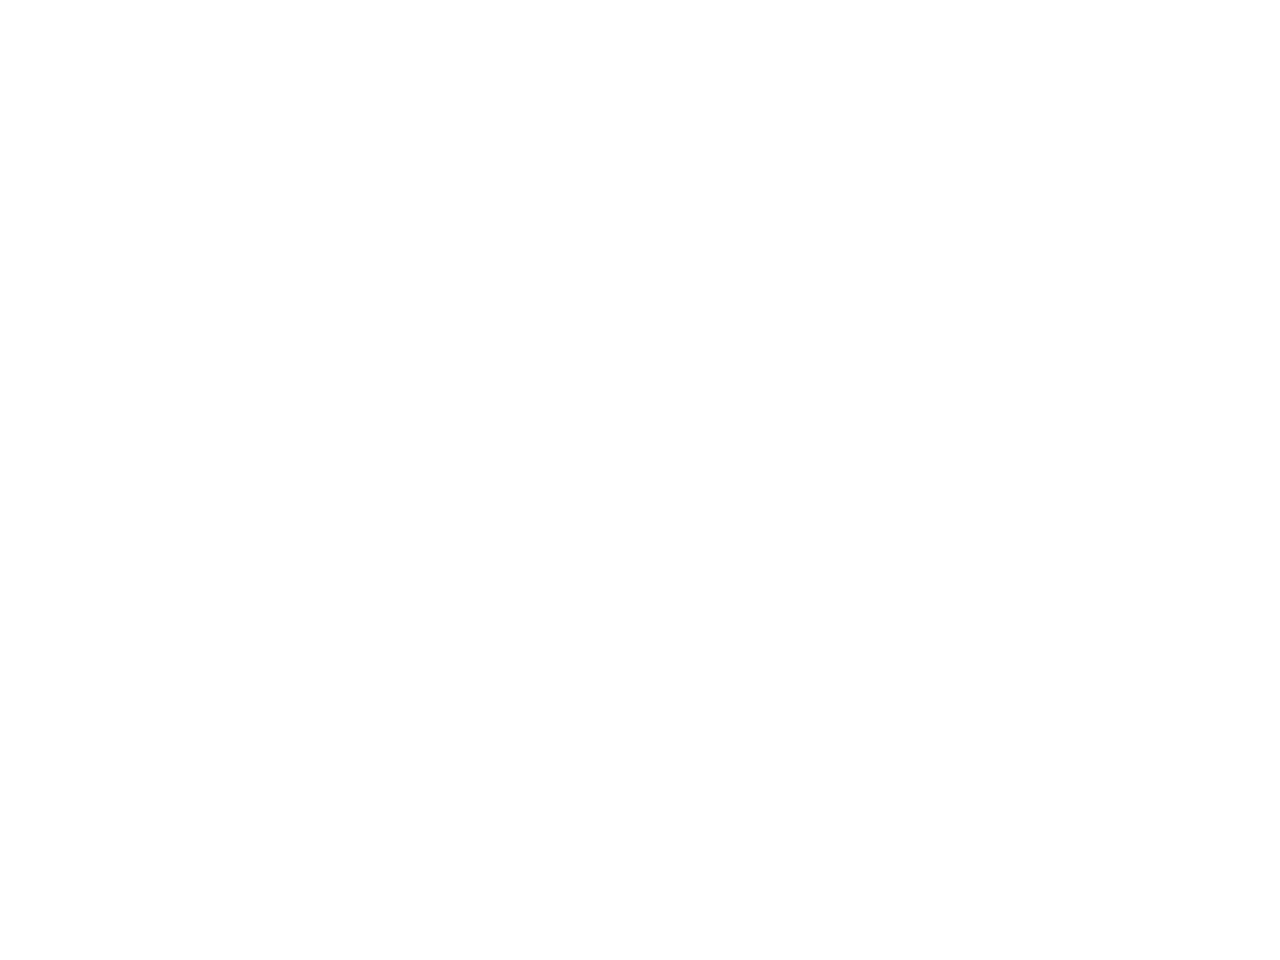

<IPython.core.display.Javascript object>


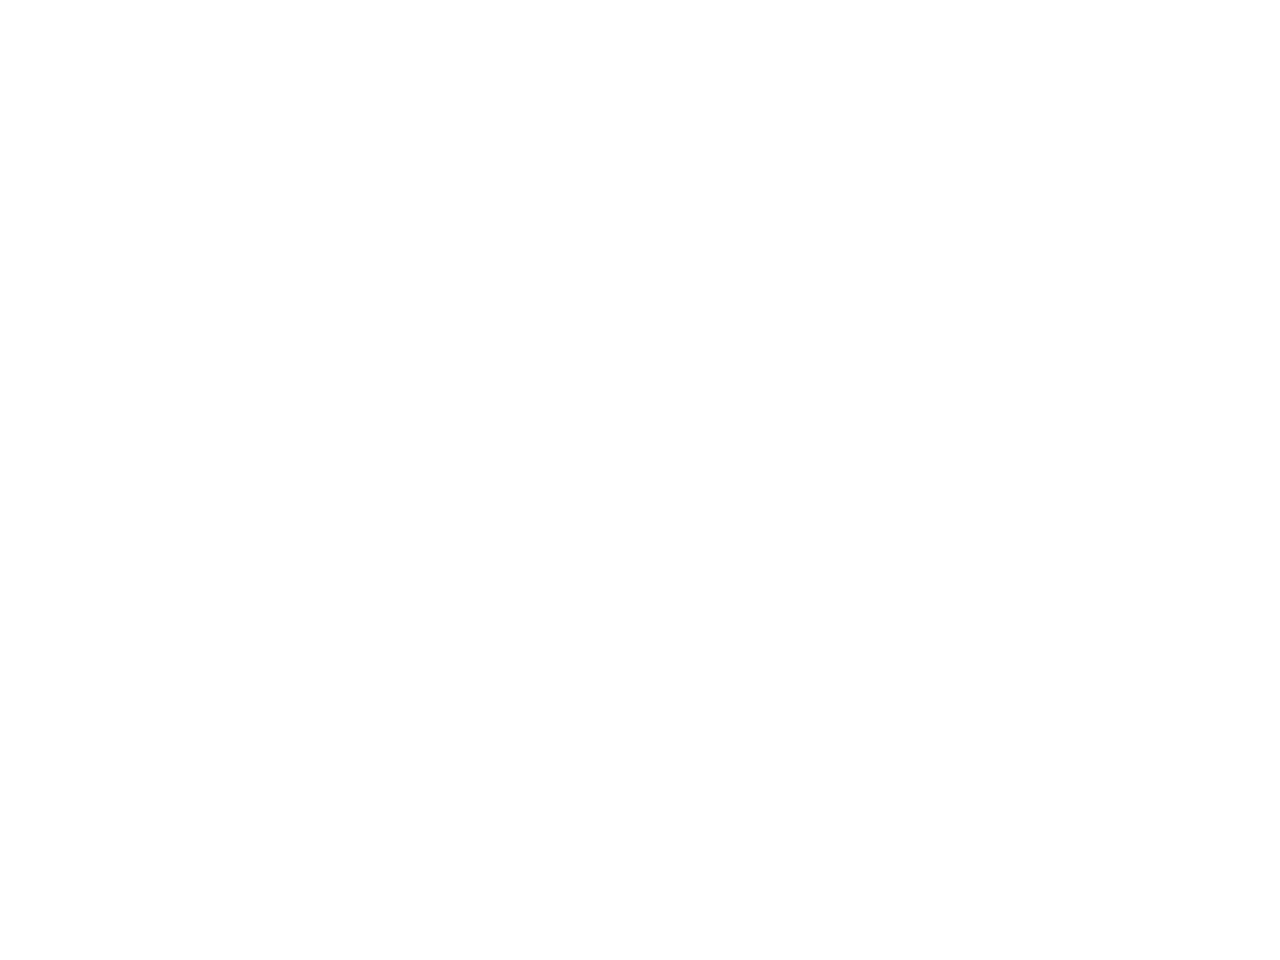

<IPython.core.display.Javascript object>


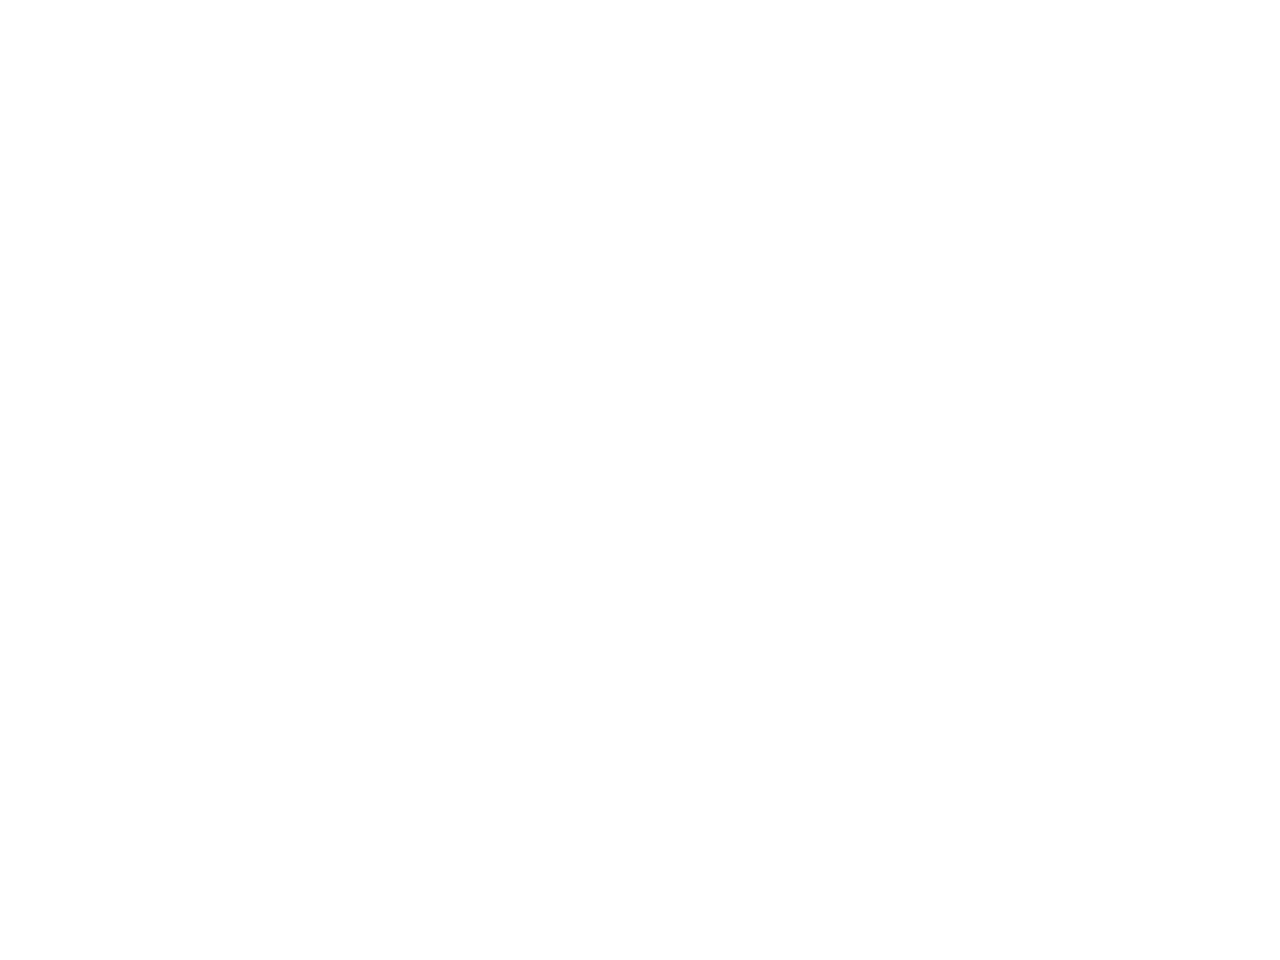

<IPython.core.display.Javascript object>


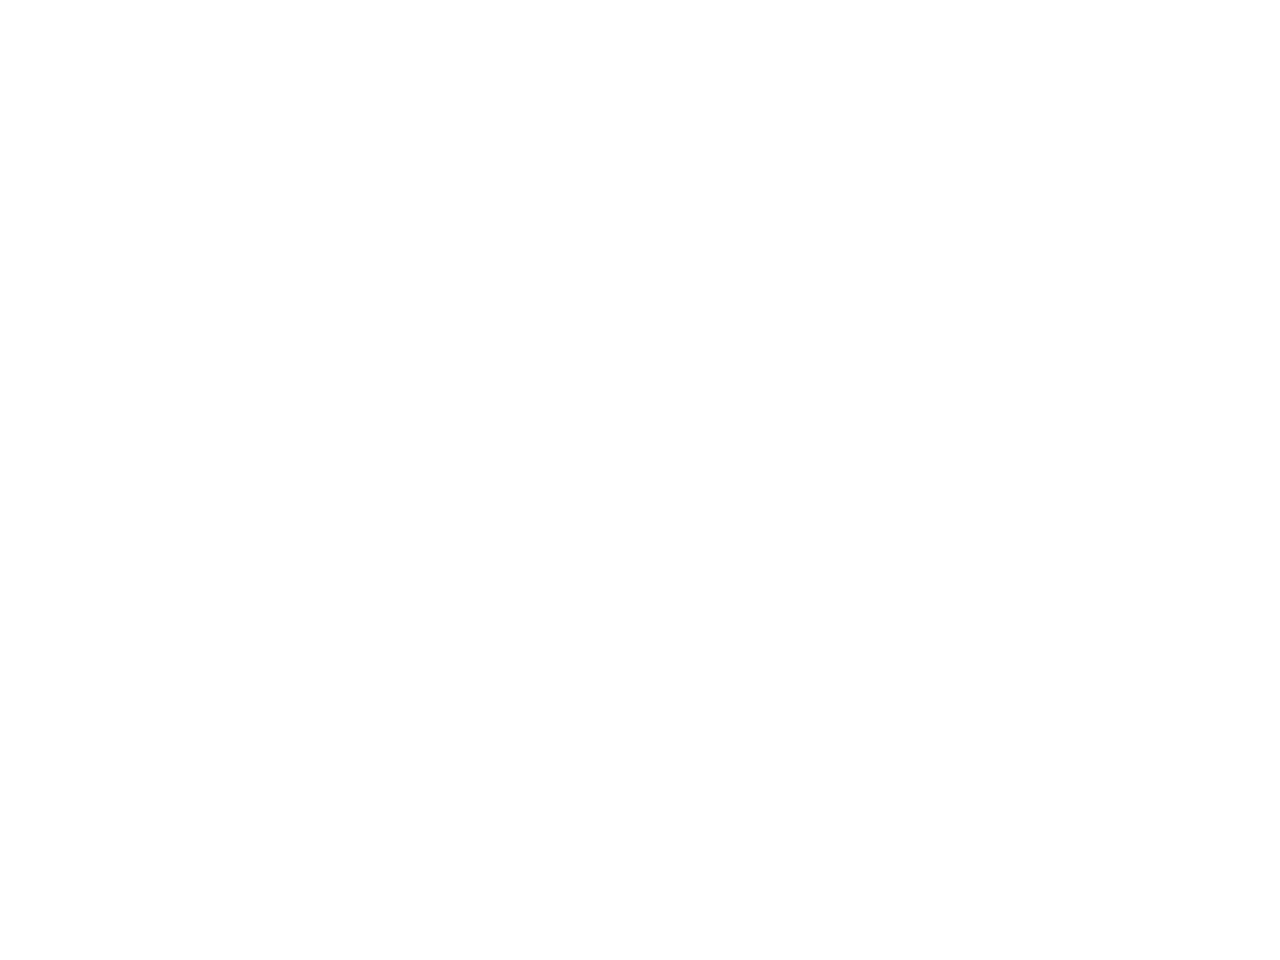

<IPython.core.display.Javascript object>


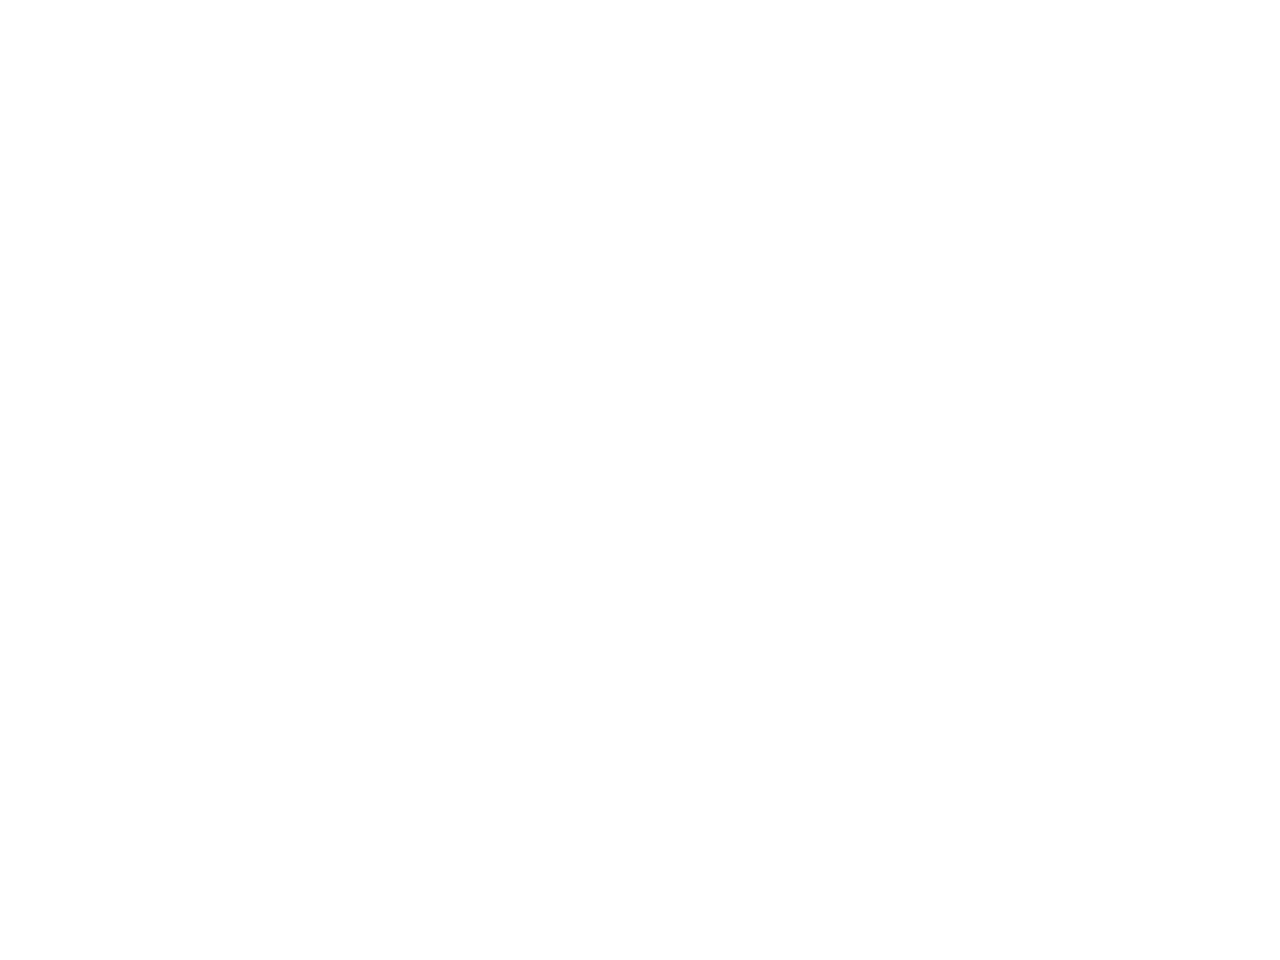

<IPython.core.display.Javascript object>


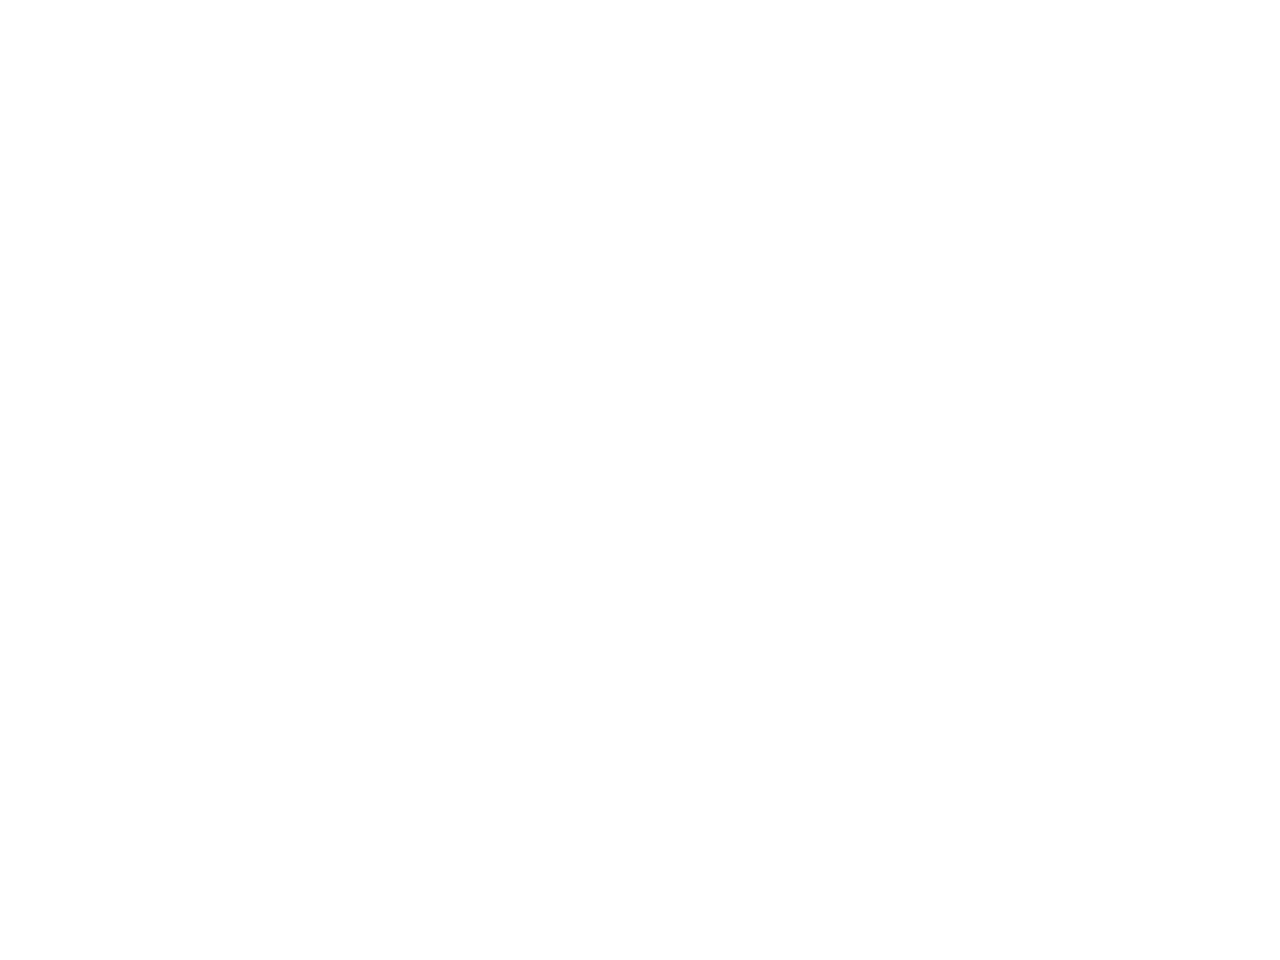

<IPython.core.display.Javascript object>


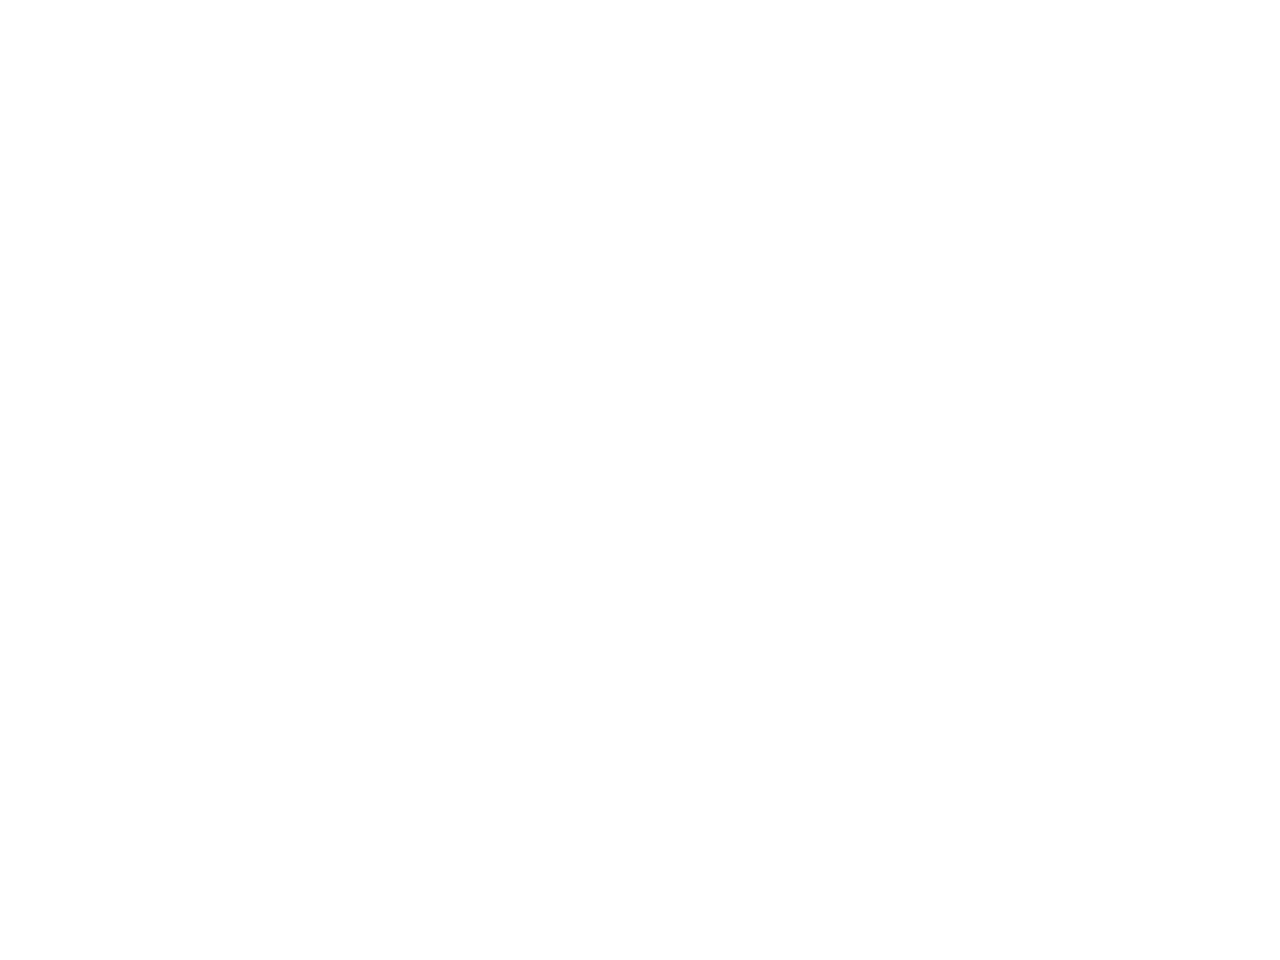

<IPython.core.display.Javascript object>


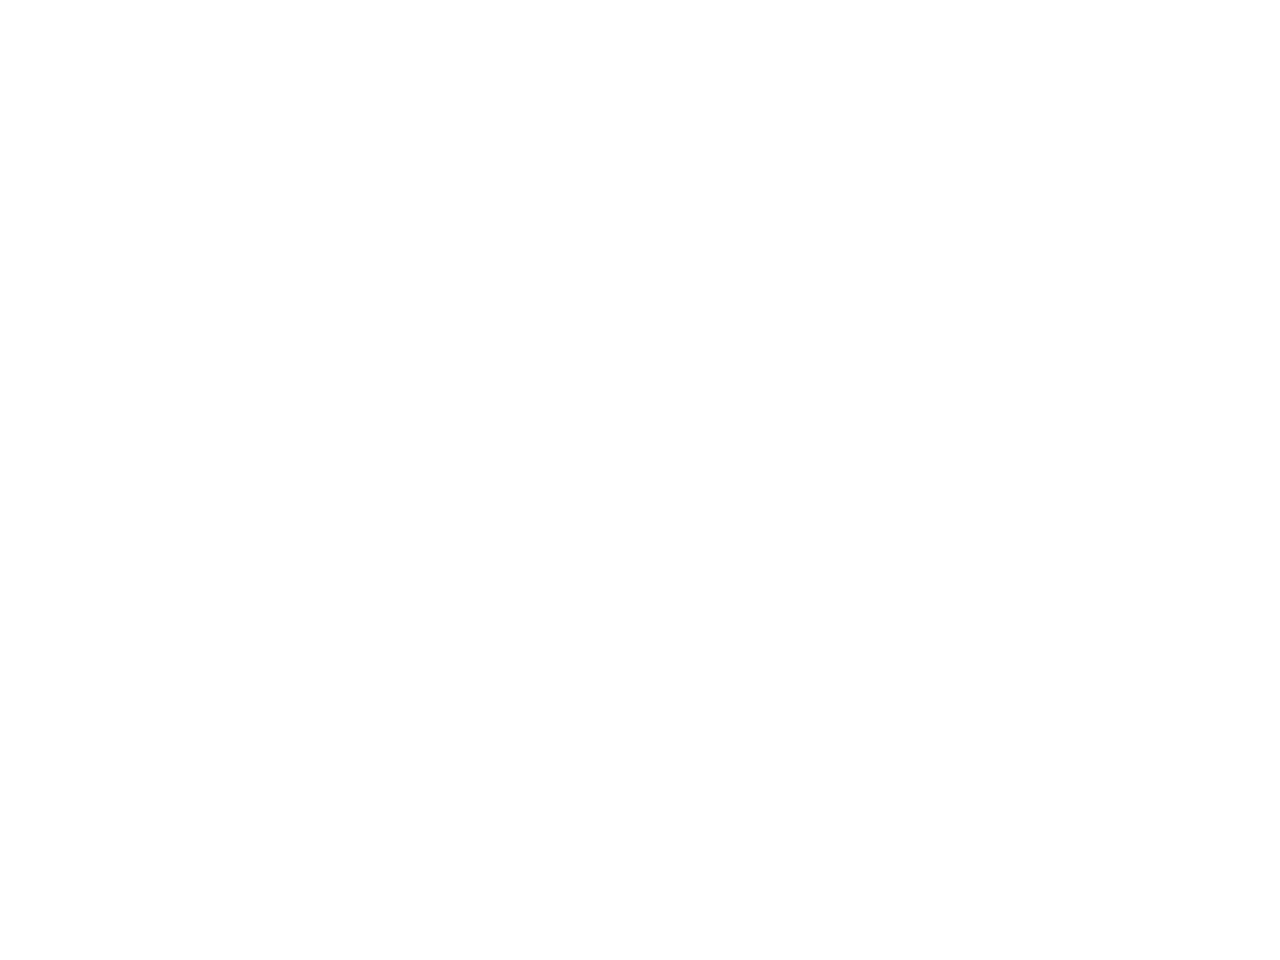

<IPython.core.display.Javascript object>


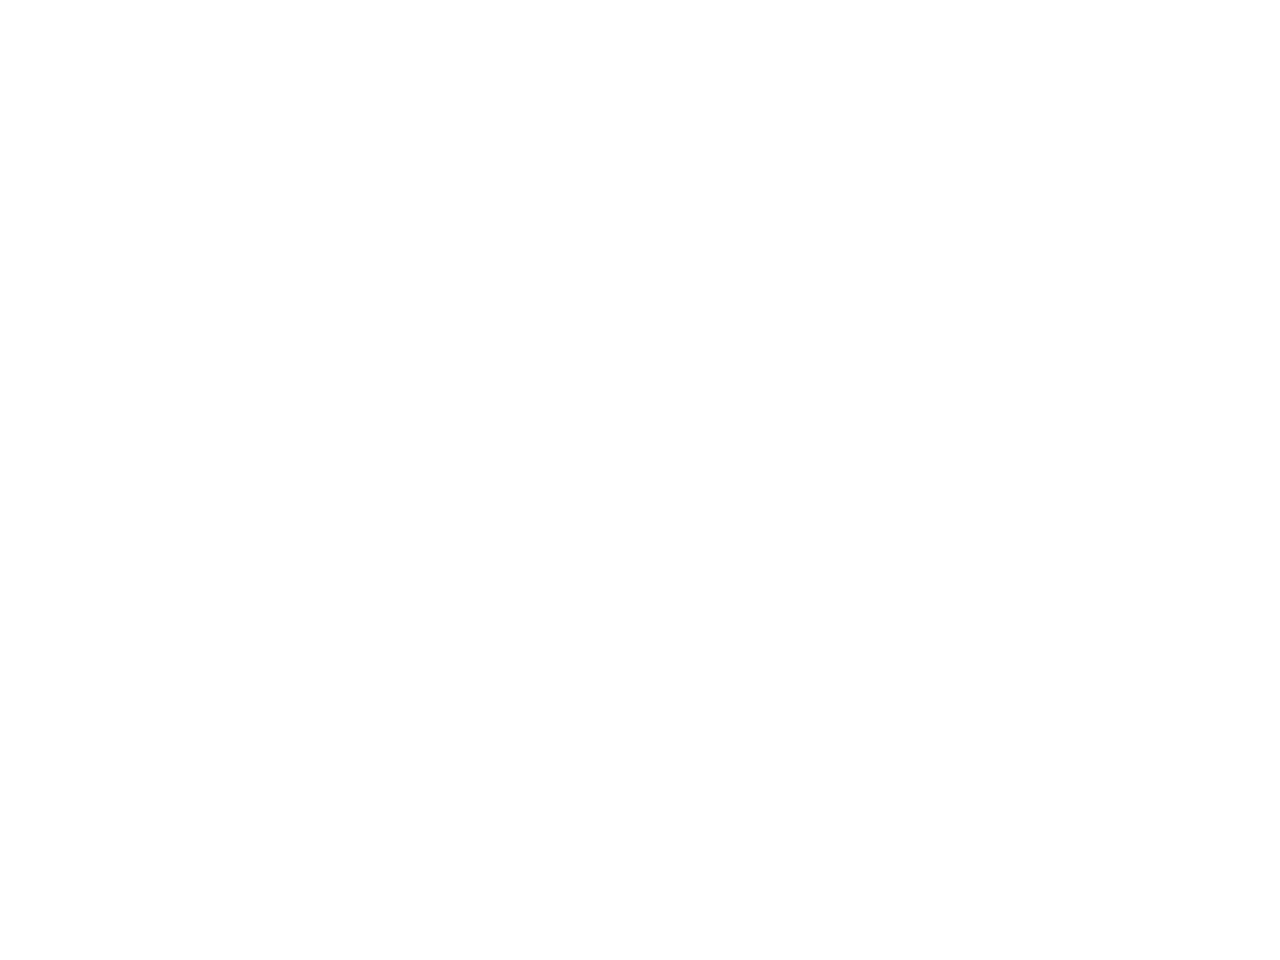

<IPython.core.display.Javascript object>


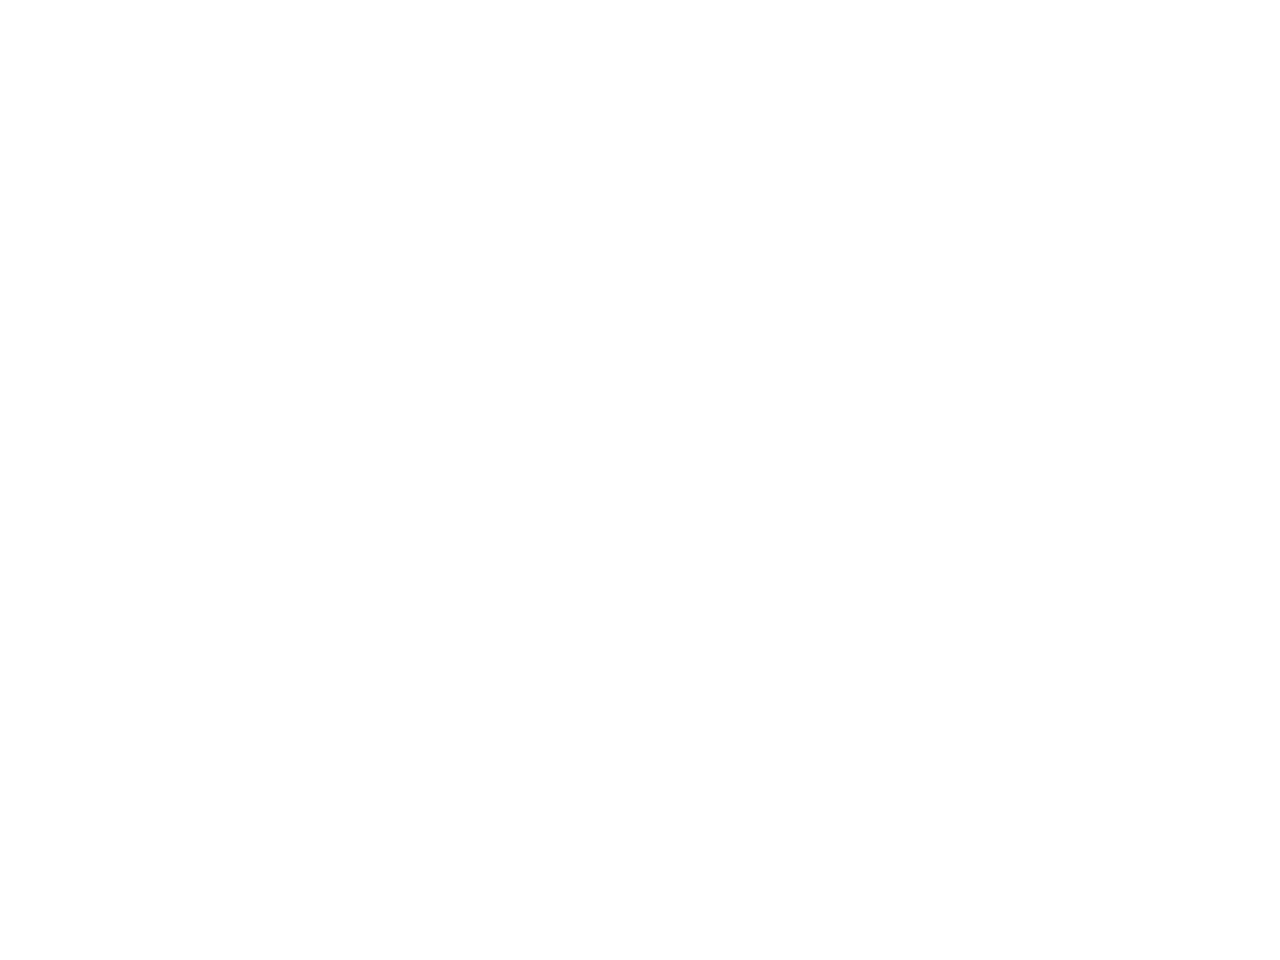

<IPython.core.display.Javascript object>


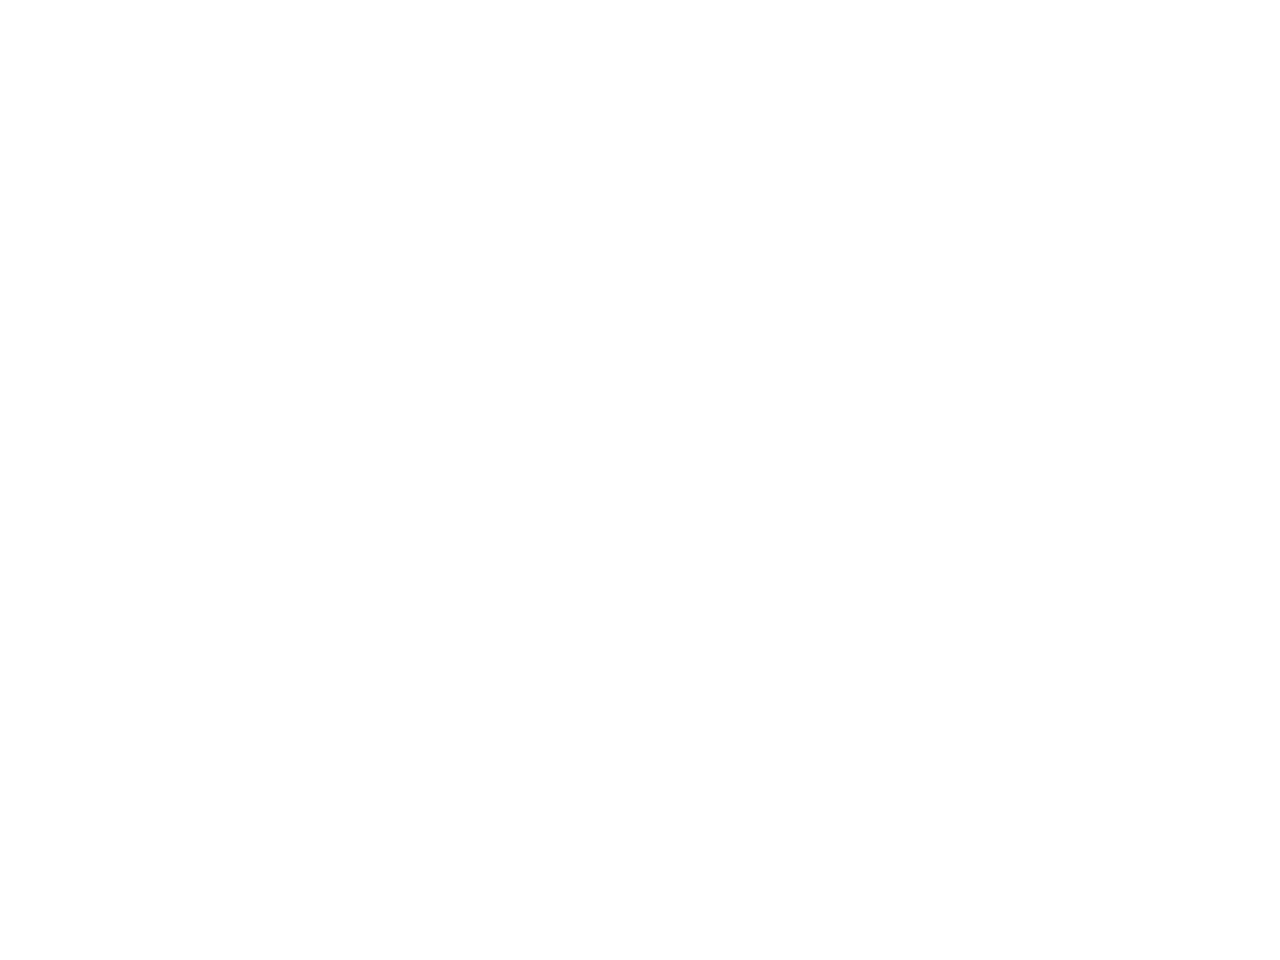

<IPython.core.display.Javascript object>


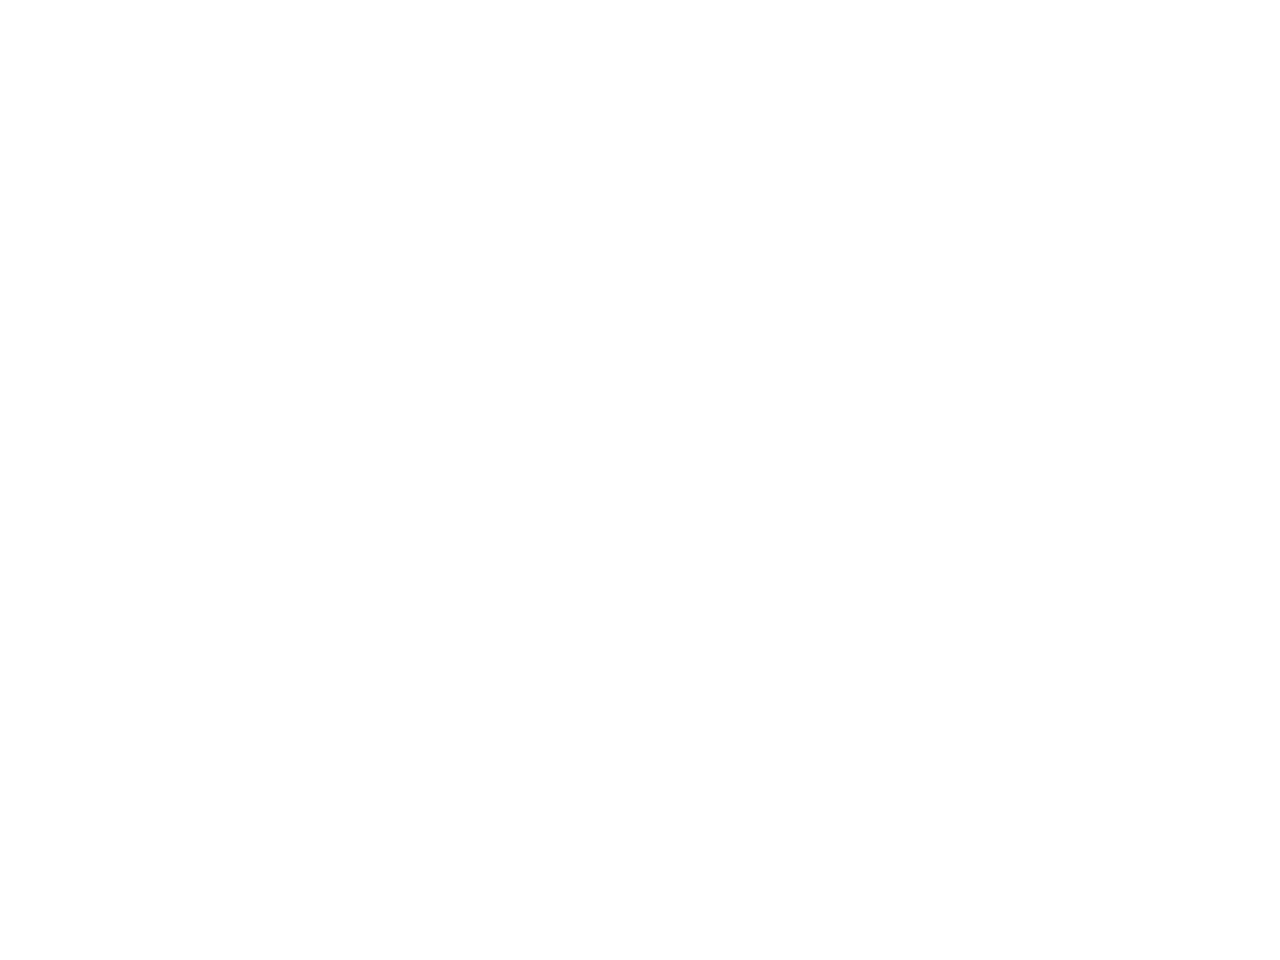

<IPython.core.display.Javascript object>

In [ ]:
save_dir = 'plots'

if not os.path.exists(save_dir):
        os.makedirs(save_dir)

for i in range(res.shape[0]):
# for i in range(50):
    path = os.path.join(save_dir, str(i)+'.pdf')  
    plt.figure()
    plt.plot(test_input[i], lw=2)
    plt.plot(np.argmax(res[i], axis=1)-8, lw=2)
    plt.plot(np.argmax(test_output[i], axis=1)-8, lw=2)
    plt.ylim(-10., 10.)
    plt.savefig(path)
    plt.close()